# 자동차 환경 빅데이터 3차
- 과제2 : 건설기계 배출가스 관리 체계 구축
- 과제4 : 배출가스 전문정비제도 관리체계 구축
- 과제5 : 자동차 환경 빅데이터 제작사 공동 활용체게 구축

# Library

In [608]:
import pandas as pd
import os, math
import numpy as np
from datetime import datetime
import pyexasol

In [2]:
pd.options.display.float_format = '{:.2f}'.format
# pd.reset_option('display.float_format')

In [3]:
# 경고문 없애는 코드
# UserWarning: Workbook contains no default style, apply openpyxl's default warn("Workbook contains no default style, apply openpyxl's default")
import warnings
warnings.simplefilter("ignore")

# Fold

In [4]:
pub_fold = 'D:/data/processing/big3/raw/public'
raw_fold = 'D:/data/processing/big3/raw'
raw2_fold = 'D:/data/processing/big3/raw/BD2'
raw4_fold = 'D:/data/processing/big3/raw/BD4'
raw5_fold = 'D:/data/processing/big3/raw/BD5'
an_fold = 'D:/data/processing/big3/analysis'
an2_fold = 'D:/data/processing/big3/analysis/BD2'
an4_fold = 'D:/data/processing/big3/analysis/BD4'
an5_fold = 'D:/data/processing/big3/analysis/BD5'
df_fold = 'D:/data/processing/big3/df'
df2_fold = 'D:/data/processing/big3/df/BD2'
df4_fold = 'D:/data/processing/big3/df/BD4'
df5_fold = 'D:/data/processing/big3/df/BD5'
folds = {
    'pub_fold':pub_fold, 
    'raw_fold':raw_fold, 
    'raw2_fold':raw2_fold, 
    'raw4_fold':raw4_fold, 
    'raw5_fold':raw5_fold, 
    'an_fold':an_fold, 
    'an2_fold:':an2_fold, 
    'an4_fold:':an4_fold, 
    'an5_fold:':an5_fold, 
    'df_fold':df_fold, 
    'df2_fold':df2_fold, 
    'df4_fold':df4_fold, 
    'df5_fold':df5_fold, 
    }
folds

{'pub_fold': 'D:/data/processing/big3/raw/public',
 'raw_fold': 'D:/data/processing/big3/raw',
 'raw2_fold': 'D:/data/processing/big3/raw/BD2',
 'raw4_fold': 'D:/data/processing/big3/raw/BD4',
 'raw5_fold': 'D:/data/processing/big3/raw/BD5',
 'an_fold': 'D:/data/processing/big3/analysis',
 'an2_fold:': 'D:/data/processing/big3/analysis/BD2',
 'an4_fold:': 'D:/data/processing/big3/analysis/BD4',
 'an5_fold:': 'D:/data/processing/big3/analysis/BD5',
 'df_fold': 'D:/data/processing/big3/df',
 'df2_fold': 'D:/data/processing/big3/df/BD2',
 'df4_fold': 'D:/data/processing/big3/df/BD4',
 'df5_fold': 'D:/data/processing/big3/df/BD5'}

# server

In [5]:
# exasol db
wd = pyexasol.connect(dsn='dev.openankus.org:8563', user='sys', password='djslzja', compression=True, schema='VSYSD')
wz = pyexasol.connect(dsn='dev.openankus.org:8563', user='sys', password='djslzja', compression=True, schema='VSYSZ')
we = pyexasol.connect(dsn='dev.openankus.org:8563', user='sys', password='djslzja', compression=True, schema='VSYSE')

# EDA
+ 과제2
    - 건설기계 인증자료
    - 건설기계 인증대장
+ 과제4
    - 자동차전문정비 : STD_TB_ERR_RES
    - 자동차전문정비상세 : STD_TB_ERR_RES_DET
+ 과제5
    - 구조변경검사 : STD_DLM_TB_ERP_GUBUN_BAECHUL

# 과제2

## 로드

### 등록정보(STD_CEG_CAR_MIG)

In [6]:
# 5m 31.4s
car = wd.export_to_pandas("SELECT VIN, BSPL_STDG_CD, EXHST_GAS_GRD_CD, EXHST_GAS_CERT_NO, VHCL_ERSR_YN, MANP_MNG_NO, YRIDNW, VHCTY_CD, PURPS_CD2, FRST_REG_YMD, VHCL_FBCTN_YMD, VHCL_MNG_NO, VHRNO, EXTGAS_INSP_VLD_YMD, VHCL_OWNR_CL_CD FROM STD_CEG_CAR_MIG;")
car_ch_col = {
    'VIN':'차대번호', 
    'BSPL_STDG_CD':'법정동코드', 
    'EXHST_GAS_GRD_CD':'배출가스등급', 
    'EXHST_GAS_CERT_NO':'배출가스인증번호',
    'VHCL_ERSR_YN':'차량말소YN',
    'MANP_MNG_NO':'제원관리번호', 
    'YRIDNW':'차량연식', 
    'VHCTY_CD':'차종', 
    'PURPS_CD2':'용도', 
    'FRST_REG_YMD':'최초등록일자',
    'VHCL_FBCTN_YMD':'제작일자', 
    'VHCL_MNG_NO':'차량관리번호', 
    'VHRNO':'자동차등록번호',
    'EXTGAS_INSP_VLD_YMD':'검사유효일',
    'VHCL_OWNR_CL_CD':'소유자구분',  
}
carr = car.rename(columns=car_ch_col)

print('data load : STD_CEG_CAR_MIG')

data load : STD_CEG_CAR_MIG


#### 데이터 확인

In [7]:
carr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31131025 entries, 0 to 31131024
Data columns (total 15 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   차대번호      object
 1   법정동코드     int64 
 2   배출가스등급    object
 3   배출가스인증번호  object
 4   차량말소YN    object
 5   제원관리번호    object
 6   차량연식      int64 
 7   차종        object
 8   용도        object
 9   최초등록일자    object
 10  제작일자      object
 11  차량관리번호    object
 12  자동차등록번호   object
 13  검사유효일     int64 
 14  소유자구분     object
dtypes: int64(3), object(12)
memory usage: 3.5+ GB


In [8]:
cols_df = pd.DataFrame({'컬럼명':car_ch_col.keys(), '컬럼설명':car_ch_col.values()})
cols_df

,컬럼명,컬럼설명
0,VIN,차대번호
1,BSPL_STDG_CD,법정동코드
2,EXHST_GAS_GRD_CD,배출가스등급
3,EXHST_GAS_CERT_NO,배출가스인증번호
4,VHCL_ERSR_YN,차량말소YN
5,MANP_MNG_NO,제원관리번호
6,YRIDNW,차량연식
7,VHCTY_CD,차종
8,PURPS_CD2,용도
9,FRST_REG_YMD,최초등록일자


In [9]:
carr_stat = carr.isnull().sum().reset_index().rename(columns={'index':'컬럼설명', 0:'빈 값 개수'})
carr_stat['총 행수'] = carr.shape[0]
carr_stat.insert(0, '번호', [x for x in range(1, carr_stat.shape[0] + 1)])
carr_stat_final = carr_stat.merge(cols_df, on='컬럼설명', how='left')
carr_stat_final = carr_stat_final[['번호', '컬럼명', '컬럼설명', '빈 값 개수', '총 행수']]
carr_stat_final

,번호,컬럼명,컬럼설명,빈 값 개수,총 행수
0,1,VIN,차대번호,0,31131025
1,2,BSPL_STDG_CD,법정동코드,0,31131025
2,3,EXHST_GAS_GRD_CD,배출가스등급,1298801,31131025
3,4,EXHST_GAS_CERT_NO,배출가스인증번호,4148289,31131025
4,5,VHCL_ERSR_YN,차량말소YN,0,31131025
5,6,MANP_MNG_NO,제원관리번호,0,31131025
6,7,YRIDNW,차량연식,0,31131025
7,8,VHCTY_CD,차종,0,31131025
8,9,PURPS_CD2,용도,0,31131025
9,10,FRST_REG_YMD,최초등록일자,18,31131025


##### [출력] 데이터 정보

In [10]:
today_date = datetime.today().strftime('%Y%m%d')
today_date

'2024.01.08'

In [11]:
carr_stat_final.to_excel(os.path.join(an2_fold, f'데이터정보_등록정보({today_date}).xlsx'), index=False)

### 제원정보(STD_CEG_CAR_SRC_MIG)

In [12]:
# 4.1s
src = wd.export_to_pandas("SELECT MANP_MNG_NO, FUEL_CD, VHCTY_TY_CD2, MNFCTR_NM, VHCNM, VHCL_FRM, EGIN_TY, VHCTY_CL_CD, TOTL_WGHT, CRYNG_WGHT, DSPLVL, EGIN_OTPT FROM STD_CEG_CAR_SRC_MIG;")
src_ch_col = {
    'MANP_MNG_NO':'제원관리번호', 
    'FUEL_CD':'연료',
    'VHCTY_TY_CD2':'차종유형', 
    'MNFCTR_NM':'제작사명', 
    'VHCNM':'차명', 
    'VHCL_FRM':'자동차형식', 
    'EGIN_TY':'엔진형식', 
    'VHCTY_CL_CD':'차종분류',
    'TOTL_WGHT':'총중량',
    'CRYNG_WGHT':'적재중량',
    'DSPLVL':'배기량', 
    'EGIN_OTPT':'엔진출력',
}
srcr = src.rename(columns=src_ch_col)

print('data load : STD_CEG_CAR_SRC_MIG')

data load : STD_CEG_CAR_SRC_MIG


#### 데이터 확인

In [13]:
srcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574467 entries, 0 to 574466
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   제원관리번호  574467 non-null  object 
 1   연료      552717 non-null  object 
 2   차종유형    560780 non-null  object 
 3   제작사명    567648 non-null  object 
 4   차명      574395 non-null  object 
 5   자동차형식   543557 non-null  object 
 6   엔진형식    523045 non-null  object 
 7   차종분류    558783 non-null  object 
 8   총중량     570937 non-null  float64
 9   적재중량    467359 non-null  float64
 10  배기량     537510 non-null  float64
 11  엔진출력    497363 non-null  float64
dtypes: float64(4), object(8)
memory usage: 52.6+ MB


In [14]:
cols_df = pd.DataFrame({'컬럼명':src_ch_col.keys(), '컬럼설명':src_ch_col.values()})
cols_df

,컬럼명,컬럼설명
0,MANP_MNG_NO,제원관리번호
1,FUEL_CD,연료
2,VHCTY_TY_CD2,차종유형
3,MNFCTR_NM,제작사명
4,VHCNM,차명
5,VHCL_FRM,자동차형식
6,EGIN_TY,엔진형식
7,VHCTY_CL_CD,차종분류
8,TOTL_WGHT,총중량
9,CRYNG_WGHT,적재중량


In [15]:
srcr_stat = srcr.isnull().sum().reset_index().rename(columns={'index':'컬럼설명', 0:'빈 값 개수'})
srcr_stat['총 행수'] = srcr.shape[0]
srcr_stat.insert(0, '번호', [x for x in range(1, srcr_stat.shape[0] + 1)])
srcr_stat_final = srcr_stat.merge(cols_df, on='컬럼설명', how='left')
srcr_stat_final = srcr_stat_final[['번호', '컬럼명', '컬럼설명', '빈 값 개수', '총 행수']]
srcr_stat_final

,번호,컬럼명,컬럼설명,빈 값 개수,총 행수
0,1,MANP_MNG_NO,제원관리번호,0,574467
1,2,FUEL_CD,연료,21750,574467
2,3,VHCTY_TY_CD2,차종유형,13687,574467
3,4,MNFCTR_NM,제작사명,6819,574467
4,5,VHCNM,차명,72,574467
5,6,VHCL_FRM,자동차형식,30910,574467
6,7,EGIN_TY,엔진형식,51422,574467
7,8,VHCTY_CL_CD,차종분류,15684,574467
8,9,TOTL_WGHT,총중량,3530,574467
9,10,CRYNG_WGHT,적재중량,107108,574467


##### [출력] 데이터 정보

In [16]:
today_date = datetime.today().strftime('%Y%m%d')
today_date

'2024.01.08'

In [17]:
srcr_stat_final.to_excel(os.path.join(an2_fold, f'데이터정보_제원정보({today_date}).xlsx'), index=False)

### 정기검사(STD_TB_JGT_HIS)

In [18]:
# 3m 34.9s
# jgt = wb.export_to_pandas("SELECT VIN, FDRM_INSP_INSP_MTHD_CD, FDRM_INSP_KND_CD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_NLOD_SMO_JT_YN1, FDRM_INSP_YMD, FDRM_DRVNG_DSTNC, FDRM_NLOD_SMO_PRMVL1 FROM STD_TB_JGT_HIS WHERE ROWNUM <= 10000;") # 테스트용
jgt = wd.export_to_pandas("SELECT VIN, FDRM_INSP_INSP_MTHD_CD, FDRM_INSP_KND_CD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_NLOD_SMO_MSTVL4, FDRM_NLOD_SMO_MSTVL5, FDRM_NLOD_SMO_MSTVL6, FDRM_NLOD_SMO_JT_YN1, FDRM_NLOD_SMO_JT_YN2, FDRM_NLOD_SMO_JT_YN3, FDRM_NLOD_SMO_JT_YN4, FDRM_NLOD_SMO_JT_YN5, FDRM_NLOD_SMO_JT_YN6, FDRM_INSP_YMD, FDRM_DRVNG_DSTNC, FDRM_NLOD_SMO_PRMVL1, FDRM_NLOD_SMO_PRMVL2, FDRM_NLOD_SMO_PRMVL3, FDRM_NLOD_SMO_PRMVL4, FDRM_NLOD_SMO_PRMVL5, FDRM_NLOD_SMO_PRMVL6 FROM STD_TB_JGT_HIS;")
jgt_ch_col = {
    'VIN':'차대번호', 
    'FDRM_INSP_INSP_MTHD_CD':'검사방법', 
    'FDRM_INSP_KND_CD':'검사종류', 
    'FDRM_INSP_JGMT':'검사판정', 
    'FDRM_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'FDRM_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'FDRM_NLOD_SMO_MSTVL3':'무부하매연측정치3', 
    'FDRM_NLOD_SMO_MSTVL4':'무부하매연측정치4', 
    'FDRM_NLOD_SMO_MSTVL5':'무부하매연측정치5', 
    'FDRM_NLOD_SMO_MSTVL6':'무부하매연측정치6', 
    'FDRM_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    'FDRM_NLOD_SMO_JT_YN2':'무부하매연판정2', 
    'FDRM_NLOD_SMO_JT_YN3':'무부하매연판정3', 
    'FDRM_NLOD_SMO_JT_YN4':'무부하매연판정4', 
    'FDRM_NLOD_SMO_JT_YN5':'무부하매연판정5', 
    'FDRM_NLOD_SMO_JT_YN6':'무부하매연판정6', 
    'FDRM_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
    'FDRM_NLOD_SMO_PRMVL2':'무부하매연허용치2', 
    'FDRM_NLOD_SMO_PRMVL3':'무부하매연허용치3', 
    'FDRM_NLOD_SMO_PRMVL4':'무부하매연허용치4', 
    'FDRM_NLOD_SMO_PRMVL5':'무부하매연허용치5', 
    'FDRM_NLOD_SMO_PRMVL6':'무부하매연허용치6', 
    'FDRM_INSP_YMD':'검사일자',
    'FDRM_DRVNG_DSTNC':'주행거리',
}
jgtr = jgt.rename(columns=jgt_ch_col)

print('data load : STD_CEG_CAR_SRC_MIG')

data load : STD_CEG_CAR_SRC_MIG


#### 데이터 확인

In [19]:
jgtr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67357583 entries, 0 to 67357582
Data columns (total 24 columns):
 #   Column     Dtype  
---  ------     -----  
 0   차대번호       object 
 1   검사방법       object 
 2   검사종류       object 
 3   검사판정       object 
 4   무부하매연측정치1  float64
 5   무부하매연측정치2  float64
 6   무부하매연측정치3  float64
 7   무부하매연측정치4  float64
 8   무부하매연측정치5  float64
 9   무부하매연측정치6  float64
 10  무부하매연판정1   object 
 11  무부하매연판정2   object 
 12  무부하매연판정3   object 
 13  무부하매연판정4   object 
 14  무부하매연판정5   object 
 15  무부하매연판정6   object 
 16  검사일자       int64  
 17  주행거리       float64
 18  무부하매연허용치1  float64
 19  무부하매연허용치2  float64
 20  무부하매연허용치3  float64
 21  무부하매연허용치4  float64
 22  무부하매연허용치5  float64
 23  무부하매연허용치6  float64
dtypes: float64(13), int64(1), object(10)
memory usage: 12.0+ GB


In [20]:
cols_df = pd.DataFrame({'컬럼명':jgt_ch_col.keys(), '컬럼설명':jgt_ch_col.values()})
cols_df

,컬럼명,컬럼설명
0,VIN,차대번호
1,FDRM_INSP_INSP_MTHD_CD,검사방법
2,FDRM_INSP_KND_CD,검사종류
3,FDRM_INSP_JGMT,검사판정
4,FDRM_NLOD_SMO_MSTVL1,무부하매연측정치1
5,FDRM_NLOD_SMO_MSTVL2,무부하매연측정치2
6,FDRM_NLOD_SMO_MSTVL3,무부하매연측정치3
7,FDRM_NLOD_SMO_MSTVL4,무부하매연측정치4
8,FDRM_NLOD_SMO_MSTVL5,무부하매연측정치5
9,FDRM_NLOD_SMO_MSTVL6,무부하매연측정치6


In [21]:
jgtr_stat = jgtr.isnull().sum().reset_index().rename(columns={'index':'컬럼설명', 0:'빈 값 개수'})
jgtr_stat['총 행수'] = jgtr.shape[0]
jgtr_stat.insert(0, '번호', [x for x in range(1, jgtr_stat.shape[0] + 1)])
jgtr_stat_final = jgtr_stat.merge(cols_df, on='컬럼설명', how='left')
jgtr_stat_final = jgtr_stat_final[['번호', '컬럼명', '컬럼설명', '빈 값 개수', '총 행수']]
jgtr_stat_final

,번호,컬럼명,컬럼설명,빈 값 개수,총 행수
0,1,VIN,차대번호,0,67357583
1,2,FDRM_INSP_INSP_MTHD_CD,검사방법,0,67357583
2,3,FDRM_INSP_KND_CD,검사종류,0,67357583
3,4,FDRM_INSP_JGMT,검사판정,0,67357583
4,5,FDRM_NLOD_SMO_MSTVL1,무부하매연측정치1,3558954,67357583
5,6,FDRM_NLOD_SMO_MSTVL2,무부하매연측정치2,41907082,67357583
6,7,FDRM_NLOD_SMO_MSTVL3,무부하매연측정치3,41907082,67357583
7,8,FDRM_NLOD_SMO_MSTVL4,무부하매연측정치4,46950093,67357583
8,9,FDRM_NLOD_SMO_MSTVL5,무부하매연측정치5,46950093,67357583
9,10,FDRM_NLOD_SMO_MSTVL6,무부하매연측정치6,46950093,67357583


##### [출력] 데이터 정보

In [22]:
today_date = datetime.today().strftime('%Y%m%d')
today_date

'2024.01.08'

In [23]:
jgtr_stat_final.to_excel(os.path.join(an2_fold, f'데이터정보_정기정보({today_date}).xlsx'), index=False)

### 정밀검사(STD_TB_EET_HIS_ME)

In [24]:
# 10m 30.8s
eet = wd.export_to_pandas("SELECT VIN, PRCINSP_MSRMT_MTHD_CD, PRCINSP_KND_CD, PRCINSP_JGMT, PREC_NLOD_SMO_MSTVL1, PREC_NLOD_SMO_MSTVL2, PREC_NLOD_SMO_MSTVL3, PREC_NLOD_SMO_MSTVL4, PREC_NLOD_SMO_MSTVL5, PREC_NLOD_SMO_MSTVL6, PREC_NLOD_SMO_JT_YN1, PREC_NLOD_SMO_JT_YN2, PREC_NLOD_SMO_JT_YN3, PREC_NLOD_SMO_JT_YN4, PREC_NLOD_SMO_JT_YN5, PREC_NLOD_SMO_JT_YN6, PRCINSP_YMD, PRCINSP_DRVNG_DSTNC, PREC_NLOD_SMO_PRMVL1, PREC_NLOD_SMO_PRMVL2, PREC_NLOD_SMO_PRMVL3, PREC_NLOD_SMO_PRMVL4, PREC_NLOD_SMO_PRMVL5, PREC_NLOD_SMO_PRMVL6 FROM STD_TB_EET_HIS_ME;")
eet_ch_col = {
    'VIN':'차대번호', 
    'PRCINSP_MSRMT_MTHD_CD':'검사방법', 
    'PRCINSP_KND_CD':'검사종류', 
    'PRCINSP_JGMT':'검사판정', 
    'PREC_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'PREC_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'PREC_NLOD_SMO_MSTVL3':'무부하매연측정치3', 
    'PREC_NLOD_SMO_MSTVL4':'무부하매연측정치4', 
    'PREC_NLOD_SMO_MSTVL5':'무부하매연측정치5', 
    'PREC_NLOD_SMO_MSTVL6':'무부하매연측정치6', 
    'PREC_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    'PREC_NLOD_SMO_JT_YN2':'무부하매연판정2', 
    'PREC_NLOD_SMO_JT_YN3':'무부하매연판정3', 
    'PREC_NLOD_SMO_JT_YN4':'무부하매연판정4', 
    'PREC_NLOD_SMO_JT_YN5':'무부하매연판정5', 
    'PREC_NLOD_SMO_JT_YN6':'무부하매연판정6', 
    'PREC_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
    'PREC_NLOD_SMO_PRMVL2':'무부하매연허용치2', 
    'PREC_NLOD_SMO_PRMVL3':'무부하매연허용치3', 
    'PREC_NLOD_SMO_PRMVL4':'무부하매연허용치4', 
    'PREC_NLOD_SMO_PRMVL5':'무부하매연허용치5', 
    'PREC_NLOD_SMO_PRMVL6':'무부하매연허용치6', 
    'PRCINSP_YMD':'검사일자',
    'PRCINSP_DRVNG_DSTNC':'주행거리', 
}
eetr = eet.rename(columns=eet_ch_col)

print('data load : STD_TB_EET_HIS_ME')

data load : STD_TB_EET_HIS_ME


#### 데이터 확인

In [25]:
eetr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104870677 entries, 0 to 104870676
Data columns (total 24 columns):
 #   Column     Dtype  
---  ------     -----  
 0   차대번호       object 
 1   검사방법       object 
 2   검사종류       object 
 3   검사판정       object 
 4   무부하매연측정치1  float64
 5   무부하매연측정치2  float64
 6   무부하매연측정치3  float64
 7   무부하매연측정치4  float64
 8   무부하매연측정치5  float64
 9   무부하매연측정치6  float64
 10  무부하매연판정1   object 
 11  무부하매연판정2   object 
 12  무부하매연판정3   object 
 13  무부하매연판정4   object 
 14  무부하매연판정5   object 
 15  무부하매연판정6   object 
 16  검사일자       int64  
 17  주행거리       float64
 18  무부하매연허용치1  float64
 19  무부하매연허용치2  float64
 20  무부하매연허용치3  float64
 21  무부하매연허용치4  float64
 22  무부하매연허용치5  float64
 23  무부하매연허용치6  float64
dtypes: float64(13), int64(1), object(10)
memory usage: 18.8+ GB


In [26]:
cols_df = pd.DataFrame({'컬럼명':eet_ch_col.keys(), '컬럼설명':eet_ch_col.values()})
cols_df

,컬럼명,컬럼설명
0,VIN,차대번호
1,PRCINSP_MSRMT_MTHD_CD,검사방법
2,PRCINSP_KND_CD,검사종류
3,PRCINSP_JGMT,검사판정
4,PREC_NLOD_SMO_MSTVL1,무부하매연측정치1
5,PREC_NLOD_SMO_MSTVL2,무부하매연측정치2
6,PREC_NLOD_SMO_MSTVL3,무부하매연측정치3
7,PREC_NLOD_SMO_MSTVL4,무부하매연측정치4
8,PREC_NLOD_SMO_MSTVL5,무부하매연측정치5
9,PREC_NLOD_SMO_MSTVL6,무부하매연측정치6


In [27]:
# 
eetr_stat = eetr.isnull().sum().reset_index().rename(columns={'index':'컬럼설명', 0:'빈 값 개수'})
eetr_stat['총 행수'] = eetr.shape[0]
eetr_stat.insert(0, '번호', [x for x in range(1, eetr_stat.shape[0] + 1)])
eetr_stat_final = eetr_stat.merge(cols_df, on='컬럼설명', how='left')
eetr_stat_final = eetr_stat_final[['번호', '컬럼명', '컬럼설명', '빈 값 개수', '총 행수']]
eetr_stat_final

,번호,컬럼명,컬럼설명,빈 값 개수,총 행수
0,1,VIN,차대번호,0,104870677
1,2,PRCINSP_MSRMT_MTHD_CD,검사방법,7,104870677
2,3,PRCINSP_KND_CD,검사종류,19420,104870677
3,4,PRCINSP_JGMT,검사판정,123941,104870677
4,5,PREC_NLOD_SMO_MSTVL1,무부하매연측정치1,2470225,104870677
5,6,PREC_NLOD_SMO_MSTVL2,무부하매연측정치2,28995010,104870677
6,7,PREC_NLOD_SMO_MSTVL3,무부하매연측정치3,31702404,104870677
7,8,PREC_NLOD_SMO_MSTVL4,무부하매연측정치4,44690751,104870677
8,9,PREC_NLOD_SMO_MSTVL5,무부하매연측정치5,44690811,104870677
9,10,PREC_NLOD_SMO_MSTVL6,무부하매연측정치6,58527740,104870677


##### [출력] 데이터 정보

In [28]:
today_date = datetime.today().strftime('%Y%m%d')
today_date

'2024.01.08'

In [29]:
# # 0.8s
# eetr_stat_final.to_excel(os.path.join(an2_fold, f'데이터정보_정밀정보({today_date}).xlsx'), index=False)

### 건설기계 인증자료(12개)

In [30]:
def construct_machine_certification_data_load(name, sheet_name=0):
    fold = os.path.join(raw2_fold, 'KENCIS 건설기계 인증자료_231018')
    try:
        file_name = f'{name}.xlsx'
        cert_dt = pd.read_excel(os.path.join(fold, file_name), sheet_name=sheet_name)
        return cert_dt
    except:
        file_name = f'{name}.xlsx'
        cert_dt = pd.read_excel(os.path.join(fold, file_name))
        return cert_dt

#### 정보 모음

In [31]:
cols = construct_machine_certification_data_load('KENCIS_건설기계인증정보_테이블명세서', '테이블정의서')
cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   테이블명    12 non-null     object
 1   테이블설명   12 non-null     object
 2   컬럼명     649 non-null    object
 3   컬럼설명    644 non-null    object
 4   데이터형식   649 non-null    object
 5   길이      499 non-null    object
 6   Null    649 non-null    object
dtypes: object(7)
memory usage: 35.6+ KB


In [32]:
cols.head()

,테이블명,테이블설명,컬럼명,컬럼설명,데이터형식,길이,Null
0,UNI_FC_TCMASTER,통합 정식/기본인증 마스터,ADM_NO,관리번호,VARCHAR2,10,N
1,NaN,NaN,AGREE_SUBMIS,교정정보 및 사후 확정정보 제출 협약,VARCHAR2,100,Y
2,NaN,NaN,AGREE_SUBMIS_CT,교정정보 및 사후 확정정보 제출 협약 첨부파일,VARCHAR2,100,Y
3,NaN,NaN,APP_WAR,보증에 관한 설명,VARCHAR2,100,Y
4,NaN,NaN,APP_WAR_CT,보증에 관한 설명첨부파일,VARCHAR2,100,Y


In [33]:
cols[['테이블명', '테이블설명']] = cols[['테이블명', '테이블설명']].ffill()

In [34]:
name_list = [
    'UNI_FC_TCMASTER', 
    'UNI_FC_TCERTIMODI', 
    'UNI_FC_ENG_TEFSPEC', 
    'UNI_FC_TEEMISSN', 
    'UNI_FC_TEEMISSN_ENG_RES', 
    'UNI_FC_TESTINFO', 
    'UNI_FC_ENG_LIST', 
    'UNI_FC_ENDUENG_EMI', 
    'UNI_FC_ENDUENGTEST', 
    'UNI_FC_ENDUENGTEST_RES', 
    'UNI_FC_KIENGTEST', 
    'UNI_FC_KIENGTEST_RES', 
    ]
len(name_list)

12

In [35]:
cols_dict = {}
for t in name_list:
    cols_dict[t] = {a:b for a, b in cols.loc[cols['테이블명'] == t, ['컬럼명', '컬럼설명']].values}

In [36]:
cols_dict

{'UNI_FC_TCMASTER': {'ADM_NO': '관리번호',
  'AGREE_SUBMIS': '교정정보 및 사후 확정정보 제출 협약',
  'AGREE_SUBMIS_CT': '교정정보 및 사후 확정정보 제출 협약 첨부파일',
  'APP_WAR': '보증에 관한 설명',
  'APP_WAR_CT': '보증에 관한 설명첨부파일',
  'APPLI_ID': '신청아이디',
  'APPREGI_DATE': '결재일',
  'APPROVAL_YN': '결재여부',
  'CERTI_DIV': '인증구분',
  'CERTI_INTRO': '인증소개',
  'CERTI_INTRO_CT': '인증소개 첨부파일',
  'CERTI_STATE': '처분내용',
  'CERTI_TYPE': '인증종류',
  'CO_DEVT': 'CO 개발목표치',
  'CO_OP': '산술기호(1:덧셈 2:곱셈)',
  'COLD_CO_DEVT': 'Cold CO 개발목표치',
  'COLD_CO_OP': 'Cold CO 연산자',
  'CONF_INFO': '기밀사항',
  'CONF_INFO_CT': '기밀사항 첨부파일',
  'CONF_ISSUE_NO': '발급문서번호',
  'DF_CO': 'CO 열화계수',
  'DF_COLD_CO': 'HC 열화계수',
  'DF_EVAP_EMIS': 'COLD_CO 열화계수',
  'DF_HC': 'HC 열화계수',
  'DF_HCNOX': 'HCNOX 열화계수',
  'DF_MILEAGE': '열화계수 사용량',
  'DF_NOX': 'NOX 열화계수',
  'DF_PM': 'PM 열화계수',
  'DF_PN': 'PN 열화계수',
  'DF_SMOKE': 'SMOKE 열화계수',
  'DURA_TEST_EF_SNO': '내구성시험 동일차종 일련번호',
  'DURA_TEST_REMARK': '내구성테스트 비고',
  'DURA_TEST_YN': '내구성시험 실시 여부',
  'E_CONFIRM': '결제상태',
  'EF_CD': '동일

In [37]:
name = 'UNI_FC_TCMASTER'
tcmaster = construct_machine_certification_data_load(name)
tcmaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Columns: 159 entries, ADM_NO to NOISE_STD_NOTE
dtypes: datetime64[ns](1), float64(127), int64(2), object(29)
memory usage: 775.3+ KB


In [38]:
cols_dict[name]

{'ADM_NO': '관리번호',
 'AGREE_SUBMIS': '교정정보 및 사후 확정정보 제출 협약',
 'AGREE_SUBMIS_CT': '교정정보 및 사후 확정정보 제출 협약 첨부파일',
 'APP_WAR': '보증에 관한 설명',
 'APP_WAR_CT': '보증에 관한 설명첨부파일',
 'APPLI_ID': '신청아이디',
 'APPREGI_DATE': '결재일',
 'APPROVAL_YN': '결재여부',
 'CERTI_DIV': '인증구분',
 'CERTI_INTRO': '인증소개',
 'CERTI_INTRO_CT': '인증소개 첨부파일',
 'CERTI_STATE': '처분내용',
 'CERTI_TYPE': '인증종류',
 'CO_DEVT': 'CO 개발목표치',
 'CO_OP': '산술기호(1:덧셈 2:곱셈)',
 'COLD_CO_DEVT': 'Cold CO 개발목표치',
 'COLD_CO_OP': 'Cold CO 연산자',
 'CONF_INFO': '기밀사항',
 'CONF_INFO_CT': '기밀사항 첨부파일',
 'CONF_ISSUE_NO': '발급문서번호',
 'DF_CO': 'CO 열화계수',
 'DF_COLD_CO': 'HC 열화계수',
 'DF_EVAP_EMIS': 'COLD_CO 열화계수',
 'DF_HC': 'HC 열화계수',
 'DF_HCNOX': 'HCNOX 열화계수',
 'DF_MILEAGE': '열화계수 사용량',
 'DF_NOX': 'NOX 열화계수',
 'DF_PM': 'PM 열화계수',
 'DF_PN': 'PN 열화계수',
 'DF_SMOKE': 'SMOKE 열화계수',
 'DURA_TEST_EF_SNO': '내구성시험 동일차종 일련번호',
 'DURA_TEST_REMARK': '내구성테스트 비고',
 'DURA_TEST_YN': '내구성시험 실시 여부',
 'E_CONFIRM': '결제상태',
 'EF_CD': '동일차종기호',
 'EF_CD_1': '인증년도',
 'EF_CD_2': '차종기호',
 'EF_CD

In [39]:
cols_df = pd.DataFrame({'컬럼명':cols_dict[name].keys(), '컬럼설명':cols_dict[name].values()})
cols_df

,컬럼명,컬럼설명
0,ADM_NO,관리번호
1,AGREE_SUBMIS,교정정보 및 사후 확정정보 제출 협약
2,AGREE_SUBMIS_CT,교정정보 및 사후 확정정보 제출 협약 첨부파일
3,APP_WAR,보증에 관한 설명
4,APP_WAR_CT,보증에 관한 설명첨부파일
...,...,...
154,TONG_NUM,통관대수
155,TRECOGREP,비정기정비
156,TREGREP,정기정비
157,USER_ID,사용자아이디


In [40]:
temp = tcmaster.isnull().sum().reset_index().rename(columns={'index':'컬럼명', 0:'빈 값 개수'})
temp['총 행수'] = tcmaster.shape[0]
temp.insert(0, '번호', [x for x in range(1, temp.shape[0] + 1)])
ttemp = temp.merge(cols_df, on='컬럼명', how='left')
ttemp = ttemp[['번호', '컬럼명', '컬럼설명', '빈 값 개수', '총 행수']]
ttemp

,번호,컬럼명,컬럼설명,빈 값 개수,총 행수
0,1,ADM_NO,관리번호,0,624
1,2,FACT_SNO,사업장,464,624
2,3,CERTI_DIV,인증구분,0,624
3,4,REG_DATETIME,등록일시,0,624
4,5,RECT_DATE,접수일,175,624
...,...,...,...,...,...
154,155,MOD_DATETIME,수정일시,333,624
155,156,ENG_CAR_GB,건설기계/농업기계구분,131,624
156,157,EMIS_NOTE2,변경인증관련비고내용,363,624
157,158,EMIS_STD_NOTE,배출기준정보,619,624


In [41]:
today_date = datetime.today().strftime('%Y%m%d')
today_date

'2024.01.08'

#### [출력] 컬럼, 데이터 정보들

In [42]:
# # 41.2s
# with pd.ExcelWriter(os.path.join(an2_fold, f'건설기계_인증자료_데이터정보({today_date}).xlsx')) as writer:
#     for i, name in enumerate(name_list):
#         cols_df = pd.DataFrame({'컬럼명':cols_dict[name].keys(), '컬럼설명':cols_dict[name].values()})
#         ct = construct_machine_certification_data_load(name)
#         temp = ct.isnull().sum().reset_index().rename(columns={'index':'컬럼명', 0:'빈 값 개수'})
#         temp['총 행수'] = ct.shape[0]
#         temp.insert(0, '번호', [x for x in range(1, temp.shape[0] + 1)])
#         ttemp = temp.merge(cols_df, on='컬럼명', how='left')
#         ttemp = ttemp[['번호', '컬럼명', '컬럼설명', '빈 값 개수', '총 행수']]
#         ttemp.to_excel(writer, sheet_name=f'{i+1}. {name}', index=False)

In [43]:
name_list

['UNI_FC_TCMASTER',
 'UNI_FC_TCERTIMODI',
 'UNI_FC_ENG_TEFSPEC',
 'UNI_FC_TEEMISSN',
 'UNI_FC_TEEMISSN_ENG_RES',
 'UNI_FC_TESTINFO',
 'UNI_FC_ENG_LIST',
 'UNI_FC_ENDUENG_EMI',
 'UNI_FC_ENDUENGTEST',
 'UNI_FC_ENDUENGTEST_RES',
 'UNI_FC_KIENGTEST',
 'UNI_FC_KIENGTEST_RES']

#### 1\. UNI_FC_TCMASTER(통합 정식/기본인증 마스터)

In [44]:
name01 = name_list[0]
name01

'UNI_FC_TCMASTER'

In [45]:
# 1.3s
tcmaster = construct_machine_certification_data_load(name01)
tcmaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Columns: 159 entries, ADM_NO to NOISE_STD_NOTE
dtypes: datetime64[ns](1), float64(127), int64(2), object(29)
memory usage: 775.3+ KB


In [46]:
# CERTI_DIV(인증구분) : 1, 2
# EMIS_CERTI_NO(배출가스인증번호) : 00EN*AA*00 형식(숫자, 영문, 특수문자 혼합 10자리)
# EMIS_VEH_CLASS(배출가스 차종) : CE
# CERTI_STATE 처분내용 : nan, '90', 'C0', '10', '42', '46', '41'
# RECEIVE_STATE 반영 전 데이타 : nan,  0.
# NATION 제작국가 : nan, 'SW', 'US', 'KR', 'JP', 'GM', 'IT', 'FN', 'UK', 'CN', 'FR', 'SP', 'SU', 'ID'
# SELF_TEST 시설확인유무 : nan, 'Y', 'N'
# EMIS_CERTI_SNO 배출가스인증번호 : nan,  1.,  2.,  7.,  3.,  5., 12., 13.,  4.,  6., 10.,  8., 11., 9.
# OFFICE_CD 업체코드 : 'DDDC', 'VVIC', 'HIIC', 'KJDC', 'SSIC', 'DSDC', 'HDDC', 'WYIC', 'SJIC', 'ASIC', 'DPIC', 'LSIC', 'KBIC', 'CMIC', 'WTIC', 'MEIC', 'WJIC', 'HCDC', 'TMIC', 'LHIC', 'MXIC', 'HWDC', 'SCIC', 'EXAN', 'RADC', 'TYDC'
# OLDCERTI 과거자료여부 : nan, 'Y'
# REG2_YN 재신청여부 : nan, 'N'
# SNOTE 취소반납사유 : nan, '권리 및 의무 승계', '권리 및 의무 승계 신고', '권리 및 의무 신고에 따른 인증서 재교부'
# EF_CNT 동일차량 대수 : nan,  5.,  2.,  1.,  6.,  4.,  3., 22.,  9.,  0., 31.,  8., 14., 23.,  7., 15., 16., 11., 51., 13., 17., 10., 18.
# ELEC_CAR_GB 전기차 구분 ( N:일반,E:전기차(사용안함),H:하이브리드(사용안함), C:친환경차 ) : nan, 'N'
# CONF_ISSUE_NO 발급문서번호 : nan,  821.,  941.,  901., 1141., 1022., 1122.,  822.
# APPROVAL_YN 결재여부 : 'N', 'Y'
# ENG_CAR_GB 건설기계/농업기계구분 : nan, 'C', 'A', 'CA'

In [47]:
# ADM_NO 관리번호
col01 = 'ADM_NO'
print(cols_dict[name01][col01])
set(tcmaster[col01].unique())

관리번호


{52346,
 52347,
 52348,
 52349,
 52350,
 52351,
 52352,
 52353,
 52354,
 52355,
 52356,
 52359,
 52360,
 52361,
 52362,
 52366,
 52367,
 52370,
 52372,
 52376,
 52379,
 52381,
 52382,
 52385,
 52386,
 52388,
 52390,
 52391,
 52393,
 52395,
 52397,
 52398,
 52399,
 52401,
 52405,
 52406,
 52407,
 52408,
 52409,
 52410,
 52411,
 52412,
 52413,
 52414,
 52415,
 52416,
 52417,
 52418,
 52419,
 52420,
 52421,
 52422,
 52423,
 52424,
 52425,
 52426,
 52427,
 52428,
 52429,
 52431,
 52432,
 52433,
 52434,
 52435,
 52436,
 52437,
 52439,
 52452,
 52454,
 52456,
 52457,
 52458,
 52462,
 52466,
 52473,
 52474,
 52475,
 52476,
 52479,
 52480,
 52481,
 52483,
 52484,
 52485,
 52486,
 52487,
 52492,
 52493,
 52494,
 52495,
 52497,
 52505,
 52510,
 52511,
 52513,
 52514,
 52516,
 52517,
 52518,
 52520,
 52523,
 52534,
 52535,
 52536,
 52540,
 52549,
 52551,
 52552,
 52554,
 52560,
 52561,
 52562,
 52567,
 52573,
 52578,
 52583,
 52587,
 52589,
 52593,
 52597,
 52598,
 52599,
 52600,
 52601,
 52602,


In [48]:
tcmaster[col01].notnull().sum(), len(set(tcmaster[col01].unique()))

(624, 624)

#### 2\. UNI_FC_TCERTIMODI(통합 정식/변경인증 마스터)

In [49]:
name02 = name_list[1]
name02

'UNI_FC_TCERTIMODI'

In [50]:
# 5.0s
tcertimodi = construct_machine_certification_data_load(name02)
tcertimodi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830 entries, 0 to 2829
Data columns (total 91 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CERTI_MODI_SNO        2830 non-null   int64         
 1   REG_DATETIME          2830 non-null   object        
 2   CERTI_MODI_DIV        2375 non-null   float64       
 3   EMIS_NOISE_DIV        2670 non-null   float64       
 4   EMIS_MODI_ITEM        0 non-null      float64       
 5   NOISE_MODI_ITEM       0 non-null      float64       
 6   EMIS_MODI_REASON      2346 non-null   object        
 7   NOISE_MODI_REASON     0 non-null      float64       
 8   MODI_ITEM_ETC         0 non-null      float64       
 9   RECT_DATE             2828 non-null   object        
 10  APPLI_ID              2670 non-null   object        
 11  OFFICER_ID            0 non-null      float64       
 12  MODI_EXPLAIN          0 non-null      float64       
 13  EMIS_CHG_EXAM     

In [51]:
# CERTI_MODI_SNO 변경인증일련번호 : 0 ~ 77
# CERTI_MODI_DIV 변경구분(1:변경인증, 2:변경보고) : 1.,  2., nan
# EMIS_NOISE_DIV 배출소음구분(1:배출 2:소음 3:배출+소음) : 1., nan
# MODIF_PROC_STATE 변경인증 진행상태 : nan, 0.0
# CERTI_STATE 인증진행상태 : nan, '10', '20', '30', '42', '46', '90', 'C', 'C0', 'C2'
# OLDCERTI 과거자료여부 : nan, 'N', 'Y'
# CERTI_SNO TCERTIMODI의IDX : nan, 1.0 ~ 48.0
# EMIS_DOC 배출가스인증서교부 공문 내용 : 1.0, nan
# CERTI_DIV 인증구분(1:국내,2:수입) : 1.0, 2.0, nan
# APPROVAL_YN 결재여부 : 'N', 'Y'
# MAKE_MTRL_NO 인증신청 작성자료번호 : 1.0, 3.0, 4.0, 5.0, 6.0, nan
# STANDARD_SLT 배출허용기준 : nan, 1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0
# STANDARD_SLT2 배출허용기준2 : nan, 1.0, 2.0, 3.0, 4.0, 6.0, 7.0, 8.0, 9.0, 10.0
# EMIS_ROWS_CODE 배출가스저감기술 : nan, '1', '1/2', '1/2/3', '1/2/3/4', '1/2/3/4/5', '1/2/4', '1/2/4/5', '1/3', '1/3/4', '1/3/4/5', '1/4', '1/4/5', '1/5', '2', '2/3/4', '2/4', '3/4', '5'
# EMIS_LOWS 배출가스저감기술코드 : nan, 'In-cylinder 방식', 'LNC', 'Turbocharger, Common rail', 'VGT, common rail', '연료장치, 터보챠저', '전자제어 연료분사 시스템', '전자제어 연료분사시스템', '전자제어장치,커먼레일', '커먼레일', '터보', '터보, 기계식', '터보차저', '터보차져'

In [52]:
# ADM_NO 관리번호
col02 = 'TC_NO'
print(cols_dict[name02][col02])
set(tcertimodi[col02].unique())

고유번호


{nan}

In [53]:
tcertimodi[col02].notnull().sum(), len(set(tcertimodi[col02].unique()))

(0, 1)

In [54]:
tcertimodi.loc[tcertimodi['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
1068,52346,3
1066,52346,1
1067,52346,2
1065,52346,0
1070,52346,5
...,...,...
2829,59491,1
2786,59492,2
2799,59492,0
2824,59492,1


In [55]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : X
tcertimodi.loc[tcertimodi[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO


#### 3\. UNI_FC_ENG_TEFSPEC(건설(농)기계 원동기 제원)

In [56]:
name03 = name_list[2]
name03

'UNI_FC_ENG_TEFSPEC'

In [250]:
# 16.1s
eng_tefspec = construct_machine_certification_data_load(name03)
eng_tefspec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8646 entries, 0 to 8645
Columns: 108 entries, ADM_NO to MAX_OUTT_POWER_UNIT
dtypes: float64(23), int64(3), object(82)
memory usage: 7.1+ MB


In [58]:
# CERTI_MODI_SNO 변경인증일련번호 : 0 ~ 77
# EF_SNO 동일원동기일련번호 : 0 ~ 256
# CYCLE 싸이클(행정) : nan, '4', '4cycle', '4사이클', '4행정', '5'
# COMB_TYPE 연소방식 : nan, 1.0, 2.0
# COOL_TYPE 냉각매체 : nan, 1.0
# CAT_TYPE 종류 : nan, 1.0, 2.0, 8.0, 9.0, 12.0, 15.0, 19.0, 20.0, 21.0, 22.0, 24.0, 99.0
# ENG_CAR_GB 건설기계/농업기계구분 : nan, 'A', 'C', 'CA'

In [59]:
# ADM_NO 관리번호
# EF_SNO 동일원동기일련번호
col03 = 'ADM_NO'
print(cols_dict[name03][col03])
set(eng_tefspec[col03].unique())

관리번호


{52346,
 52347,
 52348,
 52349,
 52350,
 52351,
 52352,
 52353,
 52354,
 52355,
 52356,
 52359,
 52360,
 52361,
 52362,
 52366,
 52367,
 52370,
 52372,
 52376,
 52379,
 52381,
 52382,
 52385,
 52386,
 52388,
 52390,
 52391,
 52393,
 52398,
 52399,
 52401,
 52405,
 52406,
 52407,
 52408,
 52409,
 52410,
 52411,
 52412,
 52413,
 52414,
 52418,
 52419,
 52420,
 52421,
 52422,
 52423,
 52424,
 52425,
 52426,
 52429,
 52431,
 52432,
 52433,
 52437,
 52439,
 52452,
 52454,
 52456,
 52457,
 52458,
 52466,
 52474,
 52476,
 52479,
 52486,
 52492,
 52495,
 52497,
 52505,
 52510,
 52511,
 52513,
 52517,
 52520,
 52534,
 52535,
 52540,
 52549,
 52552,
 52554,
 52567,
 52573,
 52578,
 52587,
 52589,
 52602,
 52606,
 52607,
 52612,
 52613,
 52614,
 52622,
 52640,
 52643,
 52644,
 52645,
 52646,
 52647,
 52648,
 52655,
 52656,
 52657,
 52664,
 52665,
 52666,
 52672,
 52689,
 52690,
 52702,
 52704,
 52707,
 52708,
 52718,
 52719,
 52721,
 52722,
 52723,
 52727,
 52739,
 52761,
 52763,
 52764,
 52765,


In [60]:
eng_tefspec[col03].notnull().sum(), len(set(eng_tefspec[col03].unique()))

(8646, 472)

In [61]:
eng_tefspec.loc[eng_tefspec['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'EF_SNO']].sort_values('ADM_NO')

,ADM_NO,EF_SNO
5028,52346,16
5018,52346,1
5020,52346,3
5021,52346,0
5022,52346,8
...,...,...
7868,59500,0
8314,59571,0
8315,59571,1
7904,59573,1


In [62]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
eng_tefspec.loc[eng_tefspec[['ADM_NO', 'EF_SNO']].duplicated(keep=False), ['ADM_NO', 'EF_SNO']].sort_values('ADM_NO')

,ADM_NO,EF_SNO
5022,52346,8
5024,52346,8
4803,52589,8
4805,52589,8


In [63]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
eng_tefspec.loc[eng_tefspec[['ADM_NO', 'EF_SNO']].duplicated(keep=False), ['ADM_NO', 'EF_SNO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,EF_SNO,CERTI_MODI_SNO
5022,52346,8,1
5024,52346,8,2
4803,52589,8,3
4805,52589,8,4


In [64]:
# 3컬럼('ADM_NO', 'EF_SNO', 'CERTI_MODI_SNO') 중복 존재 : X
eng_tefspec.loc[eng_tefspec[['ADM_NO', 'EF_SNO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'EF_SNO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,EF_SNO,CERTI_MODI_SNO


#### 4\. UNI_FC_TEEMISSN(통합정식인증 배출일반정보)

In [65]:
name04 = name_list[3]
name04

'UNI_FC_TEEMISSN'

In [66]:
# 0.3s
teemissn = construct_machine_certification_data_load(name04)
teemissn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058 entries, 0 to 1057
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ADM_NO           1058 non-null   int64  
 1   CERTI_MODI_SNO   1058 non-null   int64  
 2   FUEL             882 non-null    object 
 3   SEL_STAND        592 non-null    float64
 4   F_STAND          609 non-null    float64
 5   GU_TERM          577 non-null    float64
 6   TEST_DIV         0 non-null      float64
 7   TEST_METHOD_CHK  1053 non-null   object 
 8   COL              0 non-null      float64
 9   REG_ID           1058 non-null   object 
 10  REG_DATETIME     1058 non-null   object 
 11  MOD_ID           538 non-null    object 
 12  MOD_DATETIME     538 non-null    object 
 13  TBL_PK_SEQ_ID    1058 non-null   int64  
 14  LEV_CRTR_CD      0 non-null      float64
dtypes: float64(6), int64(3), object(6)
memory usage: 124.1+ KB


In [67]:
# CERTI_MODI_SNO 인증일련번호 : 0 ~ 70(빈 번호 존재)
# FUEL 사용연료코드 : nan, ‘D’
# SEL_STAND 적용기준 : nan, 3.0, 5.0, 6.0, 7.0, 8.0
# F_STAND 외국기준 : nan, 5.0, 6.0, 9.0, 10.0, 11.0

In [68]:
# ADM_NO 관리번호
col04 = 'ADM_NO'
print(cols_dict[name04][col04])
set(teemissn[col04].unique())

관리번호


{52346,
 52347,
 52348,
 52349,
 52350,
 52351,
 52352,
 52353,
 52354,
 52355,
 52356,
 52359,
 52360,
 52361,
 52362,
 52366,
 52367,
 52370,
 52372,
 52376,
 52379,
 52381,
 52382,
 52385,
 52386,
 52388,
 52390,
 52391,
 52393,
 52398,
 52399,
 52401,
 52405,
 52406,
 52407,
 52408,
 52409,
 52410,
 52411,
 52412,
 52413,
 52414,
 52418,
 52419,
 52420,
 52421,
 52422,
 52423,
 52424,
 52425,
 52426,
 52429,
 52431,
 52432,
 52433,
 52437,
 52439,
 52452,
 52454,
 52456,
 52457,
 52458,
 52466,
 52474,
 52476,
 52479,
 52486,
 52492,
 52495,
 52497,
 52505,
 52510,
 52511,
 52513,
 52517,
 52520,
 52534,
 52535,
 52540,
 52549,
 52552,
 52554,
 52567,
 52573,
 52578,
 52587,
 52589,
 52602,
 52603,
 52604,
 52605,
 52606,
 52607,
 52608,
 52612,
 52613,
 52614,
 52622,
 52640,
 52643,
 52644,
 52645,
 52646,
 52647,
 52648,
 52655,
 52656,
 52657,
 52664,
 52665,
 52666,
 52672,
 52689,
 52690,
 52702,
 52703,
 52704,
 52705,
 52706,
 52707,
 52708,
 52718,
 52719,
 52721,
 52722,


In [69]:
teemissn[col04].notnull().sum(), len(set(teemissn[col04].unique()))

(1058, 467)

In [70]:
teemissn.loc[teemissn['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
695,52510,0
1025,52510,12
708,52578,0
285,52578,3
521,52612,19
...,...,...
296,59491,2
879,59492,3
32,59492,0
1051,59492,2


In [71]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : X
teemissn.loc[teemissn[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO


#### 5\. UNI_FC_TEEMISSN_ENG_RES(건설(농)기계 원동기 배출시험정보)

In [72]:
name05 = name_list[4]
name05

'UNI_FC_TEEMISSN_ENG_RES'

In [73]:
# 6.4s
teemissn_eng_res = construct_machine_certification_data_load(name05)
teemissn_eng_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2761 entries, 0 to 2760
Columns: 101 entries, ADM_NO to NH3_ST_PERMSS
dtypes: float64(77), int64(5), object(19)
memory usage: 2.1+ MB


In [74]:
# CERTI_MODI_SNO 인증일련번호 : 0 ~ 35(빈 번호 존재)
# TEST_RST_CODE 시험결과구분코드(차량별시험결과=00,종합결과=99) : 0, 99
# TEST_MOD 시험모드(CVS-75,Highway,US06,SC03,Cold CO...) : 1, 2, 3, 99

In [75]:
# ADM_NO 관리번호
col05 = 'ADM_NO'
print(cols_dict[name05][col05])
set(teemissn_eng_res[col05].unique())

관리번호


{52346,
 52347,
 52348,
 52349,
 52350,
 52351,
 52352,
 52353,
 52354,
 52355,
 52356,
 52359,
 52360,
 52361,
 52362,
 52366,
 52367,
 52370,
 52372,
 52376,
 52379,
 52381,
 52382,
 52385,
 52386,
 52388,
 52390,
 52391,
 52393,
 52398,
 52399,
 52401,
 52405,
 52406,
 52407,
 52408,
 52409,
 52410,
 52411,
 52412,
 52413,
 52414,
 52418,
 52419,
 52420,
 52421,
 52422,
 52423,
 52424,
 52425,
 52426,
 52429,
 52432,
 52433,
 52437,
 52439,
 52452,
 52454,
 52456,
 52457,
 52458,
 52466,
 52474,
 52476,
 52479,
 52486,
 52492,
 52495,
 52497,
 52505,
 52510,
 52511,
 52513,
 52517,
 52520,
 52534,
 52535,
 52540,
 52549,
 52552,
 52554,
 52567,
 52573,
 52578,
 52587,
 52589,
 52602,
 52603,
 52604,
 52605,
 52606,
 52607,
 52608,
 52612,
 52613,
 52614,
 52622,
 52640,
 52643,
 52644,
 52645,
 52646,
 52647,
 52648,
 52655,
 52656,
 52657,
 52664,
 52665,
 52666,
 52672,
 52689,
 52690,
 52702,
 52703,
 52704,
 52705,
 52706,
 52707,
 52708,
 52718,
 52719,
 52721,
 52722,
 52723,


In [76]:
teemissn_eng_res[col05].notnull().sum(), len(set(teemissn_eng_res[col05].unique()))

(2761, 487)

#### 6\. UNI_FC_TESTINFO(통합 정식인증 부착장치정보)

In [77]:
name06 = name_list[5]
name06

'UNI_FC_TESTINFO'

In [78]:
# 1.3s
testinfo = construct_machine_certification_data_load(name06)
testinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 67 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ADM_NO                         1044 non-null   int64  
 1   EF_SNO                         0 non-null      float64
 2   CERTI_MODI_SNO                 1044 non-null   int64  
 3   INFO1                          177 non-null    object 
 4   INFO2                          1044 non-null   object 
 5   INFO3                          0 non-null      float64
 6   TC_TYPE                        1044 non-null   int64  
 7   INFO4                          0 non-null      float64
 8   ELEC_INFO1                     0 non-null      float64
 9   ELEC_TECH                      0 non-null      float64
 10  ELEC_INFO1_TXT                 0 non-null      float64
 11  ELEC_WARR_ACCUMU               0 non-null      float64
 12  ELEC_WARR_CHARGER              0 non-null      f

In [79]:
# CERTI_MODI_SNO 인증일련번호 : 0 ~ 70(빈 번호 존재)
# TC_TYPE 적용기준(기본/변경) : 1

In [80]:
# ADM_NO 관리번호
col06 = 'ADM_NO'
print(cols_dict[name06][col06])
set(testinfo[col06].unique())

관리번호


{52346,
 52347,
 52348,
 52349,
 52350,
 52351,
 52352,
 52353,
 52354,
 52355,
 52356,
 52359,
 52360,
 52361,
 52362,
 52366,
 52367,
 52370,
 52372,
 52376,
 52379,
 52381,
 52382,
 52385,
 52386,
 52388,
 52390,
 52391,
 52393,
 52398,
 52399,
 52401,
 52405,
 52406,
 52407,
 52408,
 52409,
 52410,
 52411,
 52412,
 52413,
 52414,
 52418,
 52419,
 52420,
 52421,
 52422,
 52423,
 52424,
 52425,
 52426,
 52429,
 52432,
 52433,
 52437,
 52439,
 52452,
 52454,
 52456,
 52457,
 52458,
 52466,
 52474,
 52476,
 52479,
 52486,
 52492,
 52495,
 52497,
 52505,
 52510,
 52511,
 52513,
 52517,
 52520,
 52534,
 52535,
 52540,
 52549,
 52552,
 52554,
 52567,
 52573,
 52578,
 52587,
 52589,
 52602,
 52606,
 52607,
 52612,
 52613,
 52614,
 52622,
 52640,
 52643,
 52644,
 52645,
 52646,
 52647,
 52648,
 52655,
 52656,
 52657,
 52664,
 52665,
 52666,
 52672,
 52689,
 52690,
 52702,
 52704,
 52707,
 52708,
 52718,
 52719,
 52721,
 52722,
 52723,
 52727,
 52739,
 52761,
 52763,
 52764,
 52765,
 52768,


In [81]:
testinfo[col06].notnull().sum(), len(set(testinfo[col06].unique()))

(1044, 453)

In [82]:
testinfo.loc[testinfo['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
1028,52510,12
330,52510,0
579,52578,3
343,52578,0
92,52612,19
...,...,...
1038,59491,1
777,59492,0
961,59492,3
1040,59492,2


In [83]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : X
testinfo.loc[testinfo[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO


#### 7\. UNI_FC_ENG_LIST(건설(농)기계 우너동기 장착정보)

In [84]:
name07 = name_list[6]
name07

'UNI_FC_ENG_LIST'

In [85]:
# 3.7s
eng_list = construct_machine_certification_data_load(name07)
eng_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9521 entries, 0 to 9520
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ENG_SNO          9521 non-null   int64  
 1   ADM_NO           9521 non-null   int64  
 2   CERTI_MODI_SNO   9521 non-null   int64  
 3   EF_SNO           9521 non-null   int64  
 4   ENG_TYPE         5 non-null      object 
 5   ENG_ID_NO        5 non-null      object 
 6   MAX_PWR_KW       5 non-null      float64
 7   MAX_PWR_RPM      5 non-null      float64
 8   ENG_DISPL        5 non-null      float64
 9   VEH_IN_COM       9281 non-null   object 
 10  VEH_PRE_NM       9279 non-null   object 
 11  VEH_NM           9287 non-null   object 
 12  VEH_MAKER        9291 non-null   object 
 13  VEH_TYPE         9290 non-null   object 
 14  ETC              58 non-null     object 
 15  REG_DATETIME     9521 non-null   object 
 16  REG_ID           2986 non-null   object 
 17  MOD_DATETIME  

In [86]:
# ENG_SNO 원동기장착일련번호 : 0 ~ 21
# CERTI_MODI_SNO 변경인증일련번호 : 0 ~ 77
# EF_SNO 동일차종일련번호 : 0 ~ 256
# ENG_ID_NO 대표원동기명(원동기코드) : nan, 'CFYI520/CFYI520U', 'F5GFL414J*B', 'F5HFL464A*F',
# VEH_TYPE_YN 인증서 표출 여부 : nan, 'Y'

In [87]:
# ADM_NO 관리번호
col07 = 'EF_SNO'
print(cols_dict[name07][col07])
set(eng_list[col07].unique())

동일차종일련번호


{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [88]:
eng_list[col07].notnull().sum(), len(set(eng_list[col07].unique()))

(9521, 257)

In [89]:
eng_list.loc[eng_list['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
345,52346,3
337,52346,0
338,52346,0
339,52346,0
340,52346,0
...,...,...
8891,59500,0
8969,59571,0
8970,59571,0
8437,59573,0


In [90]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
eng_list.loc[eng_list[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
337,52346,0
338,52346,0
339,52346,0
340,52346,0
341,52346,1
...,...,...
8397,59500,0
8969,59571,0
8970,59571,0
8436,59573,0


In [91]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
eng_list.loc[eng_list[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO', 'EF_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO,EF_SNO
337,52346,0,0
338,52346,0,1
339,52346,0,2
340,52346,0,3
341,52346,1,7
...,...,...,...
8397,59500,0,2
8969,59571,0,0
8970,59571,0,1
8436,59573,0,0


In [92]:
# 3컬럼('ADM_NO', 'EF_SNO', 'EF_SNO') 중복 존재 : O
eng_list.loc[eng_list[['ADM_NO', 'CERTI_MODI_SNO', 'EF_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO', 'EF_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO,EF_SNO
8480,52510,11,23
8479,52510,11,23
8481,52510,11,23
8482,52510,11,23
8483,52510,11,23
...,...,...,...
8554,59048,1,15
9452,59491,3,4
8615,59491,3,4
8891,59500,0,2


#### 8\. UNI_FC_ENDUENG_EMI(건설(농)기계 내구 원동기 배출가스량 희귀분석결과)

In [93]:
name08 = name_list[7]
name08

'UNI_FC_ENDUENG_EMI'

In [94]:
# 0.2s
endueng_emi = construct_machine_certification_data_load(name08)
endueng_emi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ADM_NO           411 non-null    int64  
 1   CERTI_MODI_SNO   411 non-null    int64  
 2   TEST_METHOD_CHK  411 non-null    object 
 3   TEST_MOD         411 non-null    int64  
 4   TEST_RST_SNO     411 non-null    int64  
 5   NOX_GRAD         167 non-null    float64
 6   NMHC_GRAD        153 non-null    float64
 7   CO_GRAD          163 non-null    float64
 8   PM_GRAD          166 non-null    float64
 9   NOX_YITCT        166 non-null    float64
 10  NMHC_YITCT       153 non-null    float64
 11  CO_YITCT         165 non-null    float64
 12  PM_YITCT         165 non-null    float64
 13  REG_ID           411 non-null    object 
 14  REG_DATETIME     375 non-null    object 
 15  MOD_ID           57 non-null     object 
 16  MOD_DATETIME     21 non-null     object 
 17  PN_GRAD         

In [95]:
# CERTI_MODI_SNO 변경인증일련번호 : 0 ~ 22(빈 번호 존재)
# TEST_METHOD_CHK 시험방법체크값 : 'NNNN', 'NNNY', 'NNYN', 'NNYY', 'NYNN', 'NYYN', 'YNNN', 'YNYN', 'YYYY'
# TEST_MOD 배출가스시험모드 : 1, 3, 4
# TEST_RST_SNO 시험결과일련번호 : 1

In [96]:
# ADM_NO 관리번호
col08 = 'ADM_NO'
print(cols_dict[name08][col08])
set(endueng_emi[col08].unique())

관리번호


{52664,
 52665,
 52727,
 52768,
 52786,
 52825,
 52852,
 52927,
 52936,
 52998,
 53000,
 53146,
 53254,
 53277,
 53299,
 53460,
 53464,
 55118,
 55119,
 55142,
 55143,
 55325,
 55329,
 55401,
 55432,
 55673,
 55685,
 55725,
 55926,
 56057,
 56083,
 56101,
 56120,
 56163,
 56191,
 56211,
 56237,
 56250,
 56362,
 56367,
 56475,
 56500,
 56539,
 56572,
 56577,
 56623,
 56800,
 56928,
 57043,
 57059,
 57218,
 57252,
 57254,
 57288,
 57294,
 57303,
 57330,
 57383,
 57415,
 57445,
 57447,
 57455,
 57530,
 57531,
 57533,
 57555,
 57599,
 57600,
 57668,
 57670,
 57743,
 57751,
 57761,
 57762,
 57764,
 57787,
 57789,
 57794,
 57826,
 57836,
 57843,
 57859,
 57876,
 57903,
 57923,
 57929,
 57930,
 57937,
 57956,
 57966,
 57985,
 57988,
 57994,
 58002,
 58006,
 58040,
 58051,
 58058,
 58091,
 58104,
 58110,
 58117,
 58119,
 58126,
 58129,
 58136,
 58137,
 58142,
 58144,
 58145,
 58148,
 58175,
 58212,
 58214,
 58223,
 58237,
 58378,
 58419,
 58420,
 58443,
 58505,
 58523,
 58524,
 58568,
 58576,


In [97]:
endueng_emi[col08].notnull().sum(), len(set(endueng_emi[col08].unique()))

(411, 156)

In [98]:
endueng_emi.loc[endueng_emi['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
222,52664,22
223,52664,22
275,52665,16
276,52665,16
16,52727,12
...,...,...
403,59491,0
407,59492,0
408,59492,0
332,59500,0


In [99]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
endueng_emi.loc[endueng_emi[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
222,52664,22
223,52664,22
275,52665,16
276,52665,16
16,52727,12
...,...,...
403,59491,0
407,59492,0
408,59492,0
332,59500,0


#### 9\. UNI_FC_ENDUENGTEST(건설(농)기계 내구 시험원동기 정보)

In [100]:
name09 = name_list[8]
name09

'UNI_FC_ENDUENGTEST'

In [101]:
# 0.1s
enduengtest = construct_machine_certification_data_load(name09)
enduengtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ADM_NO          430 non-null    int64 
 1   CERTI_MODI_SNO  430 non-null    int64 
 2   TEST_ENG_SNO    430 non-null    int64 
 3   ENG_TYPE        334 non-null    object
 4   ENG_ID_NO       315 non-null    object
 5   ENG_NO          319 non-null    object
 6   TEST_NO         277 non-null    object
 7   TEST_DATE       318 non-null    object
 8   REG_ID          407 non-null    object
 9   REG_DATETIME    430 non-null    object
 10  MOD_ID          56 non-null     object
 11  MOD_DATETIME    51 non-null     object
dtypes: int64(3), object(9)
memory usage: 40.4+ KB


In [102]:
# CERTI_MODI_SNO 변경인증일련번호 : 0 ~ 22(빈 번호 존재)
# TEST_ENG_SNO 시험원동기일련번호 : 0 ~ 19

In [103]:
# ADM_NO 관리번호
col09 = 'ADM_NO'
print(cols_dict[name09][col09])
set(enduengtest[col09].unique())

관리번호


{52664,
 52665,
 52727,
 52768,
 52786,
 52825,
 52852,
 52927,
 52936,
 52998,
 53000,
 53146,
 53254,
 53277,
 53299,
 53460,
 53464,
 55118,
 55119,
 55142,
 55143,
 55325,
 55329,
 55401,
 55432,
 55673,
 55685,
 55725,
 55926,
 56057,
 56083,
 56101,
 56120,
 56163,
 56191,
 56211,
 56237,
 56250,
 56362,
 56367,
 56475,
 56500,
 56539,
 56572,
 56577,
 56623,
 56800,
 56928,
 57043,
 57059,
 57218,
 57252,
 57254,
 57288,
 57294,
 57303,
 57330,
 57383,
 57415,
 57445,
 57447,
 57455,
 57530,
 57531,
 57533,
 57555,
 57599,
 57600,
 57668,
 57670,
 57743,
 57751,
 57761,
 57762,
 57764,
 57787,
 57789,
 57794,
 57826,
 57836,
 57843,
 57859,
 57876,
 57903,
 57923,
 57929,
 57930,
 57937,
 57956,
 57966,
 57985,
 57988,
 57994,
 58002,
 58006,
 58040,
 58051,
 58058,
 58091,
 58104,
 58110,
 58117,
 58119,
 58126,
 58129,
 58136,
 58137,
 58142,
 58144,
 58145,
 58148,
 58175,
 58212,
 58214,
 58223,
 58237,
 58378,
 58419,
 58420,
 58443,
 58505,
 58523,
 58524,
 58568,
 58576,


In [104]:
enduengtest[col09].notnull().sum(), len(set(enduengtest[col09].unique()))

(430, 155)

In [105]:
enduengtest.loc[enduengtest['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
183,52664,22
339,52664,20
7,52825,8
330,52825,7
79,53146,12
...,...,...
371,59018,0
415,59018,0
416,59018,0
417,59018,0


In [106]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
enduengtest.loc[enduengtest[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
249,55142,0
247,55142,0
246,55142,0
245,55142,0
244,55142,0
...,...,...
409,59018,0
415,59018,0
416,59018,0
371,59018,0


#### 10\. UNI_FC_ENDUENGTEST_RES(건설(농)기계 내구 원동기 시험결과정보)

In [107]:
name10 = name_list[9]
name10

'UNI_FC_ENDUENGTEST_RES'

In [108]:
# 4.2s
enduengtest_res = construct_machine_certification_data_load(name10)
enduengtest_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7581 entries, 0 to 7580
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADM_NO            7581 non-null   int64  
 1   CERTI_MODI_SNO    7581 non-null   int64  
 2   P_ENG_YN          7581 non-null   int64  
 3   SEL_ADM_NO        4236 non-null   float64
 4   TEST_METHOD_CHK   7581 non-null   object 
 5   TEST_MOD          7581 non-null   int64  
 6   TEST_RST_SNO      7581 non-null   int64  
 7   TEST_RST_SNO_SEQ  7581 non-null   int64  
 8   FUEL              0 non-null      float64
 9   DDC_USE_YN        6724 non-null   float64
 10  TEST_CNT          0 non-null      float64
 11  TEST_TIME         7100 non-null   float64
 12  TEST_PLACE        7054 non-null   object 
 13  TEST_DATE         7025 non-null   object 
 14  CO                6034 non-null   float64
 15  NOX               5960 non-null   float64
 16  PM                5901 non-null   float64


In [109]:
# CERTI_MODI_SNO 인증 일련번호 : 0 ~ 22(빈 번호 존재)
# P_ENG_YN 내구대표차원동기여부 : 0, 1, 2
# TEST_METHOD_CHK 시험방법체크값 : 'NNNN', 'NNNY', 'NNYN', 'NNYY', 'NYNN', 'NYYN', 'YNNN', 'YNYN', 'YYYY'
# TEST_MOD 시험모드(CVS-75,Highway,US06,SC03,Cold CO...) : 1, 2
# TEST_RST_SNO 시험결과일련번호 : 1 ~ 268
# TEST_RST_SNO_SEQ 시험결과일련번호의항목순번 : 1 ~ 4
# DDC_USE_YN 지정열화계수 사용유무(사용:1,미사용:0) : nan, 1.0, 2.0

In [110]:
# ADM_NO 관리번호
col10 = 'ADM_NO'
print(cols_dict[name10][col10])
set(enduengtest_res[col10].unique())

관리번호


{52664,
 52665,
 52727,
 52768,
 52786,
 52825,
 52852,
 52927,
 52936,
 52998,
 53000,
 53146,
 53254,
 53277,
 53299,
 53460,
 53464,
 55118,
 55119,
 55142,
 55143,
 55325,
 55329,
 55401,
 55432,
 55673,
 55685,
 55725,
 55926,
 56057,
 56083,
 56101,
 56120,
 56163,
 56191,
 56211,
 56237,
 56250,
 56362,
 56367,
 56475,
 56500,
 56539,
 56572,
 56577,
 56623,
 56800,
 56928,
 57043,
 57059,
 57218,
 57252,
 57254,
 57288,
 57294,
 57303,
 57330,
 57383,
 57415,
 57445,
 57447,
 57455,
 57530,
 57531,
 57533,
 57555,
 57599,
 57600,
 57668,
 57670,
 57743,
 57751,
 57761,
 57762,
 57764,
 57787,
 57789,
 57794,
 57826,
 57836,
 57843,
 57859,
 57876,
 57903,
 57923,
 57929,
 57930,
 57937,
 57956,
 57966,
 57985,
 57988,
 57994,
 58002,
 58006,
 58040,
 58051,
 58058,
 58091,
 58104,
 58110,
 58117,
 58119,
 58126,
 58129,
 58136,
 58137,
 58142,
 58144,
 58145,
 58148,
 58175,
 58212,
 58214,
 58223,
 58237,
 58378,
 58419,
 58420,
 58443,
 58505,
 58523,
 58524,
 58568,
 58576,


In [111]:
enduengtest_res[col10].notnull().sum(), len(set(enduengtest_res[col10].unique()))

(7581, 155)

In [112]:
enduengtest_res.loc[enduengtest_res['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
1521,52664,22
1523,52664,22
1522,52664,22
1520,52664,22
1519,52664,22
...,...,...
6719,59500,0
6461,59573,0
6462,59573,0
6463,59573,0


In [113]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
enduengtest_res.loc[enduengtest_res[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
1521,52664,22
1523,52664,22
1522,52664,22
1520,52664,22
1519,52664,22
...,...,...
6719,59500,0
6461,59573,0
6462,59573,0
6463,59573,0


#### 11\. UNI_FC_KIENGTEST(건설(농)기계 주기적재생 시험원동기 정보)

In [114]:
name11 = name_list[10]
name11

'UNI_FC_KIENGTEST'

In [115]:
# 0.1s
kiengtest = construct_machine_certification_data_load(name11)
kiengtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ADM_NO          307 non-null    int64 
 1   CERTI_MODI_SNO  307 non-null    int64 
 2   TEST_ENG_SNO    307 non-null    int64 
 3   ENG_TYPE        209 non-null    object
 4   ENG_ID_NO       196 non-null    object
 5   ENG_NO          209 non-null    object
 6   TEST_NO         179 non-null    object
 7   TEST_DATE       203 non-null    object
 8   REG_ID          307 non-null    object
 9   REG_DATETIME    307 non-null    object
 10  MOD_ID          29 non-null     object
 11  MOD_DATETIME    29 non-null     object
dtypes: int64(3), object(9)
memory usage: 28.9+ KB


In [116]:
# CERTI_MODI_SNO 변경인증일련번호 : 0 ~ 35(빈 번호 존재)
# TEST_ENG_SNO 시험원동기일련번호 : 0 ~ 5

In [117]:
# ADM_NO 관리번호
col11 = 'ADM_NO'
print(cols_dict[name11][col11])
set(kiengtest[col11].unique())

관리번호


{52664,
 52665,
 52727,
 52768,
 52786,
 52825,
 52852,
 52925,
 52927,
 52998,
 53277,
 53299,
 53460,
 53464,
 53813,
 54543,
 54730,
 54913,
 55118,
 55119,
 55142,
 55143,
 55325,
 55432,
 55471,
 55673,
 55685,
 55725,
 55926,
 56057,
 56083,
 56101,
 56120,
 56163,
 56191,
 56211,
 56237,
 56250,
 56362,
 56367,
 56475,
 56539,
 56572,
 56577,
 56623,
 56800,
 56928,
 57059,
 57252,
 57254,
 57288,
 57294,
 57303,
 57330,
 57383,
 57415,
 57445,
 57447,
 57455,
 57491,
 57531,
 57535,
 57573,
 57579,
 57599,
 57600,
 57668,
 57670,
 57743,
 57751,
 57761,
 57762,
 57764,
 57787,
 57794,
 57808,
 57826,
 57837,
 57843,
 57869,
 57870,
 57876,
 57879,
 57929,
 57930,
 57937,
 57956,
 57966,
 57985,
 57988,
 57994,
 58002,
 58006,
 58040,
 58051,
 58058,
 58104,
 58110,
 58117,
 58119,
 58126,
 58129,
 58136,
 58137,
 58142,
 58144,
 58145,
 58148,
 58175,
 58212,
 58214,
 58223,
 58237,
 58309,
 58311,
 58356,
 58357,
 58365,
 58378,
 58420,
 58443,
 58523,
 58568,
 58576,
 58602,


In [118]:
kiengtest[col11].notnull().sum(), len(set(kiengtest[col11].unique()))

(307, 152)

In [119]:
kiengtest.loc[kiengtest['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
137,52664,22
237,52664,20
88,53299,9
238,53299,8
125,53464,6
...,...,...
231,59490,1
304,59490,0
83,59573,0
82,59573,0


In [120]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
kiengtest.loc[kiengtest[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
151,55725,0
150,55725,0
149,55725,0
143,55725,0
3,56101,0
...,...,...
298,59033,0
300,59033,0
83,59573,0
82,59573,0


#### 12\. UNI_FC_KIENGTEST_RES(건설(농)기계 주기적재생 원동기 시험결과정보)

In [121]:
name12 = name_list[11]
name12

'UNI_FC_KIENGTEST_RES'

In [122]:
# 1.3s
kiengtest_res = construct_machine_certification_data_load(name12)
kiengtest_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740 entries, 0 to 2739
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADM_NO            2740 non-null   int64  
 1   CERTI_MODI_SNO    2740 non-null   int64  
 2   P_ENG_YN          2704 non-null   float64
 3   SEL_ADM_NO        30 non-null     float64
 4   TEST_METHOD_CHK   2740 non-null   object 
 5   TEST_MOD          2740 non-null   int64  
 6   TEST_RST_SNO      2740 non-null   int64  
 7   TEST_RST_SNO_SEQ  2740 non-null   int64  
 8   FUEL              0 non-null      float64
 9   CO                953 non-null    float64
 10  NMHC              924 non-null    float64
 11  NOX               943 non-null    float64
 12  PM                943 non-null    float64
 13  REG_ID            2740 non-null   object 
 14  REG_DATETIME      2740 non-null   object 
 15  MOD_ID            162 non-null    object 
 16  MOD_DATETIME      162 non-null    object 


In [123]:
# CERTI_MODI_SNO 인증 일련번호 : 0 ~ 35(빈 번호 존재)
# P_ENG_YN KI대표원동기 여부 : nan, 1.0, 2.0
# TEST_METHOD_CHK 시험방법체크값 : 'NNNN', 'NNYN', 'NYNN'
# TEST_MOD 시험모드(CVS-75,Highway,US06,SC03,Cold CO...) : 1, 2
# TEST_RST_SNO 시험결과일련번호 : 0 ~ 9
# TEST_RST_SNO_SEQ 시험결과일련번호의항목순번 : 0 ~ 2

In [124]:
# ADM_NO 관리번호
col12 = 'ADM_NO'
print(cols_dict[name12][col12])
set(kiengtest_res[col12].unique())

관리번호


{52664,
 52665,
 52727,
 52768,
 52786,
 52825,
 52852,
 52925,
 52927,
 52998,
 53277,
 53299,
 53460,
 53464,
 53813,
 54543,
 54730,
 54913,
 55118,
 55119,
 55142,
 55143,
 55325,
 55432,
 55471,
 55673,
 55685,
 55725,
 55926,
 56057,
 56083,
 56101,
 56120,
 56163,
 56191,
 56211,
 56237,
 56250,
 56362,
 56367,
 56475,
 56539,
 56572,
 56577,
 56623,
 56800,
 56928,
 57059,
 57252,
 57254,
 57288,
 57294,
 57303,
 57330,
 57383,
 57415,
 57445,
 57447,
 57455,
 57491,
 57531,
 57535,
 57573,
 57579,
 57599,
 57600,
 57668,
 57670,
 57743,
 57751,
 57761,
 57762,
 57764,
 57787,
 57794,
 57808,
 57826,
 57837,
 57843,
 57869,
 57870,
 57876,
 57879,
 57929,
 57930,
 57937,
 57956,
 57966,
 57985,
 57988,
 57994,
 58002,
 58006,
 58040,
 58051,
 58058,
 58104,
 58110,
 58117,
 58119,
 58126,
 58129,
 58136,
 58137,
 58142,
 58144,
 58145,
 58148,
 58175,
 58212,
 58214,
 58223,
 58237,
 58309,
 58311,
 58356,
 58357,
 58365,
 58378,
 58420,
 58443,
 58523,
 58568,
 58576,
 58602,


In [125]:
kiengtest_res[col12].notnull().sum(), len(set(kiengtest_res[col12].unique()))

(2740, 152)

In [126]:
kiengtest_res.loc[kiengtest_res['ADM_NO'].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
1267,52664,22
1262,52664,22
1263,52664,22
1264,52664,22
1265,52664,22
...,...,...
2526,59573,0
2527,59573,0
2518,59573,0
2525,59573,0


In [127]:
# 2컬럼('ADM_NO', 'EF_SNO') 중복 존재 : O
kiengtest_res.loc[kiengtest_res[['ADM_NO', 'CERTI_MODI_SNO']].duplicated(keep=False), ['ADM_NO', 'CERTI_MODI_SNO']].sort_values('ADM_NO')

,ADM_NO,CERTI_MODI_SNO
1267,52664,22
1262,52664,22
1263,52664,22
1264,52664,22
1265,52664,22
...,...,...
2526,59573,0
2527,59573,0
2518,59573,0
2525,59573,0


### 건설기계 인증대장

#### 로드(TIER-3~TIER-4)

In [1246]:
name = '건설기계 인증대장(Tier3~Stage5)'
file_name = f'{name}.xlsx'
cert_ld34 = pd.read_excel(os.path.join(raw2_fold, file_name), sheet_name='TIER-3~TIER-4')
cert_ld34.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 64 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   배출기준             5971 non-null   object
 1   상호명              5971 non-null   object
 2   인증번호             5971 non-null   object
 3   최초인증일자           5971 non-null   object
 4   재교부일자
(변경일자)     5971 non-null   object
 5   접수번호             5971 non-null   object
 6   접수일자             5971 non-null   object
 7   종류               5971 non-null   object
 8   구분               5971 non-null   object
 9   상세내역             4051 non-null   object
 10  엔진형식
(엔진모델명)     5971 non-null   object
 11  엔진코드             5970 non-null   object
 12  엔진배기량            5862 non-null   object
 13  최대출력             5856 non-null   object
 14  Unnamed: 14      5856 non-null   object
 15  엔진제작사            5971 non-null   object
 16  엔진제작국            5971 non-null   object
 17  건설기계 
수입사
(대표자)  5367 non-null   

##### 컬럼 수정

In [1247]:
cert_ld34.columns

Index(['배출기준', '상호명', '인증번호', '최초인증일자', '재교부일자\n(변경일자)', '접수번호', '접수일자', '종류',
       '구분', '상세내역', '엔진형식\n(엔진모델명)', '엔진코드', '엔진배기량', '최대출력', 'Unnamed: 14',
       '엔진제작사', '엔진제작국', '건설기계 \n수입사\n(대표자)', '건설기계\n제작사', '건설기계\n명칭',
       '건설/농업기계 형식', '비고', '정정내역', '기준치', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', '시험결과', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', '자체시험여부', '적용기술', 'Unnamed: 58', 'Unnamed: 59',
       'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62', 'DF 변경보고'],
      dtype='object')

In [1248]:
cert_ld34.columns = [
    '배출기준', '상호명', '인증번호', '최초인증일자', '재교부일자(변경일자)', '접수번호', '접수일자', '종류', '구분', '상세내역', '엔진형식(엔진모델명)', '엔진코드', '엔진배기량', '최대출력_KW', '최대출력_RPM', '엔진제작사', '엔진제작국', '건설기계수입사(대표자)', '건설기계제작사', '건설기계명칭', '건설/농업기계_형식', '비고', '정정내역', 
    '기준치_CO', '기준치_NMHC+Nox', '기준치_NMHC', '기준치_Nox', '기준치_PM', '기준치_CO2', 
    '시험결과_ISO_8178_C1_CO', '시험결과_ISO_8178_C1_HC+Nox', '시험결과_ISO_8178_C1_NMHC', '시험결과_ISO_8178_C1_Nox', '시험결과_ISO_8178_C1_PM', '시험결과_ISO_8178_C1_CO2', '시험결과_ISO_8178_C1_검사일시', '시험결과_ISO_8178_C1_최대출력_kw', '시험결과_ISO_8178_C1_rpm', 
    '시험결과_NRSC_CO', '시험결과_NRSC_HC+Nox', '시험결과_NRSC_NMHC', '시험결과_NRSC_Nox', '시험결과_NRSC_PM', '시험결과_NRSC_CO2', '시험결과_NRSC_검사일시', '시험결과_NRSC_최대출력_kw', '시험결과_NRSC_최대출력_rpm', 
    '시험결과_NRTC_CO', '시험결과_NRTC_HC+Nox', '시험결과_NRTC_NMHC', '시험결과_NRTC_Nox', '시험결과_NRTC_PM', '시험결과_NRTC_CO2', '시험결과_NRTC_검사일시', '시험결과_NRTC_최대출력_kw', '시험결과_NRTC_최대출력_rpm',
    '자체시험여부', '적용기술_EGR', '적용기술_SCR', '적용기술_DPF', '적용기술_ECU', '적용기술_DOC', '적용기술_기타', 'DF_변경보고'
]
len(cert_ld34.columns)

64

##### 필요한 데이터만 추출(행 제한)

In [1249]:
cert_ld34 = cert_ld34.iloc[3:, :]
cert_ld34.head()

,배출기준,상호명,인증번호,최초인증일자,재교부일자(변경일자),접수번호,접수일자,종류,구분,상세내역,...,시험결과_NRTC_최대출력_kw,시험결과_NRTC_최대출력_rpm,자체시험여부,적용기술_EGR,적용기술_SCR,적용기술_DPF,적용기술_ECU,적용기술_DOC,적용기술_기타,DF_변경보고
3,tier-3,"㈜커민스 코리아, 윤석윤",09EN*CU*01,2009-01-14 00:00:00,-,6940,2008-12-23 00:00:00,건설기계,대표(최초),NaN,...,-,-,"TIER-2기준으로시험,3도만족\n교통입회",X,X,X,O,NaN,NaN,해당없음
4,tier-3,"㈜커민스 코리아, 윤석윤",09EN*CU*01,-,2012-02-08 00:00:00,15,2012-02-06 00:00:00,건설기계,대표(정정),대표엔진의\n건설기계 형식 정정,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,해당없음
5,tier-3,"㈜커민스 코리아, 윤석윤",09EN*CU*01,-,2011-08-03 00:00:00,173,2011-07-26 00:00:00,건설기계,대표(보고),대표엔진의\n수입사 및 건설기계추가,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,해당없음
6,tier-3,"㈜커민스 코리아, 윤석윤",09EN*CU*01,-,2011-09-22 00:00:00,204,2011-09-07 00:00:00,건설기계,대표(보고),대표엔진의\n수입사 및 건설기계추가,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,해당없음
7,tier-3,"㈜커민스 코리아, 윤석윤",09EN*CU*01,-,2012-01-25 00:00:00,3,2012-01-10 00:00:00,건설기계,대표(보고),대표엔진의\n수입사 및 건설기계추가,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,해당없음


In [1250]:
cert_ld34.shape

(5971, 64)

##### 데이터 확인

In [1251]:
# '대표(최초)', '대표(정정)', '대표(변경), '대표(보고)'
cert_ld34['구분'].unique()

array(['대표(최초)', '대표(정정)', '대표(보고)', '동일(보고)', '동일(최초2)', '동일(최초3)',
       '동일(최초4)', '동일(최초5)', '동일(최초6)', '동일(정정)', '동일(최초7)', '동일(최초8)',
       '동일(최초10)', '동일(최초11)', '동일(최초12)', '동일(최초13)', '동일(최초14)',
       '동일(최초15)', '동일(최초17)', '동일(최초18)', '동일(최초19)', '동일(최초20)',
       '동일(최초21)', '동일(변경)', '동일(최초1)', '동일(최초9)', '동일(최초16)', '동일(최초22)',
       '동일(최초23)', '대표(변경)', '동일(최초24)', '동일(최초25)', '동일(최초26)',
       '동일(최초27)', '동일(최초28)', '동일(최초30)', '동일(최초31)', '동일(최초29)',
       '동일(최초33)', '동일(최초34)', '동일(최초35)', '동일(최초36)', '동일(최초37)',
       '동일(최초38)', '동일(최초40)', '동일(최초41)', '동일(최초42)', '동일(최초43)',
       '동일(최초44)', '동일(최초45)', '동일(최초46)', '동일(최초47)', '동일(최초48)',
       '동일(최초49)', '동일(최초32)', '동일(최초39)', '동일(최초50)', '동일(최초51)',
       '동일(최초52)', '동일(최초53)', '동일(최초55)', '동일(최초56)', '동일(최초57)',
       '동일(최초58)', '동일(최초59)', '동일(최초60)', '동일(최초61)', '동일(최초)'],
      dtype=object)

In [1252]:
# len(cert_ld34.loc[(cert_ld34['구분'] == '대표(최초)') | (cert_ld34['구분'] == '대표(정정)') | (cert_ld34['구분'] == '대표(변경)') | (cert_ld34['구분'] == '대표(보고)'), '인증번호'].unique())
# len(cert_ld34.loc[(cert_ld34['구분'] == '대표(최초)') | (cert_ld34['구분'] == '대표(정정)') | (cert_ld34['구분'] == '대표(변경)'), '인증번호'].unique())
len(cert_ld34.loc[(cert_ld34['구분'] == '대표(최초)') | (cert_ld34['구분'] == '대표(정정)'), '인증번호'].unique())
# len(cert_ld34.loc[(cert_ld34['구분'] == '대표(최초)') | (cert_ld34['구분'] == '대표(변경)'), '인증번호'].unique())
# len(cert_ld34.loc[(cert_ld34['구분'] == '대표(변경)') | (cert_ld34['구분'] == '대표(보고)'), '인증번호'].unique())

288

In [1253]:
temp34 = cert_ld34[(cert_ld34['구분'] == '대표(최초)') | (cert_ld34['구분'] == '대표(정정)')].drop_duplicates('인증번호')
temp34.shape, temp34['인증번호'].notnull().sum()

((288, 64), 288)

##### 데이터 수정(TIER-3~TIER-4)

In [1254]:
# 줄 바꿈이 있는 열
# 상세내역, 최대출력_KW, 최대출력_RPM, 정정내역, 자체시험여부

# 줄 바꿈을 간격으로 바꿀 열
# 상세내역

# 줄 바꿈을 없앨 열
# 최대출력_KW, 최대출력_RPM, 정정내역

# 줄 바꿈을 쉼표로 바꿀 열
# 자체시험여부

In [1255]:
# 줄 바꿈을 간격으로 바꿀 열
# 상세내역
cert_ld34['상세내역'] = cert_ld34['상세내역'].str.replace('\n', ' ')
cert_ld34[['상세내역']].head()

,상세내역
3,NaN
4,대표엔진의 건설기계 형식 정정
5,대표엔진의 수입사 및 건설기계추가
6,대표엔진의 수입사 및 건설기계추가
7,대표엔진의 수입사 및 건설기계추가


In [1256]:
# 줄 바꿈을 없앨 열
# 최대출력_KW, 최대출력_RPM, 정정내역
cert_ld34['최대출력_KW'] = cert_ld34['최대출력_KW'].str.replace('\n', '')
cert_ld34['최대출력_RPM'] = cert_ld34['최대출력_RPM'].str.replace('\n', '')
cert_ld34['정정내역'] = cert_ld34['정정내역'].str.replace('\n', '')
cert_ld34[['최대출력_KW', '최대출력_RPM', '정정내역']].head()

,최대출력_KW,최대출력_RPM,정정내역
3,250(325ps),"2,100(1,900)","1. 동일엔진 추가, 출력병기 (2010.02.02, 재교부)"
4,250(325ps),"2,100(1,900)","1.건설기계 형식 정정(2012.02.,재교부)"
5,250(325ps),"2,100(1,900)",NaN
6,250(325ps),"2,100(1,900)",NaN
7,250(325ps),"2,100(1,900)",NaN


In [1257]:
# 줄 바꿈을 쉼표로 바꿀 열
# 자체시험여부
cert_ld34['자체시험여부'] = cert_ld34['자체시험여부'].str.replace('\n', ',')
cert_ld34[['자체시험여부']].head()

,자체시험여부
3,"TIER-2기준으로시험,3도만족,교통입회"
4,NaN
5,NaN
6,NaN
7,NaN


#### 로드(STAGE5)

In [1258]:
name = '건설기계 인증대장(Tier3~Stage5)'
file_name = f'{name}.xlsx'
cert_ld5 = pd.read_excel(os.path.join(raw2_fold, file_name), sheet_name='STAGE5')
cert_ld5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 74 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   배출기준             2054 non-null   object 
 1   상호명              2055 non-null   object 
 2   인증번호             2055 non-null   object 
 3   최초인증일자           2054 non-null   object 
 4   재교부일자
(변경일자)     2054 non-null   object 
 5   접수번호             2054 non-null   object 
 6   접수일자             2054 non-null   object 
 7   종류               2054 non-null   object 
 8   구분               2054 non-null   object 
 9   상세내역             783 non-null    object 
 10  엔진형식
(엔진모델명)     2054 non-null   object 
 11  엔진코드             2053 non-null   object 
 12  엔진배기량            2054 non-null   float64
 13  최대출력             2050 non-null   object 
 14  Unnamed: 14      2050 non-null   object 
 15  엔진
제작사           2054 non-null   object 
 16  엔진제작국            2054 non-null   object 
 17  건설기계 
수입사
(대표자

##### 컬럼 수정

In [1259]:
cert_ld5.head()

,배출기준,상호명,인증번호,최초인증일자,재교부일자\n(변경일자),접수번호,접수일자,종류,구분,상세내역,...,Unnamed: 64,자체시험여부,DF 대표,적용기술,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,임의설정자료제출여부
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,EGR,SCR,DPF,ECU,DOC,기타,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,rpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,건설기계,대표(최초),NaN,...,2000,자체시험,대표,-,O,-,O,O,NaN,X
4,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1260]:
cert_ld5.columns

Index(['배출기준', '상호명', '인증번호', '최초인증일자', '재교부일자\n(변경일자)', '접수번호', '접수일자', '종류',
       '구분', '상세내역', '엔진형식\n(엔진모델명)', '엔진코드', '엔진배기량', '최대출력', 'Unnamed: 14',
       '엔진\n제작사', '엔진제작국', '건설기계 \n수입사\n(대표자)', '건설기계\n제작사', '건설기계\n명칭',
       '건설/농업기계 형식', '비고', '기준치', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
       'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', '시험결과', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54',
       'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58',
       'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 'Unnamed: 62',
       'Unnamed: 63', 'Unnamed: 64', '자체시험여부', 'DF 대표', '적용기술', 'Unnamed: 68',
 

In [1261]:
cert_ld5.columns = [
    '배출기준', '상호명', '인증번호', '최초인증일자', '재교부일자(변경일자)', '접수번호', '접수일자', '종류', '구분', '상세내역', '엔진형식(엔진모델명)', '엔진코드', '엔진배기량', 
    '최대출력_KW', '최대출력_RPM',
    '엔진제작사', '엔진제작국', '건설기계수입사(대표자)', '건설기계제작사', '건설기계명칭', '건설/농업기계_형식', '비고', 
    '기준치_CO', '기준치_THC+Nox', '기준치_THC', '기준치_Nox', '기준치_PM', '기준치_PN', '기준치_NH3', 
    '시험결과_ISO_8178_C1_CO', '시험결과_ISO_8178_C1_THC+Nox', '시험결과_ISO_8178_C1_THC', '시험결과_ISO_8178_C1_Nox', '시험결과_ISO_8178_C1_PM', '시험결과_ISO_8178_C1_PN', '시험결과_ISO_8178_C1_NH3', '시험결과_ISO_8178_C1_CO2', '시험결과_ISO_8178_C1_연비', '시험결과_ISO_8178_C1_검사일시',
    '시험결과_ISO_8178_C1_최대출력_kw', '시험결과_ISO_8178_C1_최대출력_rpm', 
    '시험결과_NRSC_CO', '시험결과_NRSC_THC+Nox', '시험결과_NRSC_THC', '시험결과_NRSC_Nox', '시험결과_NRSC_PM', '시험결과_NRSC_PN', '시험결과_NRSC_NH3', '시험결과_NRSC_CO2', '시험결과_NRSC_연비', '시험결과_NRSC_검사일시', '시험결과_NRSC_최대출력_kw', '시험결과_NRSC_최대출력_rpm', 
    '시험결과_NRTC_CO', '시험결과_NRTC_THC+Nox', '시험결과_NRTC_THC', '시험결과_NRTC_Nox', '시험결과_NRTC_PM', '시험결과_NRTC_PN', '시험결과_NRTC_NH3', '시험결과_NRTC_CO2', '시험결과_NRTC_연비', '시험결과_NRTC_검사일시', '시험결과_NRTC_최대출력_kw', '시험결과_NRTC_최대출력_rpm', 
    '자체시험여부', 'DF_대표', '적용기술_EGR', '적용기술_SCR', '적용기술_DPF', '적용기술_ECU', '적용기술_DOC', '적용기술_기타', 
    '임의설정자료제출여부'
]

In [1262]:
cert_ld5.head()

,배출기준,상호명,인증번호,최초인증일자,재교부일자(변경일자),접수번호,접수일자,종류,구분,상세내역,...,시험결과_NRTC_최대출력_rpm,자체시험여부,DF_대표,적용기술_EGR,적용기술_SCR,적용기술_DPF,적용기술_ECU,적용기술_DOC,적용기술_기타,임의설정자료제출여부
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,EGR,SCR,DPF,ECU,DOC,기타,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,rpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,건설기계,대표(최초),NaN,...,2000,자체시험,대표,-,O,-,O,O,NaN,X
4,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 필요한 데이터만 추출(행 제한)

In [1263]:
cert_ld5 = cert_ld5.iloc[3:, :]
cert_ld5.head()

,배출기준,상호명,인증번호,최초인증일자,재교부일자(변경일자),접수번호,접수일자,종류,구분,상세내역,...,시험결과_NRTC_최대출력_rpm,자체시험여부,DF_대표,적용기술_EGR,적용기술_SCR,적용기술_DPF,적용기술_ECU,적용기술_DOC,적용기술_기타,임의설정자료제출여부
3,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,건설기계,대표(최초),NaN,...,2000,자체시험,대표,-,O,-,O,O,NaN,X
4,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1264]:
cert_ld5.shape

(2055, 74)

In [1265]:
cert_ld5.iloc[:5, :20]

,배출기준,상호명,인증번호,최초인증일자,재교부일자(변경일자),접수번호,접수일자,종류,구분,상세내역,엔진형식(엔진모델명),엔진코드,엔진배기량,최대출력_KW,최대출력_RPM,엔진제작사,엔진제작국,건설기계수입사(대표자),건설기계제작사,건설기계명칭
3,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,건설기계,대표(최초),NaN,F4HGE613I,F4HGE613I*V,6728.00,191,2000,FPT Industrial S.p.A,이태리,해당없음,해당없음,해당없음
4,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,F4HGE613I,F4DGE617D*V,6728.00,221,2100,FPT Industrial S.p.A,이태리,LS엠트론\n(구자은),NH,트랙터
5,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,F4HGE613I,F4DGE617D*V,6728.00,221,2100,FPT Industrial S.p.A,이태리,삼정건설기계\n(유재흥),CASE,트랙터
6,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,F4HGE613I,F4DGE617E*V,6728.00,199,2100,FPT Industrial S.p.A,이태리,LS엠트론\n(구자은),NH,트랙터
7,Stage-5,㈜원진에이티,20EN*IV*01,2020-07-15 00:00:00,-,2020_1230,2020-06-16 00:00:00,농업기계,동일(최초),NaN,F4HGE613I,F4DGE617E*V,6728.00,199,2100,FPT Industrial S.p.A,이태리,삼정건설기계\n(유재흥),CASE,트랙터


In [1266]:
cert_ld5.iloc[:5, 20:35]

,건설/농업기계_형식,비고,기준치_CO,기준치_THC+Nox,기준치_THC,기준치_Nox,기준치_PM,기준치_PN,기준치_NH3,시험결과_ISO_8178_C1_CO,시험결과_ISO_8178_C1_THC+Nox,시험결과_ISO_8178_C1_THC,시험결과_ISO_8178_C1_Nox,시험결과_ISO_8178_C1_PM,시험결과_ISO_8178_C1_PN
3,해당없음,NaN,3.50,-,0.19,0.40,0.01,1000000000000,10,-,-,-,-,-,-
4,T7.315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Optum 300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,T7.290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Optum 270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1267]:
cert_ld5.iloc[:5, 35:50]

,시험결과_ISO_8178_C1_NH3,시험결과_ISO_8178_C1_CO2,시험결과_ISO_8178_C1_연비,시험결과_ISO_8178_C1_검사일시,시험결과_ISO_8178_C1_최대출력_kw,시험결과_ISO_8178_C1_최대출력_rpm,시험결과_NRSC_CO,시험결과_NRSC_THC+Nox,시험결과_NRSC_THC,시험결과_NRSC_Nox,시험결과_NRSC_PM,시험결과_NRSC_PN,시험결과_NRSC_NH3,시험결과_NRSC_CO2,시험결과_NRSC_연비
3,-,-,-,-,-,-,0.01,-,0.01,0.29,0.00,34600000000,1.52,686.36,212.78
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1268]:
cert_ld5.iloc[:5, 50:60]

,시험결과_NRSC_검사일시,시험결과_NRSC_최대출력_kw,시험결과_NRSC_최대출력_rpm,시험결과_NRTC_CO,시험결과_NRTC_THC+Nox,시험결과_NRTC_THC,시험결과_NRTC_Nox,시험결과_NRTC_PM,시험결과_NRTC_PN,시험결과_NRTC_NH3
3,2019-11-14 00:00:00,191,2000,0.02,-,0.01,0.21,0.00,25100000000,0.76
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1269]:
cert_ld5.iloc[:5, 60:]

,시험결과_NRTC_CO2,시험결과_NRTC_연비,시험결과_NRTC_검사일시,시험결과_NRTC_최대출력_kw,시험결과_NRTC_최대출력_rpm,자체시험여부,DF_대표,적용기술_EGR,적용기술_SCR,적용기술_DPF,적용기술_ECU,적용기술_DOC,적용기술_기타,임의설정자료제출여부
3,706.07,219.15,2019-11-13 00:00:00,191,2000,자체시험,대표,-,O,-,O,O,NaN,X
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 데이터 확인

In [1270]:
# len(cert_ld5.loc[(cert_ld5['구분'] == '대표(최초)') | (cert_ld5['구분'] == '대표(정정)') | (cert_ld5['구분'] == '대표(보고)'), '인증번호'].unique())
len(cert_ld5.loc[(cert_ld5['구분'] == '대표(최초)') | (cert_ld5['구분'] == '대표(정정)'), '인증번호'].unique())
# len(cert_ld5.loc[(cert_ld5['구분'] == '대표(정정)') | (cert_ld5['구분'] == '대표(보고)'), '인증번호'].unique())

129

In [1271]:
temp5 = cert_ld5[(cert_ld5['구분'] == '대표(최초)') | (cert_ld5['구분'] == '대표(정정)')].drop_duplicates('인증번호')
temp5.shape, temp5['인증번호'].notnull().sum()

((129, 74), 129)

In [1272]:
set(cert_ld5['접수번호'].unique())

{'2018_1235\n2018_1235~1',
 '2018_1236\n2018_1236~1',
 '2019_1347',
 '2019_1348',
 '2019_223\n2019_223~1',
 '2019_224\n2019_224~1',
 '2019_771',
 '2019_772',
 '2020_1230',
 '2020_1417',
 '2020_1721',
 '2020_1956',
 '2020_2105',
 '2020_2200',
 '2020_2210',
 '2020_2211',
 '2020_2221\n2020_2221~1',
 '2020_2372',
 '2020_2375',
 '2020_2417\n2020_2417~1',
 '2020_2657',
 '2021_1033\n2021_1033~1',
 '2021_1034',
 '2021_1143\n2021_1143~1',
 '2021_1144',
 '2021_117',
 '2021_1194\n2021_1194~1',
 '2021_1257',
 '2021_1266',
 '2021_1277',
 '2021_1336\n2021_1336~1',
 '2021_1510',
 '2021_1511\n2021_1511~1',
 '2021_1512\n2021_1512~1',
 '2021_1609',
 '2021_1735',
 '2021_1787',
 '2021_1788',
 '2021_1795\n2021_1795~1',
 '2021_1796',
 '2021_1797\n2021_1797~1',
 '2021_1822\n2021_1822~1',
 '2021_1858',
 '2021_1866',
 '2021_1867\n2021_1867~1',
 '2021_1903\n2021_1901~1',
 '2021_1918\n2021_1918~1',
 '2021_1921\n2021_1921~1',
 '2021_1950',
 '2021_1970\n2021_1970~1',
 '2021_1984',
 '2021_2004',
 '2021_2005',
 '202

##### 데이터 수정(STAGE5)

In [1273]:
# 줄 바꿈이 있는 열
# 건설기계수입사(대표자)

# 줄 바꿈을 없앨 열
# 건설기계수입사(대표자)

In [1274]:
# 줄 바꿈을 없앨 열
# 건설기계수입사(대표자)
cert_ld5['건설기계수입사(대표자)'] = cert_ld5['건설기계수입사(대표자)'].str.replace('\n', '')
cert_ld5[['건설기계수입사(대표자)']].head()

,건설기계수입사(대표자)
3,해당없음
4,LS엠트론(구자은)
5,삼정건설기계(유재흥)
6,LS엠트론(구자은)
7,삼정건설기계(유재흥)


##### 티어 3~5 인증번호 중복 확인
- 3, 4 : 368
- 5 : 131
- 총 499
- 병합한 뒤 중복 제거 : 490

In [1275]:
temp = pd.concat([cert_ld34, cert_ld5], ignore_index=True)
temp.shape

(8026, 86)

In [1276]:
len(cert_ld34['인증번호'].unique()), len(cert_ld5['인증번호'].unique()), len(cert_ld34['인증번호'].unique()) + len(cert_ld5['인증번호'].unique()), len(temp['인증번호'].unique())

(368, 131, 499, 490)

In [1277]:
set(cert_ld34['인증번호'].unique()) & set(cert_ld5['인증번호'].unique())

{'19EN*CU*01',
 '19EN*CU*02',
 '19EN*CU*03',
 '19EN*CU*04',
 '19EN*CU*05',
 '19EN*CU*06',
 '19EN*CU*07',
 '19EN*CU*08',
 '22EN*HD*01'}

##### [출력] 컬럼, 데이터 정보들

In [1278]:
info01 = cert_ld34.isnull().sum().reset_index().rename(columns={'index':'컬럼명', 0:'빈 값 개수'})
info01['총 행수'] = cert_ld34.shape[0]
info01['번호'] = [x for x in range(1, info01.shape[0] + 1)]
info01 = info01[['번호', '컬럼명', '빈 값 개수', '총 행수']]
info01

,번호,컬럼명,빈 값 개수,총 행수
0,1,배출기준,0,5971
1,2,상호명,0,5971
2,3,인증번호,0,5971
3,4,최초인증일자,0,5971
4,5,재교부일자(변경일자),0,5971
...,...,...,...,...
59,60,적용기술_DPF,5683,5971
60,61,적용기술_ECU,5692,5971
61,62,적용기술_DOC,5771,5971
62,63,적용기술_기타,5882,5971


In [1279]:
info02 = cert_ld5.isnull().sum().reset_index().rename(columns={'index':'컬럼명', 0:'빈 값 개수'})
info02['총 행수'] = cert_ld5.shape[0]
info02['번호'] = [x for x in range(1, info02.shape[0] + 1)]
info02 = info02[['번호', '컬럼명', '빈 값 개수', '총 행수']]
info02

,번호,컬럼명,빈 값 개수,총 행수
0,1,배출기준,1,2055
1,2,상호명,0,2055
2,3,인증번호,0,2055
3,4,최초인증일자,1,2055
4,5,재교부일자(변경일자),1,2055
...,...,...,...,...
69,70,적용기술_DPF,1925,2055
70,71,적용기술_ECU,1925,2055
71,72,적용기술_DOC,1925,2055
72,73,적용기술_기타,1951,2055


In [1280]:
today_date = datetime.today().strftime('%Y%m%d')
today_date

'20240109'

In [1281]:
# with pd.ExcelWriter(os.path.join(an2_fold, f'건설기계_인증대장_데이터정보({today_date}).xlsx')) as writer:
#     info01.to_excel(writer, sheet_name='TIER-3~TIER-4', index=False)
#     info02.to_excel(writer, sheet_name='STAGE5', index=False)

### 건설기계 등록제원 정보

#### 등록_굴착기

In [18]:
# sheet_name : Data, Data_1, Data_2
name = '등록정보_굴착기'
file_name = f'{name}.xlsx'
ri_exc_all = pd.read_excel(os.path.join(raw2_fold, file_name), sheet_name=None)

In [19]:
ri_exc_all.keys()

dict_keys(['Data', 'Data_1', 'Data_2'])

In [36]:
ri_exc01 = ri_exc_all['Data']
ri_exc01.head()

,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
2,경북02도1245,SL55-VS-33951,경기02노7009_00,02,굴착기,4715011800,"경상북도 김천시 아홉사리길 130, 103동 1603호(응명동, 김천대신코아루아파트)",김수호,"경상북도 김천시 아홉사리길 130, 103동 1603호(응명동, 김천대신코아루아파트)",770415-1800315,NaN,20050217,NaN,NaN,40200200200
3,강원02모5196,VCEEC55CC00123601,경기02파6876_01,02,굴착기,5115012700,강원특별자치도 강릉시 성덕로176번길 22-3(두산동),최천,강원특별자치도 정선군 임계면 태봉안길 302,740716-1345719,NaN,20130429,NaN,NaN,40200720100
4,전북02사3394,VCEEC55CL00111007,경기02로5946_00,02,굴착기,4571040024,전라북도 완주군 동상면 은천길 31,배선동,전라북도 완주군 동상면 은천길 31,581103-1519931,--,20090521,NaN,NaN,40200720000


In [37]:
ri_exc01.columns = ri_exc01.iloc[1, :].values
ri_exc01 = ri_exc01.iloc[2:, :].reset_index(drop=True)
ri_exc01.head()

,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
0,경북02도1245,SL55-VS-33951,경기02노7009_00,02,굴착기,4715011800,"경상북도 김천시 아홉사리길 130, 103동 1603호(응명동, 김천대신코아루아파트)",김수호,"경상북도 김천시 아홉사리길 130, 103동 1603호(응명동, 김천대신코아루아파트)",770415-1800315,NaN,20050217,NaN,NaN,40200200200
1,강원02모5196,VCEEC55CC00123601,경기02파6876_01,02,굴착기,5115012700,강원특별자치도 강릉시 성덕로176번길 22-3(두산동),최천,강원특별자치도 정선군 임계면 태봉안길 302,740716-1345719,NaN,20130429,NaN,NaN,40200720100
2,전북02사3394,VCEEC55CL00111007,경기02로5946_00,02,굴착기,4571040024,전라북도 완주군 동상면 은천길 31,배선동,전라북도 완주군 동상면 은천길 31,581103-1519931,--,20090521,NaN,NaN,40200720000
3,충북02도7320,VCEEC55CT00123311,충북02도7320_01,02,굴착기,4313011800,충청북도 충주시 예성로 320(연수동),전경님,"충청북도 충주시 금릉로 17, 101동 903호(칠금동, 삼일무지개아파트)",660310-2256419,NaN,20130212,20220222,20220321,40200720100
4,경남02보8670,VCEC380ET00311540,경남02보8670_01,02,굴착기,4833010700,경상남도 양산시 신기로 120(북정동),이태심,"부산광역시 동래구 시실로 73-6, 204동 702호(명륜동, 명륜2차아이파크)",600420-2919326,NaN,20180628,NaN,NaN,40201600000


In [42]:
ri_exc02 = ri_exc_all['Data_1']
ri_exc02.head()

,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
2,002가3934,HHIHQ404HB0000951,경기02타6962_01,02,굴착기,5178025900,강원특별자치도 철원군 동송읍 상노로 519,주식회사 철원중장비전문학원,강원특별자치도 철원군 동송읍 상노로 519,284711-0016587,--,20110720,NaN,NaN,10202200400
3,002라7816,VCEEW60ET00311669,세종02가5696_01,02,굴착기,4888025000,"경상남도 거창군 거창읍 창동로 171, 2층",김종식,경상남도 거창군 신원면 대현길 272-2,731207-1928118,010-8857-9448,20180516,NaN,NaN,10202330000
4,전북02사2762,DHKHEEAOS75005824,광주02라5121_00,02,굴착기,4514012900,전라북도 익산시 석왕동 107번지 24호,국오근,전라북도 익산시 쌍능길 23(석왕동),410819-2495511,063-831-0123,20070312,NaN,NaN,10202130200


In [43]:
ri_exc02.columns = ri_exc02.iloc[1, :].values
ri_exc02 = ri_exc02.iloc[2:, :].reset_index(drop=True)
ri_exc02.head()

,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
0,002가3934,HHIHQ404HB0000951,경기02타6962_01,02,굴착기,5178025900,강원특별자치도 철원군 동송읍 상노로 519,주식회사 철원중장비전문학원,강원특별자치도 철원군 동송읍 상노로 519,284711-0016587,--,20110720,NaN,NaN,10202200400
1,002라7816,VCEEW60ET00311669,세종02가5696_01,02,굴착기,4888025000,"경상남도 거창군 거창읍 창동로 171, 2층",김종식,경상남도 거창군 신원면 대현길 272-2,731207-1928118,010-8857-9448,20180516,NaN,NaN,10202330000
2,전북02사2762,DHKHEEAOS75005824,광주02라5121_00,02,굴착기,4514012900,전라북도 익산시 석왕동 107번지 24호,국오근,전라북도 익산시 쌍능길 23(석왕동),410819-2495511,063-831-0123,20070312,NaN,NaN,10202130200
3,002마6742,KBCAZ25EEP3F10812,002마6742_01,02,굴착기,2914013200,광주광역시 서구 풍서우로 162(매월동),석정우,"광주광역시 광산구 목련로 330-27, 412호(신가동)",720927-1622016,NaN,20230920,NaN,NaN,50202390200
4,002나5989,DHKCEACCTN6001697,서울02더7659_01,02,굴착기,4575036000,전라북도 임실군 신덕면 불재로 622,(주)경각산수목장,전라북도 임실군 신덕면 불재로 622,214411-0008097,NaN,20220311,NaN,NaN,40202210000


In [44]:
ri_exc03 = ri_exc_all['Data_2']
ri_exc03.head()

,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
2,충북02모7835,DHKCEWAXKM6004678,충북02모7835_01,02,굴착기,4374025000,충청북도 영동군 영동읍 계산로 107-1,황종하,충청북도 영동군 영동읍 화신로 173,740427-1386219,NaN,20210705,NaN,NaN,10202320400
3,대구02마7885,DHKCEWAXCK6003629,대구02마7885_01,02,굴착기,2729012000,"대구광역시 달서구 성서공단로 346, 상가209호(월성동, 대구화물터미널)",김정곤,"대구광역시 달성군 옥포읍 비슬로447길 56, 107동 3201호(미진 이지비아)",731103-1768310,053-583-0306,20200110,NaN,NaN,10202320300
4,002나7928,0F046,경북02보7326_01,02,굴착기,4784037000,"경상북도 성주군 벽진면 성주로 2482, 1층",김덕남,"경상북도 울진군 평해읍 평해5길 17, 502호(정우빌라)",701004-2817611,053-527-9101,20170215,NaN,NaN,50201280200


In [45]:
ri_exc03.columns = ri_exc03.iloc[1, :].values
ri_exc03 = ri_exc03.iloc[2:, :].reset_index(drop=True)
ri_exc03.head()

,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
0,충북02모7835,DHKCEWAXKM6004678,충북02모7835_01,02,굴착기,4374025000,충청북도 영동군 영동읍 계산로 107-1,황종하,충청북도 영동군 영동읍 화신로 173,740427-1386219,NaN,20210705,NaN,NaN,10202320400
1,대구02마7885,DHKCEWAXCK6003629,대구02마7885_01,02,굴착기,2729012000,"대구광역시 달서구 성서공단로 346, 상가209호(월성동, 대구화물터미널)",김정곤,"대구광역시 달성군 옥포읍 비슬로447길 56, 107동 3201호(미진 이지비아)",731103-1768310,053-583-0306,20200110,NaN,NaN,10202320300
2,002나7928,0F046,경북02보7326_01,02,굴착기,4784037000,"경상북도 성주군 벽진면 성주로 2482, 1층",김덕남,"경상북도 울진군 평해읍 평해5길 17, 502호(정우빌라)",701004-2817611,053-527-9101,20170215,NaN,NaN,50201280200
3,경남02소6725,DHKCEABHAL6005822,경남02소6725_01,02,굴착기,4827010200,경상남도 밀양시 밀성로 1(내이동),김기화,"경상남도 밀양시 새미2길 3, 2층(교동)",661007-2899639,NaN,20200330,NaN,NaN,40201720200
4,경북02오6939,HHKHM9A7VJ0001142,대구02마7048_01,02,굴착기,4729011200,경상북도 경산시 경안로67길 1-1(대평동),김종길,경상북도 경산시 자인면 교촌길1길 25,620602-1790318,NaN,20180517,NaN,NaN,10202350000


In [46]:
ri_exc = pd.concat([ri_exc01, ri_exc02, ri_exc03], ignore_index=True)
ri_exc.shape

(174242, 15)

In [47]:
len(ri_exc['건설기계차대번호'].unique())

173832

In [48]:
ri_exc.columns

Index(['건설기계등록번호', '건설기계차대번호', '건설기계관리번호', '건설기계코드', '건설기계명', '사용본거지법정동코드',
       '사용본거지주소', '대표소유자명', '대표소유자주소', '대표소유자번호', '대표소유자전화번호', '최초등록일',
       '정비명령시작일자', '정비명령종료일자', '형식승인번호'],
      dtype='object')

In [49]:
ri_exc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174242 entries, 0 to 174241
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   건설기계등록번호    174242 non-null  object
 1   건설기계차대번호    174242 non-null  object
 2   건설기계관리번호    174242 non-null  object
 3   건설기계코드      174242 non-null  object
 4   건설기계명       174242 non-null  object
 5   사용본거지법정동코드  174242 non-null  object
 6   사용본거지주소     174242 non-null  object
 7   대표소유자명      174241 non-null  object
 8   대표소유자주소     174242 non-null  object
 9   대표소유자번호     174170 non-null  object
 10  대표소유자전화번호   74607 non-null   object
 11  최초등록일       174242 non-null  object
 12  정비명령시작일자    17789 non-null   object
 13  정비명령종료일자    17789 non-null   object
 14  형식승인번호      174242 non-null  object
dtypes: object(15)
memory usage: 19.9+ MB


##### [출력] 등록_굴착기 시트 통합

In [50]:
today_date = datetime.today().strftime("%Y%m%d")
today_date

'20240111'

In [53]:
# 0.5s
ri_exc.to_csv(os.path.join(raw2_fold, f'통합_등록정보_굴착기_{today_date}.csv'), index=False)

In [54]:
# 27.2s
ri_exc.to_excel(os.path.join(raw2_fold, f'통합_등록정보_굴착기_{today_date}.xlsx'), index=False)

#### 등록_기타

In [55]:
name = '등록정보_기타'
file_name = f'{name}.xlsx'
ri_etc = pd.read_excel(os.path.join(raw2_fold, file_name), sheet_name=None)

In [56]:
ri_etc.keys()

dict_keys(['Data'])

In [57]:
ri_etc = ri_etc['Data']
ri_etc.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
2,부산22-6011,BCD-3600-0139,인천22마1074_01,22,천공기,2626010200,"부산광역시 동래구 안연로110번길 30, 2층",(주)삼정기초건설,"부산광역시 연제구 중앙대로 1069, 501호(연산동)",180111-1042918,NaN,20150529,20180531,20180830,42201430100
3,서울07가8381,25A-0506,서울07가8381_01,07,기중기,1156010800,"서울특별시 영등포구 국회대로50길 20, 103동 703호(영등포동7가, 포레나 영등포)",김상진,"경기도 고양시 일산서구 중앙로 1542, 822호(대화동, 신동아노블타워)",710817-1025137,NaN,20130104,NaN,NaN,50701510100
4,경기17고5358,VCEP7820K0H702375,서울17-5787_01,17,아스팔트 피니셔,4155012500,경기도 안성시 안성맞춤대로 1274(당왕동),(주)성림포장건설,경기도 안성시 보개면 보개원삼로 383,134211-0227341,031-671-3961,20150306,NaN,NaN,51700730100


In [58]:
ri_etc.columns = ri_etc.iloc[1, :].values
ri_etc = ri_etc.iloc[2:, :].reset_index(drop=True)
ri_etc.head()

,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
0,부산22-6011,BCD-3600-0139,인천22마1074_01,22,천공기,2626010200,"부산광역시 동래구 안연로110번길 30, 2층",(주)삼정기초건설,"부산광역시 연제구 중앙대로 1069, 501호(연산동)",180111-1042918,NaN,20150529,20180531,20180830,42201430100
1,서울07가8381,25A-0506,서울07가8381_01,07,기중기,1156010800,"서울특별시 영등포구 국회대로50길 20, 103동 703호(영등포동7가, 포레나 영등포)",김상진,"경기도 고양시 일산서구 중앙로 1542, 822호(대화동, 신동아노블타워)",710817-1025137,NaN,20130104,NaN,NaN,50701510100
2,경기17고5358,VCEP7820K0H702375,서울17-5787_01,17,아스팔트 피니셔,4155012500,경기도 안성시 안성맞춤대로 1274(당왕동),(주)성림포장건설,경기도 안성시 보개면 보개원삼로 383,134211-0227341,031-671-3961,20150306,NaN,NaN,51700730100
3,경남07고6335,FB7510,경남07고6335_01,07,기중기,4812112900,경상남도 창원시 의창구 사화로 262(팔용동),조순자,"경상남도 김해시 율하3로 76, 802동 801호(율하동, 신리마을 중앙하이츠8단지)",570514-2894615,055-288-9999,20150413,NaN,NaN,20715000300
4,부산07가6334,24AP000210,서울07나5164_01,07,기중기,2623010200,"부산광역시 부산진구 동성로 133, 동연아미가 1308호",중앙건설산업 주식회사,"인천광역시 서구 장고개로217번길 2, 에이동 2층(가좌동)",120111-0910184,NaN,20150828,20220822,20220921,50701560200


In [71]:
ri_etc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47669 entries, 0 to 47668
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   건설기계등록번호    47669 non-null  object
 1   건설기계차대번호    47669 non-null  object
 2   건설기계관리번호    47669 non-null  object
 3   건설기계코드      47669 non-null  object
 4   건설기계명       47669 non-null  object
 5   사용본거지법정동코드  47669 non-null  object
 6   사용본거지주소     47667 non-null  object
 7   대표소유자명      47665 non-null  object
 8   대표소유자주소     47665 non-null  object
 9   대표소유자번호     47633 non-null  object
 10  대표소유자전화번호   29723 non-null  object
 11  최초등록일       47669 non-null  object
 12  정비명령시작일자    8506 non-null   object
 13  정비명령종료일자    8506 non-null   object
 14  형식승인번호      47669 non-null  object
dtypes: object(15)
memory usage: 5.5+ MB


##### [출력] 등록_기타 시트 통합

In [60]:
today_date = datetime.today().strftime("%Y%m%d")
today_date

'20240111'

In [61]:
# 0.1s
ri_etc.to_csv(os.path.join(raw2_fold, f'통합_등록정보_기타_{today_date}.csv'), index=False)

In [62]:
# 7.6s
ri_etc.to_excel(os.path.join(raw2_fold, f'통합_등록정보_기타_{today_date}.xlsx'), index=False)

#### 등록_덤프트럭

In [63]:
name = '등록정보_덤프트럭'
file_name = f'{name}.xlsx'
ri_dump = pd.read_excel(os.path.join(raw2_fold, file_name), sheet_name=None)

In [64]:
ri_dump.keys()

dict_keys(['Data'])

In [65]:
ri_dump = ri_dump['Data']
ri_dump.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
2,경기06오8901,WJMJ4CTS7HC364041,경기06오8901_01,06,덤프트럭,4122011800,"경기도 평택시 비전2로 79, 507호(비전동, 필그린타워)",서창효,"경기도 화성시 동탄중앙로 171, 353동 202호(반송동, 동탄시범다은마을 우남퍼...",720220-1916622,NaN,20180126,NaN,NaN,10602050000
3,006라7346,KMCSB18PPEC001881,경북06도8666_01,06,덤프트럭,3114010100,울산광역시 남구 남산로 48(무거동),김민정,"울산광역시 울주군 온양읍 연안8길 31, 506호(한그린아파트)",740909-2117715,NaN,20140415,20170411,20170610,10601760000
4,006다8576,YV2JS02G86A617633,강원06노7711_00,06,덤프트럭,2729011100,"대구광역시 달서구 장산남로 21, 1003호(용산동, 법조빌딩)",신기혁,"대구광역시 달서구 달구벌대로 1581, 101동 1104호(죽전동, 빌리브 죽전)",660825-1772519,053-572-2500,20060428,NaN,NaN,10600640000


In [66]:
ri_dump.columns = ri_dump.iloc[1, :].values
ri_dump = ri_dump.iloc[2:, :].reset_index(drop=True)
ri_dump.head()

,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
0,경기06오8901,WJMJ4CTS7HC364041,경기06오8901_01,06,덤프트럭,4122011800,"경기도 평택시 비전2로 79, 507호(비전동, 필그린타워)",서창효,"경기도 화성시 동탄중앙로 171, 353동 202호(반송동, 동탄시범다은마을 우남퍼...",720220-1916622,NaN,20180126,NaN,NaN,10602050000
1,006라7346,KMCSB18PPEC001881,경북06도8666_01,06,덤프트럭,3114010100,울산광역시 남구 남산로 48(무거동),김민정,"울산광역시 울주군 온양읍 연안8길 31, 506호(한그린아파트)",740909-2117715,NaN,20140415,20170411,20170610,10601760000
2,006다8576,YV2JS02G86A617633,강원06노7711_00,06,덤프트럭,2729011100,"대구광역시 달서구 장산남로 21, 1003호(용산동, 법조빌딩)",신기혁,"대구광역시 달서구 달구벌대로 1581, 101동 1104호(죽전동, 빌리브 죽전)",660825-1772519,053-572-2500,20060428,NaN,NaN,10600640000
3,006라7727,KMCSB18KPKC019321,경기06모4415_01,06,덤프트럭,5113011700,강원특별자치도 원주시 늘품로 188-25(반곡동),권희재,"강원특별자치도 원주시 남원로469번길 82, 903동 904호(명륜동, 동보렉스아파트)",680823-1326517,033-735-6461,20190329,NaN,NaN,10601760100
4,경북06모7556,YV2JS02G16A617635,대전06다8879_00,06,덤프트럭,4725012200,경상북도 상주시 외답4길 2(외답동),신익민,"경상북도 구미시 고아읍 가들로 33, 101동 1203호(문성레이크자이)",910709-1120344,NaN,20060428,20221108,20221207,10600640000


In [70]:
ri_dump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54133 entries, 0 to 54132
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   건설기계등록번호    54133 non-null  object
 1   건설기계차대번호    54133 non-null  object
 2   건설기계관리번호    54133 non-null  object
 3   건설기계코드      54133 non-null  object
 4   건설기계명       54133 non-null  object
 5   사용본거지법정동코드  54133 non-null  object
 6   사용본거지주소     54133 non-null  object
 7   대표소유자명      54132 non-null  object
 8   대표소유자주소     54133 non-null  object
 9   대표소유자번호     54122 non-null  object
 10  대표소유자전화번호   26795 non-null  object
 11  최초등록일       54133 non-null  object
 12  정비명령시작일자    8079 non-null   object
 13  정비명령종료일자    8079 non-null   object
 14  형식승인번호      54133 non-null  object
dtypes: object(15)
memory usage: 6.2+ MB


##### [출력] 등록_덤프트럭 시트 통합

In [67]:
today_date = datetime.today().strftime("%Y%m%d")
today_date

'20240111'

In [68]:
# 0.1s
ri_dump.to_csv(os.path.join(raw2_fold, f'통합_등록정보_덤프트럭_{today_date}.csv'), index=False)

In [69]:
# 8.6s
ri_dump.to_excel(os.path.join(raw2_fold, f'통합_등록정보_덤프트럭_{today_date}.xlsx'), index=False)

#### 등록_로더, 콘크리트 믹서트럭

In [72]:
name = '등록정보_로더, 콘크리트 믹서트럭'
file_name = f'{name}.xlsx'
ri_lc = pd.read_excel(os.path.join(raw2_fold, file_name), sheet_name=None)

In [73]:
ri_lc.keys()

dict_keys(['Data'])

In [74]:
ri_lc = ri_lc['Data']
ri_lc.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
2,울산14가7503,KMCDH18JPHC094414,광주14다8131_01,14,콘크리트 믹서트럭,3171034000,울산광역시 울주군 웅촌면 웅촌로 607-13,현대종합건설연합 주식회사,울산광역시 울주군 언양읍 북문13길 12,230111-0279040,052-263-2138,20160913,NaN,NaN,11400620100
3,서울14가3911,KMCDH18JPHC095458,서울14가3911_01,14,콘크리트 믹서트럭,1111012400,"서울특별시 종로구 종로1길 42, 15층(수송동, 이마빌딩)",삼표산업,"서울특별시 종로구 종로1길 42, 15층(수송동, 이마빌딩)",110111-5237452,02-460-7267,20161102,NaN,NaN,11400620100
4,경북03고3894,HHKHLK01AC0000388,전북03바2463_01,03,로더,4711135021,경상북도 포항시 남구 호미곶면 강사리 291번지,(주)명보산업,경상북도 포항시 남구 호미곶면 강사리 291번지,164511-0021816,041-936-2533,20120921,NaN,NaN,10301200100


In [75]:
ri_lc.columns = ri_lc.iloc[1, :].values
ri_lc = ri_lc.iloc[2:, :].reset_index(drop=True)
ri_lc.head()

,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
0,울산14가7503,KMCDH18JPHC094414,광주14다8131_01,14,콘크리트 믹서트럭,3171034000,울산광역시 울주군 웅촌면 웅촌로 607-13,현대종합건설연합 주식회사,울산광역시 울주군 언양읍 북문13길 12,230111-0279040,052-263-2138,20160913,NaN,NaN,11400620100
1,서울14가3911,KMCDH18JPHC095458,서울14가3911_01,14,콘크리트 믹서트럭,1111012400,"서울특별시 종로구 종로1길 42, 15층(수송동, 이마빌딩)",삼표산업,"서울특별시 종로구 종로1길 42, 15층(수송동, 이마빌딩)",110111-5237452,02-460-7267,20161102,NaN,NaN,11400620100
2,경북03고3894,HHKHLK01AC0000388,전북03바2463_01,03,로더,4711135021,경상북도 포항시 남구 호미곶면 강사리 291번지,(주)명보산업,경상북도 포항시 남구 호미곶면 강사리 291번지,164511-0021816,041-936-2533,20120921,NaN,NaN,10301200100
3,경북03노1817,HHKHSE00HS0000677,경북03노1817_01,03,로더,4711331023,경상북도 포항시 북구 신광면 비학로696번길 21,김명수,경상북도 포항시 북구 신광면 비학로696번길 21,571015-1783116,NaN,20211105,NaN,NaN,10301490100
4,경북14고6884,KMCDH18TP5C003476,경기14노5360_00,14,콘크리트 믹서트럭,4717010900,"경상북도 안동시 육사로 333, 2층 201호(법흥동, 안동강변펠리시아아파트 근린생...",안중석,경상북도 안동시 안기2길 115(안기동),590112-1775414,054-841-8300,20050518,NaN,NaN,11400130600


In [76]:
ri_lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57743 entries, 0 to 57742
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   건설기계등록번호    57743 non-null  object
 1   건설기계차대번호    57743 non-null  object
 2   건설기계관리번호    57743 non-null  object
 3   건설기계코드      57743 non-null  object
 4   건설기계명       57743 non-null  object
 5   사용본거지법정동코드  57742 non-null  object
 6   사용본거지주소     57743 non-null  object
 7   대표소유자명      57743 non-null  object
 8   대표소유자주소     57742 non-null  object
 9   대표소유자번호     57681 non-null  object
 10  대표소유자전화번호   27704 non-null  object
 11  최초등록일       57743 non-null  object
 12  정비명령시작일자    5759 non-null   object
 13  정비명령종료일자    5759 non-null   object
 14  형식승인번호      57743 non-null  object
dtypes: object(15)
memory usage: 6.6+ MB


##### [출력] 등록_로더, 콘크리트 믹서트럭 시트 통합

In [77]:
today_date = datetime.today().strftime("%Y%m%d")
today_date

'20240111'

In [78]:
# 0.1s
ri_lc.to_csv(os.path.join(raw2_fold, f'통합_등록정보_로더_콘크리트믹서트럭_{today_date}.csv'), index=False)

In [79]:
# 8.6s
ri_lc.to_excel(os.path.join(raw2_fold, f'통합_등록정보_로더_콘크리트믹서트럭_{today_date}.xlsx'), index=False)

#### 등록_지게차

In [80]:
name = '등록정보_지게차'
file_name = f'{name}.xlsx'
ri_lift = pd.read_excel(os.path.join(raw2_fold, file_name), sheet_name=None)

In [81]:
ri_lift.keys()

dict_keys(['Data', 'Data_1', 'Data_2', 'Data_3'])

In [82]:
ri_lift01 = ri_lift['Data']
ri_lift01.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
2,충북04고8020,HHKHHN13AJ0002562,충북04고8020_01,04,지게차,4375035000,충청북도 진천군 이월면 진광로 279-10,에이제이네트웍스(주),서울특별시 송파구 정의로8길 9(문정동),110111-1874654,NaN,20180226,NaN,NaN,40403311000
3,광주04라1314,D30S-3-4405,경기04로3924_00,04,지게차,2914011800,"광주광역시 서구 금부로95번길 42, 1층(쌍촌동)",주식회사 농심바이오,"광주광역시 서구 금부로95번길 42, 1층(쌍촌동)",200111-0449178,NaN,20040217,NaN,NaN,10402580000
4,전남04마4027,GTS232D04609820KF,전남04가9917_01,04,지게차,4691035027,전라남도 신안군 도초면 난말길 90,고재삼,전라남도 신안군 도초면 난말길 90,570818-1006118,NaN,20111007,NaN,NaN,40402370200


In [83]:
ri_lift01.columns = ri_lift01.iloc[1, :].values
ri_lift01 = ri_lift01.iloc[2:, :].reset_index(drop=True)
ri_lift01.head()

,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
0,충북04고8020,HHKHHN13AJ0002562,충북04고8020_01,04,지게차,4375035000,충청북도 진천군 이월면 진광로 279-10,에이제이네트웍스(주),서울특별시 송파구 정의로8길 9(문정동),110111-1874654,NaN,20180226,NaN,NaN,40403311000
1,광주04라1314,D30S-3-4405,경기04로3924_00,04,지게차,2914011800,"광주광역시 서구 금부로95번길 42, 1층(쌍촌동)",주식회사 농심바이오,"광주광역시 서구 금부로95번길 42, 1층(쌍촌동)",200111-0449178,NaN,20040217,NaN,NaN,10402580000
2,전남04마4027,GTS232D04609820KF,전남04가9917_01,04,지게차,4691035027,전라남도 신안군 도초면 난말길 90,고재삼,전라남도 신안군 도초면 난말길 90,570818-1006118,NaN,20111007,NaN,NaN,40402370200
3,경남04도4198,D70S5-03173,경남04도4198_00,04,지게차,4812710300,경상남도 창원시마산회원구 봉암공단8길 77(봉암동),(주)두산중장비센터,경상남도 창원시마산회원구 봉암공단8길 77(봉암동),190111-0035657,055-294-4001,20100615,20221215,20230114,40401510100
4,전북04아1848,7RF02638,경북04-4236_00,04,지게차,4571025324,"전라북도 완주군 봉동읍 둔산3로 63, 102동 1005호(전주첨단코아루아파트)",김선열,"전라북도 완주군 봉동읍 둔산3로 63, 102동 1005호(전주첨단코아루아파트)",720315-1547717,NaN,19930805,NaN,NaN,10400690000


In [84]:
ri_lift02 = ri_lift['Data_1']
ri_lift02.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
2,충북04노1777,FD35M-4706,충북04노1777_00,04,지게차,4315011600,"충청북도 제천시 신죽하로 83-24, 101동 901호(장락동, 롯데캐슬아파트)",인동진,"충청북도 제천시 신죽하로 83-24, 101동 901호(장락동, 롯데캐슬아파트)",700420-1473814,011-469-9416,19920316,20200525,20200624,10400160000
3,충북04도3490,FDA05-1850-11276,경기04하1145_01,04,지게차,4311425000,충청북도 청주시 청원구 내수읍 도원세교로 59-30,최용락,"충청북도 청주시 서원구 산남로 23, 111동 1002호(산남동, 계룡리슈빌아파트)",800514-1381019,--,20121121,NaN,NaN,40402570000
4,대구04나4250,FDA06-1850-19860,대구04나4250_01,04,지게차,2723012300,"대구광역시 북구 구암로65길 9, 305동 705호(구암동, 화성그랜드파크)",이희진,"대구광역시 북구 구암로65길 9, 305동 705호(구암동, 화성그랜드파크)",750110-1770611,NaN,20150305,NaN,NaN,40402580000


In [85]:
ri_lift02.columns = ri_lift02.iloc[1, :].values
ri_lift02 = ri_lift02.iloc[2:, :].reset_index(drop=True)
ri_lift02.head()

,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
0,충북04노1777,FD35M-4706,충북04노1777_00,04,지게차,4315011600,"충청북도 제천시 신죽하로 83-24, 101동 901호(장락동, 롯데캐슬아파트)",인동진,"충청북도 제천시 신죽하로 83-24, 101동 901호(장락동, 롯데캐슬아파트)",700420-1473814,011-469-9416,19920316,20200525,20200624,10400160000
1,충북04도3490,FDA05-1850-11276,경기04하1145_01,04,지게차,4311425000,충청북도 청주시 청원구 내수읍 도원세교로 59-30,최용락,"충청북도 청주시 서원구 산남로 23, 111동 1002호(산남동, 계룡리슈빌아파트)",800514-1381019,--,20121121,NaN,NaN,40402570000
2,대구04나4250,FDA06-1850-19860,대구04나4250_01,04,지게차,2723012300,"대구광역시 북구 구암로65길 9, 305동 705호(구암동, 화성그랜드파크)",이희진,"대구광역시 북구 구암로65길 9, 305동 705호(구암동, 화성그랜드파크)",750110-1770611,NaN,20150305,NaN,NaN,40402580000
3,인천04바5026,D70S-00878,인천04바1412_00,04,지게차,2817010100,인천광역시 남구 숭의동 343번지 9호 701호,김태수,"인천광역시 연수구 랜드마크로 68, 107동 1305호(송도동, 랜드마크시티 센트럴...",640514-1143121,NaN,20020709,NaN,NaN,10402340000
4,전북04사3389,GTS232D07309820KF,전북04사3389_01,04,지게차,4577025025,전라북도 순창군 순창읍 백산리 798번지,농업회사법인 한국절임(주),전라북도 순창군 순창읍 백산리 798번지,214511-0003251,063-652-1900,20120508,NaN,NaN,40402380100


In [86]:
ri_lift03 = ri_lift['Data_2']
ri_lift03.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
2,전남04사4670,HHKHHN51KF0003348,전남04사4670_01,04,지게차,4677037027,전라남도 고흥군 점암면 모룡길 71,김생빈,전라남도 고흥군 점암면 모룡길 71,550128-1637518,NaN,20211220,NaN,NaN,40403951400
3,대구04다3337,부산-04나2699,부산04나2699_00,04,지게차,2771026526,대구광역시 달성군 현풍읍 현풍서로 6,서정목,대구광역시 달성군 현풍읍 현풍서로 6,650221-1768621,NaN,20060203,NaN,NaN,10402580000
4,충남04로3577,D30S5-0703,충남04고6222_00,04,지게차,4420040029,충청남도 아산시 도고면 도고산로74번길 33,이기항,충청남도 아산시 도고면 도고산로74번길 33,560319-1476710,011-2900-0254,20071017,NaN,NaN,40401390100


In [87]:
ri_lift03.columns = ri_lift03.iloc[1, :].values
ri_lift03 = ri_lift03.iloc[2:, :].reset_index(drop=True)
ri_lift03.head()

,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
0,전남04사4670,HHKHHN51KF0003348,전남04사4670_01,04,지게차,4677037027,전라남도 고흥군 점암면 모룡길 71,김생빈,전라남도 고흥군 점암면 모룡길 71,550128-1637518,NaN,20211220,NaN,NaN,40403951400
1,대구04다3337,부산-04나2699,부산04나2699_00,04,지게차,2771026526,대구광역시 달성군 현풍읍 현풍서로 6,서정목,대구광역시 달성군 현풍읍 현풍서로 6,650221-1768621,NaN,20060203,NaN,NaN,10402580000
2,충남04로3577,D30S5-0703,충남04고6222_00,04,지게차,4420040029,충청남도 아산시 도고면 도고산로74번길 33,이기항,충청남도 아산시 도고면 도고산로74번길 33,560319-1476710,011-2900-0254,20071017,NaN,NaN,40401390100
3,부산04라1089,FDA0R-2340-01820,부산04라1089_01,04,지게차,2620011400,부산광역시 영도구 하나길 113(신선동3가),고봉우,부산광역시 영도구 하나길 152(신선동3가),750310-1105828,051-414-7579,20160804,NaN,NaN,40403660200
4,대구04가5770,D45S-201283,부산04가7506_00,04,지게차,2729012100,대구광역시 달서구 성서로36길 16(월암동),김형수,"경상북도 칠곡군 왜관읍 전원1길 20, 108동 102호(로얄맨션)",650814-1796711,053-581-4111,20040203,NaN,NaN,10402710000


In [88]:
ri_lift04 = ri_lift['Data_3']
ri_lift04.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
2,전남04라1280,H81012887,전남04라1280_00,04,지게차,4615038032,전라남도 순천시 낙안면 이곡1길 56,김면수,전라남도 순천시 낙안면 이곡1길 56,551110-1635111,NaN,20030905,20181010,20181109,40400210100
3,004나9225,FDA2G-5122-00497,004나9225_01,04,지게차,4825025000,경상남도 김해시 진영읍 본산로241번길 6,두산물류 주식회사,경상남도 김해시 진영읍 본산로241번길 6,195511-0150212,055-328-4000,20231130,NaN,NaN,40404740000
4,004나5921,FDB0D100001658,서울04라4072_01,04,지게차,4615032000,전라남도 순천시 서면 매천로 221(대성중기매매상사 송영미-상품용),송영미,"전라남도 순천시 조례1길 60, 104동 403호(조례동, 남양휴튼아파트)",710801-2573422,061-724-5886,20111012,NaN,NaN,40401790100


In [89]:
ri_lift04.columns = ri_lift04.iloc[1, :].values
ri_lift04 = ri_lift04.iloc[2:, :].reset_index(drop=True)
ri_lift04.head()

,건설기계등록번호,건설기계차대번호,건설기계관리번호,건설기계코드,건설기계명,사용본거지법정동코드,사용본거지주소,대표소유자명,대표소유자주소,대표소유자번호,대표소유자전화번호,최초등록일,정비명령시작일자,정비명령종료일자,형식승인번호
0,전남04라1280,H81012887,전남04라1280_00,04,지게차,4615038032,전라남도 순천시 낙안면 이곡1길 56,김면수,전라남도 순천시 낙안면 이곡1길 56,551110-1635111,NaN,20030905,20181010,20181109,40400210100
1,004나9225,FDA2G-5122-00497,004나9225_01,04,지게차,4825025000,경상남도 김해시 진영읍 본산로241번길 6,두산물류 주식회사,경상남도 김해시 진영읍 본산로241번길 6,195511-0150212,055-328-4000,20231130,NaN,NaN,40404740000
2,004나5921,FDB0D100001658,서울04라4072_01,04,지게차,4615032000,전라남도 순천시 서면 매천로 221(대성중기매매상사 송영미-상품용),송영미,"전라남도 순천시 조례1길 60, 104동 403호(조례동, 남양휴튼아파트)",710801-2573422,061-724-5886,20111012,NaN,NaN,40401790100
3,004나8803,FDB0V-2610-03218,경기04로8878_01,04,지게차,4719011800,"경상북도 구미시 금오대로22길 29-6, 1층(오태동)",서현진,"경상북도 구미시 흥안로 43, 103동 702호(옥계동, 동화타운)",770326-2675924,NaN,20190108,NaN,NaN,40403930000
4,전북04나2758,D70S-00152,전북04나2758_00,04,지게차,4514011700,전라북도 익산시 목천동 719번지 5호,이영희,"전라북도 완주군 삼례읍 삼봉5로 55, 302동 312호(완주삼봉엘에이치아파트)",510121-1495717,NaN,19971007,20101011,20110110,10402340000


In [90]:
ri_lift = pd.concat([ri_lift01, ri_lift02, ri_lift03, ri_lift04], ignore_index=True)
ri_lift.shape

(215852, 15)

In [91]:
len(ri_lift['건설기계차대번호'].unique())

215762

In [92]:
ri_lift.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215852 entries, 0 to 215851
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   건설기계등록번호    215852 non-null  object
 1   건설기계차대번호    215852 non-null  object
 2   건설기계관리번호    215852 non-null  object
 3   건설기계코드      215852 non-null  object
 4   건설기계명       215852 non-null  object
 5   사용본거지법정동코드  215852 non-null  object
 6   사용본거지주소     215852 non-null  object
 7   대표소유자명      215852 non-null  object
 8   대표소유자주소     215852 non-null  object
 9   대표소유자번호     215525 non-null  object
 10  대표소유자전화번호   124098 non-null  object
 11  최초등록일       215852 non-null  object
 12  정비명령시작일자    32404 non-null   object
 13  정비명령종료일자    32404 non-null   object
 14  형식승인번호      215852 non-null  object
dtypes: object(15)
memory usage: 24.7+ MB


##### [출력] 등록_지게차 시트 통합

In [94]:
today_date = datetime.today().strftime("%Y%m%d")
today_date

'20240111'

In [95]:
# 0.7s
ri_lift.to_csv(os.path.join(raw2_fold, f'통합_등록정보_지게차_{today_date}.csv'), index=False)

In [96]:
# 33.1s
ri_lift.to_excel(os.path.join(raw2_fold, f'통합_등록정보_지게차_{today_date}.xlsx'), index=False)

#### 제원_건설기계

In [97]:
name = '제원정보_건설기계'
file_name = f'{name}.xlsx'
si_cm = pd.read_excel(os.path.join(raw2_fold, file_name), sheet_name=None)

In [98]:
si_cm.keys()

dict_keys(['Data'])

In [99]:
si_cm = si_cm['Data']
si_cm.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,형식승인번호,형식승인구분코드,형식승인일,형식명,제작국가명,제작자구분코드,제작업체코드,제작업체명,수입업체코드,규격명세,...,기계너비,기계높이,총중량값,엔진형식,엔진기통수값,엔진정격출력값,엔진정격RPM값,사용연료코드,주행방식코드,주행전동기형식
2,10400300000,1,19821124,FB20-2,대한민국,1,0002,대우종합기계(주),NaN,2ton,...,1598,2220,3717,NaN,NaN,6.5kw,1230,NaN,1,직류직권
3,10200200000,1,19830622,DH02S,대한민국,1,0002,대우종합기계(주),NaN,4.4ton,...,1840,2440,4431,C240-FEA,4,35,2400,2,2,NaN
4,10300080000,1,19820719,FR20,대한민국,1,0081,한국중공업(주),NaN,3.0㎥,...,2890,3504,19300,FIAT8215,6,226,2200,2,1,NaN


In [100]:
si_cm.columns = si_cm.iloc[1, :].values
si_cm = si_cm.iloc[2:, :].reset_index(drop=True)
si_cm.head()

,형식승인번호,형식승인구분코드,형식승인일,형식명,제작국가명,제작자구분코드,제작업체코드,제작업체명,수입업체코드,규격명세,...,기계너비,기계높이,총중량값,엔진형식,엔진기통수값,엔진정격출력값,엔진정격RPM값,사용연료코드,주행방식코드,주행전동기형식
0,10400300000,1,19821124,FB20-2,대한민국,1,0002,대우종합기계(주),NaN,2ton,...,1598,2220,3717,NaN,NaN,6.5kw,1230,NaN,1,직류직권
1,10200200000,1,19830622,DH02S,대한민국,1,0002,대우종합기계(주),NaN,4.4ton,...,1840,2440,4431,C240-FEA,4,35,2400,2,2,NaN
2,10300080000,1,19820719,FR20,대한민국,1,0081,한국중공업(주),NaN,3.0㎥,...,2890,3504,19300,FIAT8215,6,226,2200,2,1,NaN
3,11500050000,1,19830829,HD8C-1,대한민국,1,0025,현대자동차(주),NaN,66㎥/h,...,2475,3650,14145,D0846HM,6,185,2500,2,1,NaN
4,10800010000,1,19820602,FG-85,대한민국,1,0081,한국중공업(주),NaN,3.6m,...,2306,3264,14091,FIAT 8365,6,145,2200,2,1,NaN


In [101]:
si_cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32081 entries, 0 to 32080
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   형식승인번호    32081 non-null  object
 1   형식승인구분코드  32081 non-null  object
 2   형식승인일     32075 non-null  object
 3   형식명       32077 non-null  object
 4   제작국가명     27778 non-null  object
 5   제작자구분코드   29726 non-null  object
 6   제작업체코드    29220 non-null  object
 7   제작업체명     28951 non-null  object
 8   수입업체코드    13066 non-null  object
 9   규격명세      31879 non-null  object
 10  기계길이      29391 non-null  object
 11  기계너비      29391 non-null  object
 12  기계높이      29356 non-null  object
 13  총중량값      31487 non-null  object
 14  엔진형식      29090 non-null  object
 15  엔진기통수값    28377 non-null  object
 16  엔진정격출력값   28450 non-null  object
 17  엔진정격RPM값  28363 non-null  object
 18  사용연료코드    28353 non-null  object
 19  주행방식코드    29939 non-null  object
 20  주행전동기형식   680 non-null    object
dtypes: object(21

##### [출력] 등록_건설기계 시트 통합

In [102]:
today_date = datetime.today().strftime("%Y%m%d")
today_date

'20240111'

In [103]:
# 0.0s
si_cm.to_csv(os.path.join(raw2_fold, f'통합_제원정보_건설기계_{today_date}.csv'), index=False)

In [104]:
# 6.4s
si_cm.to_excel(os.path.join(raw2_fold, f'통합_제원정보_건설기계_{today_date}.xlsx'), index=False)

## 전처리

### 인증자료
- tcmaster 
    - 배출인증번호 중복 제거
        - 기준 : 배출인증번호, 처분내용(인증완료 우선)
- eng_tefspecm
    - ADM_NO 중복 제거
    - ENG_CAR_GB 컬럼 제거

In [172]:
tcmaster.columns

Index(['ADM_NO', 'FACT_SNO', 'CERTI_DIV', 'REG_DATETIME', 'RECT_DATE',
       'EMIS_CERTI_NO', 'NOISE_CERTI_NO', 'EMIS_OMIT_NO', 'NOISE_OMIT_NO',
       'EMIS_CERTI_DATE',
       ...
       'SNOTE2', 'EMIS_CANCEL_DATE', 'NOISE_CANCEL_DATE', 'REG_ID', 'MOD_ID',
       'MOD_DATETIME', 'ENG_CAR_GB', 'EMIS_NOTE2', 'EMIS_STD_NOTE',
       'NOISE_STD_NOTE'],
      dtype='object', length=159)

In [189]:
temp = tcmaster.copy()
temp['CERTI_STATE'] = temp['CERTI_STATE'].replace({'90':'인증완료'})
print(temp.CERTI_STATE.unique())
display(temp.sort_values(['EMIS_CERTI_NO', 'CERTI_STATE'], ascending=[True, False])[['EMIS_CERTI_NO', 'CERTI_STATE']])

[nan '인증완료' 'C0' '10' '42' '46' '41']


,EMIS_CERTI_NO,CERTI_STATE
421,08EN*VO*01,인증완료
195,09EN*CA*01,인증완료
341,09EN*CA*02,NaN
333,09EN*CA*04,인증완료
152,09EN*CA*05,인증완료
...,...,...
442,NaN,NaN
443,NaN,NaN
447,NaN,NaN
448,NaN,NaN


In [190]:
tcmaster['CERTI_STATE'].value_counts(dropna=False)

CERTI_STATE
90     417
NaN    174
C0      19
42      11
10       1
46       1
41       1
Name: count, dtype: int64

In [333]:
tcmasterm = tcmaster.copy()
tcmasterm['CERTI_STATE'] = tcmasterm['CERTI_STATE'].replace({'90':'인증완료'})
tcmasterm = tcmasterm.sort_values(['EMIS_CERTI_NO', 'CERTI_STATE'], ascending=[True, False]).drop_duplicates(['EMIS_CERTI_NO']).reset_index(drop=True)
tcmasterm['CERTI_STATE'] = tcmasterm['CERTI_STATE'].replace({'인증완료':'90'})
tcmasterm['CERTI_STATE'].value_counts(dropna=False)

CERTI_STATE
90     417
C0       8
NaN      1
Name: count, dtype: int64

In [399]:
tcmasterm['ENG_CAR_GB'].unique()

array(['C', nan, 'A', 'CA'], dtype=object)

In [407]:
tcmasterm.loc[(tcmasterm['ENG_CAR_GB'] == 'C') & (tcmasterm['CERTI_STATE'] == '90'), 'EMIS_CERTI_NO'].isnull().sum()

1

In [410]:
tcmasterm.loc[(tcmasterm['ENG_CAR_GB'] == 'C') & (tcmasterm['CERTI_STATE'] == '90'), 'EMIS_CERTI_NO'].notnull().sum()

236

In [408]:
tcmasterm.loc[(tcmasterm['ENG_CAR_GB'] == 'A') & (tcmasterm['CERTI_STATE'] == '90'), 'EMIS_CERTI_NO'].isnull().sum()

0

In [404]:
len(tcmasterm.loc[tcmasterm['ENG_CAR_GB'] == 'A', 'CERTI_STATE'].unique())

2

In [409]:
tcmasterm.loc[(tcmasterm['ENG_CAR_GB'] == 'CA') & (tcmasterm['CERTI_STATE'] == '90'), 'EMIS_CERTI_NO'].isnull().sum()

0

In [405]:
len(tcmasterm.loc[tcmasterm['ENG_CAR_GB'] == 'CA', 'CERTI_STATE'].unique())

1

In [460]:
eng_tefspecm = eng_tefspec.drop_duplicates(['ADM_NO']).reset_index(drop=True)
eng_tefspecm = eng_tefspecm.drop(['ENG_CAR_GB'], axis=1)
eng_tefspecm.shape

(472, 107)

### 인증대장

#### 엔진배기량 구분

In [1282]:
cert_ld34.shape

(5971, 64)

In [1283]:
cert_ld34['엔진배기량'].isnull().sum()

109

In [1284]:
cert_ld34['엔진배기량'].dtype

dtype('O')

In [1285]:
cert_ld34.loc[cert_ld34['엔진배기량'] == '"', '엔진배기량'] = np.nan

In [1286]:
for one in cert_ld34.loc[cert_ld34['엔진배기량'].notnull(), '엔진배기량']:
    if type(one) != int:
        print(one)

In [1287]:
cert_ld34['엔진배기량'] = pd.to_numeric(cert_ld34['엔진배기량'], errors='coerce')

In [1288]:
cert_ld34['엔진배기량'].describe()

count    5861.00
mean     6241.37
std      3820.31
min       479.00
25%      3387.00
50%      5132.00
75%      7698.00
max     27030.00
Name: 엔진배기량, dtype: float64

In [1289]:
cert_ld34['엔진배기량'].isnull().sum()

110

In [1290]:
div = 2000
tf_col = '엔진배기량'
tfed_col = '엔진배기량(cc)구간'
n = int(cert_ld34[tf_col].max() // div)
for i in range(n + 1):
    cert_ld34.loc[(cert_ld34[tf_col] >= i*div) & (cert_ld34[tf_col] < (i+1)*div), tfed_col] = f'{i*div:,}이상 ~ {(i+1)*div:,}미만'
cert_ld34[tfed_col].unique()

array(['10,000이상 ~ 12,000미만', nan, '4,000이상 ~ 6,000미만',
       '6,000이상 ~ 8,000미만', '14,000이상 ~ 16,000미만', '8,000이상 ~ 10,000미만',
       '2,000이상 ~ 4,000미만', '12,000이상 ~ 14,000미만', '18,000이상 ~ 20,000미만',
       '26,000이상 ~ 28,000미만', '0이상 ~ 2,000미만', '22,000이상 ~ 24,000미만',
       '16,000이상 ~ 18,000미만'], dtype=object)

In [1291]:
cert_ld5.shape

(2055, 74)

In [1292]:
cert_ld5['엔진배기량'].isnull().sum()

1

In [1293]:
cert_ld5['엔진배기량'].dtype

dtype('float64')

In [1294]:
cert_ld5['엔진배기량'].describe()

count    2054.00
mean     5433.84
std      3630.69
min       479.00
25%      2615.00
50%      4399.00
75%      7014.00
max     18131.00
Name: 엔진배기량, dtype: float64

In [1295]:
div = 2000
tf_col = '엔진배기량'
tfed_col = '엔진배기량(cc)구간'
n = int(cert_ld5[tf_col].max() // div)
for i in range(n + 1):
    cert_ld5.loc[(cert_ld5[tf_col] >= i*div) & (cert_ld5[tf_col] < (i+1)*div), tfed_col] = f'{i*div:,}이상 ~ {(i+1)*div:,}미만'
cert_ld5[tfed_col].unique()

array(['6,000이상 ~ 8,000미만', '4,000이상 ~ 6,000미만', '2,000이상 ~ 4,000미만',
       '0이상 ~ 2,000미만', '10,000이상 ~ 12,000미만', '12,000이상 ~ 14,000미만',
       '16,000이상 ~ 18,000미만', nan, '14,000이상 ~ 16,000미만',
       '18,000이상 ~ 20,000미만', '8,000이상 ~ 10,000미만'], dtype=object)

#### 최대출력_KW 구분

In [1296]:
cert_ld34.shape

(5971, 65)

In [1297]:
cert_ld34['최대출력_KW'].isnull().sum()

5705

In [1298]:
cert_ld34['최대출력_KW'].dtype

dtype('O')

In [1299]:
cert_ld34['최대출력_KW'].head()

3    250(325ps)
4    250(325ps)
5    250(325ps)
6    250(325ps)
7    250(325ps)
Name: 최대출력_KW, dtype: object

In [1300]:
cert_ld34['최대출력_KW'] = cert_ld34['최대출력_KW'].str.split('(').str[0]
cert_ld34['최대출력_KW'].head()

3    250
4    250
5    250
6    250
7    250
Name: 최대출력_KW, dtype: object

In [1301]:
for one in cert_ld34.loc[cert_ld34['최대출력_KW'].notnull(), '최대출력_KW']:
    try:
        one = int(one)
        if type(one) != int:
            print(one)
        elif np.isnan(one):
            pass
    except:
        pass

In [1302]:
cert_ld34['최대출력_KW'] = pd.to_numeric(cert_ld34['최대출력_KW'], errors='coerce')
cert_ld34['최대출력_KW'].dtype

dtype('float64')

In [1303]:
cert_ld34['최대출력_KW'].isnull().sum()

5706

In [1304]:
cert_ld34['최대출력_KW'].describe()

count   265.00
mean    195.56
std      76.54
min      24.50
25%     129.00
50%     194.00
75%     250.00
max     478.00
Name: 최대출력_KW, dtype: float64

In [1305]:
div = 100
tf_col = '최대출력_KW'
tfed_col = '최대출력(KW)구간'
n = int(cert_ld34[tf_col].max() // div)
for i in range(n + 1):
    cert_ld34.loc[(cert_ld34[tf_col] >= i*div) & (cert_ld34[tf_col] < (i+1)*div), tfed_col] = f'{i*div:,}이상 ~ {(i+1)*div:,}미만'
cert_ld34[tfed_col].unique()

array(['200이상 ~ 300미만', nan, '0이상 ~ 100미만', '100이상 ~ 200미만',
       '300이상 ~ 400미만', '400이상 ~ 500미만'], dtype=object)

In [1306]:
cert_ld5.shape

(2055, 75)

In [1307]:
cert_ld5['최대출력_KW'].isnull().sum()

6

In [1308]:
cert_ld5['최대출력_KW'].dtype

dtype('O')

In [1309]:
cert_ld5['최대출력_KW'].head()

3    191
4    221
5    221
6    199
7    199
Name: 최대출력_KW, dtype: object

In [1310]:
for one in cert_ld5.loc[cert_ld5['최대출력_KW'].notnull(), '최대출력_KW']:
    try:
        one = int(one)
        if type(one) != int:
            print(one)
        elif np.isnan(one):
            pass
    except:
        pass

In [1311]:
cert_ld5['최대출력_KW'] = pd.to_numeric(cert_ld5['최대출력_KW'], errors='coerce')
cert_ld5['최대출력_KW'].dtype

dtype('float64')

In [1312]:
cert_ld5['최대출력_KW'].isnull().sum()

8

In [1313]:
cert_ld5['최대출력_KW'].describe()

count   2047.00
mean     130.20
std      103.35
min        5.90
25%       50.55
50%      104.50
75%      185.00
max      522.00
Name: 최대출력_KW, dtype: float64

In [1314]:
div = 100
tf_col = '최대출력_KW'
tfed_col = '최대출력(KW)구간'
n = int(cert_ld5[tf_col].max() // div)
for i in range(n + 1):
    cert_ld5.loc[(cert_ld5[tf_col] >= i*div) & (cert_ld5[tf_col] < (i+1)*div), tfed_col] = f'{i*div:,}이상 ~ {(i+1)*div:,}미만'
cert_ld5[tfed_col].unique()

array(['100이상 ~ 200미만', '200이상 ~ 300미만', nan, '0이상 ~ 100미만',
       '300이상 ~ 400미만', '400이상 ~ 500미만', '500이상 ~ 600미만'], dtype=object)

#### [test] tier 3~4 와 stage5 병합

In [1315]:
cert_ld34.shape[0] + cert_ld5.shape[0]

8026

In [1316]:
total_cert = pd.concat([cert_ld34, cert_ld5], ignore_index=True)
total_cert.shape

(8026, 88)

In [1317]:
len(total_cert['인증번호'].unique())

490

In [1318]:
total_cert.sort_values('구분').drop_duplicates('인증번호').shape

(490, 88)

In [1319]:
total_cert['구분'].unique()

array(['대표(최초)', '대표(정정)', '대표(보고)', '동일(보고)', '동일(최초2)', '동일(최초3)',
       '동일(최초4)', '동일(최초5)', '동일(최초6)', '동일(정정)', '동일(최초7)', '동일(최초8)',
       '동일(최초10)', '동일(최초11)', '동일(최초12)', '동일(최초13)', '동일(최초14)',
       '동일(최초15)', '동일(최초17)', '동일(최초18)', '동일(최초19)', '동일(최초20)',
       '동일(최초21)', '동일(변경)', '동일(최초1)', '동일(최초9)', '동일(최초16)', '동일(최초22)',
       '동일(최초23)', '대표(변경)', '동일(최초24)', '동일(최초25)', '동일(최초26)',
       '동일(최초27)', '동일(최초28)', '동일(최초30)', '동일(최초31)', '동일(최초29)',
       '동일(최초33)', '동일(최초34)', '동일(최초35)', '동일(최초36)', '동일(최초37)',
       '동일(최초38)', '동일(최초40)', '동일(최초41)', '동일(최초42)', '동일(최초43)',
       '동일(최초44)', '동일(최초45)', '동일(최초46)', '동일(최초47)', '동일(최초48)',
       '동일(최초49)', '동일(최초32)', '동일(최초39)', '동일(최초50)', '동일(최초51)',
       '동일(최초52)', '동일(최초53)', '동일(최초55)', '동일(최초56)', '동일(최초57)',
       '동일(최초58)', '동일(최초59)', '동일(최초60)', '동일(최초61)', '동일(최초)', nan],
      dtype=object)

In [1320]:
len(total_cert.loc[(total_cert['구분'] == '대표(최초)') | (total_cert['구분'] == '대표(정정)'), '인증번호'].unique())

410

In [1321]:
len(total_cert.loc[(total_cert['구분'] == '대표(최초)') | (total_cert['구분'] == '대표(보고)'), '인증번호'].unique())

467

In [1322]:
len(total_cert.loc[(total_cert['구분'] == '대표(최초)') | (total_cert['구분'] == '대표(변경)'), '인증번호'].unique())

420

In [1323]:
len(total_cert.loc[(total_cert['구분'] == '대표(최초)') | (total_cert['구분'] == '대표(정정)') | (total_cert['구분'] == '대표(변경)'), '인증번호'].unique())

438

In [1324]:
len(total_cert.loc[total_cert['구분'] == '대표(보고)', '인증번호'].unique())

168

In [1325]:
len(total_cert.loc[total_cert['구분'] == '대표(최초)', '인증번호'].unique())

387

## [❌] 2-1 STD_BD21_1_CTCQ_MNGNO
- 건설기계 관리번호 통계

In [334]:
tcmasterm.shape, len(tcmasterm.ADM_NO.unique())

((426, 159), 426)

In [335]:
tcmasterm.ENG_CAR_GB.unique()

array(['C', nan, 'A', 'CA'], dtype=object)

In [339]:
pr21_1 = tcmasterm.groupby(['ENG_CAR_GB', 'CERTI_STATE'], dropna=False)['ADM_NO'].count().reset_index()
pr21_1

,ENG_CAR_GB,CERTI_STATE,ADM_NO
0,A,90,110
1,A,C0,8
2,C,90,237
3,CA,90,69
4,NaN,90,1
5,NaN,NaN,1


In [340]:
pr21_1['ENG_CAR_GB'] = pr21_1['ENG_CAR_GB'].replace({'A':'농업기계', 'C':'0건설기계', 'CA':'건설/농업기계'})
pr21_1['CERTI_STATE'] = pr21_1['CERTI_STATE'].replace({'90':'인증완료'})
pr21_1 = pr21_1.rename(columns={'ENG_CAR_GB':'건설기계/농업기계 구분', 'CERTI_STATE':'처분내용', 'ADM_NO':'관리번호 개수'})
pr21_1

,건설기계/농업기계 구분,처분내용,관리번호 개수
0,농업기계,인증완료,110
1,농업기계,C0,8
2,0건설기계,인증완료,237
3,건설/농업기계,인증완료,69
4,NaN,인증완료,1
5,NaN,NaN,1


In [342]:
pr21_2 = pr21_1.sort_values(['건설기계/농업기계 구분', '처분내용', '관리번호 개수'], ascending=[True, False, False]).reset_index(drop=True)
pr21_2['건설기계/농업기계 구분'] = pr21_2['건설기계/농업기계 구분'].replace({'0건설기계':'건설기계'})
pr21_2 = pr21_2[pr21_2['처분내용'] == '인증완료'].reset_index(drop=True)
pr21_2

,건설기계/농업기계 구분,처분내용,관리번호 개수
0,건설기계,인증완료,237
1,건설/농업기계,인증완료,69
2,농업기계,인증완료,110
3,NaN,인증완료,1


In [343]:
pr21_2['관리번호 개수'].sum()

417

In [344]:
pr21_2.columns

Index(['건설기계/농업기계 구분', '처분내용', '관리번호 개수'], dtype='object')

In [345]:
today_date = datetime.today().strftime('%Y%m%d')
today_date

'20240108'

In [346]:
pr21_2['테이블생성일자'] = today_date

In [347]:
pr21_2 = pr21_2[[
    '건설기계/농업기계 구분', 
    '처분내용', 
    '관리번호 개수', 
    '테이블생성일자', 
    ]]
# chd21_2 = {
#     '건설기계/농업기계 구분':'', 
#     '처분내용':'', 
#     '관리번호 개수':'', 
#     '테이블생성일자':'', 
# }
# pr21_2 = pr21_2.rename(columns=chd21_2)
pr21_2.head()

,건설기계/농업기계 구분,처분내용,관리번호 개수,테이블생성일자
0,건설기계,인증완료,237,20240108
1,건설/농업기계,인증완료,69,20240108
2,농업기계,인증완료,110,20240108
3,NaN,인증완료,1,20240108


### [출력] STD_BD21_CTCQ_MNGNO

In [348]:
# STD_BD21_CTCQ_MNGNO = pr21_2.copy()
# STD_BD21_CTCQ_MNGNO.to_csv(os.path.join(df2_fold, f'STD_BD21_CTCQ_MNGNO_{today_date}.csv'), index=False)
# STD_BD21_CTCQ_MNGNO.to_excel(os.path.join(df2_fold, f'STD_BD21_CTCQ_MNGNO_{today_date}.xlsx'), index=False)

## 2-2 STD_BD22_EXHST_GAS_CERT_NO_NOCS
- 배출인증번호 건수 통계

In [349]:
tcmasterm['EMIS_CERTI_NO'].notnull().sum()

425

In [350]:
tcmasterm.shape

(426, 159)

In [351]:
len(tcmasterm['EMIS_CERTI_NO'].unique())

426

In [411]:
# 주의 ENG_CAR_GB : C, CERTI_STATE : 90 의 EMIS_CERTI_NO중 결측 값 존재
    # 따라서 EMIS_CERTI_NO의 개수는 count로 계산(unique() 사용시 nan 값도 1개로 샘)
pr22_1 = tcmasterm.groupby(['ENG_CAR_GB', 'CERTI_STATE'], dropna=False)['EMIS_CERTI_NO'].count().reset_index()
pr22_1

,ENG_CAR_GB,CERTI_STATE,EMIS_CERTI_NO
0,A,90,110
1,A,C0,8
2,C,90,236
3,CA,90,69
4,NaN,90,1
5,NaN,NaN,1


In [412]:
pr22_1['ENG_CAR_GB'] = pr22_1['ENG_CAR_GB'].replace({'A':'농업기계', 'C':'0건설기계', 'CA':'건설/농업기계'})
pr22_1['CERTI_STATE'] = pr22_1['CERTI_STATE'].replace({'90':'인증완료'})
pr22_1 = pr22_1.rename(columns={'ENG_CAR_GB':'건설기계/농업기계 구분', 'CERTI_STATE':'처분내용', 'EMIS_CERTI_NO':'배출인증번호 개수'})
pr22_2 = pr22_1.sort_values(['건설기계/농업기계 구분', '처분내용', '배출인증번호 개수'], ascending=[True, False, False]).reset_index(drop=True)
pr22_2['건설기계/농업기계 구분'] = pr22_2['건설기계/농업기계 구분'].replace({'0건설기계':'건설기계'})
pr22_2 = pr22_2[pr22_2['처분내용'] == '인증완료'].reset_index(drop=True)
pr22_2

,건설기계/농업기계 구분,처분내용,배출인증번호 개수
0,건설기계,인증완료,236
1,건설/농업기계,인증완료,69
2,농업기계,인증완료,110
3,NaN,인증완료,1


In [413]:
pr22_2['배출인증번호 개수'].sum()

416

In [414]:
pr22_2['테이블생성일자'] = today_date

In [415]:
pr22_2 = pr22_2[[
    '건설기계/농업기계 구분', 
    '처분내용', 
    '배출인증번호 개수', 
    '테이블생성일자', 
    ]]
# chd22_2 = {
#     '건설기계/농업기계 구분':'', 
#     '처분내용':'', 
#     '배출인증번호 개수':'', 
#     '테이블생성일자':'', 
# }
# pr22_2 = pr22_2.rename(columns=chd22_2)
pr22_2.head()

,건설기계/농업기계 구분,처분내용,배출인증번호 개수,테이블생성일자
0,건설기계,인증완료,236,20240108
1,건설/농업기계,인증완료,69,20240108
2,농업기계,인증완료,110,20240108
3,NaN,인증완료,1,20240108


### [출력] STD_BD22_EXHST_GAS_CERT_NO_NOCS

In [416]:
today_date = datetime.today().strftime('%Y%m%d')
today_date

'20240108'

In [417]:
STD_BD22_EXHST_GAS_CERT_NO_NOCS = pr22_2.copy()
STD_BD22_EXHST_GAS_CERT_NO_NOCS.to_csv(os.path.join(df2_fold, f'STD_BD22_EXHST_GAS_CERT_NO_NOCS_{today_date}.csv'), index=False)
STD_BD22_EXHST_GAS_CERT_NO_NOCS.to_excel(os.path.join(df2_fold, f'STD_BD22_EXHST_GAS_CERT_NO_NOCS_{today_date}.xlsx'), index=False)

## [❌] 2-3 STD_BD23_FUEL_CERT_NOCS
- 연료별 인증건수 통계

In [418]:
tcmasterm['TEST_FUEL'].value_counts(dropna=False)

TEST_FUEL
NaN    426
Name: count, dtype: int64

In [419]:
'TEST_FUEL' in tcmasterm.columns

True

In [425]:
pr23_1 = tcmasterm.groupby(['ENG_CAR_GB', 'CERTI_STATE', 'TEST_FUEL'], dropna=False)['EMIS_CERTI_NO'].count().reset_index()
pr23_1

,ENG_CAR_GB,CERTI_STATE,TEST_FUEL,EMIS_CERTI_NO
0,A,90,NaN,110
1,A,C0,NaN,8
2,C,90,NaN,236
3,CA,90,NaN,69
4,NaN,90,NaN,1
5,NaN,NaN,NaN,1


In [426]:
pr23_1['ENG_CAR_GB'] = pr23_1['ENG_CAR_GB'].replace({'A':'농업기계', 'C':'0건설기계', 'CA':'건설/농업기계'})
pr23_1['CERTI_STATE'] = pr23_1['CERTI_STATE'].replace({'90':'인증완료'})
pr23_1 = pr23_1.rename(columns={'ENG_CAR_GB':'건설기계/농업기계 구분', 'CERTI_STATE':'처분내용', 'EMIS_CERTI_NO':'배출인증번호 개수', 'TEST_FUEL':'시험연료'})
pr23_2 = pr23_1.sort_values(['건설기계/농업기계 구분', '처분내용', '배출인증번호 개수'], ascending=[True, False, False]).reset_index(drop=True)
pr23_2['건설기계/농업기계 구분'] = pr23_2['건설기계/농업기계 구분'].replace({'0건설기계':'건설기계'})
pr23_2 = pr23_2[pr23_2['처분내용'] == '인증완료'].reset_index(drop=True)
pr23_2

,건설기계/농업기계 구분,처분내용,시험연료,배출인증번호 개수
0,건설기계,인증완료,NaN,236
1,건설/농업기계,인증완료,NaN,69
2,농업기계,인증완료,NaN,110
3,NaN,인증완료,NaN,1


In [427]:
pr23_2['배출인증번호 개수'].sum()

416

In [428]:
pr23_2['테이블생성일자'] = today_date

In [429]:
pr23_2 = pr23_2[[
    '건설기계/농업기계 구분', 
    '처분내용', 
    '시험연료', 
    '배출인증번호 개수', 
    '테이블생성일자', 
    ]]
# chd23_2 = {
#     '건설기계/농업기계 구분':'', 
#     '처분내용':'', 
#     '시험연료':'', 
#     '배출인증번호 개수':'', 
#     '테이블생성일자':'', 
# }
# pr23_2 = pr23_2.rename(columns=chd23_2)
pr23_2.head()

,건설기계/농업기계 구분,처분내용,시험연료,배출인증번호 개수,테이블생성일자
0,건설기계,인증완료,NaN,236,20240108
1,건설/농업기계,인증완료,NaN,69,20240108
2,농업기계,인증완료,NaN,110,20240108
3,NaN,인증완료,NaN,1,20240108


### [출력] STD_BD23_FUEL_CERT_NOCS

In [430]:
# STD_BD23_FUEL_CERT_NOCS = pr23_2.copy()
# STD_BD23_FUEL_CERT_NOCS.to_csv(os.path.join(df2_fold, f'STD_BD23_FUEL_CERT_NOCS_{today_date}.csv'), index=False)
# STD_BD23_FUEL_CERT_NOCS.to_excel(os.path.join(df2_fold, f'STD_BD23_FUEL_CERT_NOCS_{today_date}.xlsx'), index=False)

## 2-4 STD_BD24_OTPT_CERT_NOCS
- 출력별 인증건수 통계

In [431]:
eng_tefspec['RATED_OUT'].value_counts(dropna=False)

RATED_OUT
129     179
168     141
18.2    118
265     110
151     108
       ... 
67.3      1
62.2      1
69.2      1
71.0      1
332       1
Name: count, Length: 821, dtype: int64

In [432]:
eng_tefspec.shape, len(eng_tefspec['ADM_NO'].unique())

((8646, 108), 472)

In [433]:
eng_tefspec.loc[eng_tefspec['EF_SNO'].duplicated(), ['ADM_NO', 'EF_SNO', 'RATED_OUT', 'ENG_DISPL']].sort_values(['ADM_NO', 'EF_SNO'])

,ADM_NO,EF_SNO,RATED_OUT,ENG_DISPL
5021,52346,0,405,12742.00
5018,52346,1,264,12742.00
5019,52346,2,283,12742.00
5020,52346,3,202,9291.00
5023,52346,7,331,12742.00
...,...,...,...,...
7871,59500,3,55.4,2799.00
8314,59571,0,18.4,1267.00
8315,59571,1,18.4,1267.00
7903,59573,0,268.0,15239.00


In [434]:
eng_tefspec.drop_duplicates(['ADM_NO']).shape

(472, 108)

In [436]:
eng_tefspecm['RATED_OUT'].describe()

count     472
unique    288
top        55
freq       18
Name: RATED_OUT, dtype: object

In [437]:
eng_tefspecm['RATED_OUT'].dtype

dtype('O')

In [438]:
eng_tefspecm.loc[eng_tefspecm['RATED_OUT'] == '42.4 (43.7)', 'RATED_OUT'] = '42.4'

In [439]:
eng_tefspecm['RATED_OUT'] = eng_tefspecm['RATED_OUT'].astype('float')

In [440]:
# 5.9 ~ 552
    # 100 단위
eng_tefspecm['RATED_OUT'].describe()

count   472.00
mean    115.67
std     113.84
min       9.80
25%      41.00
50%      63.45
75%     150.02
max     552.00
Name: RATED_OUT, dtype: float64

In [441]:
eng_tefspecm['RATED_OUT'].max()

552.0

In [442]:
div = 100
n = int(eng_tefspecm['RATED_OUT'].max() // div)
for i in range(n + 1):
    eng_tefspecm.loc[(eng_tefspecm['RATED_OUT'] >= i*div) & (eng_tefspecm['RATED_OUT'] < (i+1)*div), '정격출력(kW)구분'] = f'{i*div}이상 ~ {(i+1)*div}미만'
eng_tefspecm['정격출력(kW)구분'].unique()

array(['0이상 ~ 100미만', '100이상 ~ 200미만', '400이상 ~ 500미만', '200이상 ~ 300미만',
       '300이상 ~ 400미만', '500이상 ~ 600미만'], dtype=object)

In [443]:
tcmasterm.shape

(426, 159)

In [444]:
tcmasterm.columns

Index(['ADM_NO', 'FACT_SNO', 'CERTI_DIV', 'REG_DATETIME', 'RECT_DATE',
       'EMIS_CERTI_NO', 'NOISE_CERTI_NO', 'EMIS_OMIT_NO', 'NOISE_OMIT_NO',
       'EMIS_CERTI_DATE',
       ...
       'SNOTE2', 'EMIS_CANCEL_DATE', 'NOISE_CANCEL_DATE', 'REG_ID', 'MOD_ID',
       'MOD_DATETIME', 'ENG_CAR_GB', 'EMIS_NOTE2', 'EMIS_STD_NOTE',
       'NOISE_STD_NOTE'],
      dtype='object', length=159)

In [445]:
'ENG_CAR_GB' in eng_tefspecm.columns

True

In [446]:
pr24_1 = tcmasterm[['ADM_NO', 'ENG_CAR_GB', 'CERTI_STATE', 'EMIS_CERTI_NO']].merge(eng_tefspecm[['ADM_NO', '정격출력(kW)구분']], on='ADM_NO', how='left')
pr24_1
pr24_1.shape

(426, 5)

In [447]:
len(pr24_1['EMIS_CERTI_NO'].unique())

426

In [448]:
pr24_2 = pr24_1.groupby(['ENG_CAR_GB', 'CERTI_STATE', '정격출력(kW)구분'], dropna=False)['EMIS_CERTI_NO'].count().reset_index()
pr24_2

,ENG_CAR_GB,CERTI_STATE,정격출력(kW)구분,EMIS_CERTI_NO
0,A,90,0이상 ~ 100미만,84
1,A,90,100이상 ~ 200미만,23
2,A,90,200이상 ~ 300미만,3
3,A,C0,0이상 ~ 100미만,8
4,C,90,0이상 ~ 100미만,117
5,C,90,100이상 ~ 200미만,45
6,C,90,200이상 ~ 300미만,36
7,C,90,300이상 ~ 400미만,20
8,C,90,400이상 ~ 500미만,13
9,C,90,500이상 ~ 600미만,5


In [449]:
pr24_2['ENG_CAR_GB'] = pr24_2['ENG_CAR_GB'].replace({'A':'농업기계', 'C':'0건설기계', 'CA':'건설/농업기계'})
pr24_2['CERTI_STATE'] = pr24_2['CERTI_STATE'].replace({'90':'인증완료'})
pr24_2 = pr24_2.rename(columns={'ENG_CAR_GB':'건설기계/농업기계 구분', 'CERTI_STATE':'처분내용', 'EMIS_CERTI_NO':'배출인증번호 개수'})
pr24_3 = pr24_2.sort_values(['처분내용', '건설기계/농업기계 구분', '정격출력(kW)구분'], ascending=[False, True, True]).reset_index(drop=True)
pr24_3['건설기계/농업기계 구분'] = pr24_3['건설기계/농업기계 구분'].replace({'0건설기계':'건설기계'})
pr24_3 = pr24_3[pr24_3['처분내용'] == '인증완료'].reset_index(drop=True)
pr24_3

,건설기계/농업기계 구분,처분내용,정격출력(kW)구분,배출인증번호 개수
0,건설기계,인증완료,0이상 ~ 100미만,117
1,건설기계,인증완료,100이상 ~ 200미만,45
2,건설기계,인증완료,200이상 ~ 300미만,36
3,건설기계,인증완료,300이상 ~ 400미만,20
4,건설기계,인증완료,400이상 ~ 500미만,13
5,건설기계,인증완료,500이상 ~ 600미만,5
6,건설/농업기계,인증완료,0이상 ~ 100미만,55
7,건설/농업기계,인증완료,100이상 ~ 200미만,12
8,건설/농업기계,인증완료,200이상 ~ 300미만,1
9,건설/농업기계,인증완료,400이상 ~ 500미만,1


In [450]:
pr24_3['배출인증번호 개수'].sum()

416

In [451]:
pr24_3['테이블생성일자'] = today_date

In [452]:
pr24_3 = pr24_3[[
    '건설기계/농업기계 구분', 
    '처분내용', 
    '정격출력(kW)구분', 
    '배출인증번호 개수', 
    '테이블생성일자', 
    ]]
# chd24_3 = {
#     '건설기계/농업기계 구분':'', 
#     '처분내용':'', 
#     '정격출력(kW)구분':'', 
#     '배출인증번호 개수':'', 
#     '테이블생성일자':'', 
# }
# pr24_3 = pr24_3.rename(columns=chd24_3)
pr24_3.head()

,건설기계/농업기계 구분,처분내용,정격출력(kW)구분,배출인증번호 개수,테이블생성일자
0,건설기계,인증완료,0이상 ~ 100미만,117,20240108
1,건설기계,인증완료,100이상 ~ 200미만,45,20240108
2,건설기계,인증완료,200이상 ~ 300미만,36,20240108
3,건설기계,인증완료,300이상 ~ 400미만,20,20240108
4,건설기계,인증완료,400이상 ~ 500미만,13,20240108


### [출력] STD_BD24_OTPT_CERT_NOCS

In [453]:
STD_BD24_OTPT_CERT_NOCS = pr24_3.copy()
STD_BD24_OTPT_CERT_NOCS.to_csv(os.path.join(df2_fold, f'STD_BD24_OTPT_CERT_NOCS_{today_date}.csv'), index=False)
STD_BD24_OTPT_CERT_NOCS.to_excel(os.path.join(df2_fold, f'STD_BD24_OTPT_CERT_NOCS_{today_date}.xlsx'), index=False)

## 2-5 STD_BD25_DSPLVL_CERT_NOCS
- 배기량별 인증건수 통계

In [471]:
# 479 ~ 23,152
eng_tefspecm['ENG_DISPL'].describe()

count     472.00
mean     4994.30
std      4084.75
min       479.00
25%      2286.75
50%      3398.00
75%      6692.50
max     23152.00
Name: ENG_DISPL, dtype: float64

In [472]:
div = 2000
tf_col = 'ENG_DISPL'
tfed_col = '배기량(cc)구분'
n = int(eng_tefspecm[tf_col].max() // div)
for i in range(n + 1):
    eng_tefspecm.loc[(eng_tefspecm[tf_col] >= i*div) & (eng_tefspecm[tf_col] < (i+1)*div), tfed_col] = f'{i*div:,}이상 ~ {(i+1)*div:,}미만'
eng_tefspecm[tfed_col].unique()

array(['0이상 ~ 2,000미만', '4,000이상 ~ 6,000미만', '14,000이상 ~ 16,000미만',
       '6,000이상 ~ 8,000미만', '8,000이상 ~ 10,000미만', '2,000이상 ~ 4,000미만',
       '10,000이상 ~ 12,000미만', '16,000이상 ~ 18,000미만',
       '12,000이상 ~ 14,000미만', '18,000이상 ~ 20,000미만',
       '22,000이상 ~ 24,000미만'], dtype=object)

In [473]:
pr25_1 = tcmasterm[['ADM_NO', 'ENG_CAR_GB', 'CERTI_STATE', 'EMIS_CERTI_NO']].merge(eng_tefspecm[['ADM_NO', tfed_col]], on='ADM_NO', how='left')
pr25_1.shape

(426, 5)

In [483]:
pr25_2 = pr25_1.groupby(['ENG_CAR_GB', 'CERTI_STATE', tfed_col], dropna=False)['EMIS_CERTI_NO'].count().reset_index()
pr25_2

,ENG_CAR_GB,CERTI_STATE,배기량(cc)구분,EMIS_CERTI_NO
0,A,90,"0이상 ~ 2,000미만",28
1,A,90,"2,000이상 ~ 4,000미만",47
2,A,90,"4,000이상 ~ 6,000미만",11
3,A,90,"6,000이상 ~ 8,000미만",24
4,A,C0,"0이상 ~ 2,000미만",3
5,A,C0,"2,000이상 ~ 4,000미만",5
6,C,90,"0이상 ~ 2,000미만",30
7,C,90,"10,000이상 ~ 12,000미만",15
8,C,90,"12,000이상 ~ 14,000미만",20
9,C,90,"14,000이상 ~ 16,000미만",11


In [484]:
pr25_2['ENG_CAR_GB'] = pr25_2['ENG_CAR_GB'].replace({'A':'농업기계', 'C':'0건설기계', 'CA':'건설/농업기계'})
pr25_2['CERTI_STATE'] = pr25_2['CERTI_STATE'].replace({'90':'인증완료'})
pr25_2 = pr25_2.rename(columns={'ENG_CAR_GB':'건설기계/농업기계 구분', 'CERTI_STATE':'처분내용', 'EMIS_CERTI_NO':'배출인증번호 개수'})
pr25_3 = pr25_2.sort_values(['처분내용', '건설기계/농업기계 구분', tfed_col], ascending=[False, True, True]).reset_index(drop=True)
pr25_3['건설기계/농업기계 구분'] = pr25_3['건설기계/농업기계 구분'].replace({'0건설기계':'건설기계'})
pr25_3 = pr25_3[pr25_3['처분내용'] == '인증완료'].reset_index(drop=True)
pr25_3

,건설기계/농업기계 구분,처분내용,배기량(cc)구분,배출인증번호 개수
0,건설기계,인증완료,"0이상 ~ 2,000미만",30
1,건설기계,인증완료,"10,000이상 ~ 12,000미만",15
2,건설기계,인증완료,"12,000이상 ~ 14,000미만",20
3,건설기계,인증완료,"14,000이상 ~ 16,000미만",11
4,건설기계,인증완료,"16,000이상 ~ 18,000미만",7
5,건설기계,인증완료,"18,000이상 ~ 20,000미만",3
6,건설기계,인증완료,"2,000이상 ~ 4,000미만",80
7,건설기계,인증완료,"22,000이상 ~ 24,000미만",1
8,건설기계,인증완료,"4,000이상 ~ 6,000미만",28
9,건설기계,인증완료,"6,000이상 ~ 8,000미만",27


In [485]:
pr25_3['배출인증번호 개수'].sum()

416

In [486]:
pr25_3['테이블생성일자'] = today_date

In [489]:
pr25_3 = pr25_3[[
    '건설기계/농업기계 구분', 
    '처분내용', 
    '배기량(cc)구분', 
    '배출인증번호 개수', 
    '테이블생성일자', 
    ]]
# chd25_3 = {
#     '건설기계/농업기계 구분':'', 
#     '처분내용':'', 
#     '시험연료':'', 
#     '배기량(cc)구분':'', 
#     '테이블생성일자':'', 
# }
# pr25_3 = pr25_3.rename(columns=chd25_3)
pr25_3.head()

,건설기계/농업기계 구분,처분내용,배기량(cc)구분,배출인증번호 개수,테이블생성일자
0,건설기계,인증완료,"0이상 ~ 2,000미만",30,20240108
1,건설기계,인증완료,"10,000이상 ~ 12,000미만",15,20240108
2,건설기계,인증완료,"12,000이상 ~ 14,000미만",20,20240108
3,건설기계,인증완료,"14,000이상 ~ 16,000미만",11,20240108
4,건설기계,인증완료,"16,000이상 ~ 18,000미만",7,20240108


### [출력] STD_BD25_DSPLVL_CERT_NOCS

In [490]:
STD_BD25_DSPLVL_CERT_NOCS = pr25_3.copy()
STD_BD25_DSPLVL_CERT_NOCS.to_csv(os.path.join(df2_fold, f'STD_BD25_DSPLVL_CERT_NOCS_{today_date}.csv'), index=False)
STD_BD25_DSPLVL_CERT_NOCS.to_excel(os.path.join(df2_fold, f'STD_BD25_DSPLVL_CERT_NOCS_{today_date}.xlsx'), index=False)

## 2-6 STD_BD26_NTN_CERT_NOCS
- 국내외별 인증건수 통계

In [491]:
pr26_1 = tcmaster.groupby(['ENG_CAR_GB', 'CERTI_STATE', 'CERTI_DIV'], dropna=False)['EMIS_CERTI_NO'].count().reset_index()
pr26_1

,ENG_CAR_GB,CERTI_STATE,CERTI_DIV,EMIS_CERTI_NO
0,A,42,1,0
1,A,90,1,41
2,A,90,2,69
3,A,C0,1,17
4,A,NaN,2,0
5,C,10,1,0
6,C,41,2,0
7,C,42,2,0
8,C,46,1,0
9,C,90,1,41


In [492]:
pr26_1['ENG_CAR_GB'] = pr26_1['ENG_CAR_GB'].replace({'A':'농업기계', 'C':'0건설기계', 'CA':'건설/농업기계'})
pr26_1['CERTI_STATE'] = pr26_1['CERTI_STATE'].replace({'90':'인증완료'})
pr26_1['CERTI_DIV'] = pr26_1['CERTI_DIV'].replace({1:'국내', 2:'수입'})
pr26_1 = pr26_1.rename(columns={'ENG_CAR_GB':'건설기계/농업기계 구분', 'CERTI_STATE':'처분내용', 'EMIS_CERTI_NO':'배출인증번호 개수', 'CERTI_DIV':'인증구분'})
pr26_2 = pr26_1.sort_values(['처분내용', '건설기계/농업기계 구분', '배출인증번호 개수'], ascending=[False, True, False]).reset_index(drop=True)
pr26_2['건설기계/농업기계 구분'] = pr26_2['건설기계/농업기계 구분'].replace({'0건설기계':'건설기계'})
pr26_2 = pr26_2[pr26_2['처분내용'] == '인증완료'].reset_index(drop=True)
pr26_2

,건설기계/농업기계 구분,처분내용,인증구분,배출인증번호 개수
0,건설기계,인증완료,수입,195
1,건설기계,인증완료,국내,41
2,건설/농업기계,인증완료,수입,56
3,건설/농업기계,인증완료,국내,13
4,농업기계,인증완료,수입,69
5,농업기계,인증완료,국내,41
6,NaN,인증완료,국내,1


In [493]:
pr26_2['배출인증번호 개수'].sum()

416

In [494]:
pr26_2['테이블생성일자'] = today_date

In [495]:
pr26_2 = pr26_2[[
    '건설기계/농업기계 구분', 
    '처분내용', 
    '인증구분', 
    '배출인증번호 개수', 
    '테이블생성일자', 
    ]]
# chd26_2 = {
#     '건설기계/농업기계 구분':'', 
#     '처분내용':'', 
#     '인증구분':'', 
#     '배출인증번호 개수':'', 
#     '테이블생성일자':'', 
# }
# pr26_2 = pr26_2.rename(columns=chd26_2)
pr26_2.head()

,건설기계/농업기계 구분,처분내용,인증구분,배출인증번호 개수,테이블생성일자
0,건설기계,인증완료,수입,195,20240108
1,건설기계,인증완료,국내,41,20240108
2,건설/농업기계,인증완료,수입,56,20240108
3,건설/농업기계,인증완료,국내,13,20240108
4,농업기계,인증완료,수입,69,20240108


### [출력] STD_BD26_NTN_CERT_NOCS

In [496]:
STD_BD26_NTN_CERT_NOCS = pr26_2.copy()
STD_BD26_NTN_CERT_NOCS.to_csv(os.path.join(df2_fold, f'STD_BD26_NTN_CERT_NOCS_{today_date}.csv'), index=False)
STD_BD26_NTN_CERT_NOCS.to_excel(os.path.join(df2_fold, f'STD_BD26_NTN_CERT_NOCS_{today_date}.xlsx'), index=False)

## 2-7 STD_BD27_FBCTN_NTN_CERT_NOCS
- 제작국별 인증건수 통계

In [501]:
pr27_1 = tcmaster.groupby(['ENG_CAR_GB', 'CERTI_STATE', 'NATION'], dropna=False)['EMIS_CERTI_NO'].count().reset_index()
pr27_1

,ENG_CAR_GB,CERTI_STATE,NATION,EMIS_CERTI_NO
0,A,42,KR,0
1,A,90,FN,6
2,A,90,FR,8
3,A,90,GM,15
4,A,90,IT,12
5,A,90,JP,26
6,A,90,KR,41
7,A,90,US,2
8,A,C0,KR,17
9,A,NaN,FN,0


In [502]:
pr27_1['ENG_CAR_GB'] = pr27_1['ENG_CAR_GB'].replace({'A':'농업기계', 'C':'0건설기계', 'CA':'건설/농업기계'})
pr27_1['CERTI_STATE'] = pr27_1['CERTI_STATE'].replace({'90':'인증완료'})
pr27_1 = pr27_1.rename(columns={'ENG_CAR_GB':'건설기계/농업기계 구분', 'CERTI_STATE':'처분내용', 'EMIS_CERTI_NO':'배출인증번호 개수', 'NATION':'제작국가'})
pr27_2 = pr27_1.sort_values(['처분내용', '건설기계/농업기계 구분', '배출인증번호 개수'], ascending=[False, True, False]).reset_index(drop=True)
pr27_2['건설기계/농업기계 구분'] = pr27_2['건설기계/농업기계 구분'].replace({'0건설기계':'건설기계'})
pr27_2 = pr27_2[pr27_2['처분내용'] == '인증완료'].reset_index(drop=True)
pr27_2

,건설기계/농업기계 구분,처분내용,제작국가,배출인증번호 개수
0,건설기계,인증완료,JP,75
1,건설기계,인증완료,KR,41
2,건설기계,인증완료,GM,28
3,건설기계,인증완료,US,28
4,건설기계,인증완료,UK,24
5,건설기계,인증완료,SW,20
6,건설기계,인증완료,CN,8
7,건설기계,인증완료,IT,8
8,건설기계,인증완료,SU,4
9,건설/농업기계,인증완료,JP,37


In [503]:
pr27_2['배출인증번호 개수'].sum()

416

In [780]:
pr27_2['제작국가'].unique()

array(['JP', 'KR', 'GM', 'US', 'UK', 'SW', 'CN', 'IT', 'SU', 'FR', 'ID',
       'FN'], dtype=object)

In [504]:
pr27_2['테이블생성일자'] = today_date

In [505]:
pr27_2 = pr27_2[[
    '건설기계/농업기계 구분', 
    '처분내용', 
    '제작국가', 
    '배출인증번호 개수', 
    '테이블생성일자', 
    ]]
# chd27_2 = {
#     '건설기계/농업기계 구분':'', 
#     '처분내용':'', 
#     '제작국가':'', 
#     '배출인증번호 개수':'', 
#     '테이블생성일자':'', 
# }
# pr27_2 = pr27_2.rename(columns=chd27_2)
pr27_2.head()

,건설기계/농업기계 구분,처분내용,제작국가,배출인증번호 개수,테이블생성일자
0,건설기계,인증완료,JP,75,20240108
1,건설기계,인증완료,KR,41,20240108
2,건설기계,인증완료,GM,28,20240108
3,건설기계,인증완료,US,28,20240108
4,건설기계,인증완료,UK,24,20240108


### [출력] STD_BD27_FBCTN_NTN_CERT_NOCS

In [506]:
STD_BD27_FBCTN_NTN_CERT_NOCS = pr27_2.copy()
STD_BD27_FBCTN_NTN_CERT_NOCS.to_csv(os.path.join(df2_fold, f'STD_BD27_FBCTN_NTN_CERT_NOCS_{today_date}.csv'), index=False)
STD_BD27_FBCTN_NTN_CERT_NOCS.to_excel(os.path.join(df2_fold, f'STD_BD27_FBCTN_NTN_CERT_NOCS_{today_date}.xlsx'), index=False)

## 2-8 STD_BD28_CERT_YR_CERT_NOCS
- 인증연도별 인증 건수 통계

In [507]:
pr28_1 = tcmaster.copy()

In [508]:
pr28_1['REG_DATETIME'].dtype

dtype('O')

In [509]:
pr28_1['REG_DATETIME'].head()

0    19/01/24 08:47:12.000000000
1    19/01/31 16:26:07.000000000
2    19/04/19 14:16:55.000000000
3    19/04/19 14:22:44.000000000
4    19/04/19 14:46:46.000000000
Name: REG_DATETIME, dtype: object

In [510]:
pr28_1['REG_DATETIME'] = pr28_1['REG_DATETIME'].str.split('.').str[0]
pr28_1['REG_DATETIME'].head()

0    19/01/24 08:47:12
1    19/01/31 16:26:07
2    19/04/19 14:16:55
3    19/04/19 14:22:44
4    19/04/19 14:46:46
Name: REG_DATETIME, dtype: object

In [511]:
pr28_1['REG_DATETIME'].isnull().sum()

0

In [512]:
pr28_1['REG_DATETIME'] = pd.to_datetime(pr28_1['REG_DATETIME'], yearfirst=True)
pr28_1['REG_DATETIME'].head()

0   2019-01-24 08:47:12
1   2019-01-31 16:26:07
2   2019-04-19 14:16:55
3   2019-04-19 14:22:44
4   2019-04-19 14:46:46
Name: REG_DATETIME, dtype: datetime64[ns]

In [513]:
pr28_1['REG_DATETIME_year'] = pr28_1['REG_DATETIME'].dt.year
pr28_1[['REG_DATETIME', 'REG_DATETIME_year']].head()

,REG_DATETIME,REG_DATETIME_year
0,2019-01-24 08:47:12,2019
1,2019-01-31 16:26:07,2019
2,2019-04-19 14:16:55,2019
3,2019-04-19 14:22:44,2019
4,2019-04-19 14:46:46,2019


In [514]:
pr28_2 = pr28_1.groupby(['ENG_CAR_GB', 'CERTI_STATE', 'REG_DATETIME_year'], dropna=False)['EMIS_CERTI_NO'].count().reset_index()
pr28_2

,ENG_CAR_GB,CERTI_STATE,REG_DATETIME_year,EMIS_CERTI_NO
0,A,42,2021,0
1,A,90,2014,52
2,A,90,2015,23
3,A,90,2016,12
4,A,90,2017,2
5,A,90,2018,5
6,A,90,2019,3
7,A,90,2020,1
8,A,90,2021,1
9,A,90,2022,9


In [515]:
pr28_2['ENG_CAR_GB'] = pr28_2['ENG_CAR_GB'].replace({'A':'농업기계', 'C':'0건설기계', 'CA':'건설/농업기계'})
pr28_2['CERTI_STATE'] = pr28_2['CERTI_STATE'].replace({'90':'인증완료'})
pr28_2 = pr28_2.rename(columns={'ENG_CAR_GB':'건설기계/농업기계 구분', 'CERTI_STATE':'처분내용', 'EMIS_CERTI_NO':'배출인증번호 개수', 'REG_DATETIME_year':'인증연도'})
pr28_3 = pr28_2.sort_values(['처분내용', '건설기계/농업기계 구분', '인증연도', '배출인증번호 개수'], ascending=[False, True, True, False]).reset_index(drop=True)
pr28_3['건설기계/농업기계 구분'] = pr28_3['건설기계/농업기계 구분'].replace({'0건설기계':'건설기계'})
pr28_3 = pr28_3[pr28_3['처분내용'] == '인증완료'].reset_index(drop=True)
pr28_3

,건설기계/농업기계 구분,처분내용,인증연도,배출인증번호 개수
0,건설기계,인증완료,2014,83
1,건설기계,인증완료,2015,49
2,건설기계,인증완료,2016,24
3,건설기계,인증완료,2017,9
4,건설기계,인증완료,2018,9
5,건설기계,인증완료,2019,17
6,건설기계,인증완료,2020,7
7,건설기계,인증완료,2021,13
8,건설기계,인증완료,2022,24
9,건설기계,인증완료,2023,1


In [516]:
pr28_3['배출인증번호 개수'].sum()

416

In [781]:
pr28_3['인증연도'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [517]:
pr28_3['테이블생성일자'] = today_date

In [518]:
pr28_3 = pr28_3[[
    '건설기계/농업기계 구분', 
    '처분내용', 
    '인증연도', 
    '배출인증번호 개수', 
    '테이블생성일자', 
    ]]
# chd27_3 = {
#     '건설기계/농업기계 구분':'', 
#     '처분내용':'', 
#     '인증연도':'', 
#     '배출인증번호 개수':'', 
#     '테이블생성일자':'', 
# }
# pr28_3 = pr28_3.rename(columns=chd27_3)
pr28_3.head()

,건설기계/농업기계 구분,처분내용,인증연도,배출인증번호 개수,테이블생성일자
0,건설기계,인증완료,2014,83,20240108
1,건설기계,인증완료,2015,49,20240108
2,건설기계,인증완료,2016,24,20240108
3,건설기계,인증완료,2017,9,20240108
4,건설기계,인증완료,2018,9,20240108


### [출력] STD_BD28_CERT_YR_CERT_NOCS

In [519]:
STD_BD28_CERT_YR_CERT_NOCS = pr28_3.copy()
STD_BD28_CERT_YR_CERT_NOCS.to_csv(os.path.join(df2_fold, f'STD_BD28_CERT_YR_CERT_NOCS_{today_date}.csv'), index=False)
STD_BD28_CERT_YR_CERT_NOCS.to_excel(os.path.join(df2_fold, f'STD_BD28_CERT_YR_CERT_NOCS_{today_date}.xlsx'), index=False)

## [❌] 2-9 STD_BD29_EXHST_GAS_PRMT_CRTR_MEVLU
- 제작사별 배출가스 측정치 통계

In [208]:
teemissn_eng_res.shape, len(teemissn_eng_res['ADM_NO'].unique())

((2761, 101), 487)

In [209]:
tcmaster.shape

(624, 159)

In [210]:
pr29_1 = tcmaster[['ADM_NO', 'ENG_CAR_GB', 'CERTI_STATE', 'EMIS_CERTI_NO']].merge(teemissn_eng_res, on='ADM_NO', how='left')
pr29_1.shape

(2710, 104)

In [211]:
pr29_2 = pr29_1.merge(eng_tefspec[['ADM_NO', 'ENG_MAKER']], on='ADM_NO', how='left')
pr29_2.shape

(55785, 105)

In [212]:
pr29_3 = pr29_2.groupby(['ENG_CAR_GB', 'CERTI_STATE', 'ENG_MAKER', 'EMIS_CERTI_NO'], dropna=False).agg({'CO_FINAL_RST':'mean', 'NMHC_FINAL_RST':'mean', 'NOX_FINAL_RST':'mean', 'PM_FINAL_RST':'mean', 'PN_FINAL_RST':'mean', 'NH3_FINAL_RST':'mean', 'NMHCNOX_FINAL_RST':'mean'}).reset_index()
pr29_3

,ENG_CAR_GB,CERTI_STATE,ENG_MAKER,EMIS_CERTI_NO,CO_FINAL_RST,NMHC_FINAL_RST,NOX_FINAL_RST,PM_FINAL_RST,PN_FINAL_RST,NH3_FINAL_RST,NMHCNOX_FINAL_RST
0,A,42,국제종합기계,NaN,0.05,NaN,NaN,0.01,6.56,NaN,4.09
1,A,90,(주)대동,22EN*DD*02,0.15,0.04,3.49,0.00,153000000000.00,NaN,3.53
2,A,90,AGCO POWER,22EN*AP*01,0.01,0.01,0.33,0.01,710000000000.00,NaN,NaN
3,A,90,AGCO POWER,23EN*AP*01,0.01,0.02,0.24,0.00,718800000000.00,NaN,NaN
4,A,90,Agco Sisu Power,14EN*AP*01,0.07,NaN,NaN,0.01,NaN,NaN,1.54
...,...,...,...,...,...,...,...,...,...,...,...
515,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,NaN,90,제작사1,14EN*SS*01,1.50,NaN,NaN,0.10,NaN,NaN,1.10
517,NaN,NaN,CATERPILLAR,09EN*CA*02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,NaN,NaN,Caterpillar,09EN*CA*02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
pr29_3['ENG_CAR_GB'] = pr29_3['ENG_CAR_GB'].replace({'A':'농업기계', 'C':'0건설기계', 'CA':'건설/농업기계'})
pr29_3['CERTI_STATE'] = pr29_3['CERTI_STATE'].replace({'90':'인증완료'})
pr29_3 = pr29_3.rename(columns={'ENG_CAR_GB':'건설기계/농업기계 구분', 'CERTI_STATE':'처분내용', 'EMIS_CERTI_NO':'배출인증번호', 'ENG_MAKER':'제작사', 'CO_FINAL_RST':'CO_FINAL_RST_평균', 'NMHC_FINAL_RST':'NMHC_FINAL_RST_평균', 'NOX_FINAL_RST':'NOX_FINAL_RST_평균', 'PM_FINAL_RST':'PM_FINAL_RST_평균', 'PN_FINAL_RST':'PN_FINAL_RST_평균', 'NH3_FINAL_RST':'NH3_FINAL_RST_평균', 'NMHCNOX_FINAL_RST':'NMHCNOX_FINAL_RST_평균'})
pr29_4 = pr29_3.sort_values(['처분내용', '건설기계/농업기계 구분', '제작사'], ascending=[False, True, True]).reset_index(drop=True)
pr29_4['건설기계/농업기계 구분'] = pr29_4['건설기계/농업기계 구분'].replace({'0건설기계':'건설기계'})
pr29_4

,건설기계/농업기계 구분,처분내용,제작사,배출인증번호,CO_FINAL_RST_평균,NMHC_FINAL_RST_평균,NOX_FINAL_RST_평균,PM_FINAL_RST_평균,PN_FINAL_RST_평균,NH3_FINAL_RST_평균,NMHCNOX_FINAL_RST_평균
0,건설기계,인증완료,(주)대동,21EN*DD*02,0.01,0.03,3.39,0.01,34400000000.00,NaN,3.42
1,건설기계,인증완료,(주)코마츠제작소,09EN*KO*01,0.90,NaN,NaN,0.10,NaN,NaN,3.51
2,건설기계,인증완료,B4.5,19EN*CU*05,0.07,0.04,0.12,0.01,142689000000000.00,0.00,NaN
3,건설기계,인증완료,CATERPILLAR,09EN*CA*01,2.38,NaN,NaN,0.12,NaN,NaN,3.47
4,건설기계,인증완료,CATERPILLAR,09EN*CA*04,2.51,NaN,NaN,0.11,NaN,NaN,3.77
...,...,...,...,...,...,...,...,...,...,...,...
515,건설/농업기계,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,농업기계,NaN,NaN,NaN,0.07,0.00,0.28,0.01,NaN,NaN,NaN
517,NaN,NaN,CATERPILLAR,09EN*CA*02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,NaN,NaN,Caterpillar,09EN*CA*02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [214]:
pr29_4.iloc[:, 4:] = pr29_4.iloc[:, 4:].round(2)
pr29_4.head()

,건설기계/농업기계 구분,처분내용,제작사,배출인증번호,CO_FINAL_RST_평균,NMHC_FINAL_RST_평균,NOX_FINAL_RST_평균,PM_FINAL_RST_평균,PN_FINAL_RST_평균,NH3_FINAL_RST_평균,NMHCNOX_FINAL_RST_평균
0,건설기계,인증완료,(주)대동,21EN*DD*02,0.01,0.03,3.39,0.01,34400000000.00,NaN,3.42
1,건설기계,인증완료,(주)코마츠제작소,09EN*KO*01,0.90,NaN,NaN,0.10,NaN,NaN,3.51
2,건설기계,인증완료,B4.5,19EN*CU*05,0.07,0.04,0.12,0.01,142689000000000.00,0.00,NaN
3,건설기계,인증완료,CATERPILLAR,09EN*CA*01,2.38,NaN,NaN,0.12,NaN,NaN,3.47
4,건설기계,인증완료,CATERPILLAR,09EN*CA*04,2.51,NaN,NaN,0.11,NaN,NaN,3.77


In [215]:
pr29_4['테이블생성일자'] = today_date

In [216]:
pr29_4 = pr29_4[[
    '건설기계/농업기계 구분', 
    '처분내용', 
    '제작사', 
    '배출인증번호', 
    'CO_FINAL_RST_평균', 
    'NMHC_FINAL_RST_평균', 
    'NOX_FINAL_RST_평균', 
    'PM_FINAL_RST_평균', 
    'PN_FINAL_RST_평균', 
    'NH3_FINAL_RST_평균', 
    'NMHCNOX_FINAL_RST_평균', 
    '테이블생성일자', 
    ]]
# chd29_4 = {
#     '건설기계/농업기계 구분':'', 
#     '처분내용':'', 
#     '인증연도':'', 
#     '배출인증번호':'', 
#     'CO_FINAL_RST_평균':'', 
#     'NMHC_FINAL_RST_평균':'', 
#     'NOX_FINAL_RST_평균':'', 
#     'PM_FINAL_RST_평균':'', 
#     'PN_FINAL_RST_평균':'', 
#     'NH3_FINAL_RST_평균':'', 
#     'NMHCNOX_FINAL_RST_평균':'', 
#     '테이블생성일자':'', 
# }
# pr29_4 = pr29_4.rename(columns=chd29_4)
pr29_4.head()

,건설기계/농업기계 구분,처분내용,제작사,배출인증번호,CO_FINAL_RST_평균,NMHC_FINAL_RST_평균,NOX_FINAL_RST_평균,PM_FINAL_RST_평균,PN_FINAL_RST_평균,NH3_FINAL_RST_평균,NMHCNOX_FINAL_RST_평균,테이블생성일자
0,건설기계,인증완료,(주)대동,21EN*DD*02,0.01,0.03,3.39,0.01,34400000000.00,NaN,3.42,2023.12.14
1,건설기계,인증완료,(주)코마츠제작소,09EN*KO*01,0.90,NaN,NaN,0.10,NaN,NaN,3.51,2023.12.14
2,건설기계,인증완료,B4.5,19EN*CU*05,0.07,0.04,0.12,0.01,142689000000000.00,0.00,NaN,2023.12.14
3,건설기계,인증완료,CATERPILLAR,09EN*CA*01,2.38,NaN,NaN,0.12,NaN,NaN,3.47,2023.12.14
4,건설기계,인증완료,CATERPILLAR,09EN*CA*04,2.51,NaN,NaN,0.11,NaN,NaN,3.77,2023.12.14


### [출력] STD_BD29_EXHST_GAS_PRMT_CRTR_MEVLU

In [217]:
STD_BD29_EXHST_GAS_PRMT_CRTR_MEVLU = pr29_4.copy()
STD_BD29_EXHST_GAS_PRMT_CRTR_MEVLU.to_csv(os.path.join(df2_fold, f'STD_BD29_EXHST_GAS_PRMT_CRTR_MEVLU_{today_date}.csv'), index=False)
STD_BD29_EXHST_GAS_PRMT_CRTR_MEVLU.to_excel(os.path.join(df2_fold, f'STD_BD29_EXHST_GAS_PRMT_CRTR_MEVLU_{today_date}.xlsx'), index=False)

## 2-10 STD_BD210_CERT_REGSTR_CERT_NO
- 인증대장 인증번호 통계

In [1326]:
cert_ld34.shape, len(cert_ld34['인증번호'].unique())

((5971, 66), 368)

In [1327]:
cert_ld5.shape, len(cert_ld5['인증번호'].unique())

((2055, 76), 131)

In [1328]:
srt210_1 = cert_ld34[(cert_ld34['구분'] == '대표(최초)') | (cert_ld34['구분'] == '대표(정정)')].drop_duplicates('인증번호').reset_index(drop=True)

In [1329]:
srt210_1.columns

Index(['배출기준', '상호명', '인증번호', '최초인증일자', '재교부일자(변경일자)', '접수번호', '접수일자', '종류',
       '구분', '상세내역', '엔진형식(엔진모델명)', '엔진코드', '엔진배기량', '최대출력_KW', '최대출력_RPM',
       '엔진제작사', '엔진제작국', '건설기계수입사(대표자)', '건설기계제작사', '건설기계명칭', '건설/농업기계_형식',
       '비고', '정정내역', '기준치_CO', '기준치_NMHC+Nox', '기준치_NMHC', '기준치_Nox', '기준치_PM',
       '기준치_CO2', '시험결과_ISO_8178_C1_CO', '시험결과_ISO_8178_C1_HC+Nox',
       '시험결과_ISO_8178_C1_NMHC', '시험결과_ISO_8178_C1_Nox', '시험결과_ISO_8178_C1_PM',
       '시험결과_ISO_8178_C1_CO2', '시험결과_ISO_8178_C1_검사일시',
       '시험결과_ISO_8178_C1_최대출력_kw', '시험결과_ISO_8178_C1_rpm', '시험결과_NRSC_CO',
       '시험결과_NRSC_HC+Nox', '시험결과_NRSC_NMHC', '시험결과_NRSC_Nox', '시험결과_NRSC_PM',
       '시험결과_NRSC_CO2', '시험결과_NRSC_검사일시', '시험결과_NRSC_최대출력_kw',
       '시험결과_NRSC_최대출력_rpm', '시험결과_NRTC_CO', '시험결과_NRTC_HC+Nox',
       '시험결과_NRTC_NMHC', '시험결과_NRTC_Nox', '시험결과_NRTC_PM', '시험결과_NRTC_CO2',
       '시험결과_NRTC_검사일시', '시험결과_NRTC_최대출력_kw', '시험결과_NRTC_최대출력_rpm', '자체시험여부',
       '적용기술_EGR', '적용기술_SCR', '적용기술_DPF', '적용기술_ECU',

In [1330]:
srt210_1['최대출력_KW'].max()

382.0

In [1331]:
srt210_1 = cert_ld34[(cert_ld34['구분'] == '대표(최초)') | (cert_ld34['구분'] == '대표(정정)')].drop_duplicates('인증번호').reset_index(drop=True)
srt210_2 = cert_ld5[(cert_ld5['구분'] == '대표(최초)') | (cert_ld5['구분'] == '대표(정정)')].drop_duplicates('인증번호').reset_index(drop=True)
srt210_1 = srt210_1.sort_values(['구분', '최대출력_KW']).drop_duplicates(['인증번호']).reset_index(drop=True)
srt210_2 = srt210_2.sort_values(['구분', '최대출력_KW']).drop_duplicates(['인증번호']).reset_index(drop=True)
srt210_1.shape, srt210_2.shape

((288, 66), (129, 76))

In [1332]:
srt210_1.shape[0] + srt210_2.shape[0]

417

In [817]:
grp210_1 = srt210_1.groupby(['구분', '배출기준', '종류'], dropna=False)['인증번호'].count().reset_index()
grp210_1 = grp210_1.rename(columns={'인증번호':'샘플개수'})
grp210_1.head()

,구분,배출기준,종류,샘플개수
0,대표(정정),tier-3,건설기계,13
1,대표(정정),tier-3,농업기계,2
2,대표(정정),tier-4,건설기계,4
3,대표(정정),tier-4,농업기계,4
4,대표(최초),tier-3,건설기계,87


In [818]:
grp210_1['샘플개수'].sum()

288

In [819]:
grp210_2 = srt210_2.groupby(['구분', '배출기준', '종류'], dropna=False)['인증번호'].count().reset_index()
grp210_2 = grp210_2.rename(columns={'인증번호':'샘플개수'})
grp210_2.head()

,구분,배출기준,종류,샘플개수
0,대표(최초),-,건설기계,7
1,대표(최초),Stage-5,건설기계,88
2,대표(최초),Stage-5,농업기계,34


In [820]:
grp210_2['샘플개수'].sum()

129

In [821]:
tgrp210_1 = pd.concat([grp210_1, grp210_2], ignore_index=True)
tgrp210_1.loc[tgrp210_1.shape[0], ['구분', '샘플개수']] = ['계', tgrp210_1['샘플개수'].sum()]
tgrp210_1.tail()

,구분,배출기준,종류,샘플개수
7,대표(최초),tier-4,농업기계,33.00
8,대표(최초),-,건설기계,7.00
9,대표(최초),Stage-5,건설기계,88.00
10,대표(최초),Stage-5,농업기계,34.00
11,계,NaN,NaN,417.00


In [822]:
today_date = datetime.today().strftime('%Y%m%d')
today_date

'20240108'

In [823]:
tgrp210_1['테이블생성일자'] = today_date

In [824]:
tgrp210_1 = tgrp210_1[[
    '구분', 
    '배출기준', 
    '종류', 
    '샘플개수', 
    '테이블생성일자', 
    ]]
# chd210 = {
#     '구분':'', 
#     '배출기준':'', 
#     '종류':'', 
#     '샘플개수':'', 
#     '테이블생성일자':'', 
# }
# tgrp210_1 = tgrp210_1.rename(columns=chd210)
tgrp210_1.head()

,구분,배출기준,종류,샘플개수,테이블생성일자
0,대표(정정),tier-3,건설기계,13.00,20240108
1,대표(정정),tier-3,농업기계,2.00,20240108
2,대표(정정),tier-4,건설기계,4.00,20240108
3,대표(정정),tier-4,농업기계,4.00,20240108
4,대표(최초),tier-3,건설기계,87.00,20240108


### [출력] STD_BD210_CERT_REGSTR_CERT_NO

In [825]:
STD_BD210_CERT_REGSTR_CERT_NO = tgrp210_1.copy()
STD_BD210_CERT_REGSTR_CERT_NO.to_csv(os.path.join(df2_fold, f'STD_BD210_CERT_REGSTR_CERT_NO_{today_date}.csv'), index=False)
STD_BD210_CERT_REGSTR_CERT_NO.to_excel(os.path.join(df2_fold, f'STD_BD210_CERT_REGSTR_CERT_NO_{today_date}.xlsx'), index=False)

## 2-11 STD_BD211_DSPLVL_CERT_REGSTR_CERT_NO
- 엔진배기량별 인증대장 인증번호 통계

In [1156]:
srt210_1.shape, srt210_2.shape

((288, 66), (129, 77))

In [1160]:
grp211_1 = srt210_1.groupby(['배출기준', '구분', '종류', '엔진배기량(cc)구간'], dropna=False)['인증번호'].count().reset_index()
grp211_1 = grp211_1.rename(columns={'인증번호':'인증번호개수'})
grp211_1.head()

,배출기준,구분,종류,엔진배기량(cc)구간,인증번호개수
0,tier-3,대표(정정),건설기계,"0이상 ~ 2,000미만",4
1,tier-3,대표(정정),건설기계,"10,000이상 ~ 12,000미만",1
2,tier-3,대표(정정),건설기계,"12,000이상 ~ 14,000미만",1
3,tier-3,대표(정정),건설기계,"14,000이상 ~ 16,000미만",1
4,tier-3,대표(정정),건설기계,"2,000이상 ~ 4,000미만",5


In [1161]:
grp211_1['인증번호개수'].sum()

288

In [1162]:
grp211_2 = srt210_2.groupby(['배출기준', '구분', '종류', '엔진배기량(cc)구간'], dropna=False)['인증번호'].count().reset_index()
grp211_2 = grp211_2.rename(columns={'인증번호':'인증번호개수'})
grp211_2.head()

,배출기준,구분,종류,엔진배기량(cc)구간,인증번호개수
0,-,대표(최초),건설기계,"10,000이상 ~ 12,000미만",1
1,-,대표(최초),건설기계,"2,000이상 ~ 4,000미만",2
2,-,대표(최초),건설기계,"4,000이상 ~ 6,000미만",2
3,-,대표(최초),건설기계,"6,000이상 ~ 8,000미만",1
4,-,대표(최초),건설기계,"8,000이상 ~ 10,000미만",1


In [1163]:
grp211_2['인증번호개수'].sum()

129

In [1164]:
tgrp211_1 = pd.concat([grp211_1, grp211_2], ignore_index=True)
tgrp211_1.loc[tgrp211_1.shape[0], ['배출기준', '인증번호개수']] = ['계', tgrp211_1['인증번호개수'].sum()]
tgrp211_1.tail()

,배출기준,구분,종류,엔진배기량(cc)구간,인증번호개수
58,Stage-5,대표(최초),농업기계,"0이상 ~ 2,000미만",10.00
59,Stage-5,대표(최초),농업기계,"2,000이상 ~ 4,000미만",19.00
60,Stage-5,대표(최초),농업기계,"4,000이상 ~ 6,000미만",2.00
61,Stage-5,대표(최초),농업기계,"6,000이상 ~ 8,000미만",3.00
62,계,NaN,NaN,NaN,417.00


In [1165]:
# tgrp211_1['인증번호개수'].sum()

In [1166]:
tgrp211_1['테이블생성일자'] = today_date

In [1167]:
tgrp211_1 = tgrp211_1[[
    '배출기준',
    '구분', 
    '종류', 
    '엔진배기량(cc)구간', 
    '인증번호개수', 
    '테이블생성일자', 
    ]]
# chd211 = {
#     '배출기준':'', 
#     '구분':'', 
#     '종류':'',
#     '엔진배기량(cc)구간':'',  
#     '인증번호개수':'', 
#     '테이블생성일자':'', 
# }
# tgrp211_1 = tgrp211_1.rename(columns=chd211)
tgrp211_1.head()

,배출기준,구분,종류,엔진배기량(cc)구간,인증번호개수,테이블생성일자
0,tier-3,대표(정정),건설기계,"0이상 ~ 2,000미만",4.00,2024.01.08
1,tier-3,대표(정정),건설기계,"10,000이상 ~ 12,000미만",1.00,2024.01.08
2,tier-3,대표(정정),건설기계,"12,000이상 ~ 14,000미만",1.00,2024.01.08
3,tier-3,대표(정정),건설기계,"14,000이상 ~ 16,000미만",1.00,2024.01.08
4,tier-3,대표(정정),건설기계,"2,000이상 ~ 4,000미만",5.00,2024.01.08


### [출력] STD_BD211_DSPLVL_CERT_REGSTR_CERT_NO

In [1168]:
STD_BD211_DSPLVL_CERT_REGSTR_CERT_NO = tgrp211_1.copy()
STD_BD211_DSPLVL_CERT_REGSTR_CERT_NO.to_csv(os.path.join(df2_fold, f'STD_BD211_DSPLVL_CERT_REGSTR_CERT_NO_{today_date}.csv'), index=False)
STD_BD211_DSPLVL_CERT_REGSTR_CERT_NO.to_excel(os.path.join(df2_fold, f'STD_BD211_DSPLVL_CERT_REGSTR_CERT_NO_{today_date}.xlsx'), index=False)

## 2-12 STD_BD212_OTPT_CERT_REGSTR_CERT_NO
- 출력별 인증대장 인증번호 통계

In [1333]:
srt210_1.shape, srt210_2.shape

((288, 66), (129, 76))

In [1336]:
srt210_1['최대출력_KW'].isnull().sum(), srt210_2['최대출력_KW'].isnull().sum()

(270, 1)

In [1169]:
grp212_1 = srt210_1.groupby(['배출기준', '구분', '종류', '최대출력(KW)구간'], dropna=False)['인증번호'].count().reset_index()
grp212_1 = grp212_1.rename(columns={'인증번호':'인증번호개수'})
grp212_1.head()

,배출기준,구분,종류,최대출력(KW)구간,인증번호개수
0,tier-3,대표(정정),건설기계,300이상 ~ 400미만,1
1,tier-3,대표(정정),건설기계,NaN,12
2,tier-3,대표(정정),농업기계,NaN,2
3,tier-3,대표(최초),건설기계,0이상 ~ 100미만,3
4,tier-3,대표(최초),건설기계,100이상 ~ 200미만,2


In [1170]:
grp212_1['인증번호개수'].sum()

288

In [1171]:
grp212_2 = srt210_2.groupby(['배출기준', '구분', '종류', '최대출력(KW)구간'], dropna=False)['인증번호'].count().reset_index()
grp212_2 = grp212_2.rename(columns={'인증번호':'인증번호개수'})
grp212_2.head()

,배출기준,구분,종류,최대출력(KW)구간,인증번호개수
0,-,대표(최초),건설기계,0이상 ~ 100미만,1
1,-,대표(최초),건설기계,100이상 ~ 200미만,3
2,-,대표(최초),건설기계,300이상 ~ 400미만,1
3,-,대표(최초),건설기계,400이상 ~ 500미만,1
4,-,대표(최초),건설기계,NaN,1


In [1172]:
grp212_2['인증번호개수'].sum()

129

In [1173]:
tgrp212_1 = pd.concat([grp212_1, grp212_2], ignore_index=True)
tgrp212_1.loc[tgrp212_1.shape[0], ['배출기준', '인증번호개수']] = ['계', tgrp212_1['인증번호개수'].sum()]
tgrp212_1.tail()

,배출기준,구분,종류,최대출력(KW)구간,인증번호개수
27,Stage-5,대표(최초),건설기계,500이상 ~ 600미만,2.00
28,Stage-5,대표(최초),농업기계,0이상 ~ 100미만,27.00
29,Stage-5,대표(최초),농업기계,100이상 ~ 200미만,6.00
30,Stage-5,대표(최초),농업기계,200이상 ~ 300미만,1.00
31,계,NaN,NaN,NaN,417.00


In [1174]:
tgrp212_1['테이블생성일자'] = today_date

In [1175]:
tgrp212_1 = tgrp212_1[[
    '배출기준', 
    '구분', 
    '종류', 
    '최대출력(KW)구간', 
    '인증번호개수', 
    '테이블생성일자', 
    ]]
# chd212 = {
#     '배출기준':'', 
#     '구분':'', 
#     '종류':'',
#     '최대출력(KW)구간':'',  
#     '인증번호개수':'', 
#     '테이블생성일자':'', 
# }
# tgrp212_1 = tgrp212_1.rename(columns=chd212)
tgrp212_1.head()

,배출기준,구분,종류,최대출력(KW)구간,인증번호개수,테이블생성일자
0,tier-3,대표(정정),건설기계,300이상 ~ 400미만,1.00,2024.01.08
1,tier-3,대표(정정),건설기계,NaN,12.00,2024.01.08
2,tier-3,대표(정정),농업기계,NaN,2.00,2024.01.08
3,tier-3,대표(최초),건설기계,0이상 ~ 100미만,3.00,2024.01.08
4,tier-3,대표(최초),건설기계,100이상 ~ 200미만,2.00,2024.01.08


### [출력] STD_BD212_OTPT_CERT_REGSTR_CERT_NO

In [1176]:
STD_BD212_OTPT_CERT_REGSTR_CERT_NO = tgrp212_1.copy()
STD_BD212_OTPT_CERT_REGSTR_CERT_NO.to_csv(os.path.join(df2_fold, f'STD_BD212_OTPT_CERT_REGSTR_CERT_NO_{today_date}.csv'), index=False)
STD_BD212_OTPT_CERT_REGSTR_CERT_NO.to_excel(os.path.join(df2_fold, f'STD_BD212_OTPT_CERT_REGSTR_CERT_NO_{today_date}.xlsx'), index=False)

## 2-13 STD_BD213_MNFCTR_CERT_REGSTR_CERT_NO
- 제작사별 인증대장 인증번호 통계

In [846]:
srt210_1.shape, srt210_2.shape

((288, 66), (129, 77))

In [864]:
grp213_1 = srt210_1.groupby(['배출기준', '종류', '엔진제작사'], dropna=False)['인증번호'].count().reset_index()
grp213_1 = grp213_1.rename(columns={'인증번호':'인증번호개수'})
grp213_1.head()

,배출기준,종류,엔진제작사,인증번호개수
0,tier-3,건설기계,CATERPILLAR,4
1,tier-3,건설기계,Mitsubishi Fuso Truck And Bus Corporation,1
2,tier-3,건설기계,Perkins,3
3,tier-3,건설기계,구보다(KUBOTA),18
4,tier-3,건설기계,대동공업㈜,2


In [865]:
grp213_1['인증번호개수'].sum()

288

In [866]:
grp213_2 = srt210_2.groupby(['배출기준', '종류', '엔진제작사'], dropna=False)['인증번호'].count().reset_index()
grp213_2 = grp213_2.rename(columns={'인증번호':'인증번호개수'})
grp213_2.head()

,배출기준,종류,엔진제작사,인증번호개수
0,-,건설기계,커민스,7
1,Stage-5,건설기계,(주)대동,2
2,Stage-5,건설기계,FPT Industrial S.p.A,6
3,Stage-5,건설기계,구보다,14
4,Stage-5,건설기계,도이츠,7


In [867]:
grp213_2['인증번호개수'].sum()

129

In [868]:
tgrp213_1 = pd.concat([grp213_1, grp213_2], ignore_index=True)
tgrp213_1.loc[tgrp213_1.shape[0], ['배출기준', '인증번호개수']] = ['계', tgrp213_1['인증번호개수'].sum()]
tgrp213_1.tail()

,배출기준,종류,엔진제작사,인증번호개수
93,Stage-5,농업기계,도이츠,2.00
94,Stage-5,농업기계,엘에스엠트론,3.00
95,Stage-5,농업기계,콜러/롬바르디니,1.00
96,Stage-5,농업기계,티와이엠,7.00
97,계,NaN,NaN,417.00


In [869]:
tgrp213_1['테이블생성일자'] = today_date

In [870]:
tgrp213_1 = tgrp213_1[[
    '배출기준', 
    # '구분', 
    '종류', 
    '엔진제작사', 
    '인증번호개수', 
    '테이블생성일자', 
    ]]
# chd213 = {
#     '배출기준':'', 
#     '구분':'', 
#     '종류':'',
#     '엔진제작사':'',  
#     '인증번호개수':'', 
#     '테이블생성일자':'', 
# }
# tgrp213_1 = tgrp213_1.rename(columns=chd213)
tgrp213_1.head()

,배출기준,종류,엔진제작사,인증번호개수,테이블생성일자
0,tier-3,건설기계,CATERPILLAR,4.00,20240108
1,tier-3,건설기계,Mitsubishi Fuso Truck And Bus Corporation,1.00,20240108
2,tier-3,건설기계,Perkins,3.00,20240108
3,tier-3,건설기계,구보다(KUBOTA),18.00,20240108
4,tier-3,건설기계,대동공업㈜,2.00,20240108


### [출력] STD_BD213_MNFCTR_CERT_REGSTR_CERT_NO

In [871]:
STD_BD213_MNFCTR_CERT_REGSTR_CERT_NO = tgrp213_1.copy()
STD_BD213_MNFCTR_CERT_REGSTR_CERT_NO.to_csv(os.path.join(df2_fold, f'STD_BD213_MNFCTR_CERT_REGSTR_CERT_NO_{today_date}.csv'), index=False)
STD_BD213_MNFCTR_CERT_REGSTR_CERT_NO.to_excel(os.path.join(df2_fold, f'STD_BD213_MNFCTR_CERT_REGSTR_CERT_NO_{today_date}.xlsx'), index=False)

## 2-14 STD_BD214_FBCTN_NTN_CERT_REGSTR_CERT_NO
- 제작국별 인증대장 인증번호 통계

In [872]:
srt210_1.shape, srt210_2.shape

((288, 66), (129, 77))

In [873]:
grp214_1 = srt210_1.groupby(['배출기준', '종류', '엔진제작국'], dropna=False)['인증번호'].count().reset_index()
grp214_1 = grp214_1.rename(columns={'인증번호':'인증번호개수'})
grp214_1.head()

,배출기준,종류,엔진제작국,인증번호개수
0,tier-3,건설기계,독일,8
1,tier-3,건설기계,미국,9
2,tier-3,건설기계,스웨덴,16
3,tier-3,건설기계,영국,5
4,tier-3,건설기계,이탈리아,3


In [874]:
grp214_1['인증번호개수'].sum()

288

In [875]:
grp214_2 = srt210_2.groupby(['배출기준', '종류', '엔진제작국'], dropna=False)['인증번호'].count().reset_index()
grp214_2 = grp214_2.rename(columns={'인증번호':'인증번호개수'})
grp214_2.head()

,배출기준,종류,엔진제작국,인증번호개수
0,-,건설기계,미국,3
1,-,건설기계,영국,2
2,-,건설기계,중국,2
3,Stage-5,건설기계,독일,7
4,Stage-5,건설기계,미국,6


In [876]:
grp214_2['인증번호개수'].sum()

129

In [877]:
tgrp214_1 = pd.concat([grp214_1, grp214_2], ignore_index=True)
tgrp214_1.loc[tgrp214_1.shape[0], ['배출기준', '인증번호개수']] = ['계', tgrp214_1['인증번호개수'].sum()]
tgrp214_1.tail()

,배출기준,종류,엔진제작국,인증번호개수
47,Stage-5,농업기계,이태리,5.00
48,Stage-5,농업기계,일본,9.00
49,Stage-5,농업기계,핀란드,2.00
50,Stage-5,농업기계,한국,16.00
51,계,NaN,NaN,417.00


In [878]:
tgrp214_1['테이블생성일자'] = today_date

In [879]:
tgrp214_1 = tgrp214_1[[
    '배출기준', 
    # '구분', 
    '종류', 
    '엔진제작국', 
    '인증번호개수', 
    '테이블생성일자', 
    ]]
# chd214 = {
#     '배출기준':'', 
#     '구분':'', 
#     '종류':'',
#     '엔진제작국':'',  
#     '인증번호개수':'', 
#     '테이블생성일자':'', 
# }
# tgrp214_1 = tgrp214_1.rename(columns=chd214)
tgrp214_1.head()

,배출기준,종류,엔진제작국,인증번호개수,테이블생성일자
0,tier-3,건설기계,독일,8.00,20240108
1,tier-3,건설기계,미국,9.00,20240108
2,tier-3,건설기계,스웨덴,16.00,20240108
3,tier-3,건설기계,영국,5.00,20240108
4,tier-3,건설기계,이탈리아,3.00,20240108


### [출력] STD_BD214_FBCTN_NTN_CERT_REGSTR_CERT_NO

In [880]:
STD_BD214_FBCTN_NTN_CERT_REGSTR_CERT_NO = tgrp214_1.copy()
STD_BD214_FBCTN_NTN_CERT_REGSTR_CERT_NO.to_csv(os.path.join(df2_fold, f'STD_BD214_FBCTN_NTN_CERT_REGSTR_CERT_NO_{today_date}.csv'), index=False)
STD_BD214_FBCTN_NTN_CERT_REGSTR_CERT_NO.to_excel(os.path.join(df2_fold, f'STD_BD214_FBCTN_NTN_CERT_REGSTR_CERT_NO_{today_date}.xlsx'), index=False)

# 과제4

## 로드

### [❌] 등록정보

In [882]:
# # 5m 31.4s
# car = wd.export_to_pandas("SELECT VIN, MANP_MNG_NO, VHCL_ERSR_YN, FRST_REG_YMD, YRIDNW, VHCTY_CD, PURPS_CD2, BSPL_STDG_CD, EXHST_GAS_GRD_CD FROM STD_CEG_CAR_MIG;")
# car_ch_col = {
#     'VIN':'차대번호', 
#     'MANP_MNG_NO':'제원관리번호', 
#     'VHCL_ERSR_YN':'차량말소여부',
#     'FRST_REG_YMD':'최초등록일자',
#     'YRIDNW':'연식', 
#     'VHCTY_CD':'차종', 
#     'PURPS_CD2':'용도', 
#     'BSPL_STDG_CD':'법정동코드', 
#     'EXHST_GAS_GRD_CD':'배출가스등급', 

#     # 'EXHST_GAS_CERT_NO':'배출가스인증번호',
#     # 'VHCL_FBCTN_YMD':'제작일자', 
#     # 'VHCL_MNG_NO':'차량관리번호', 
#     # 'VHRNO':'자동차등록번호',
#     # 'EXTGAS_INSP_VLD_YMD':'검사유효일',
#     # 'VHCL_OWNR_CL_CD':'소유자구분',  
# }
# carr = car.rename(columns=car_ch_col)

# print(car.shape)
# print(carr.columns)
# print('data load : STD_CEG_CAR_MIG')
# print()

# #### 등급, 차종, 용도 코드 변환
# print(carr['배출가스등급'].unique())
# ## 배출가스등급 코드 변환
# grd_dict = {
#     'A0501':'1', 
#     'A0502':'2', 
#     'A0503':'3', 
#     'A0504':'4', 
#     'A0505':'5', 
#     'A05T2':'2',
#     'A05T3':'3', 
#     'A05T4':'4', 
#     'A05T5':'5', 
#     'A05X':'X', 
# }
# carr['배출가스등급'] = carr['배출가스등급'].replace(grd_dict)
# print(carr['배출가스등급'].unique())

# print(carr['차종'].unique())
# # 4.0s
# ## 차종 코드 변환
# cd_dict = {
#     'A31M':'이륜', 
#     'A31P':'승용', 
#     'A31S':'특수', 
#     'A31T':'화물', 
#     'A31V':'승합'
# }
# carr['차종'] = carr['차종'].replace(cd_dict)
# print(carr['차종'].unique())

# print(carr['용도'].unique())
# ## 용도 코드 변환
# purps_dict = {
#     'A08P':'개인용', 
#     'A08B':'영업용', 
#     'A08O':'관용',
# }
# carr['용도'] = carr['용도'].replace(purps_dict)
# print(carr['용도'].unique())

### [❌] 제원정보

In [883]:
# # 4.1s
# src = wd.export_to_pandas("SELECT MANP_MNG_NO, FUEL_CD, MNFCTR_NM, VHCTY_TY_CD2, VHCNM, VHCL_FRM, EGIN_TY, TOTL_WGHT, DSPLVL, EGIN_OTPT  FROM STD_CEG_CAR_SRC_MIG;")
# src_ch_col = {
#     'MANP_MNG_NO':'제원관리번호', 
#     'FUEL_CD':'연료', 
#     'MNFCTR_NM':'제작사명', 
#     'VHCTY_TY_CD2':'차종유형', 
#     'VHCNM':'차명', 
#     'VHCL_FRM':'자동차형식', 
#     'EGIN_TY':'엔진형식', 
#     'TOTL_WGHT':'총중량', 
#     'DSPLVL':'배기량', 
#     'EGIN_OTPT':'엔진출력', 

#     # 'VHCTY_CL_CD':'차종분류',
#     # 'CRYNG_WGHT':'적재중량',
# }
# srcr = src.rename(columns=src_ch_col)

# print(srcr.shape)
# print(srcr.columns)
# print('data load : STD_CEG_CAR_SRC_MIG')
# print()

# #### 연료, 차종유형 코드 변화
# print(srcr['연료'].unique())
# # 7.9s
# ## 연료 코드 변환
# fuel_dict = {
#     'A90GS':'휘발유', 
#     'A91DS':'경유',
#     'A92LP':'LPG(액화석유가스)', 
#     'A90GH':'휘발유 하이브리드', 
#     'A93EV':'전기', 
#     'A91DH':'경유 하이브리드', 
#     'A92CN':'CNG(압축천연가스)', 
#     'A93HD':'수소', 
#     'A92LH':'LPG 하이브리드', 
#     'A94OT':'기타연료', 
#     'A92CH':'CNG 하이브리드',
#     'A90AC':'알코올', 
#     'A93SH':'태양열', 
#     'A91KS':'등유', 
#     'A92LN':'LNG(액화천연가스)', 
#     'A90PH':'플러그인 하이브리드', 
# }
# srcr['연료'] = srcr['연료'].replace(fuel_dict)
# print(srcr['연료'].unique())

# print(srcr['차종유형'].unique())
# ## 차종유형 코드 변환
# ty_dict = {
#     'A30C':'경형', 
#     'A30L':'대형', 
#     'A30M':'중형', 
#     'A30S':'소형',
# }
# srcr['차종유형'] = srcr['차종유형'].replace(ty_dict)
# print(srcr['차종유형'].unique())

### 등록&제원(RH제공)

#### from DB

In [6]:
# 3m 46.9s
cs_raw = wz.export_to_pandas("SELECT CLS_YMD, VIN, MANP_MNG_NO, VHCL_ERSR_YN, FRST_REG_YMD, YRIDNW, VHCTY_CD, PURPS_CD2, BSPL_STDG_CD, EXHST_GAS_GRD_CD, FUEL_CD, MNFCTR_NM, VHCTY_TY_CD2, VHCNM, VHCL_FRM, EGIN_TY, TOTL_WGHT, DSPLVL, EGIN_OTPT, STDG_CTPV_NM, STDG_SGG_NM, VHCL_MNG_NO FROM STD_CEG_GRD_LST WHERE CLS_YMD = (SELECT MAX(CLS_YMD) FROM STD_CEG_GRD_LST);")
cs_raw_dict = {
    'CLS_YMD':'원천데이터생성일자',

    'VIN':'차대번호', 
    'MANP_MNG_NO':'제원관리번호', 
    'VHCL_ERSR_YN':'차량말소여부',
    'FRST_REG_YMD':'최초등록일자',
    'YRIDNW':'연식', 
    'VHCTY_CD':'차종', 
    'PURPS_CD2':'용도', 
    'BSPL_STDG_CD':'법정동코드', 
    'EXHST_GAS_GRD_CD':'배출가스등급', 
    'FUEL_CD':'연료',
    'MNFCTR_NM':'제작사명', 
    'VHCTY_TY_CD2':'차종유형', 
    'VHCNM':'차명', 
    'VHCL_FRM':'자동차형식', 
    'EGIN_TY':'엔진형식', 
    'TOTL_WGHT':'총중량',
    'DSPLVL':'배기량', 
    'EGIN_OTPT':'엔진출력',

    # 'EXHST_GAS_CERT_NO':'배출가스인증번호',
    # 'VHCL_FBCTN_YMD':'제작일자', 
    'VHCL_MNG_NO':'차량관리번호', 
    # 'VHRNO':'자동차등록번호',
    # 'EXTGAS_INSP_VLD_YMD':'검사유효일',
    # 'VHCL_OWNR_CL_CD':'소유자구분',

    # 'VHCTY_CL_CD':'차종분류',
    # 'CRYNG_WGHT':'적재중량',

    'STDG_CTPV_NM':'시도명',
    'STDG_SGG_NM':'시군구명',
    # 'LEM_KND_CD':'저공해조치종류코드',
    # 'STRCT_CHG_YN':'구조변경여부',
    # 'FUEL_G_NM':'연료_G_명',
    # 'TKCAR_PSCP':'승차정원',
    # 'OVRLH':'전장',
    # 'OVRWD':'전폭',
    # 'OVRHG':'전고',
    # 'FBCTN_NTN_NM':'제작국명',
    # 'BOHUM_YN':'보훈여부',
}

cs = cs_raw.rename(columns=cs_raw_dict)

print(cs_raw['CLS_YMD'].unique()[0])
print()
cs = cs.drop('원천데이터생성일자', axis=1)
print(cs.columns)
print(cs.shape)
print('data load : STD_CEG_GRD_LST')

20231231

Index(['차대번호', '제원관리번호', '차량말소여부', '최초등록일자', '연식', '차종', '용도', '법정동코드',
       '배출가스등급', '연료', '제작사명', '차종유형', '차명', '자동차형식', '엔진형식', '총중량', '배기량',
       '엔진출력', '시도명', '시군구명', '차량관리번호'],
      dtype='object')
(31498871, 21)
data load : STD_CEG_GRD_LST


In [7]:
cs.drop_duplicates().shape

(31498871, 21)

In [8]:
# 31.8s
# 코드 변환
## 배출가스등급 코드 변환
print(cs['배출가스등급'].unique())
grd_dict = {
    'A0501':'1', 
    'A0502':'2', 
    'A0503':'3', 
    'A0504':'4', 
    'A0505':'5', 
    'A05T2':'2',
    'A05T3':'3', 
    'A05T4':'4', 
    'A05T5':'5', 
    'A05X':'X', 
}
cs['배출가스등급'] = cs['배출가스등급'].replace(grd_dict)
print(cs['배출가스등급'].unique())
print()

## 차종 코드 변환
print(cs['차종'].unique())
cd_dict = {
    'A31M':'이륜', 
    'A31P':'승용', 
    'A31S':'특수', 
    'A31T':'화물', 
    'A31V':'승합'
}
cs['차종'] = cs['차종'].replace(cd_dict)
print(cs['차종'].unique())
print()

## 용도 코드 변환
print(cs['용도'].unique())
purps_dict = {
    'A08P':'개인용', 
    'A08B':'영업용', 
    'A08O':'관용',
}
cs['용도'] = cs['용도'].replace(purps_dict)
cs['용도'].unique()
print()

# ## 소유자구분 코드 변환
# print(cs['소유자구분'].unique())
# ownr_dict = {
#     'A27B':'사업자', 
#     'A27F':'외국인', 
#     'A27L':'법인', 
#     'A27O':'기타', 
#     'A27R':'주민', 
# }
# cs['소유자구분'] = cs['소유자구분'].replace(ownr_dict)
# print(cs['소유자구분'].unique())
# print()

## 연료 코드 변환
print(cs['연료'].unique())
fuel_dict = {
    'A90GS':'휘발유', 
    'A91DS':'경유',
    'A92LP':'LPG(액화석유가스)', 
    'A90GH':'휘발유 하이브리드', 
    'A93EV':'전기', 
    'A91DH':'경유 하이브리드', 
    'A92CN':'CNG(압축천연가스)', 
    'A93HD':'수소', 
    'A92LH':'LPG 하이브리드', 
    'A94OT':'기타연료', 
    'A92CH':'CNG 하이브리드',
    'A90AC':'알코올', 
    'A93SH':'태양열', 
    'A91KS':'등유', 
    'A92LN':'LNG(액화천연가스)', 
    'A90PH':'플러그인 하이브리드', 
}
cs['연료'] = cs['연료'].replace(fuel_dict)
print(cs['연료'].unique())
print()

## 차종유형 코드 변환
print(cs['차종유형'].unique())
ty_dict = {
    'A30C':'경형', 
    'A30L':'대형', 
    'A30M':'중형', 
    'A30S':'소형',
}
cs['차종유형'] = cs['차종유형'].replace(ty_dict)
print(cs['차종유형'].unique())

['A0505' 'A0503' 'A0502' 'A0504' 'A0501' 'X']
['5' '3' '2' '4' '1' 'X']

['A31T' 'A31P' 'A31V' 'A31S']
['화물' '승용' '승합' '특수']

['A08P' 'A08B' 'A08O']

['A91DS' 'A90GS' 'A92LP' 'A90GH' 'A94OT' nan 'A92LH' 'A93EV' 'A91DH'
 'A92CN' 'A92LN' 'A91KS' 'A93HD' 'A90AC' 'A93SH' 'A92CH']
['경유' '휘발유' 'LPG(액화석유가스)' '휘발유 하이브리드' '기타연료' nan 'LPG 하이브리드' '전기'
 '경유 하이브리드' 'CNG(압축천연가스)' 'LNG(액화천연가스)' '등유' '수소' '알코올' '태양열' 'CNG 하이브리드']

['A30M' 'A30S' 'A30L' 'A30C' nan]
['중형' '소형' '대형' '경형' nan]


### 정기검사

In [9]:
# 3m 34.9s
# 4m 50.5s(2024.01.04)
# jgt = wz.export_to_pandas("SELECT VIN, FDRM_INSP_YMD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_DRVNG_DSTNC FROM VSYSZ.STD_TB_JGT_HIS WHERE ROWNUM <= 10000;") # 테스트용
jgt = wz.export_to_pandas("SELECT VIN, FDRM_INSP_YMD, FDRM_DRVNG_DSTNC, FDRM_INSP_KND_CD, FDRM_INSP_INSP_MTHD_CD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_JT_YN1, FDRM_NLOD_SMO_JT_YN2, FDRM_NLOD_SMO_JT_YN3, FDRM_NLOD_SMO_JT_YN4, FDRM_NLOD_SMO_JT_YN5, FDRM_NLOD_SMO_JT_YN6, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_NLOD_SMO_MSTVL4, FDRM_NLOD_SMO_MSTVL5, FDRM_NLOD_SMO_MSTVL6, FDRM_NLOD_SMO_PRMVL1, FDRM_NLOD_SMO_PRMVL2, FDRM_NLOD_SMO_PRMVL3, FDRM_NLOD_SMO_PRMVL4, FDRM_NLOD_SMO_PRMVL5, FDRM_NLOD_SMO_PRMVL6 FROM STD_TB_JGT_HIS;")
jgt_ch_col = {
    'VIN':'차대번호', 
    'FDRM_INSP_YMD':'검사일자', 
    'FDRM_DRVNG_DSTNC':'주행거리', 
    'FDRM_INSP_KND_CD':'검사종류', 
    'FDRM_INSP_INSP_MTHD_CD':'검사방법', 
    'FDRM_INSP_JGMT':'검사판정', 

    'FDRM_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    'FDRM_NLOD_SMO_JT_YN2':'무부하매연판정2', 
    'FDRM_NLOD_SMO_JT_YN3':'무부하매연판정3', 
    'FDRM_NLOD_SMO_JT_YN4':'무부하매연판정4', 
    'FDRM_NLOD_SMO_JT_YN5':'무부하매연판정5', 
    'FDRM_NLOD_SMO_JT_YN6':'무부하매연판정6', 
    'FDRM_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'FDRM_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'FDRM_NLOD_SMO_MSTVL3':'무부하매연측정치3', 
    'FDRM_NLOD_SMO_MSTVL4':'무부하매연측정치4', 
    'FDRM_NLOD_SMO_MSTVL5':'무부하매연측정치5', 
    'FDRM_NLOD_SMO_MSTVL6':'무부하매연측정치6', 
    'FDRM_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
    'FDRM_NLOD_SMO_PRMVL2':'무부하매연허용치2', 
    'FDRM_NLOD_SMO_PRMVL3':'무부하매연허용치3', 
    'FDRM_NLOD_SMO_PRMVL4':'무부하매연허용치4', 
    'FDRM_NLOD_SMO_PRMVL5':'무부하매연허용치5', 
    'FDRM_NLOD_SMO_PRMVL6':'무부하매연허용치6', 
}
jgtr = jgt.rename(columns=jgt_ch_col)

print(jgtr.shape)
print(jgtr.columns)
print('data load : STD_TB_JGT_HIS')

(67890732, 24)
Index(['차대번호', '검사일자', '주행거리', '검사종류', '검사방법', '검사판정', '무부하매연판정1', '무부하매연판정2',
       '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5', '무부하매연측정치6',
       '무부하매연허용치1', '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5',
       '무부하매연허용치6'],
      dtype='object')
data load : STD_TB_JGT_HIS


In [10]:
# 2011.10.26 ~ 2023.11.21(2024.01.04)
jgtr['검사일자'].describe()

count                       67890732
unique                          3629
top       2017-10-10 00:00:00.000000
freq                           38867
Name: 검사일자, dtype: object

#### 검사종류, 검사방법 코드 변환

In [11]:
print(jgtr['검사종류'].unique())
## 검사종류 코드 변환
knd_dict = {
    'A1901':'재검사(1부재검사)', 
    'A1902':'재검사(2부재검사)', 
    'A1903':'정기(경과)검사', 
    'A1904':'정기검사', 
}
jgtr['검사종류'] = jgtr['검사종류'].replace(knd_dict)
print(jgtr['검사종류'].unique())

print(jgtr['검사방법'].unique())
## 검사방법 코드 변환
mthd_dict = {
    'A18A':'무부하검사(TSI)',
    'A18B':'무부하검사(급가속)',
    'A18C':'무부하검사(정지가동)', 
}
jgtr['검사방법'] = jgtr['검사방법'].replace(mthd_dict)
print(jgtr['검사방법'].unique())

['A1904' 'A1902' 'A1903' 'A1901']
['정기검사' '재검사(2부재검사)' '정기(경과)검사' '재검사(1부재검사)']
['A18A' 'A18C' 'A18B']
['무부하검사(TSI)' '무부하검사(정지가동)' '무부하검사(급가속)']


### 정밀검사

In [12]:
# 2m 51.0s
# 10m 32.4s(2024.01.04)
# eet = wb.export_to_pandas("SELECT VIN, PRCINSP_YMD, PRCINSP_JGMT, PREC_NLOD_SMO_MSTVL1, PREC_NLOD_SMO_MSTVL2, PREC_NLOD_SMO_MSTVL3, PRCINSP_DRVNG_DSTNC FROM STD_TB_EET_HIS_ME_ME WHERE ROWNUM <= 10000;") # 테스트용
# eet = wd.export_to_pandas("SELECT VIN, PRCINSP_YMD, PRCINSP_JGMT, PREC_NLOD_SMO_MSTVL1, PREC_NLOD_SMO_MSTVL2, PREC_NLOD_SMO_MSTVL3, PRCINSP_DRVNG_DSTNC FROM STD_TB_EET_HIS_ME;")
eet = wz.export_to_pandas("SELECT VIN, PRCINSP_YMD, PRCINSP_DRVNG_DSTNC, PRCINSP_KND_CD, PRCINSP_MSRMT_MTHD_CD, PRCINSP_JGMT, PREC_NLOD_SMO_JT_YN1, PREC_NLOD_SMO_JT_YN2, PREC_NLOD_SMO_JT_YN3, PREC_NLOD_SMO_JT_YN4, PREC_NLOD_SMO_JT_YN5, PREC_NLOD_SMO_JT_YN6, PREC_NLOD_SMO_MSTVL1, PREC_NLOD_SMO_MSTVL2, PREC_NLOD_SMO_MSTVL3, PREC_NLOD_SMO_MSTVL4, PREC_NLOD_SMO_MSTVL5, PREC_NLOD_SMO_MSTVL6, PREC_NLOD_SMO_PRMVL1, PREC_NLOD_SMO_PRMVL2, PREC_NLOD_SMO_PRMVL3, PREC_NLOD_SMO_PRMVL4, PREC_NLOD_SMO_PRMVL5, PREC_NLOD_SMO_PRMVL6 FROM STD_TB_EET_HIS_ME;")
eet_ch_col = {
    'VIN':'차대번호', 
    'PRCINSP_YMD':'검사일자',
    'PRCINSP_DRVNG_DSTNC':'주행거리', 
    'PRCINSP_KND_CD':'검사종류', 
    'PRCINSP_MSRMT_MTHD_CD':'검사방법', 
    'PRCINSP_JGMT':'검사판정', 

    'PREC_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    'PREC_NLOD_SMO_JT_YN2':'무부하매연판정2', 
    'PREC_NLOD_SMO_JT_YN3':'무부하매연판정3', 
    'PREC_NLOD_SMO_JT_YN4':'무부하매연판정4', 
    'PREC_NLOD_SMO_JT_YN5':'무부하매연판정5', 
    'PREC_NLOD_SMO_JT_YN6':'무부하매연판정6', 
    'PREC_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'PREC_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'PREC_NLOD_SMO_MSTVL3':'무부하매연측정치3', 
    'PREC_NLOD_SMO_MSTVL4':'무부하매연측정치4', 
    'PREC_NLOD_SMO_MSTVL5':'무부하매연측정치5', 
    'PREC_NLOD_SMO_MSTVL6':'무부하매연측정치6', 
    'PREC_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
    'PREC_NLOD_SMO_PRMVL2':'무부하매연허용치2', 
    'PREC_NLOD_SMO_PRMVL3':'무부하매연허용치3', 
    'PREC_NLOD_SMO_PRMVL4':'무부하매연허용치4', 
    'PREC_NLOD_SMO_PRMVL5':'무부하매연허용치5', 
    'PREC_NLOD_SMO_PRMVL6':'무부하매연허용치6', 
}
eetr = eet.rename(columns=eet_ch_col)

print(eetr.shape)
print(eetr.columns)
print('data load : STD_TB_EET_HIS_ME')

(105849354, 24)
Index(['차대번호', '검사일자', '주행거리', '검사종류', '검사방법', '검사판정', '무부하매연판정1', '무부하매연판정2',
       '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5', '무부하매연측정치6',
       '무부하매연허용치1', '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5',
       '무부하매연허용치6'],
      dtype='object')
data load : STD_TB_EET_HIS_ME


In [13]:
# 2002.05.20 ~ 2023.07.31
# 2002.05.20 ~ 2023.11.20(2024.01.04)
eetr['검사일자'].describe()

count                      105849354
unique                          6449
top       2019-05-07 00:00:00.000000
freq                           74583
Name: 검사일자, dtype: object

#### 검사종류, 검사방법 코드 변환

In [14]:
print(eetr['검사종류'].unique())
## 검사종류 코드 변환
knd_dict = {
    'A21C01':'구조변경',
    'A21C02':'구조변경검사',
    'A21E01':'배출재검사',
    'A21E02':'배출재검사(구변)',
    'A21E03':'배출재검사(임시)',
    'A21O01':'관능재검사',
    'A21O02':'관능재검사(임시)',
    'A21P01':'정밀검사',
    'A21P02':'정밀검사(경과)',
    'A21R01':'1부재검사(종합)',
    'A21R02':'2부재검사(종합)',
    'A21R03':'재검사(1부재검사)',
    'A21R04':'재검사(2부재검사)',
    'A21R05':'재검사(관능)',
    'A21R06':'재검사(배출)',
    'A21S01':'특정검사',
    'A21S02':'특정검사(경과)',
    'A21S03':'특정재검사(관능)',
    'A21S04':'특정재검사(배출)',
    'A21T01':'종합(경과:정밀)',
    'A21T02':'종합(정밀)',
    'A21T03':'종합(정밀) 1부재검사',
    'A21T04':'종합(정밀) 2부재검사',
    'A21T05':'종합검사',
    'A21T06':'종합검사(경과)',
    'A21TMP':'임시검사',
    'A21001':'관능재검사',
    'A21002':'관능재검사(임시)',
}
eetr['검사종류'] = eetr['검사종류'].replace(knd_dict)
print(eetr['검사종류'].unique())

print(eetr['검사방법'].unique())
## 검사방법 코드 변환
mthd_dict = {
    'A2301':'무부하검사(급가속)',
    'A2302':'부하검사(ASM-Idling)',
    'A2303':'무부하검사(TSI)',
    'A2304':'부하검사(LUG DOWN)',
    'A2305':'부하검사(KD-147)',
    'A2306':'부하검사(LUG DOWN)',
    'A2307':'부하검사(ASM2525)',
}
eetr['검사방법'] = eetr['검사방법'].replace(mthd_dict)
print(eetr['검사방법'].unique())

['A21S04' 'A21T06' 'A21R02' 'A21T05' 'A21P01' 'A21S01' 'A21001' 'A21E01'
 'A21P02' 'A21S03' 'A21S02' 'A21R01' 'A21T02' 'A21T04' 'A21T01' 'A21T03'
 '9999' 'A21C02' 'A21E02' 'A21R05' 'A21R03' 'A21R06' 'A21002' 'A21TMP'
 'A21R04']
['특정재검사(배출)' '종합검사(경과)' '2부재검사(종합)' '종합검사' '정밀검사' '특정검사' '관능재검사' '배출재검사'
 '정밀검사(경과)' '특정재검사(관능)' '특정검사(경과)' '1부재검사(종합)' '종합(정밀)' '종합(정밀) 2부재검사'
 '종합(경과:정밀)' '종합(정밀) 1부재검사' '9999' '구조변경검사' '배출재검사(구변)' '재검사(관능)'
 '재검사(1부재검사)' '재검사(배출)' '관능재검사(임시)' '임시검사' '재검사(2부재검사)']
['A2304' 'A2306' 'A2301' 'A2303' 'A2307' 'A2305' 'A2302' '9999']
['부하검사(LUG DOWN)' '무부하검사(급가속)' '무부하검사(TSI)' '부하검사(ASM2525)' '부하검사(KD-147)'
 '부하검사(ASM-Idling)' '9999']


### 법정동코드

In [15]:
# 1.3s
code = wd.export_to_pandas("SELECT STDG_CD, STDG_CTPV_NM, STDG_SGG_NM, STDG_CTPV_CD, STDG_SGG_CD FROM STD_BJCD_INFO;")
code_ch_col = {
    'STDG_CD':'법정동코드', 
    'STDG_CTPV_NM':'시도', 
    'STDG_SGG_NM':'시군구', 
    'STDG_CTPV_CD':'시도코드',
    'STDG_SGG_CD':'시군구코드', 
}
coder = code.rename(columns=code_ch_col)

print(coder.shape)
print(coder.columns)
print('data load : STD_BJCD_INFO')

(47916, 5)
Index(['법정동코드', '시도', '시군구', '시도코드', '시군구코드'], dtype='object')
data load : STD_BJCD_INFO


### 1\. 전문정비(STD_TB_ERR_RES)

In [16]:
er_dict = {
    'DRVNG_DSTNC':'주행거리', 
    'VHRNO':'차량번호', 
    'VIN':'차대번호', 
    'LOD_COX_MEVLU':'부하일산화탄소측정치', 
    'LOD_HC_MEVLU':'부하탄화수소측정치', 
    'LOD_NOX_MEVLU':'부하질소산화물측정치', 
    'LOD_SMO_MEVLU':'부하매연측정치', 
    'LOD_TQ_MEVLU':'부하토크측정치', 
    'OVHUL_YMD':'정비일자', 
    'SPCY_OVHUL_BIZPLC_NM':'전문정비사업소명', 
    'OVHUL_RCPT_NO':'정비접수번호', 
    'PRCINSP_RINSP_RCPT_NO':'정밀재검사접수번호', 
    'NOLOD_COX_MEVLU':'무부하일산화탄소측정치', 
    'NOLOD_HC_MEVLU':'무부하탄화수소측정치', 
    'NOLOD_AIR_EXCRT_MEVLU':'무부하공기과잉률측정치', 
    'NOLOD_SMO_MEVLU':'무부하매연측정치', 
}

In [17]:
# 0.3s
name = 'STD_TB_ERR_RES_20231011'
file_name = f'{name}.csv'
er = pd.read_csv(os.path.join(pub_fold, file_name), low_memory=False)
er.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54617 entries, 0 to 54616
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DRVNG_DSTNC            54617 non-null  float64
 1   VHRNO                  54617 non-null  object 
 2   VIN                    51051 non-null  object 
 3   LOD_COX_MEVLU          53884 non-null  object 
 4   LOD_HC_MEVLU           53886 non-null  object 
 5   LOD_NOX_MEVLU          53883 non-null  object 
 6   LOD_SMO_MEVLU          53941 non-null  object 
 7   LOD_TQ_MEVLU           53819 non-null  object 
 8   OVHUL_YMD              54617 non-null  int64  
 9   SPCY_OVHUL_BIZPLC_NM   54617 non-null  object 
 10  OVHUL_RCPT_NO          54617 non-null  int64  
 11  PRCINSP_RINSP_RCPT_NO  54617 non-null  object 
 12  NOLOD_COX_MEVLU        53870 non-null  object 
 13  NOLOD_HC_MEVLU         53871 non-null  object 
 14  NOLOD_AIR_EXCRT_MEVLU  28484 non-null  object 
 15  NO

In [18]:
err = er.rename(columns=er_dict)
err.columns

Index(['주행거리', '차량번호', '차대번호', '부하일산화탄소측정치', '부하탄화수소측정치', '부하질소산화물측정치',
       '부하매연측정치', '부하토크측정치', '정비일자', '전문정비사업소명', '정비접수번호', '정밀재검사접수번호',
       '무부하일산화탄소측정치', '무부하탄화수소측정치', '무부하공기과잉률측정치', '무부하매연측정치'],
      dtype='object')

#### 데이터 확인

In [19]:
set(err['정비접수번호'].unique())

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [20]:
# shape
# (54617, 16) (2024.01.04)
err.shape, len(err['차대번호'].unique())

((54617, 16), 43771)

##### [출력] 컬럼, 데이터 정보들

In [21]:
er_cols = pd.DataFrame({'컬럼명':er_dict.keys(), '컬럼내용':er_dict.values()})
er_cols

,컬럼명,컬럼내용
0,DRVNG_DSTNC,주행거리
1,VHRNO,차량번호
2,VIN,차대번호
3,LOD_COX_MEVLU,부하일산화탄소측정치
4,LOD_HC_MEVLU,부하탄화수소측정치
5,LOD_NOX_MEVLU,부하질소산화물측정치
6,LOD_SMO_MEVLU,부하매연측정치
7,LOD_TQ_MEVLU,부하토크측정치
8,OVHUL_YMD,정비일자
9,SPCY_OVHUL_BIZPLC_NM,전문정비사업소명


In [22]:
temp = err.isnull().sum().reset_index()
temp = temp.rename(columns={'index':'컬럼내용', 0:'빈 값 개수'})
temp['총 행수'] = err.shape[0]
temp['번호'] = [x for x in range(1, temp.shape[0] + 1)]
ttemp = temp.merge(er_cols, on='컬럼내용', how='left')
ttemp = ttemp[['번호', '컬럼명', '컬럼내용', '빈 값 개수', '총 행수']]
ttemp

,번호,컬럼명,컬럼내용,빈 값 개수,총 행수
0,1,DRVNG_DSTNC,주행거리,0,54617
1,2,VHRNO,차량번호,0,54617
2,3,VIN,차대번호,3566,54617
3,4,LOD_COX_MEVLU,부하일산화탄소측정치,733,54617
4,5,LOD_HC_MEVLU,부하탄화수소측정치,731,54617
5,6,LOD_NOX_MEVLU,부하질소산화물측정치,734,54617
6,7,LOD_SMO_MEVLU,부하매연측정치,676,54617
7,8,LOD_TQ_MEVLU,부하토크측정치,798,54617
8,9,OVHUL_YMD,정비일자,0,54617
9,10,SPCY_OVHUL_BIZPLC_NM,전문정비사업소명,0,54617


In [23]:
today_date = datetime.today().strftime('%Y.%m.%d')
today_date

'2024.01.16'

In [24]:
# ttemp.to_excel(os.path.join(an4_fold, f'전문정비_데이터정보({today_date}).xlsx'), index=False)

#### 데이터 수정

In [25]:
err['정비일자'].isnull().sum()

0

In [26]:
err['정비일자'].describe()

count      54617.00
mean    20083896.95
std        16435.80
min     20060727.00
25%     20070801.00
50%     20080507.00
75%     20091109.00
max     20121010.00
Name: 정비일자, dtype: float64

In [27]:
err['정비일자'] = pd.to_datetime(err['정비일자'], format='%Y%m%d', errors='coerce')
err['정비일자'].head()

0   2008-01-10
1   2008-01-23
2   2008-01-08
3   2008-01-18
4   2008-01-07
Name: 정비일자, dtype: datetime64[ns]

In [28]:
err['정비일자'].describe()

count                            54617
mean     2008-10-29 10:43:41.117966592
min                2006-07-27 00:00:00
25%                2007-08-01 00:00:00
50%                2008-05-07 00:00:00
75%                2009-11-09 00:00:00
max                2012-10-10 00:00:00
Name: 정비일자, dtype: object

### 2\. 전문정비상세(STD_TB_ERR_RES_DET)

In [29]:
erd_dict = {
    'VHRNO':'차량번호', 
    'VIN':'차대번호', 
    'OVHUL_CN':'정비부품명', # 내용상 정비부품명(테이블 정의서 : 정비내용)
    'OVHUL_YMD':'정비일자', 
    'SPCY_OVHUL_BIZPLC_NM':'전문정비사업소명', 
    'OVHUL_CMPNT_NM':'정비내용', # 내용상 정비내용(테이블 정의서 : 정비부품명)
    'OVHUL_RCPT_NO':'정비접수번호', 
    'PRCINSP_RINSP_RCPT_NO':'정밀재검사접수번호', 
}

In [30]:
# 0.3s
name = 'STD_TB_ERR_RES_DET_20231011'
file_name = f'{name}.csv'
erd = pd.read_csv(os.path.join(pub_fold, file_name), low_memory=False)
erd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106819 entries, 0 to 106818
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VHRNO                  106818 non-null  object 
 1   VIN                    94670 non-null   object 
 2   OVHUL_CN               106817 non-null  object 
 3   OVHUL_YMD              106818 non-null  float64
 4   SPCY_OVHUL_BIZPLC_NM   106818 non-null  object 
 5   OVHUL_CMPNT_NM         106817 non-null  object 
 6   OVHUL_RCPT_NO          106818 non-null  float64
 7   PRCINSP_RINSP_RCPT_NO  0 non-null       float64
dtypes: float64(3), object(5)
memory usage: 6.5+ MB


In [31]:
erdr = erd.rename(columns=erd_dict)
erdr.columns

Index(['차량번호', '차대번호', '정비부품명', '정비일자', '전문정비사업소명', '정비내용', '정비접수번호',
       '정밀재검사접수번호'],
      dtype='object')

In [97]:
# shape
# (106819, 8) (2024.01.04)
erdr.shape, len(erdr['차대번호'].unique())

((106819, 8), 40927)

#### 정비내용 수정

In [98]:
erdr['정비내용'].unique()

array(['연료장치', '엔진계통', '흡기계통', '배출가스 재순환장치', '점화계통', '배출가스 전환장치',
       '연료증발가스 방지장치', '각종센서', '블로바이가스 환원장치', '배기계통', nan], dtype=object)

In [99]:
erdr['정비내용'] = erdr['정비내용'].str.replace(' ', '')
erdr['정비내용'].unique()

array(['연료장치', '엔진계통', '흡기계통', '배출가스재순환장치', '점화계통', '배출가스전환장치',
       '연료증발가스방지장치', '각종센서', '블로바이가스환원장치', '배기계통', nan], dtype=object)

#### 정비부품명 수정

In [100]:
erdr['정비부품명'].unique()

array(['연료분사펌프(조속기조정\x7f봉인)', '엔진오일', '공회전속도', '연료휠터', '노즐(디젤인젝터포함)',
       '공연비(혼합비)', '에어크리너', '연료압력조절기', '엔진정비', '냉각계통', 'EGR제어용 서머밸브',
       '과급기', '점화시기(분사시기) 조정', 'EGR밸브', '디젤산화촉매(DOC)',
       '정화조절밸브(Purge Control Valve)', '배전기(Distributor)', '냉각수온센서',
       '산소센서', '기화기(믹서포함)', '정화용촉매(Catalytic Converter)', '공기유량센서',
       '전자제어장치(ECU)', '블로바이가스 호스', '캐니스터 및 필터', '점화플러그', '점화배선', '배기관',
       '드로틀바디', '인젝터(휘발유)', 'PCV밸브', '소음기', '드로틀포지션센서', '매연여과장치(DPF)',
       nan], dtype=object)

In [101]:
repair_info_dict = {
    '연료분사펌프(조속기조정\x7f봉인)':'연료분사펌프(조속기조정,봉인)', 
    '점화시기(분사시기) 조정':'점화시기(분사시기)조정', 
}
erdr['정비부품명'] = erdr['정비부품명'].replace(repair_info_dict)
erdr['정비부품명'] = erdr['정비부품명'].str.replace(' ', '')
erdr['정비부품명'].unique()

array(['연료분사펌프(조속기조정,봉인)', '엔진오일', '공회전속도', '연료휠터', '노즐(디젤인젝터포함)',
       '공연비(혼합비)', '에어크리너', '연료압력조절기', '엔진정비', '냉각계통', 'EGR제어용서머밸브',
       '과급기', '점화시기(분사시기)조정', 'EGR밸브', '디젤산화촉매(DOC)',
       '정화조절밸브(PurgeControlValve)', '배전기(Distributor)', '냉각수온센서', '산소센서',
       '기화기(믹서포함)', '정화용촉매(CatalyticConverter)', '공기유량센서', '전자제어장치(ECU)',
       '블로바이가스호스', '캐니스터및필터', '점화플러그', '점화배선', '배기관', '드로틀바디', '인젝터(휘발유)',
       'PCV밸브', '소음기', '드로틀포지션센서', '매연여과장치(DPF)', nan], dtype=object)

#### 데이터 확인

In [102]:
erdr.shape

(106819, 8)

In [103]:
set(erdr['정비접수번호'].unique())

{1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, nan}

##### [출력] 컬럼, 데이터 정보들

In [104]:
erd_cols = pd.DataFrame({'컬럼명':erd_dict.keys(), '컬럼내용':erd_dict.values()})
erd_cols

,컬럼명,컬럼내용
0,VHRNO,차량번호
1,VIN,차대번호
2,OVHUL_CN,정비부품명
3,OVHUL_YMD,정비일자
4,SPCY_OVHUL_BIZPLC_NM,전문정비사업소명
5,OVHUL_CMPNT_NM,정비내용
6,OVHUL_RCPT_NO,정비접수번호
7,PRCINSP_RINSP_RCPT_NO,정밀재검사접수번호


In [105]:
temp = erdr.isnull().sum().reset_index()
temp = temp.rename(columns={'index':'컬럼내용', 0:'빈 값 개수'})
temp['총 행수'] = erdr.shape[0]
temp['번호'] = [x for x in range(1, temp.shape[0] + 1)]
ttemp = temp.merge(erd_cols, on='컬럼내용', how='left')
ttemp = ttemp[['번호', '컬럼명', '컬럼내용', '빈 값 개수', '총 행수']]
ttemp

,번호,컬럼명,컬럼내용,빈 값 개수,총 행수
0,1,VHRNO,차량번호,1,106819
1,2,VIN,차대번호,12149,106819
2,3,OVHUL_CN,정비부품명,2,106819
3,4,OVHUL_YMD,정비일자,1,106819
4,5,SPCY_OVHUL_BIZPLC_NM,전문정비사업소명,1,106819
5,6,OVHUL_CMPNT_NM,정비내용,2,106819
6,7,OVHUL_RCPT_NO,정비접수번호,1,106819
7,8,PRCINSP_RINSP_RCPT_NO,정밀재검사접수번호,106819,106819


In [106]:
today_date = datetime.today().strftime('%Y.%m.%d')
today_date

'2024.01.16'

In [107]:
# ttemp.to_excel(os.path.join(an4_fold, f'전문정비상세_데이터정보({today_date}).xlsx'), index=False)

#### 데이터 수정

In [108]:
erdr['정비일자'].isnull().sum()

1

In [109]:
erdr['정비일자'].describe()

count     106818.00
mean    20083911.85
std        15852.89
min     20060727.00
25%     20070829.00
50%     20080529.00
75%     20090921.00
max     20120928.00
Name: 정비일자, dtype: float64

In [110]:
erdr['정비일자'] = pd.to_datetime(erdr['정비일자'], format='%Y%m%d', errors='coerce')
erdr['정비일자'].head()

0   2007-02-08
1   2006-08-11
2   2006-08-11
3   2006-08-11
4   2006-12-11
Name: 정비일자, dtype: datetime64[ns]

In [111]:
erdr['정비일자'].describe()

count                           106818
mean     2008-10-30 13:16:57.738583296
min                2006-07-27 00:00:00
25%                2007-08-29 00:00:00
50%                2008-05-29 00:00:00
75%                2009-09-21 00:00:00
max                2012-09-28 00:00:00
Name: 정비일자, dtype: object

### 전문정비&상세 병합
- 기준 : 자동차등록정보, 정비접수번호, 전문정비사업소명

In [112]:
err.shape, erdr.shape

((54617, 16), (106819, 8))

In [113]:
len(err['차대번호'].unique()), len(erdr['차대번호'].unique())

(43771, 40927)

In [114]:
name = ['차대번호', '차량번호', '정비접수번호', '정밀재검사접수번호', '전문정비사업소명']
err[name].isnull().sum(), erdr[name].isnull().sum()

(차대번호         3566
 차량번호            0
 정비접수번호          0
 정밀재검사접수번호       0
 전문정비사업소명        0
 dtype: int64,
 차대번호          12149
 차량번호              1
 정비접수번호            1
 정밀재검사접수번호    106819
 전문정비사업소명          1
 dtype: int64)

In [115]:
err['정밀재검사접수번호'].dtype, erdr['정밀재검사접수번호'].dtype

(dtype('O'), dtype('float64'))

In [116]:
# 0.1s
# 기준 : '자동차등록번호', '정비접수번호', '전문정비사업소명'
# 방법 : inner
ered = err[['차량번호', '차대번호', '정비일자', '전문정비사업소명', '정비접수번호', '정밀재검사접수번호']].merge(erdr, on=['차량번호', '정비접수번호', '전문정비사업소명'], how='inner')
ered.shape

(106804, 11)

In [117]:
ered.columns

Index(['차량번호', '차대번호_x', '정비일자_x', '전문정비사업소명', '정비접수번호', '정밀재검사접수번호_x',
       '차대번호_y', '정비부품명', '정비일자_y', '정비내용', '정밀재검사접수번호_y'],
      dtype='object')

In [118]:
ered = ered.rename(columns={'차대번호_x':'차대번호', '차대번호_y':'차대번호_상세', '정비일자_x':'정비일자', '정비일자_y':'정비일자_상세', '정밀재검사접수번호_x':'정밀재검사접수번호', '정밀재검사접수번호_y':'정밀재검사접수번호_상세'})
ered.columns

Index(['차량번호', '차대번호', '정비일자', '전문정비사업소명', '정비접수번호', '정밀재검사접수번호', '차대번호_상세',
       '정비부품명', '정비일자_상세', '정비내용', '정밀재검사접수번호_상세'],
      dtype='object')

In [119]:
ered[ered['정비일자'] != ered['정비일자_상세']].shape

(8, 11)

In [120]:
ered[['차량번호', '정비접수번호', '전문정비사업소명']].isnull().sum()

차량번호        0
정비접수번호      0
전문정비사업소명    0
dtype: int64

In [121]:
ered['정비일자'].dtype

dtype('<M8[ns]')

In [122]:
ered['정비일자'].head()

0   2008-01-10
1   2008-01-23
2   2008-01-08
3   2008-01-18
4   2008-01-18
Name: 정비일자, dtype: datetime64[ns]

In [123]:
ered['정비일자'] = ered['정비일자'].astype('str')
ered['정비일자'].head()

0    2008-01-10
1    2008-01-23
2    2008-01-08
3    2008-01-18
4    2008-01-18
Name: 정비일자, dtype: object

In [124]:
ered['정비일자'] = ered['정비일자'].str.replace('-', '')
ered['정비일자'].head()

0    20080110
1    20080123
2    20080108
3    20080118
4    20080118
Name: 정비일자, dtype: object

In [125]:
ered['정비일자'] = ered['정비일자'].astype('int')

In [126]:
ered['정비일자'].dtype

dtype('int32')

### 1\. 전문 + 등록

In [127]:
# print(carr.shape)
# carr['최초등록일자'] = pd.to_numeric(carr['최초등록일자'], errors='coerce')
# carr['최초등록일자'].dtype
# print(carr.shape)
# print()

# # 30.5s
# carm = carr.sort_values(['최초등록일자', '차량말소여부'], ascending=[False, False]).drop_duplicates('차대번호').reset_index(drop=True)
# print(carm.shape)
# print(carm['차량말소여부'].value_counts(dropna=False))
# print()

# # 3.7s
# carm = carm[carm['차량말소여부'] == 'N'].reset_index(drop=True)
# print(carm.shape)
# print()

# # 44.3s
# print(ered.shape)
# erc = ered.merge(carm, on='차대번호', how='left')
# print(erc.shape)

In [128]:
# 3.7s
print('cs :', cs['차량말소여부'].value_counts(dropna=False))
csm = cs[cs['차량말소여부'] == 'N'].reset_index(drop=True)
print('csm.shape :', csm.shape)
print()

# 44.3s
print('ered.shape :', ered.shape)
erc = ered.merge(csm, on='차대번호', how='left')
print('erc.shape :', erc.shape)

cs : 차량말소여부
N    25949517
Y     5549354
Name: count, dtype: int64


csm.shape : (25949517, 21)

ered.shape : (106804, 11)
erc.shape : (106804, 31)


In [129]:
erc.columns

Index(['차량번호', '차대번호', '정비일자', '전문정비사업소명', '정비접수번호', '정밀재검사접수번호', '차대번호_상세',
       '정비부품명', '정비일자_상세', '정비내용', '정밀재검사접수번호_상세', '제원관리번호', '차량말소여부',
       '최초등록일자', '연식', '차종', '용도', '법정동코드', '배출가스등급', '연료', '제작사명', '차종유형',
       '차명', '자동차형식', '엔진형식', '총중량', '배기량', '엔진출력', '시도명', '시군구명', '차량관리번호'],
      dtype='object')

In [130]:
cs['배출가스등급'].isnull().sum()

0

In [131]:
erc['배출가스등급'].isnull().sum()

99988

In [132]:
ered.shape[0] - erc['배출가스등급'].isnull().sum()

6816

### 2\. + 제원

In [133]:
# print(erc.shape)
# ercs = erc.merge(srcr, on='제원관리번호', how='left')
# print(ercs.shape)

In [134]:
ercs = erc.copy()

In [135]:
ercs['법정동코드'].isnull().sum()

99988

### 3\. + 법정동코드

In [136]:
# ercs['법정동코드'] = ercs['법정동코드'].astype('str')
# # 26.2s
# ercs['시도코드'] = ercs['법정동코드'].str[:2]
# ercs['시군구코드'] = ercs['법정동코드'].str[2:5]
# ercs['시도코드'] = pd.to_numeric(ercs['시도코드'], errors='coerce')
# ercs['시군구코드'] = pd.to_numeric(ercs['시군구코드'], errors='coerce')
# ercs['법정동코드'] = pd.to_numeric(ercs['법정동코드'], errors='coerce')

In [137]:
ercs.shape

(106804, 31)

In [138]:
# # 0.4s
# ec = ercs.merge(coder[['법정동코드', '시도', '시군구']], on='법정동코드', how='left')
# print(ec.shape)
# print(ec[['시도', '시군구']].isnull().sum())

In [139]:
ec = ercs.copy()
print(ec[['시도명', '시군구명']].isnull().sum())

시도명     99988
시군구명    99988
dtype: int64


In [140]:
ec.columns

Index(['차량번호', '차대번호', '정비일자', '전문정비사업소명', '정비접수번호', '정밀재검사접수번호', '차대번호_상세',
       '정비부품명', '정비일자_상세', '정비내용', '정밀재검사접수번호_상세', '제원관리번호', '차량말소여부',
       '최초등록일자', '연식', '차종', '용도', '법정동코드', '배출가스등급', '연료', '제작사명', '차종유형',
       '차명', '자동차형식', '엔진형식', '총중량', '배기량', '엔진출력', '시도명', '시군구명', '차량관리번호'],
      dtype='object')

### 정기&정밀 병합

In [141]:
jgtr['정기정밀구분'] = '정기'
eetr['정기정밀구분'] = '정밀'

In [142]:
jgtr.shape, eetr.shape

((67890732, 25), (105849354, 25))

In [397]:
# 22.0s
ins = pd.concat([jgtr, eetr], ignore_index=True)
ins.shape

(173740086, 25)

In [398]:
ins.columns

Index(['차대번호', '검사일자', '주행거리', '검사종류', '검사방법', '검사판정', '무부하매연판정1', '무부하매연판정2',
       '무부하매연판정3', '무부하매연판정4', '무부하매연판정5', '무부하매연판정6', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '무부하매연측정치4', '무부하매연측정치5', '무부하매연측정치6',
       '무부하매연허용치1', '무부하매연허용치2', '무부하매연허용치3', '무부하매연허용치4', '무부하매연허용치5',
       '무부하매연허용치6', '정기정밀구분'],
      dtype='object')

In [399]:
# 18.7s
ins = ins[[
    '차대번호',
    '검사일자',
    '주행거리',
    '검사종류',
    '검사방법',
    '검사판정',
    '무부하매연측정치1',
    '무부하매연허용치1',
    '무부하매연판정1',
    '무부하매연측정치2',
    '무부하매연허용치2',
    '무부하매연판정2',
    '무부하매연측정치3',
    '무부하매연허용치3',
    '무부하매연판정3',
    '무부하매연측정치4',
    '무부하매연허용치4',
    '무부하매연판정4',
    '무부하매연측정치5',
    '무부하매연허용치5',
    '무부하매연판정5',
    '무부하매연측정치6',
    '무부하매연허용치6',
    '무부하매연판정6',
    '정기정밀구분',
]]

In [146]:
ec.shape

(106804, 31)

In [147]:
ec.columns

Index(['차량번호', '차대번호', '정비일자', '전문정비사업소명', '정비접수번호', '정밀재검사접수번호', '차대번호_상세',
       '정비부품명', '정비일자_상세', '정비내용', '정밀재검사접수번호_상세', '제원관리번호', '차량말소여부',
       '최초등록일자', '연식', '차종', '용도', '법정동코드', '배출가스등급', '연료', '제작사명', '차종유형',
       '차명', '자동차형식', '엔진형식', '총중량', '배기량', '엔진출력', '시도명', '시군구명', '차량관리번호'],
      dtype='object')

In [148]:
# # 
# bf_er = ec[[
#     '차량번호',
#     '차대번호',
#     '정비일자',
#     '전문정비사업소명',
#     '정비접수번호',
#     # '정밀재검사접수번호',
#     # '차대번호_상세',
#     '정비내용',
#     # '정비일자_상세',
#     '정비부품명',
#     # '정밀재검사접수번호_상세',
#     '제원관리번호',
#     # '차량말소여부',
#     # '최초등록일자',
#     '연식',
#     '차종',
#     '용도',
#     '법정동코드',
#     '배출가스등급',
#     '연료',
#     '제작사명',
#     '차종유형',
#     '차명',
#     '자동차형식',
#     '엔진형식',
#     '총중량',
#     '배기량',
#     '엔진출력',
#     '시도',
#     '시군구',
# ]]
# bf_er.shape

In [149]:
# 
bf_er = ec[[
    '차량번호',
    '차대번호',
    '정비일자',
    '전문정비사업소명',
    '정비접수번호',
    # '정밀재검사접수번호',
    # '차대번호_상세',
    '정비내용',
    # '정비일자_상세',
    '정비부품명',
    # '정밀재검사접수번호_상세',
    '제원관리번호',
    # '차량말소여부',
    # '최초등록일자',
    '연식',
    '차종',
    '용도',
    '법정동코드',
    '배출가스등급',
    '연료',
    '제작사명',
    '차종유형',
    '차명',
    '자동차형식',
    '엔진형식',
    '총중량',
    '배기량',
    '엔진출력',
    '시도명',
    '시군구명',
]]
bf_er.shape

(106804, 24)

### 전문정비 추가 데이터

#### 데이터 확인

In [150]:
os.listdir(raw4_fold)

['tb_rsd_ge_list_202311071035.csv',
 'tb_rsd_ge_list_ex_202311071035.csv',
 'tb_rsd_ge_sub_202311071035.csv',
 'tb_rse_det_ex_202312061021.csv',
 'tb_rse_out_result_202311071036.csv',
 'tb_rse_reg_202311071036.csv',
 'tb_rse_std_202311071036.csv',
 'tb_rsm_org_202311071037.csv',
 'tb_rso_reg_202311071037.csv',
 'tb_us_org_202311071037.csv',
 '과제4_전처리완료_20231221_PM_033316.csv',
 '과제4_전처리완료_20240105_PM_090451.csv',
 '과제4_전처리완료_20240108_PM_100718.csv',
 '과제4_전처리완료_전문정비통합_20240109_AM_025533.csv',
 '전국_전문정비사업자_현황_20231213.xlsx',
 '전국_전문정비사업자_현황_코드_20231214.xlsx',
 '전문정비_20231208.xlsx',
 '전문정비내역수정_20231208.csv',
 '전문정비내역수정_20231208.xlsx',
 '전문정비사업자 현황 from 환경공단',
 '전문정비사업자_2회부적합정비결과등록_(20200101~20230731)_v10.txt']

In [151]:
len(os.listdir(raw4_fold))

21

In [152]:
print('tb_rsd_ge_list'.upper())
print('tb_rsd_ge_list_ex'.upper())
print('tb_rsd_ge_sub'.upper())
print('tb_rse_out_result'.upper())
print('tb_rse_reg'.upper())
print('tb_rse_std'.upper())
print('tb_rsm_org'.upper())
print('tb_rso_reg'.upper())
print('tb_us_org'.upper())

TB_RSD_GE_LIST
TB_RSD_GE_LIST_EX
TB_RSD_GE_SUB
TB_RSE_OUT_RESULT
TB_RSE_REG
TB_RSE_STD
TB_RSM_ORG
TB_RSO_REG
TB_US_ORG


In [153]:
raw4_fold

'D:/data/processing/big3/raw/BD4'

In [154]:
# 0.3s
name = 'tb_rsd_ge_list_202311071035'
file_name = f'{name}.csv'
rsd_ge_list = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rsd_ge_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71065 entries, 0 to 71064
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ge_idx             71065 non-null  int64  
 1   rsd_month          71065 non-null  int64  
 2   car_ser_no         71065 non-null  object 
 3   snt                61457 non-null  float64
 4   ge_cnt             71065 non-null  int64  
 5   search1            11799 non-null  float64
 6   search2            2351 non-null   float64
 7   search3            52534 non-null  float64
 8   search4            61061 non-null  float64
 9   car_reg_no         71065 non-null  object 
 10  car_nm             71065 non-null  object 
 11  usage              71065 non-null  object 
 12  car_year           71065 non-null  int64  
 13  car_type_nm        71065 non-null  object 
 14  car_weight         71065 non-null  int64  
 15  tot_weight         71065 non-null  int64  
 16  engine_capacity    710

In [155]:
stat1 = rsd_ge_list.isnull().sum().reset_index()
stat1 = stat1.rename(columns={'index':'컬럼명', 0:'결측치 개수'})
stat1['총 행수'] = rsd_ge_list.shape[0]
stat1['번호'] = [x for x in range(1, stat1.shape[0] + 1)]
stat1 = stat1[['번호', '컬럼명', '결측치 개수', '총 행수']]
stat1.head()

,번호,컬럼명,결측치 개수,총 행수
0,1,ge_idx,0,71065
1,2,rsd_month,0,71065
2,3,car_ser_no,0,71065
3,4,snt,9608,71065
4,5,ge_cnt,0,71065


In [156]:
for file_name in os.listdir(raw4_fold):
    print(file_name)

tb_rsd_ge_list_202311071035.csv
tb_rsd_ge_list_ex_202311071035.csv
tb_rsd_ge_sub_202311071035.csv
tb_rse_det_ex_202312061021.csv
tb_rse_out_result_202311071036.csv
tb_rse_reg_202311071036.csv
tb_rse_std_202311071036.csv
tb_rsm_org_202311071037.csv
tb_rso_reg_202311071037.csv
tb_us_org_202311071037.csv
과제4_전처리완료_20231221_PM_033316.csv
과제4_전처리완료_20240105_PM_090451.csv
과제4_전처리완료_20240108_PM_100718.csv
과제4_전처리완료_전문정비통합_20240109_AM_025533.csv
전국_전문정비사업자_현황_20231213.xlsx
전국_전문정비사업자_현황_코드_20231214.xlsx
전문정비_20231208.xlsx
전문정비내역수정_20231208.csv
전문정비내역수정_20231208.xlsx
전문정비사업자 현황 from 환경공단
전문정비사업자_2회부적합정비결과등록_(20200101~20230731)_v10.txt


In [157]:
tb_list = [
    'tb_rsd_ge_list_202311071035.csv',
    'tb_rsd_ge_list_ex_202311071035.csv',
    'tb_rsd_ge_sub_202311071035.csv',
    'tb_rse_det_ex_202312061021.csv',
    'tb_rse_out_result_202311071036.csv',
    'tb_rse_reg_202311071036.csv',
    'tb_rse_std_202311071036.csv',
    'tb_rsm_org_202311071037.csv',
    'tb_rso_reg_202311071037.csv',
    'tb_us_org_202311071037.csv', 
]
len(tb_list)

10

In [158]:
# # 12.8s
# for file_name in tb_list:
#     name = file_name.split('.')[0]
#     df = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
#     print(f'{name} : {df.shape}')

#### [출력] 컬럼, 데이터 정보들

In [159]:
today_date = datetime.today().strftime('%Y.%m.%d')
today_date

'2024.01.16'

In [160]:
# # 12.8s
# with pd.ExcelWriter(os.path.join(an4_fold, f'건설기계_추가데이터_현황({today_date}).xlsx')) as writer:
#     for file_name in os.listdir(raw4_fold):
#         name = file_name.split('.')[0]
#         df = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
#         temp = df.isnull().sum().reset_index()
#         temp = temp.rename(columns={'index':'컬럼명', 0:'결측치 개수'})
#         temp['총 행수'] = df.shape[0]
#         temp['번호'] = [x for x in range(1, temp.shape[0] + 1)]
#         temp = temp[['번호', '컬럼명', '결측치 개수', '총 행수']]
#         temp.to_excel(writer, sheet_name=name, index=False)

### 3\. TB_RSD_GE_LIST(과다배출선별(최종)(연속과다+차대번호중복제거))

In [161]:
# 0.3s
name = 'tb_rsd_ge_list_202311071035'
file_name = f'{name}.csv'
rsd_ge_list = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rsd_ge_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71065 entries, 0 to 71064
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ge_idx             71065 non-null  int64  
 1   rsd_month          71065 non-null  int64  
 2   car_ser_no         71065 non-null  object 
 3   snt                61457 non-null  float64
 4   ge_cnt             71065 non-null  int64  
 5   search1            11799 non-null  float64
 6   search2            2351 non-null   float64
 7   search3            52534 non-null  float64
 8   search4            61061 non-null  float64
 9   car_reg_no         71065 non-null  object 
 10  car_nm             71065 non-null  object 
 11  usage              71065 non-null  object 
 12  car_year           71065 non-null  int64  
 13  car_type_nm        71065 non-null  object 
 14  car_weight         71065 non-null  int64  
 15  tot_weight         71065 non-null  int64  
 16  engine_capacity    710

In [162]:
rsd_ge_list_dict = {
    'ge_idx':'과다선별_일련번호',
    'rsd_month':'측정년월',
    'car_ser_no':'차대번호',
    'snt':'총 측정횟수',
    'ge_cnt':'총 과다횟수',
    'search1':'연속과다_구분',
    'search2':'2회이상과다_구분',
    'search3':'연속과다대기_구분(최종_측정과다_1회)',
    'search4':'1회측정과다_구분',
    'car_reg_no':'차량번호',
    'car_nm':'차명',
    'usage':'용도',
    'car_year':'연식',
    'car_type_nm':'차종+차종유형',
    'car_weight':'중량',
    'tot_weight':'총중량',
    'engine_capacity':'엔진배기량',
    'engine_power':'엔진출력',
    'car_fuel_nm':'연료명',
    'first_reg_date':'최초등록일',
    'smo_chk_exp_date':'정밀검사만료일자',
    'chk_ge_fr':'유효기간_시작일',
    'chk_ge_to':'유효기간_종료일',
    'rso_reg_status':'개선명령_등록여부',
    'make_reg_date':'제작일자',
    'car_fuel_cd':'연료코드',
    'car_type_cd':'차종코드',
    'reg_region':'소재지',
    'sido':'시도',
    'sigungu':'시군구',
    'usage_cd':'용도코드',
    'usage_ex':'용도기준',
    'ge_reg_type':'결과등록_타입(1-원격,2-노상)',
    'last_chk_exp_date':'최종_정밀검사일자',
    'car_type_nm2':'차종명(노상-대기법)',
    'car_maker_nm':'제작사명',
    'engine_type':'엔진형식',
    'mileage':'주행거리',
    'road_cont':'노상-위반사유_코드',
    'road_type':'노상-처분종류',
    'road_money':'노상-과태료',
    'road_reason':'노상-위반사유-상세',
    'conf_yn':'확정여부',
    'conf_flag':'측정플래그',
    'selection_date':'선별일자',
    'selection_user':'선별자',
    'confirm_date':'확정일자',
    'confirm_user':'확정자',
    'imps_reason':'명령불가사유',
    'sido_cd':'법정동_시도코드',
    'sigungu_cd':'법정동_시군구코드',
    'sido_nm':'법정동_시도명',
    'sigungu_nm':'법정동_시군구명',
    'cncl_yn':'CNCL_구분',
    'note':'메모',
}
rsd_ge_listr = rsd_ge_list.rename(columns=rsd_ge_list_dict)
rsd_ge_listr.columns

Index(['과다선별_일련번호', '측정년월', '차대번호', '총 측정횟수', '총 과다횟수', '연속과다_구분', '2회이상과다_구분',
       '연속과다대기_구분(최종_측정과다_1회)', '1회측정과다_구분', '차량번호', '차명', '용도', '연식',
       '차종+차종유형', '중량', '총중량', '엔진배기량', '엔진출력', '연료명', '최초등록일', '정밀검사만료일자',
       '유효기간_시작일', '유효기간_종료일', '개선명령_등록여부', '제작일자', '연료코드', '차종코드', '소재지',
       '시도', '시군구', '용도코드', '용도기준', '결과등록_타입(1-원격,2-노상)', '최종_정밀검사일자',
       '차종명(노상-대기법)', '제작사명', '엔진형식', '주행거리', '노상-위반사유_코드', '노상-처분종류',
       '노상-과태료', '노상-위반사유-상세', '확정여부', '측정플래그', '선별일자', '선별자', '확정일자', '확정자',
       '명령불가사유', '법정동_시도코드', '법정동_시군구코드', '법정동_시도명', '법정동_시군구명', 'CNCL_구분',
       '메모'],
      dtype='object')

In [163]:
rsd_ge_listr['주행거리'].describe()

count               9608.00
mean        115644599111.14
std       11335508143510.87
min                    0.00
25%               130623.50
50%               196997.50
75%               278993.25
max     1111111111111111.00
Name: 주행거리, dtype: float64

In [164]:
fuel_cd_df = rsd_ge_listr.groupby(['연료명', '연료코드'], dropna=False)['과다선별_일련번호'].count().reset_index()
fuel_cd_df = fuel_cd_df.sort_values(['연료명', '연료코드', '과다선별_일련번호'])
fuel_cd_df

,연료명,연료코드,과다선별_일련번호
0,CNG,J,1342
1,가스,C,177
2,가스,J,6
3,경유,B,8986
4,엘피지,C,20349
5,하이브리드(LPG+전기),N,100
6,하이브리드(휘발유+전기),L,382
7,휘발유,A,13487
8,휘발유,G,1
9,휘발유,H,164


In [165]:
# CNG : J
# 가스 : C, J
# 엘피지 : C
# 경유 : B
# 하이브리드(LPG+전기) : N
# 하이브리드(휘발유+전기) : L
# 휘발유 : A, H, G
# 휘발유(무연) : H

In [166]:
# CNG : J
# LPG : C
# 경유 : B
# 하이브리드(LPG+전기) : N
# 하이브리드(휘발유+전기) : L
# 휘발유 : A, H, G

### 4\. [✔] TB_RSD_GE_LIST_EX(정밀검사2회부적합 제원+결과)

In [167]:
# 0.3s
name = 'tb_rsd_ge_list_ex_202311071035'
file_name = f'{name}.csv'
rsd_ge_list_ex = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rsd_ge_list_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119898 entries, 0 to 119897
Data columns (total 70 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ge_idx                 119898 non-null  int64  
 1   rsd_date               119898 non-null  int64  
 2   car_reg_no             119898 non-null  object 
 3   car_ser_no             119866 non-null  object 
 4   car_nm                 119896 non-null  object 
 5   car_type_cd            62630 non-null   float64
 6   car_year               119896 non-null  object 
 7   usage_cd               62630 non-null   float64
 8   car_fuel_cd            119894 non-null  object 
 9   car_weight             119501 non-null  float64
 10  tot_weight             119495 non-null  float64
 11  engine_capacity        119501 non-null  float64
 12  engine_power           119502 non-null  object 
 13  engine_type            119494 non-null  object 
 14  mileage                119898 non-nu

In [168]:
rsd_ge_list_ex_dict = {
    'ge_idx':'일련번호', 
    'rsd_date':'점검일자', 
    'car_reg_no':'차량번호', 
    'car_ser_no':'차대번호', 
    'car_nm':'차명', 
    'car_type_cd':'차종', 
    'car_year':'연식', 
    'usage_cd':'용도', 
    'car_fuel_cd':'연료', 
    'car_weight':'중량', 
    'tot_weight':'총중량', 
    'engine_capacity':'엔진배기량', 
    'engine_power':'엔진출력', 
    'engine_type':'엔진형식', 
    'mileage':'주행거리', 
    'make_reg_date':'제작일자', 
    'first_reg_date':'최초등록일', 
    'smo_chk_exp_date':'정밀검사만료일자', 
    'sido':'시도', 
    'sigungu':'시군구', 
    'org_id':'전문정비사업자코드', 
    'cer_exp_year':'보증기간_년', 
    'cer_exp_km':'보증기간_Km', 
    'mistake_yn':'보증기간내_고의_또는_과실여부',  
    'repair_name':'정비사성명', 
    'repair_comment':'정비사의견', 
    'car_age':'차령', 
    'det_yn':'정비여부', 
    'rec_date':'생성일자', 
    'rec_nm':'생성자명', 
    'las_chg_nm':'최종수정자명', 
    'las_chg_date':'최종수정일자', 
    'cer_repair_yn':'보증수리여부', 
    'reg_region':'소재지', 
    'doc_name':'소유자명', 
    'reg_no':'접수번호', 
    'print_yn':'출력여부', 
    'print_date':'출력일자', 
    'print_rec_nm':'출력자명', 
    'sido_cd':'시도코드', 
    'sigungu_cd':'시군구코드', 
    'sido_nm':'시도명', 
    'sigungu_nm':'시군구명', 
    'smo_chk_yn':'정밀검사유무', 
    'smo_chk_date':'정밀검사일자', 
    'smo_chk_org_nm':'정밀검사소명', 
    'smo_chk_method':'정밀검사측정방법', 
    'smo_chk_judge_yn':'정밀검사판정', 
    'unload_smo_val1':'무부하매연측정치1', 
    'unload_smo_lim1':'무부하매연허용치1', 
    'unload_smo_judge1':'무부하매연판정1', 
    'unload_smo_val2':'무부하매연측정치2', 
    'unload_smo_lim2':'무부하매연허용치2', 
    'unload_smo_judge2':'무부하매연판정2', 
    'unload_smo_val3':'무부하매연측정치3', 
    'unload_smo_lim3':'무부하매연허용치3', 
    'unload_smo_judge3':'무부하매연판정3', 
    'unload_smo_val4':'무부하매연측정치4', 
    'unload_smo_lim4':'무부하매연허용치4', 
    'unload_smo_judge4':'무부하매연판정4', 
    'unload_smo_val5':'무부하매연측정치5', 
    'unload_smo_lim5':'무부하매연허용치5', 
    'unload_smo_judge5':'무부하매연판정5', 
    'unload_smo_val6':'무부하매연측정치6', 
    'unload_smo_lim6':'무부하매연허용치6', 
    'unload_smo_judge6':'무부하매연판정6', 
    'smo_fun_chk_judge_yn':'관능검사판정', 
    'smo_fun_chk_fail_item':'관능검사부적합내용', 
    'smo_update_date':'정밀검사수정일', 
    'conf_yn':'확정여부', 
}
rsd_ge_list_exr = rsd_ge_list_ex.rename(columns=rsd_ge_list_ex_dict)
rsd_ge_list_exr.columns

Index(['일련번호', '점검일자', '차량번호', '차대번호', '차명', '차종', '연식', '용도', '연료', '중량',
       '총중량', '엔진배기량', '엔진출력', '엔진형식', '주행거리', '제작일자', '최초등록일', '정밀검사만료일자',
       '시도', '시군구', '전문정비사업자코드', '보증기간_년', '보증기간_Km', '보증기간내_고의_또는_과실여부',
       '정비사성명', '정비사의견', '차령', '정비여부', '생성일자', '생성자명', '최종수정자명', '최종수정일자',
       '보증수리여부', '소재지', '소유자명', '접수번호', '출력여부', '출력일자', '출력자명', '시도코드',
       '시군구코드', '시도명', '시군구명', '정밀검사유무', '정밀검사일자', '정밀검사소명', '정밀검사측정방법',
       '정밀검사판정', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6', '관능검사판정', '관능검사부적합내용',
       '정밀검사수정일', '확정여부'],
      dtype='object')

In [169]:
rsd_ge_list_exr.shape, len(rsd_ge_list_exr['일련번호'].unique())

((119898, 70), 119898)

In [170]:
rsd_ge_list_exr['일련번호'].describe()

count   119898.00
mean     60550.66
std      34776.82
min          1.00
25%      30516.25
50%      60490.50
75%      90622.75
max     120932.00
Name: 일련번호, dtype: float64

In [171]:
rsd_ge_list_exr[['일련번호', '점검일자', '차량번호', '차대번호', '차명', '차종', '연식', '용도', '연료', '중량', '총중량', ]].head()

,일련번호,점검일자,차량번호,차대번호,차명,차종,연식,용도,연료,중량,총중량
0,3,20130805,85거9409,KPALE4A811P134760,코란도-밴,331.00,2001,2.00,B,1705.00,2335.00
1,11,20130806,35머4273,KMHMH81VP1U097748,트라제XG,152.00,2001,2.00,B,1845.00,2300.00
2,12,20130806,96도3224,KMFFE17APSU238435,포터초장축더블캡,311.00,1995,2.00,B,1495.00,2825.00
3,15,20130807,85오2664,KMFMA17HPNU008954,현대4.5톤카고트럭-초장축,312.00,1992,2.00,B,4640.00,9305.00
4,16,20130807,33서4306,KMHNN81WP1U012631,테라칸,113.00,2001,2.00,B,2430.00,2430.00


In [172]:
rsd_ge_list_exr[['엔진배기량', '엔진출력', '엔진형식', '주행거리', '제작일자', '최초등록일', '시도코드', '시군구코드', '시도명', '시군구명', '전문정비사업자코드', '정비여부',]].head()

,엔진배기량,엔진출력,엔진형식,주행거리,제작일자,최초등록일,시도코드,시군구코드,시도명,시군구명,전문정비사업자코드,정비여부
0,2874.00,95/4000,662,105598.00,20010827.00,20010830.00,27,290,대구광역시,달서구,ZC05,Y
1,1991.00,115/4000,D4EA,199014.00,20010725.00,20010730.00,44,130,충청남도,천안시,ZK01,Y
2,2476.00,80/4200,D4EA,299215.00,20030711.00,19950803.00,27,290,대구광역시,달서구,ZC02,Y
3,7545.00,0167/2900,D6BH,24587.00,19920918.00,19920918.00,27,140,대구광역시,동구,ZC01,Y
4,2476.00,103/3800,D4BH,197038.00,20010705.00,20010705.00,27,230,대구광역시,북구,ZC06,Y


In [173]:
rsd_ge_list_exr[['시도코드', '시군구코드', '시도명', '시군구명', '전문정비사업자코드', '정비여부', '정밀검사소명']].head()

,시도코드,시군구코드,시도명,시군구명,전문정비사업자코드,정비여부,정밀검사소명
0,27,290,대구광역시,달서구,ZC05,Y,스피드1급검사정비
1,44,130,충청남도,천안시,ZK01,Y,천안자동차검사소
2,27,290,대구광역시,달서구,ZC02,Y,성서자동차검사정비
3,27,140,대구광역시,동구,ZC01,Y,반야월자동차정비공장
4,27,230,대구광역시,북구,ZC06,Y,이현자동차검사소


In [174]:
rsd_ge_list_exr[['점검일자', '제작일자', '최초등록일', '생성일자', '최종수정일자']].isnull().sum()

점검일자           0
제작일자       55596
최초등록일        396
생성일자           0
최종수정일자    109623
dtype: int64

#### 연료 코드 해석

In [175]:
rsd_ge_list_exr['연료'].unique()

array(['B', 'C', 'H', 'A', 'G', 'L', nan, 'J', 'N', 'Z'], dtype=object)

In [176]:
fuel_cd_df

,연료명,연료코드,과다선별_일련번호
0,CNG,J,1342
1,가스,C,177
2,가스,J,6
3,경유,B,8986
4,엘피지,C,20349
5,하이브리드(LPG+전기),N,100
6,하이브리드(휘발유+전기),L,382
7,휘발유,A,13487
8,휘발유,G,1
9,휘발유,H,164


In [177]:
# CNG : J
# LPG : C
# 경유 : B
# 하이브리드(LPG+전기) : N
# 하이브리드(휘발유+전기) : L
# 휘발유 : A, H, G

In [178]:
fuel_dict = {
    'A':'휘발유',
    'B':'경유',
    'C':'LPG',
    'D':'등유',
    'E':'전기',
    'F':'알코올',
    'G':'휘발유', # 유연
    'H':'휘발유', # 무연
    'I':'태양열', 
    'J':'CNG',
    'K':'LNG',
    'L':'하이브리드(휘발유+전기)',
    'M':'하이브리드(경유+전기)',
    'N':'하이브리드(LPG+전기)',
    'O':'하이브리드(CNG+전기)',
    'P':'하이브리드(LNG+전기)',
    'Z':'기타연료',  
}
rsd_ge_list_exr['연료'] = rsd_ge_list_exr['연료'].replace(fuel_dict)
rsd_ge_list_exr['연료'].unique()

array(['경유', 'LPG', '휘발유', '하이브리드(휘발유+전기)', nan, 'CNG', '하이브리드(LPG+전기)',
       '기타연료'], dtype=object)

#### 차종 코드 해석

In [179]:
rsd_ge_list_exr['차종'].unique()

array([331., 152., 311., 312., 113., 132., 342., 112., 133., 212., 121.,
       323., 153., 111., 322., 114., 332., 321., 341., 441., 313., 422.,
       122., 213., 211., 131., 442., 343., 242., 334., 421., 214., 123.,
       241., 243., 443., 433., 314., 151., 324., 363., 344., 362.,  nan,
       124., 134., 154., 431., 444.])

In [180]:
car_type_cd_dict = {
    111:'승용', # 승용차일반형소형
    112:'승용', # 승용차일반형중형
    113:'승용', # 승용차일반형대형
    114:'승용', # 승용차일반형경형
    121:'승용', # 승용차겸화물형소형
    122:'승용', # 승용차겸화물형중형
    123:'승용', # 승용차겸화물형대형
    124:'승용', # 승용차겸화물형경형
    131:'승용', # 승용차다목적형소형
    132:'승용', # 승용차다목적형중형
    133:'승용', # 승용차다목적형대형
    134:'승용', # 승용차다목적형경형
    151:'승용', # 승용차기타형소형
    152:'승용', # 승용차기타형중형
    153:'승용', # 승용차기타형대형
    154:'승용', # 승용차기타형경형
    211:'승합', # 승합차일반형소형
    212:'승합', # 승합차일반형중형
    213:'승합', # 승합차일반형대형
    214:'승합', # 승합차일반형경형
    241:'승합', # 승합차특수형소형
    242:'승합', # 승합차특수형중형
    243:'승합', # 승합차특수형대형
    244:'승합', # 승합차특수형경형
    311:'화물', # 화물차일반형소형
    312:'화물', # 화물차일반형중형
    313:'화물', # 화물차일반형대형
    314:'화물', # 화물차일반형경형
    321:'화물', # 화물차덤프형소형
    322:'화물', # 화물차덤프형중형
    323:'화물', # 화물차덤프형대형
    324:'화물', # 화물차덤프형경형
    331:'화물', # 화물차밴형소형
    332:'화물', # 화물차밴형중형
    333:'화물', # 화물차밴형대형
    334:'화물', # 화물차밴형경형
    341:'화물', # 화물차특수용도형소형
    342:'화물', # 화물차특수용도형중형
    343:'화물', # 화물차특수용도형대형
    344:'화물', # 화물차특수용도형경형
    351:'화물', # 화물차피견인형저상형
    352:'화물', # 화물차피견인형고상형
    353:'화물', # 화물차피견인형적재함형
    354:'화물', # 화물차피견인형샷시형
    355:'화물', # 화물차피견인형기타형
    361:'화물', # 화물차탱크로리형소형
    362:'화물', # 화물차탱크로리형중형
    363:'화물', # 화물차탱크로리형대형
    364:'화물', # 화물차탱크로리형경형
    421:'특수', # 특수차구난형소형
    422:'특수', # 특수차구난형중형
    423:'특수', # 특수차구난형대형
    424:'특수', # 특수차구난형경형
    431:'특수', # 특수차견인형소형
    432:'특수', # 특수차견인형중형
    433:'특수', # 특수차견인형대형
    434:'특수', # 특수차견인형경형
    441:'특수', # 특수차특수작업형소형
    442:'특수', # 특수차특수작업형중형
    443:'특수', # 특수차특수작업형대형
    444:'특수', # 특수차특수작업형경형
    511:'이륜', # 2륜차일반형소형
    512:'이륜', # 2륜차일반형중형
    513:'이륜', # 2륜차일반형대형
    541:'이륜', # 2륜차특수형소형
    542:'이륜', # 2륜차특수형중형
    543:'이륜', # 2륜차특수형대형
}
car_type_cd_dict2 = {
    111:'소형',
    112:'중형',
    113:'대형',
    114:'경형',
    121:'소형',
    122:'중형',
    123:'대형',
    124:'경형',
    131:'소형',
    132:'중형',
    133:'대형',
    134:'경형',
    151:'소형',
    152:'중형',
    153:'대형',
    154:'경형',
    211:'소형',
    212:'중형',
    213:'대형',
    214:'경형',
    241:'소형',
    242:'중형',
    243:'대형',
    244:'경형',
    311:'소형',
    312:'중형',
    313:'대형',
    314:'경형',
    321:'소형',
    322:'중형',
    323:'대형',
    324:'경형',
    331:'소형',
    332:'중형',
    333:'대형',
    334:'경형',
    341:'소형',
    342:'중형',
    343:'대형',
    344:'경형',
    351:'상형',
    352:'상형',
    353:'함형',
    354:'시형',
    355:'타형',
    361:'소형',
    362:'중형',
    363:'대형',
    364:'경형',
    421:'소형',
    422:'중형',
    423:'대형',
    424:'경형',
    431:'소형',
    432:'중형',
    433:'대형',
    434:'경형',
    441:'소형',
    442:'중형',
    443:'대형',
    444:'경형',
    511:'소형',
    512:'중형',
    513:'대형',
    541:'소형',
    542:'중형',
    543:'대형',
}
rsd_ge_list_exr['차종유형'] = rsd_ge_list_exr['차종'].replace(car_type_cd_dict2)
rsd_ge_list_exr['차종'] = rsd_ge_list_exr['차종'].replace(car_type_cd_dict)
print(rsd_ge_list_exr['차종'].unique())
print(rsd_ge_list_exr['차종유형'].unique())

['화물' '승용' '승합' '특수' nan]
['소형' '중형' '대형' '경형' nan]


#### 용도 코드 해석

In [181]:
rsd_ge_list_exr['용도'].unique()

array([ 2.,  3.,  1.,  4., nan])

In [182]:
usage_cd_dict = {
    1:'관용',
    2:'자가용',
    3:'영업용',
    4:'개인택시',
}
rsd_ge_list_exr['용도'] = rsd_ge_list_exr['용도'].replace(usage_cd_dict)
rsd_ge_list_exr['용도'].unique()

array(['자가용', '영업용', '관용', '개인택시', nan], dtype=object)

### 5\. TB_RSD_GE_SUB(운행차 수시점검 내역(과다배출선별))

In [183]:
# 0.3s
name = 'tb_rsd_ge_sub_202311071035'
file_name = f'{name}.csv'
rsd_ge_sub = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rsd_ge_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469327 entries, 0 to 469326
Data columns (total 69 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sub_idx            469327 non-null  int64  
 1   fst                459692 non-null  float64
 2   chk_sts            469272 non-null  object 
 3   ge_chk             26834 non-null   object 
 4   rsd_month          469327 non-null  int64  
 5   rsd_date           469327 non-null  int64  
 6   rsd_time           469325 non-null  object 
 7   sitecode           469326 non-null  object 
 8   car_nm             469327 non-null  object 
 9   usage              469327 non-null  object 
 10  car_year           469327 non-null  int64  
 11  car_type_nm        469327 non-null  object 
 12  car_weight         469327 non-null  int64  
 13  tot_weight         469327 non-null  int64  
 14  engine_capacity    469326 non-null  float64
 15  engine_power       469327 non-null  object 
 16  sp

In [184]:
rsd_ge_sub_dict = {
    'sub_idx':'측정결과_일련번호',
    'fst':'측정순번',
    'chk_sts':'측정기간_유효여부',
    'ge_chk':'과다배출_여부',
    'rsd_month':'측정년월',
    'rsd_date':'측정일자',
    'rsd_time':'측정시간',
    'sitecode':'측정장소',
    'car_nm':'차명',
    'usage':'용도',
    'car_year':'연식',
    'car_type_nm':'차종명',
    'car_weight':'중량',
    'tot_weight':'총중량',
    'engine_capacity':'엔진용량',
    'engine_power':'엔진출력',
    'speed':'속도',
    'accel':'가속도',
    'vsp':'VSP',
    'uvsmoke':'매연UV_측정값',
    'irsmoke':'매연IR_측정값',
    'co':'CO_측정값',
    'ppmhc':'HC_측정값',
    'ppmno':'NOX_측정값',
    'co_ex':'CO_기준값',
    'ppmhc_ex':'HC_기준값',
    'ppmno_ex':'NO_기준값',
    'car_ser_no':'차대번호',
    'car_reg_no':'차량번호',
    'usage_ex':'용도_기준값',
    'fuel_ex':'연료_기준값',
    'car_type_ex':'차종_기준값',
    'first_reg_date':'최초등록일',
    'smo_chk_exp_date':'정밀검사만료일',
    'smo_chk_mon':'정밀검사만료일_날짜형식',
    'chk_ge_fr':'측정_유효기간_시작일',
    'chk_ge_to':'측정_유효기간_종료일',
    'f__':'계산일자_1',
    'd__':'계산일자_2',
    'e__':'계산일자_3',
    'smo_chk_method':'정밀검사_검사방법',
    'unload_smo_val1':'정밀검사_측정값_1',
    'unload_smo_val2':'정밀검사_측정값_2',
    'unload_smo_val3':'정밀검사_측정값_3',
    'unload_smo_val4':'정밀검사_측정값_4',
    'unload_smo_val5':'정밀검사_측정값_5',
    'unload_smo_val6':'정밀검사_측정값_6',
    'unload_smo_lim1':'정밀검사_기준값_1',
    'unload_smo_lim2':'정밀검사_기준값_2',
    'unload_smo_lim3':'정밀검사_기준값_3',
    'unload_smo_lim4':'정밀검사_기준값_4',
    'unload_smo_lim5':'정밀검사_기준값_5',
    'unload_smo_lim6':'정밀검사_기준값_6',
    'make_reg_date':'제작일자',
    'file_nm':'제원정보파일명',
    'rsd_file_nm':'원격측정업로드파일명',
    'smo_chk_cd':'정밀검사방법코드',
    'std_tag':'허용기준(부하)',
    'std_tag2':'허용기준(무부하)',
    'imagename':'원격측정이미지파일명',
    'ge_reg_type':'결과등록 타입(1-원격,2-노상)',
    'last_chk_exp_date':'최종_정밀검사일자',
    'air':'공기과잉률측정치',
    'air_ex_from':'공기과잉률_허용치_FROM',
    'air_ex_to':'공기과잉률_허용치_TO',
    'ppmhchex':'PPMHCHEX',
    'samples':'샘플수',
    'rec_date':'등록일',
    'air_type':'공기과잉률_종류',

}
rsd_ge_subr = rsd_ge_sub.rename(columns=rsd_ge_sub_dict)
rsd_ge_subr.columns

Index(['측정결과_일련번호', '측정순번', '측정기간_유효여부', '과다배출_여부', '측정년월', '측정일자', '측정시간',
       '측정장소', '차명', '용도', '연식', '차종명', '중량', '총중량', '엔진용량', '엔진출력', '속도',
       '가속도', 'VSP', '매연UV_측정값', '매연IR_측정값', 'CO_측정값', 'HC_측정값', 'NOX_측정값',
       'CO_기준값', 'HC_기준값', 'NO_기준값', '차대번호', '차량번호', '용도_기준값', '연료_기준값',
       '차종_기준값', '최초등록일', '정밀검사만료일', '정밀검사만료일_날짜형식', '측정_유효기간_시작일',
       '측정_유효기간_종료일', '계산일자_1', '계산일자_2', '계산일자_3', '정밀검사_검사방법', '정밀검사_측정값_1',
       '정밀검사_측정값_2', '정밀검사_측정값_3', '정밀검사_측정값_4', '정밀검사_측정값_5', '정밀검사_측정값_6',
       '정밀검사_기준값_1', '정밀검사_기준값_2', '정밀검사_기준값_3', '정밀검사_기준값_4', '정밀검사_기준값_5',
       '정밀검사_기준값_6', '제작일자', '제원정보파일명', '원격측정업로드파일명', '정밀검사방법코드', '허용기준(부하)',
       '허용기준(무부하)', '원격측정이미지파일명', '결과등록 타입(1-원격,2-노상)', '최종_정밀검사일자',
       '공기과잉률측정치', '공기과잉률_허용치_FROM', '공기과잉률_허용치_TO', 'PPMHCHEX', '샘플수', '등록일',
       '공기과잉률_종류'],
      dtype='object')

In [185]:
set(rsd_ge_subr['공기과잉률_종류'].unique())

{0.0, 1.0, 2.0, nan}

In [186]:
rsd_ge_subr['측정순번'].describe()

count   459692.00
mean         1.51
std          1.63
min          1.00
25%          1.00
50%          1.00
75%          2.00
max         70.00
Name: 측정순번, dtype: float64

In [187]:
rsd_ge_subr['측정일자'].describe()

count     469327.00
mean    20133274.76
std        10817.22
min     20000104.00
25%     20130726.00
50%     20130930.00
75%     20131113.00
max     21090428.00
Name: 측정일자, dtype: float64

In [919]:
rsd_ge_subr['정밀검사만료일_날짜형식'].head()

0    2014-07-11 00:00:00
1    2013-09-22 00:00:00
2    2014-05-27 00:00:00
3    2014-09-16 00:00:00
4    2014-05-18 00:00:00
Name: 정밀검사만료일_날짜형식, dtype: object

In [920]:
rsd_ge_subr['계산일자_1'].head()

0    2004-07-12 00:00:00
1    2009-09-23 00:00:00
2    2002-05-28 00:00:00
3    1996-09-17 00:00:00
4    2010-05-19 00:00:00
Name: 계산일자_1, dtype: object

In [921]:
rsd_ge_subr['계산일자_2'].head()

0    2013-06-04 00:00:00
1    2013-06-04 00:00:00
2    2013-06-04 00:00:00
3    2013-06-04 00:00:00
4    2013-06-04 00:00:00
Name: 계산일자_2, dtype: object

In [922]:
rsd_ge_subr['계산일자_3'].head()

0    2014-07-11 00:00:00
1    2013-09-22 00:00:00
2    2014-05-27 00:00:00
3    2014-09-16 00:00:00
4    2014-05-18 00:00:00
Name: 계산일자_3, dtype: object

In [923]:
rsd_ge_subr['공기과잉률_허용치_FROM'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 공기과잉률_허용치_FROM, dtype: float64

In [924]:
rsd_ge_subr['공기과잉률_허용치_TO'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: 공기과잉률_허용치_TO, dtype: float64

### 6\. TB_RSE_OUT_RESULT(확인검사OUT결과)

In [188]:
# 0.3s
name = 'tb_rse_out_result_202311071036'
file_name = f'{name}.csv'
rse_out_result = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rse_out_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3640 entries, 0 to 3639
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   rse_idx                   3640 non-null   int64  
 1   rse_date                  3640 non-null   int64  
 2   rse_org_cd                3623 non-null   object 
 3   car_reg_no                3640 non-null   object 
 4   car_ser_no                3640 non-null   object 
 5   cer_exp_year              3263 non-null   object 
 6   cer_exp_km                3263 non-null   float64
 7   cer_repair_yn             3632 non-null   object 
 8   mileage                   3530 non-null   object 
 9   mistake_yn                3632 non-null   object 
 10  repair_name               3262 non-null   object 
 11  repair_comment            3245 non-null   object 
 12  before_smo_val            1788 non-null   float64
 13  before_smo_lim            1789 non-null   float64
 14  before_c

In [189]:
rse_out_result_dict = {
    'rse_idx':'일련번호(TB_RSE_REG.RSE_IDX)',
    'rse_date':'배출가스검사일자(확인검사일자)',
    'rse_org_cd':'검사소코드(TB_US_ORG.ORG_ID)',
    'car_reg_no':'차량번호',
    'car_ser_no':'차대번호',
    'cer_exp_year':'보증기간_년',
    'cer_exp_km':'보증기간_Km',
    'cer_repair_yn':'보증수리여부',
    'mileage':'주행거리',
    'mistake_yn':'보증기간내_고의_또는_과실여부',
    'repair_name':'정비사성명',
    'repair_comment':'정비사의견',
    'before_smo_val':'개선전_매연',
    'before_smo_lim':'개선전_매연허용치',
    'before_co_val':'개선전_일산화탄소(CO)',
    'before_co_lim':'개선전_일산화탄소(CO)허용치',
    'before_hc_val':'개선전_탄화수소(HC)',
    'before_hc_lim':'개선전_탄화수소(HC)허용치',
    'before_nox_val':'개선전_질소산화물(NOX)',
    'before_nox_lim':'개선전_질소산화물(NOX)허용치',
    'before_air_over_val':'개선전_공기과잉률',
    'before_air_over_lim':'개선전_공기과잉률_허용치',
    'after_smo_val1':'개선후_매연측정치',
    'after_smo_lim1':'개선후_매연허용치',
    'after_co_val1':'개선후_일산화탄소(CO)측정치',
    'after_co_lim1':'개선후_일산화탄소(CO)허용치',
    'after_hc_val1':'개선후_탄화수소(HC)측정치',
    'after_hc_lim1':'개선후_탄화수소(HC)허용치',
    'after_nox_val1':'개선후_질소산화물(NOX)측정치',
    'after_nox_lim1':'개선후_질소산화물(NOX)허용치',
    'after_air_over_val1':'개선후_공기과잉률측정치',
    'after_air_over_lim1_from':'개선후_공기과잉률허용치_FROM',
    'after_air_over_lim1_to':'개선후_공기과잉률허용치_TO',
    'after_smo_val2':'개선후_매연측정치',
    'after_smo_lim2':'개선후_매연허용치',
    'after_co_val2':'개선후_일산화탄소(CO)측정치',
    'after_co_lim2':'개선후_일산화탄소(CO)허용치',
    'after_hc_val2':'개선후_탄화수소(HC)측정치',
    'after_hc_lim2':'개선후_탄화수소(HC)허용치',
    'after_nox_val2':'개선후_질소산화물(NOX)측정치',
    'after_nox_lim2':'개선후_질소산화물(NOX)허용치',
    'after_air_over_val2':'개선후_공기과잉률측정치',
    'after_air_over_lim2_from':'개선후_공기과잉률측정치_FROM',
    'after_air_over_lim2_to':'개선후_공기과잉률측정치_TO',
    'rec_date':'생성일자',
    'rec_nm':'생성자명',
    'las_chg_nm':'최종수정자명',
    'las_chg_date':'최종수정일자',
    'rse_out_final_yn':'확인검사결과',
    'car_age':'차령',
    'before_air_over_lim2':'개선전공기과잉률_TO',
    'filename1':'확인검사이미지(앞면)',
    'filename2':'확인검사이미지(뒷면)',
}
rse_out_resultr = rse_out_result.rename(columns=rse_out_result_dict)
rse_out_resultr.columns

Index(['일련번호(TB_RSE_REG.RSE_IDX)', '배출가스검사일자(확인검사일자)',
       '검사소코드(TB_US_ORG.ORG_ID)', '차량번호', '차대번호', '보증기간_년', '보증기간_Km',
       '보증수리여부', '주행거리', '보증기간내_고의_또는_과실여부', '정비사성명', '정비사의견', '개선전_매연',
       '개선전_매연허용치', '개선전_일산화탄소(CO)', '개선전_일산화탄소(CO)허용치', '개선전_탄화수소(HC)',
       '개선전_탄화수소(HC)허용치', '개선전_질소산화물(NOX)', '개선전_질소산화물(NOX)허용치', '개선전_공기과잉률',
       '개선전_공기과잉률_허용치', '개선후_매연측정치', '개선후_매연허용치', '개선후_일산화탄소(CO)측정치',
       '개선후_일산화탄소(CO)허용치', '개선후_탄화수소(HC)측정치', '개선후_탄화수소(HC)허용치',
       '개선후_질소산화물(NOX)측정치', '개선후_질소산화물(NOX)허용치', '개선후_공기과잉률측정치',
       '개선후_공기과잉률허용치_FROM', '개선후_공기과잉률허용치_TO', '개선후_매연측정치', '개선후_매연허용치',
       '개선후_일산화탄소(CO)측정치', '개선후_일산화탄소(CO)허용치', '개선후_탄화수소(HC)측정치',
       '개선후_탄화수소(HC)허용치', '개선후_질소산화물(NOX)측정치', '개선후_질소산화물(NOX)허용치',
       '개선후_공기과잉률측정치', '개선후_공기과잉률측정치_FROM', '개선후_공기과잉률측정치_TO', '생성일자', '생성자명',
       '최종수정자명', '최종수정일자', '확인검사결과', '차령', '개선전공기과잉률_TO', '확인검사이미지(앞면)',
       '확인검사이미지(뒷면)'],
      dtype='object')

### 7\. [❌] TB_RSE_REG(확인검사접수)

In [190]:
# 0.3s
name = 'tb_rse_reg_202311071036'
file_name = f'{name}.csv'
rse_reg = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rse_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4140 entries, 0 to 4139
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rse_idx          4140 non-null   int64  
 1   rso_idx          3769 non-null   float64
 2   car_reg_no       3766 non-null   object 
 3   car_ser_no       3766 non-null   object 
 4   org_id           4140 non-null   object 
 5   org_nm           4133 non-null   object 
 6   reg_no           4140 non-null   int64  
 7   reg_no_full      4140 non-null   object 
 8   rse_date         4140 non-null   int64  
 9   rse_org_cd       4109 non-null   object 
 10  rse_org_nm       4130 non-null   object 
 11  rse_reg_no       4140 non-null   int64  
 12  rse_reg_no_full  4140 non-null   object 
 13  rse_pay_gb       4140 non-null   int64  
 14  rse_how_gb       4140 non-null   object 
 15  rse_etc_gb       4126 non-null   float64
 16  rse_status       4140 non-null   int64  
 17  rec_date      

In [191]:
rse_reg_dict = {
    'rse_idx':'일련번호_MAX', 
    'rso_idx':'개선명령_IDX', 
    'car_reg_no':'차량번호', 
    'car_ser_no':'차대번호', 
    'org_id':'업체코드_접수업체', # 중요
    'org_nm':'업체명_접수업체', # 중요
    'reg_no':'순번_접수업체', 
    'reg_no_full':'접수번호_접수업체', 
    'rse_date':'접수일자', 
    'rse_org_cd':'업체코드_검사업체', # 중요
    'rse_org_nm':'업체명_검사업체', # 중요
    'rse_reg_no':'순번_검사업체', 
    'rse_reg_no_full':'접수번호_검사업체', 
    'rse_pay_gb':'수납구분', 
    'rse_how_gb':'검사방법', 
    'rse_etc_gb':'특이사항', 
    'rse_status':'확인검사상태', 
    'rec_date':'생성일자', 
    'rec_nm':'생성자명', 
    'las_chg_date':'최종수정일자', 
    'las_chg_nm':'최종수정자명', 
    'det_yn':'정비내역등록여부', 
    'print_yn':'출력여부', 
    'print_date':'출력일시', 
    'rse_amt':'수수료', 
    'scale_gb':'규모구분', 
}
rse_regr = rse_reg.rename(columns=rse_reg_dict)
rse_regr.columns

Index(['일련번호_MAX', '개선명령_IDX', '차량번호', '차대번호', '업체코드_접수업체', '업체명_접수업체',
       '순번_접수업체', '접수번호_접수업체', '접수일자', '업체코드_검사업체', '업체명_검사업체', '순번_검사업체',
       '접수번호_검사업체', '수납구분', '검사방법', '특이사항', '확인검사상태', '생성일자', '생성자명', '최종수정일자',
       '최종수정자명', '정비내역등록여부', '출력여부', '출력일시', '수수료', '규모구분'],
      dtype='object')

In [192]:
rse_regr['일련번호_MAX'].describe()

count   4140.00
mean    2189.04
std     1271.14
min        1.00
25%     1083.75
50%     2190.50
75%     3296.25
max     4379.00
Name: 일련번호_MAX, dtype: float64

In [193]:
rse_regr['업체명_접수업체'].unique()[:5]

array(['(주)영등포자동차정비검사소', '비케이프라임산업주식회사', '신흥자동차정비검사(주)', '솔로몬자동차공업사',
       '인영자동차공업사(주)'], dtype=object)

In [194]:
rse_regr['업체코드_접수업체'].unique()[:5]

array(['ZA09', 'ZA08', 'ZA25', 'ZA26', 'ZD02'], dtype=object)

### 8\. TB_RSE_STD(확인검사허용기준(확정))

In [195]:
# 0.3s
name = 'tb_rse_std_202311071036'
file_name = f'{name}.csv'
rse_std = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rse_std.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rse_idx            3410 non-null   int64  
 1   rse_reg_no         3410 non-null   object 
 2   rse_how_gb         3410 non-null   object 
 3   gb_co_lim          1306 non-null   float64
 4   gb_hc_lim          1306 non-null   float64
 5   gb_nox_lim         1306 non-null   float64
 6   gb_bh_hp_lim       3410 non-null   float64
 7   db_1mod_lim        3410 non-null   int64  
 8   db_2mod_lim        3410 non-null   int64  
 9   db_3mod_lim        3410 non-null   int64  
 10  db_op_lim          3363 non-null   float64
 11  db_revc_lim        3410 non-null   int64  
 12  gm_co_lim          1305 non-null   float64
 13  gm_hc_lim          1305 non-null   float64
 14  gm_air_over_lim1   3410 non-null   float64
 15  gm_air_over_lim2   3410 non-null   float64
 16  dm_smo_lim         3410 

In [196]:
rse_std_dict = {
    'rse_idx':'일련번호(TB_RSE_REG.RSE_IDX)',
    'rse_reg_no':'접수번호',
    'rse_how_gb':'검사방법',
    'gb_co_lim':'GB(CO기준치)',
    'gb_hc_lim':'GB(HC기준치)',
    'gb_nox_lim':'GB(NOX기준치)',
    'gb_bh_hp_lim':'GB(부하마력 기준치)',
    'db_1mod_lim':'DB(1모드 기준치)',
    'db_2mod_lim':'DB(2모드 기준치)',
    'db_3mod_lim':'DB(3모드 기준치)',
    'db_op_lim':'DB(출력 기준치)',
    'db_revc_lim':'DB(회전수 기준치)',
    'gm_co_lim':'GM(CO기준치)',
    'gm_hc_lim':'GM(HC기준치)',
    'gm_air_over_lim1':'GM(공기과잉률 기준치1)',
    'gm_air_over_lim2':'GM(공기과잉률 기준치2)',
    'dm_smo_lim':'DM(매연기준치)',
    'dm_revc_lim':'DM(회전수기준치)',
    'gt_co_lim':'GT(CO기준치)',
    'gt_hc_lim':'GT(HC기준치)',
    'gt_air_over_lim1':'GT(공기과잉률기준치1)',
    'gt_air_over_lim2':'GT(공기과잉률기준치2)',
    'dk_smo_lim':'DK(매연기준치)',
    'dk_car_weight_lim':'DK(차량중량기준치)',
    'dk_op_lim':'DK(출력기준치)',
    'dk_car_type_cd':'DK(차종코드:자동차법)',
    'gi_co_b_lim':'GI(CO_B기준치)',
    'gi_hc_b_lim':'GI(HC_B기준치)',
    'gi_co_m_lim':'GI(CO_M기준치)',
    'gi_hc_m_lim':'GI(HC_M기준치)',
    'gi_nox_lim':'GI(NOX기준치)',
    'gi_bh_hp_lim':'GI(부하마력기준치)',
    'gi_air_over_lim1':'GI(공기과잉률기준치1)',
    'gi_air_over_lim2':'GI(공기과잉률기준치2)',
    'rse_time':'검사시간(시:분:초) TB_RSE_OBD_RESULT 마지막수정시간',
    'rse_yn':'검사여부',
    'rse_user_id':'관능검사자ID',
    'usage_cd':'연료코드',
    'kagumgi':'과급기',
    'car_year':'년식',
    'atm_type_gb':'차종(대기법)',
    'combustion_yn':'희박연소엔진여부',
    'car_reg_no':'차량번호',
}
rse_stdr = rse_std.rename(columns=rse_std_dict)
rse_stdr.columns

Index(['일련번호(TB_RSE_REG.RSE_IDX)', '접수번호', '검사방법', 'GB(CO기준치)', 'GB(HC기준치)',
       'GB(NOX기준치)', 'GB(부하마력 기준치)', 'DB(1모드 기준치)', 'DB(2모드 기준치)',
       'DB(3모드 기준치)', 'DB(출력 기준치)', 'DB(회전수 기준치)', 'GM(CO기준치)', 'GM(HC기준치)',
       'GM(공기과잉률 기준치1)', 'GM(공기과잉률 기준치2)', 'DM(매연기준치)', 'DM(회전수기준치)',
       'GT(CO기준치)', 'GT(HC기준치)', 'GT(공기과잉률기준치1)', 'GT(공기과잉률기준치2)', 'DK(매연기준치)',
       'DK(차량중량기준치)', 'DK(출력기준치)', 'DK(차종코드:자동차법)', 'GI(CO_B기준치)',
       'GI(HC_B기준치)', 'GI(CO_M기준치)', 'GI(HC_M기준치)', 'GI(NOX기준치)',
       'GI(부하마력기준치)', 'GI(공기과잉률기준치1)', 'GI(공기과잉률기준치2)',
       '검사시간(시:분:초) TB_RSE_OBD_RESULT 마지막수정시간', '검사여부', '관능검사자ID', '연료코드',
       '과급기', '년식', '차종(대기법)', '희박연소엔진여부', '차량번호'],
      dtype='object')

In [197]:
rse_stdr['접수번호'].unique()[:5]

array(['41K12013090390001', 'H0392013102190002', 'A0482013112590002',
       'D0212014012190003', 'A0482014020690001'], dtype=object)

In [198]:
rse_stdr['연료코드'].unique()

array(['C', 'B', 'H', 'A', 'J', 'L', 'N', 'G'], dtype=object)

### 9\. [✔] TB_RSM_ORG(전문정비사업자)

In [199]:
# 0.3s
name = 'tb_rsm_org_202311071037'
file_name = f'{name}.csv'
rsm_org = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rsm_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 42 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   org_id             652 non-null    int64  
 1   org_code           567 non-null    object 
 2   sido               221 non-null    object 
 3   sigungu            221 non-null    object 
 4   receipte_no        652 non-null    object 
 5   receipte_date      652 non-null    int64  
 6   send_date          651 non-null    float64
 7   org_nm             652 non-null    object 
 8   org_owner          652 non-null    object 
 9   org_addr1          652 non-null    object 
 10  org_addr2          492 non-null    object 
 11  org_owner_tel_no   652 non-null    object 
 12  org_post_no        652 non-null    object 
 13  org_simple_addr    652 non-null    object 
 14  org_tel_no         652 non-null    object 
 15  ins_item_group_id  0 non-null      float64
 16  rec_date           652 non

In [200]:
rsm_org_dict = {
    'org_id':'전문정비사업자SEQ',
    'org_code':'사업자코드',
    'sido':'시도',
    'sigungu':'시군구',
    'receipte_no':'등록번호',
    'receipte_date':'등록일자',
    'send_date':'입력일자',
    'org_nm':'상호',
    'org_owner':'성명',
    'org_addr1':'주소1',
    'org_addr2':'주소2',
    'org_owner_tel_no':'전화번호',
    'org_post_no':'우편번호',
    'org_simple_addr':'사업소재지',
    'org_tel_no':'사업소재지전화번호',
    'ins_item_group_id':'확인검사항목ID',
    'rec_date':'등록일자',
    'rec_nm':'등록자',
    'las_chg_date':'수정일자',
    'las_chg_nm':'수정자',
    'co':'일산화탄소',
    'ch':'탄화수소',
    'no':'질소산화물',
    'air':'공기과잉률_여부',
    'smoke':'매연',
    'org_reg_no':'사업자번호',
    'us_org_id':'전문정비사업자코드',
    'org_status':'등록_승인_상태',
    'org_gld':'운행차배출가스전문정비업',
    'org_ele_status':'전산_승인_상태',
    'rsm_type_cd':'사업자_구분',
    'rsm_join_yn':'대행여부',
    'rsm_join_org_nm':'대행업체명',
    'owner_reg_no':'성명',
    'nos':'소음',
    'tcp_yn':'TCP여부',
    'sido_cd':'법정동_시도코드',
    'sigungu_cd':'법정도_시군구코드',
    'x_coord':'X좌표',
    'y_coord':'Y좌표 ',
    'sido_nm':'법정동_시도명',
    'sigungu_nm':'법정동_시군구명',
}
rsm_orgr = rsm_org.rename(columns=rsm_org_dict)
rsm_orgr.columns

Index(['전문정비사업자SEQ', '사업자코드', '시도', '시군구', '등록번호', '등록일자', '입력일자', '상호', '성명',
       '주소1', '주소2', '전화번호', '우편번호', '사업소재지', '사업소재지전화번호', '확인검사항목ID', '등록일자',
       '등록자', '수정일자', '수정자', '일산화탄소', '탄화수소', '질소산화물', '공기과잉률_여부', '매연',
       '사업자번호', '전문정비사업자코드', '등록_승인_상태', '운행차배출가스전문정비업', '전산_승인_상태', '사업자_구분',
       '대행여부', '대행업체명', '성명', '소음', 'TCP여부', '법정동_시도코드', '법정도_시군구코드', 'X좌표',
       'Y좌표 ', '법정동_시도명', '법정동_시군구명'],
      dtype='object')

In [201]:
rsm_orgr['대행업체명'].unique()

array([nan, '성동그린 모터스'], dtype=object)

In [202]:
rsm_orgr[['시도', '시군구', '법정동_시도명', '법정동_시군구명', '법정동_시도코드', '법정도_시군구코드', '상호', '전문정비사업자코드']].head()

,시도,시군구,법정동_시도명,법정동_시군구명,법정동_시도코드,법정도_시군구코드,상호,전문정비사업자코드
0,NaN,NaN,경상남도,김해시,48,250,김해자동차정비공업사,ZO12
1,NaN,NaN,대구광역시,서구,27,170,경북1급종합정비,ZN12
2,NaN,NaN,경상북도,안동시,47,170,영호카서비스,ZN10
3,NaN,NaN,대구광역시,동구,27,140,스피드1급카센타,ZC26
4,NaN,NaN,서울특별시,마포구,11,440,삼진자동차공업사,ZA88


### 10\. TB_RSO_REG(개선명령)

In [203]:
# 0.3s
name = 'tb_rso_reg_202311071037'
file_name = f'{name}.csv'
rso_reg = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
rso_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rso_idx          4192 non-null   int64  
 1   ge_idx           4191 non-null   float64
 2   sub_idx          4186 non-null   float64
 3   reg_no           4192 non-null   int64  
 4   up_rso_date      4191 non-null   float64
 5   up_exp_date      4192 non-null   int64  
 6   rso_reason       2848 non-null   object 
 7   rso_type         4189 non-null   float64
 8   doc_name         3994 non-null   object 
 9   doc_birth        2657 non-null   object 
 10  doc_post         2854 non-null   object 
 11  doc_addr1        2827 non-null   object 
 12  doc_addr2        2825 non-null   object 
 13  doc_tel_no       2853 non-null   object 
 14  doc_last_site    2923 non-null   object 
 15  doc_last_time    2923 non-null   object 
 16  rso_reg_status   4192 non-null   object 
 17  rse_status    

In [204]:
rso_reg_dict = {
    'rso_idx':'일련번호',
    'ge_idx':'TB_RSD_GE_LIST의_GE_IDX',
    'sub_idx':'TB_RSD_GE_SUB의_SUB_IDX',
    'reg_no':'접수번호(지역별_자동순번)',
    'up_rso_date':'개선명령일',
    'up_exp_date':'개선기한',
    'rso_reason':'명령사유',
    'rso_type':'명령구분',
    'doc_name':'소유자_성명',
    'doc_birth':'소유자_생년월일',
    'doc_post':'소유자_우편번호',
    'doc_addr1':'소유자_주소1',
    'doc_addr2':'소유자_주소2',
    'doc_tel_no':'소유자_전화번호',
    'doc_last_site':'최종점검장소(원격측정)',
    'doc_last_time':'최종점검일시(원격측정)',
    'rso_reg_status':'개선명령여부(Y:명령완료,R:이의접수)',
    'rse_status':'확인검사여부(Y:완료,N:미완료)',
    'reg_region':'사업장소재지',
    'reg_tel_no':'사업장전화번호',
    'org_id':'지자체_ORGID',
    'rsd_month':'RSD년월',
    'rec_date':'등록일자',
    'rec_nm':'등록자',
    'las_chg_date':'최종수정일자',
    'las_chg_nm':'최종수정자',
    'reg_no_full':'접수번호(명령서용)',
    'rsd_idx':'TB_RSD_GE_LIST의_RSD_IDX',
    'rso_reason_stop':'운행정지사유',
    'stop_from_date':'운행정지시작일',
    'stop_to_date':'운행정지만료일',
    'rso_stop_type':'운행정지코드(항상2)',
    'print_yn':'출력여부',
    'print_date':'출력일시',
    'print_rec':'출력자',
    'rso_stop_status':'운행정지상태',
    'r_reason':'이의접수사유',
}
rso_regr = rso_reg.rename(columns=rso_reg_dict)
rso_regr.columns

Index(['일련번호', 'TB_RSD_GE_LIST의_GE_IDX', 'TB_RSD_GE_SUB의_SUB_IDX',
       '접수번호(지역별_자동순번)', '개선명령일', '개선기한', '명령사유', '명령구분', '소유자_성명', '소유자_생년월일',
       '소유자_우편번호', '소유자_주소1', '소유자_주소2', '소유자_전화번호', '최종점검장소(원격측정)',
       '최종점검일시(원격측정)', '개선명령여부(Y:명령완료,R:이의접수)', '확인검사여부(Y:완료,N:미완료)', '사업장소재지',
       '사업장전화번호', '지자체_ORGID', 'RSD년월', '등록일자', '등록자', '최종수정일자', '최종수정자',
       '접수번호(명령서용)', 'TB_RSD_GE_LIST의_RSD_IDX', '운행정지사유', '운행정지시작일', '운행정지만료일',
       '운행정지코드(항상2)', '출력여부', '출력일시', '출력자', '운행정지상태', '이의접수사유'],
      dtype='object')

In [205]:
rso_regr['확인검사여부(Y:완료,N:미완료)'].unique()

array(['Y', 'N'], dtype=object)

In [206]:
rso_regr['접수번호(지역별_자동순번)'].describe()

count   4192.00
mean      51.97
std       62.52
min        1.00
25%        8.00
50%       31.00
75%       73.00
max      343.00
Name: 접수번호(지역별_자동순번), dtype: float64

### 11\. TB_US_ORG(MECAR 업무기관)

In [207]:
# 0.3s
name = 'tb_us_org_202311071037'
file_name = f'{name}.csv'
us_org = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep='|')
us_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15711 entries, 0 to 15710
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   org_id            15711 non-null  object 
 1   biz_cd            15711 non-null  object 
 2   org_nm            15711 non-null  object 
 3   user_grp_cd       15711 non-null  object 
 4   area_cd           15711 non-null  object 
 5   owner_nm          15711 non-null  object 
 6   owner_post_no     10714 non-null  object 
 7   owner_addr1       10756 non-null  object 
 8   owner_addr2       10243 non-null  object 
 9   org_post_no       14659 non-null  object 
 10  org_addr1         14755 non-null  object 
 11  org_addr2         13466 non-null  object 
 12  org_tel_no        12752 non-null  object 
 13  dedicate_no       1 non-null      float64
 14  dedicate_date     1 non-null      float64
 15  reg_date          15072 non-null  object 
 16  reg_id            14950 non-null  object

In [208]:
us_org_dict = {
    'org_id':'기관코드',
    'biz_cd':'업무유형코드',
    'org_nm':'기관명',
    'user_grp_cd':'사용자권한그룹코드',
    'area_cd':'AREA_CD',
    'owner_nm':'대표자명',
    'owner_post_no':'대표자우편번호',
    'owner_addr1':'대표자주소1',
    'owner_addr2':'대표자주소2',
    'org_post_no':'기관우편번호',
    'org_addr1':'기관주소1',
    'org_addr2':'기관주소2',
    'org_tel_no':'기관연락처',
    'dedicate_no':'DEDICATE_NO',
    'dedicate_date':'DEDICATE_DATE',
    'reg_date':'등록일자',
    'reg_id':'등록자ID',
    'sido_cd':'시도코드',
    'sigungu_cd':'시군구코드',
    'max_user_cnt':'허용사용자수',
    'auto_lock_period':'자동잠금기간',
}
us_orgr = us_org.rename(columns=us_org_dict)
us_orgr.columns

Index(['기관코드', '업무유형코드', '기관명', '사용자권한그룹코드', 'AREA_CD', '대표자명', '대표자우편번호',
       '대표자주소1', '대표자주소2', '기관우편번호', '기관주소1', '기관주소2', '기관연락처', 'DEDICATE_NO',
       'DEDICATE_DATE', '등록일자', '등록자ID', '시도코드', '시군구코드', '허용사용자수', '자동잠금기간'],
      dtype='object')

In [209]:
us_orgr['자동잠금기간'].unique()

array([ 90, 365], dtype=int64)

In [210]:
us_orgr['허용사용자수'].describe()

count   14070.00
mean        5.82
std         2.48
min         0.00
25%         5.00
50%         5.00
75%         5.00
max       150.00
Name: 허용사용자수, dtype: float64

### 12\. [✔] TB_RSE_DET_EX(확인검사 상세 실행)

In [211]:
# 0.3s
name = 'tb_rse_det_ex_202312061021'
file_name = f'{name}.csv'
rse_det_ex = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep=',')
rse_det_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675495 entries, 0 to 675494
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   rse_idx          675495 non-null  int64  
 1   det_date         0 non-null       float64
 2   repair_dev_cd    675495 non-null  object 
 3   repair_part_cd   675495 non-null  object 
 4   repair_part1_yn  675495 non-null  object 
 5   repair_part2_yn  675495 non-null  object 
 6   repair_part3_yn  675495 non-null  object 
 7   repair_part4_yn  675495 non-null  object 
 8   rec_date         675495 non-null  int64  
 9   rec_nm           112410 non-null  object 
 10  las_chg_date     37849 non-null   float64
 11  las_chg_nm       0 non-null       float64
dtypes: float64(3), int64(2), object(7)
memory usage: 61.8+ MB


In [212]:
rse_det_ex.columns.to_list()

['rse_idx',
 'det_date',
 'repair_dev_cd',
 'repair_part_cd',
 'repair_part1_yn',
 'repair_part2_yn',
 'repair_part3_yn',
 'repair_part4_yn',
 'rec_date',
 'rec_nm',
 'las_chg_date',
 'las_chg_nm']

In [213]:
det_chc = {
    'rse_idx':'일련번호', 
    'det_date':'상세일자', 
    'repair_dev_cd':'정비내용', # 내용상 정비내용
    'repair_part_cd':'정비부품명', # 내용상 정비부품명
    'repair_part1_yn':'교환유무', 
    'repair_part2_yn':'점검조정유무', 
    'repair_part3_yn':'분해탈착유무', 
    'repair_part4_yn':'정비불가능유무', 
    'rec_date':'생성일자', 
    'rec_nm':'생성자명', 
    'las_chg_date':'최종수정일자', 
    'las_chg_nm':'최종수정자명', 
}
rse_det_exr = rse_det_ex.rename(columns=det_chc)
rse_det_exr.columns

Index(['일련번호', '상세일자', '정비내용', '정비부품명', '교환유무', '점검조정유무', '분해탈착유무', '정비불가능유무',
       '생성일자', '생성자명', '최종수정일자', '최종수정자명'],
      dtype='object')

In [214]:
rse_det_exr['일련번호'].describe()

count   675495.00
mean     31215.46
std      36814.28
min          1.00
25%       6296.00
50%      11379.00
75%      53477.50
max     121144.00
Name: 일련번호, dtype: float64

In [215]:
rse_det_exr.shape, len(rse_det_exr['일련번호'].unique())

((675495, 12), 117546)

In [216]:
rse_det_exr[['상세일자', '생성일자']].isnull().sum()

상세일자    675495
생성일자         0
dtype: int64

#### 정비내용 해석

In [217]:
rse_det_exr['정비내용'].unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [218]:
repair_dev_cd_dict = {
    'A':'점화계통', 
    'B':'연료장치', 
    'C':'엔진계통', 
    'D':'배출가스전환장치', 
    'E':'배출가스재순환장치', 
    'F':'연료증발가스방지장치', 
    'G':'블로바이가스환원장치', 
    'H':'각종센서', 
    'I':'흡기계통', 
    'J':'배기계통', 
}
rse_det_exr['정비내용'] = rse_det_exr['정비내용'].replace(repair_dev_cd_dict)
rse_det_exr['정비내용'].unique()

array(['점화계통', '연료장치', '엔진계통', '배출가스전환장치', '배출가스재순환장치', '연료증발가스방지장치',
       '블로바이가스환원장치', '각종센서', '흡기계통', '배기계통'], dtype=object)

#### 정비부품명 해석

In [219]:
rse_det_exr['정비부품명'].unique()

array(['A1', 'A2', 'A3', 'A4', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'E1', 'E2', 'F1',
       'F2', 'G1', 'G2', 'H1', 'H2', 'H3', 'H4', 'I1', 'I2', 'I3', 'J1',
       'J2'], dtype=object)

In [220]:
repair_part_cd_dict = {
    'A1':'점화플러그', 
    'A2':'점화배선', 
    'A3':'배전기(Distributor)', 
    'A4':'점화시기(분사시기)조정', 
    'B1':'인젝터(휘발유)', 
    'B2':'기화기(믹서포함)', 
    'B3':'연료압력조절기', 
    'B4':'연료휠터', 
    'B5':'연료분사펌프(조속기조정,봉인)', 
    'B6':'노즐(디젤인젝터포함)', 
    'B7':'공연비(혼합비)', 
    'C1':'엔진정비', 
    'C2':'엔진오일', 
    'C3':'냉각계통', 
    'C4':'공회전속도', 
    'C5':'전자제어장치(ECU)', 
    'D1':'정화용촉매(CatalyticConverter)', 
    'D2':'디젤산화촉매(DOC)', 
    'D3':'매연여과장치(DPF)', 
    'E1':'EGR밸브', 
    'E2':'EGR제어용서머밸브', 
    'F1':'정화조절밸브(PurgeControlValve)', 
    'F2':'캐니스터및필터', 
    'G1':'PCV밸브', 
    'G2':'블로바이가스호스', 
    'H1':'산소센서', 
    'H2':'공기유량센서', 
    'H3':'드로틀포지션센서', 
    'H4':'냉각수온센서', 
    'I1':'에어크리너', 
    'I2':'드로틀바디', 
    'I3':'과급기', 
    'J1':'소음기', 
    'J2':'배기관', 
    }
rse_det_exr['정비부품명'] = rse_det_exr['정비부품명'].replace(repair_part_cd_dict)
rse_det_exr['정비부품명'].unique()

array(['점화플러그', '점화배선', '배전기(Distributor)', '점화시기(분사시기)조정', '인젝터(휘발유)',
       '기화기(믹서포함)', '연료압력조절기', '연료휠터', '연료분사펌프(조속기조정,봉인)', '노즐(디젤인젝터포함)',
       '공연비(혼합비)', '엔진정비', '엔진오일', '냉각계통', '공회전속도', '전자제어장치(ECU)',
       '정화용촉매(CatalyticConverter)', '디젤산화촉매(DOC)', '매연여과장치(DPF)', 'EGR밸브',
       'EGR제어용서머밸브', '정화조절밸브(PurgeControlValve)', '캐니스터및필터', 'PCV밸브',
       '블로바이가스호스', '산소센서', '공기유량센서', '드로틀포지션센서', '냉각수온센서', '에어크리너',
       '드로틀바디', '과급기', '소음기', '배기관'], dtype=object)

In [221]:
rse_det_exr.columns

Index(['일련번호', '상세일자', '정비내용', '정비부품명', '교환유무', '점검조정유무', '분해탈착유무', '정비불가능유무',
       '생성일자', '생성자명', '최종수정일자', '최종수정자명'],
      dtype='object')

In [222]:
rse_det_exr[['상세일자', '생성일자', '최종수정일자']].isnull().sum()

상세일자      675495
생성일자           0
최종수정일자    637646
dtype: int64

In [223]:
rse_det_exr[['일련번호', '정비내용', '정비부품명', '교환유무', '점검조정유무', '분해탈착유무', '정비불가능유무', '생성일자', '상세일자', '최종수정일자', ]].head()

,일련번호,정비내용,정비부품명,교환유무,점검조정유무,분해탈착유무,정비불가능유무,생성일자,상세일자,최종수정일자
0,9,점화계통,점화플러그,N,N,N,N,20130806,NaN,NaN
1,9,점화계통,점화배선,N,N,N,N,20130806,NaN,NaN
2,9,점화계통,배전기(Distributor),N,N,N,N,20130806,NaN,NaN
3,9,점화계통,점화시기(분사시기)조정,N,N,N,N,20130806,NaN,NaN
4,9,연료장치,인젝터(휘발유),Y,N,N,N,20130806,NaN,NaN


### 전문정비내역수정
- 전문정비사업자_2회부적합정비결과등록_(20200101~20230731)_v10

In [224]:
# # 0.3s
# name = '전문정비내역수정_20231208'
# file_name = f'{name}.csv'
# err_biz = pd.read_csv(os.path.join(raw4_fold, file_name), low_memory=False, sep=',')
# err_biz.info()

In [225]:
# err_biz.columns

### 전문정비 사업자 현황 from 환경공단

In [226]:
# temp4_fold = 'D:/data/processing/big3/raw/BD4/전문정비사업자 현황 from 환경공단'

In [227]:
# err_biz_curstt = pd.DataFrame()
# for one in os.listdir(temp4_fold):
#     if 'xls' in one:
#         temp = pd.read_excel(os.path.join(temp4_fold, one))
#         err_biz_curstt = pd.concat([err_biz_curstt, temp], ignore_index=False)
# err_biz_curstt.shape

In [228]:
# err_biz_curstt.head()

#### [출력] 전국 전문정비사업자 현황

In [229]:
# today_date = datetime.today().strftime('%Y%m%d')
# today_date

In [230]:
# err_biz_curstt.to_excel(os.path.join(temp4_fold, f'전국_전문정비사업자_현황_{today_date}.xlsx'), index=False)

#### [로드] 전국 전문정비사업자 현황

In [231]:
# err_biz_curstt = pd.read_excel(os.path.join(raw4_fold, '전국_전문정비사업자_현황_20231213.xlsx'))
# err_biz_curstt.info()

## 전처리

### TB_RSD_GE_LIST_EX, TB_RSE_DET_EX, TB_RSM_ORG 병합
- 1. TB_RSE_DET_EX : '교환유무', '점검조정유무', '분해탈착유무', '정비불가능유무' 중 단 하나라도 'Y'가 있는 샘플만 추출
- 2. TB_RSD_GE_LIST_EX(일련번호), TB_RSE_DET_EX(일련번호) 기준 병합
- 3. 2번과 TB_RSM_ORG '전문정비사업자코드' 기준으로 병합

In [232]:
gl = rsd_ge_list_exr.copy()
det = rse_det_exr.copy()
rsd_ge_list_ex.shape, rse_det_exr.shape, gl.shape, det.shape

((119898, 70), (675495, 12), (119898, 71), (675495, 12))

In [233]:
det.columns

Index(['일련번호', '상세일자', '정비내용', '정비부품명', '교환유무', '점검조정유무', '분해탈착유무', '정비불가능유무',
       '생성일자', '생성자명', '최종수정일자', '최종수정자명'],
      dtype='object')

In [234]:
det['교환유무'].unique()

array(['N', 'Y'], dtype=object)

#### 1\. TB_RSE_DET_EX : '교환유무', '점검조정유무', '분해탈착유무', '정비불가능유무' 중 단 하나라도 'Y'가 있는 샘플만 추출

In [235]:
det01 = det[
    (det['교환유무'] == 'Y') | 
    (det['점검조정유무'] == 'Y') | 
    (det['분해탈착유무'] == 'Y') | 
    (det['정비불가능유무'] == 'Y')
    ].reset_index(drop=True)
det01.shape

(267003, 12)

In [236]:
det01.shape, len(det01['일련번호'].unique())

((267003, 12), 117540)

In [237]:
det01.loc[det01['일련번호'].duplicated(keep=False), ['일련번호', '정비내용', '정비부품명', '교환유무', '점검조정유무', '분해탈착유무', '정비불가능유무', '생성일자']].head()

,일련번호,정비내용,정비부품명,교환유무,점검조정유무,분해탈착유무,정비불가능유무,생성일자
1,14,배출가스재순환장치,EGR밸브,Y,N,N,N,20130807
2,14,배출가스재순환장치,EGR제어용서머밸브,Y,N,N,N,20130807
3,19,연료장치,"연료분사펌프(조속기조정,봉인)",Y,N,N,N,20130808
4,19,배출가스재순환장치,EGR밸브,Y,N,N,N,20130808
5,19,배출가스재순환장치,EGR제어용서머밸브,Y,N,N,N,20130808


In [238]:
det01.shape

(267003, 12)

In [239]:
det01.head()

,일련번호,상세일자,정비내용,정비부품명,교환유무,점검조정유무,분해탈착유무,정비불가능유무,생성일자,생성자명,최종수정일자,최종수정자명
0,9,NaN,연료장치,인젝터(휘발유),Y,N,N,N,20130806,NaN,NaN,NaN
1,14,NaN,배출가스재순환장치,EGR밸브,Y,N,N,N,20130807,NaN,20130807.00,NaN
2,14,NaN,배출가스재순환장치,EGR제어용서머밸브,Y,N,N,N,20130807,NaN,20130807.00,NaN
3,19,NaN,연료장치,"연료분사펌프(조속기조정,봉인)",Y,N,N,N,20130808,NaN,NaN,NaN
4,19,NaN,배출가스재순환장치,EGR밸브,Y,N,N,N,20130808,NaN,NaN,NaN


#### 2\. TB_RSD_GE_LIST_EX(일련번호), TB_RSE_DET_EX(일련번호) 기준 병합

In [240]:
gl.columns

Index(['일련번호', '점검일자', '차량번호', '차대번호', '차명', '차종', '연식', '용도', '연료', '중량',
       '총중량', '엔진배기량', '엔진출력', '엔진형식', '주행거리', '제작일자', '최초등록일', '정밀검사만료일자',
       '시도', '시군구', '전문정비사업자코드', '보증기간_년', '보증기간_Km', '보증기간내_고의_또는_과실여부',
       '정비사성명', '정비사의견', '차령', '정비여부', '생성일자', '생성자명', '최종수정자명', '최종수정일자',
       '보증수리여부', '소재지', '소유자명', '접수번호', '출력여부', '출력일자', '출력자명', '시도코드',
       '시군구코드', '시도명', '시군구명', '정밀검사유무', '정밀검사일자', '정밀검사소명', '정밀검사측정방법',
       '정밀검사판정', '무부하매연측정치1', '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2',
       '무부하매연허용치2', '무부하매연판정2', '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3',
       '무부하매연측정치4', '무부하매연허용치4', '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5',
       '무부하매연판정5', '무부하매연측정치6', '무부하매연허용치6', '무부하매연판정6', '관능검사판정', '관능검사부적합내용',
       '정밀검사수정일', '확정여부', '차종유형'],
      dtype='object')

In [241]:
gl = gl[[
    '일련번호',
    '점검일자',
    '차량번호',
    '차대번호',
    '차명',
    '차종',
    '연식',
    '용도',
    '연료',
    '중량',
    '총중량',
    '엔진배기량',
    '엔진출력',
    '엔진형식',
    '주행거리',
    '제작일자',
    '최초등록일',
    # '정밀검사만료일자',
    # '시도',
    # '시군구',
    '전문정비사업자코드',
    # '보증기간_년',
    # '보증기간_Km',
    # '보증기간내_고의_또는_과실여부',
    # '정비사성명',
    # '정비사의견',
    # '차령',
    '정비여부',
    # '생성일자',
    # '생성자명',
    # '최종수정자명',
    # '최종수정일자',
    # '보증수리여부',
    # '소재지',
    # '소유자명',
    # '접수번호',
    # '출력여부',
    # '출력일자',
    # '출력자명',
    '시도코드',
    '시군구코드',
    '시도명',
    '시군구명',
    # '정밀검사유무',
    # '정밀검사일자',
    # # '정밀검사소명',
    # '정밀검사측정방법',
    # '정밀검사판정',
    # '무부하매연측정치1',
    # '무부하매연허용치1',
    # '무부하매연판정1',
    # '무부하매연측정치2',
    # '무부하매연허용치2',
    # '무부하매연판정2',
    # '무부하매연측정치3',
    # '무부하매연허용치3',
    # '무부하매연판정3',
    # '무부하매연측정치4',
    # '무부하매연허용치4',
    # '무부하매연판정4',
    # '무부하매연측정치5',
    # '무부하매연허용치5',
    # '무부하매연판정5',
    # '무부하매연측정치6',
    # '무부하매연허용치6',
    # '무부하매연판정6',
    # '관능검사판정',
    # '관능검사부적합내용',
    # '정밀검사수정일',
    # '확정여부',
]]

In [242]:
gl.shape, len(gl['일련번호'].unique())

((119898, 23), 119898)

In [243]:
det01.shape, len(det01['일련번호'].unique())

((267003, 12), 117540)

In [244]:
gd = gl.merge(det01, on='일련번호', how='left')
gd.shape

(268752, 34)

In [245]:
gd.columns

Index(['일련번호', '점검일자', '차량번호', '차대번호', '차명', '차종', '연식', '용도', '연료', '중량',
       '총중량', '엔진배기량', '엔진출력', '엔진형식', '주행거리', '제작일자', '최초등록일', '전문정비사업자코드',
       '정비여부', '시도코드', '시군구코드', '시도명', '시군구명', '상세일자', '정비내용', '정비부품명', '교환유무',
       '점검조정유무', '분해탈착유무', '정비불가능유무', '생성일자', '생성자명', '최종수정일자', '최종수정자명'],
      dtype='object')

#### 3\. 2번과 TB_RSM_ORG '전문정비사업자코드' 기준으로 병합

In [246]:
rsm_orgr.columns

Index(['전문정비사업자SEQ', '사업자코드', '시도', '시군구', '등록번호', '등록일자', '입력일자', '상호', '성명',
       '주소1', '주소2', '전화번호', '우편번호', '사업소재지', '사업소재지전화번호', '확인검사항목ID', '등록일자',
       '등록자', '수정일자', '수정자', '일산화탄소', '탄화수소', '질소산화물', '공기과잉률_여부', '매연',
       '사업자번호', '전문정비사업자코드', '등록_승인_상태', '운행차배출가스전문정비업', '전산_승인_상태', '사업자_구분',
       '대행여부', '대행업체명', '성명', '소음', 'TCP여부', '법정동_시도코드', '법정도_시군구코드', 'X좌표',
       'Y좌표 ', '법정동_시도명', '법정동_시군구명'],
      dtype='object')

In [247]:
len(set(gd['전문정비사업자코드'].unique()) - set(rsm_orgr['전문정비사업자코드'].unique()))

16

In [248]:
rsm_orgr[['시도', '시군구', '법정동_시도명', '법정동_시군구명', '법정동_시도코드', '법정도_시군구코드', '상호', '전문정비사업자코드']].head()

,시도,시군구,법정동_시도명,법정동_시군구명,법정동_시도코드,법정도_시군구코드,상호,전문정비사업자코드
0,NaN,NaN,경상남도,김해시,48,250,김해자동차정비공업사,ZO12
1,NaN,NaN,대구광역시,서구,27,170,경북1급종합정비,ZN12
2,NaN,NaN,경상북도,안동시,47,170,영호카서비스,ZN10
3,NaN,NaN,대구광역시,동구,27,140,스피드1급카센타,ZC26
4,NaN,NaN,서울특별시,마포구,11,440,삼진자동차공업사,ZA88


In [249]:
rsm_orgr = rsm_orgr.rename(columns={'법정동_시도명':'전문정비사업자_시도명', '법정동_시군구명':'전문정비사업자_시군구명', '법정동_시도코드':'전문정비사업자_시도코드', '법정도_시군구코드':'전문정비사업자_시군구코드', '상호':'전문정비사업소명'})
rsm_orgr.columns

Index(['전문정비사업자SEQ', '사업자코드', '시도', '시군구', '등록번호', '등록일자', '입력일자', '전문정비사업소명',
       '성명', '주소1', '주소2', '전화번호', '우편번호', '사업소재지', '사업소재지전화번호', '확인검사항목ID',
       '등록일자', '등록자', '수정일자', '수정자', '일산화탄소', '탄화수소', '질소산화물', '공기과잉률_여부',
       '매연', '사업자번호', '전문정비사업자코드', '등록_승인_상태', '운행차배출가스전문정비업', '전산_승인_상태',
       '사업자_구분', '대행여부', '대행업체명', '성명', '소음', 'TCP여부', '전문정비사업자_시도코드',
       '전문정비사업자_시군구코드', 'X좌표', 'Y좌표 ', '전문정비사업자_시도명', '전문정비사업자_시군구명'],
      dtype='object')

In [250]:
# 1 : 등록, 2:승인, 3:취소
rsm_orgr['등록_승인_상태'].value_counts(dropna=False)

등록_승인_상태
1    324
2    298
3     30
Name: count, dtype: int64

In [251]:
temp = rsm_orgr.loc[((rsm_orgr['등록_승인_상태'] == 1) | (rsm_orgr['등록_승인_상태'] == 2)) & (rsm_orgr['전문정비사업자코드'].notnull()), ['전문정비사업자코드', '전문정비사업자_시도명', '전문정비사업자_시군구명', '전문정비사업자_시도코드', '전문정비사업자_시군구코드', '전문정비사업소명']]
temp.shape

(545, 6)

In [252]:
len(temp['전문정비사업자코드'].unique())

545

In [253]:
gd.shape

(268752, 34)

In [254]:
# 전문정비사업소명(등록, 승인만) 정보 추가
gdo = gd.merge(rsm_orgr.loc[((rsm_orgr['등록_승인_상태'] == 1) | (rsm_orgr['등록_승인_상태'] == 2)) & (rsm_orgr['전문정비사업자코드'].notnull()), ['전문정비사업자코드', '전문정비사업자_시도명', '전문정비사업자_시군구명', '전문정비사업자_시도코드', '전문정비사업자_시군구코드', '전문정비사업소명']], on='전문정비사업자코드', how='left')
gdo.shape

(268752, 39)

In [255]:
gdo['연료'].unique()

array(['경유', 'LPG', '휘발유', '하이브리드(휘발유+전기)', nan, 'CNG', '하이브리드(LPG+전기)',
       '기타연료'], dtype=object)

In [256]:
len(gdo['일련번호'].unique())

119898

In [257]:
gdo['일련번호'].isnull().sum()

0

In [258]:
ggrp1 = gdo.groupby(['전문정비사업자_시도명']).agg({'전문정비사업자코드':lambda x:len(x.unique())}).reset_index()
ggrp1.loc[ggrp1.shape[0], ['전문정비사업자_시도명', '전문정비사업자코드']] = ['합계', ggrp1['전문정비사업자코드'].sum()]
ggrp1

,전문정비사업자_시도명,전문정비사업자코드
0,강원도,14.00
1,경기도,55.00
2,경상남도,38.00
3,경상북도,45.00
4,광주광역시,16.00
5,대구광역시,39.00
6,대전광역시,22.00
7,부산광역시,17.00
8,서울특별시,76.00
9,세종특별자치시,3.00


### 전문, gdo concat
- 과거 전문정비
    - 전문정비 + 상세 + 등록 + 제원 + 법정동 : bf_er
- 최근 전문정비
    - TB_RSD_GE_LIST_EX + TB_RSE_DET_EX + TB_RSM_ORG : gdo

#### 1\.과거, 최신 데이터 병합

In [259]:
gdo['점검일자'].dtype

dtype('int64')

In [260]:
gdo['점검일자'].head()

0    20130805
1    20130806
2    20130806
3    20130806
4    20130806
Name: 점검일자, dtype: int64

In [261]:
gdo.shape, gdo['점검일자'].isnull().sum()

((268752, 39), 0)

In [262]:
bf_er.columns

Index(['차량번호', '차대번호', '정비일자', '전문정비사업소명', '정비접수번호', '정비내용', '정비부품명', '제원관리번호',
       '연식', '차종', '용도', '법정동코드', '배출가스등급', '연료', '제작사명', '차종유형', '차명',
       '자동차형식', '엔진형식', '총중량', '배기량', '엔진출력', '시도명', '시군구명'],
      dtype='object')

In [263]:
bf_er['정비내용'].unique()

array(['연료장치', '엔진계통', '각종센서', '흡기계통', '배출가스재순환장치', '배출가스전환장치', '배기계통',
       '점화계통', '연료증발가스방지장치', '블로바이가스환원장치', nan], dtype=object)

In [264]:
bf_er['정비부품명'].unique()

array(['연료휠터', '엔진오일', '연료압력조절기', '냉각수온센서', '연료분사펌프(조속기조정,봉인)', '에어크리너',
       '엔진정비', '노즐(디젤인젝터포함)', 'EGR밸브', '기화기(믹서포함)',
       '정화용촉매(CatalyticConverter)', '소음기', '냉각계통', '배기관', 'EGR제어용서머밸브',
       '공연비(혼합비)', '점화시기(분사시기)조정', '점화플러그', '공회전속도', '디젤산화촉매(DOC)',
       '공기유량센서', '과급기', '산소센서', '점화배선', '드로틀바디',
       '정화조절밸브(PurgeControlValve)', '블로바이가스호스', '캐니스터및필터', '인젝터(휘발유)',
       '드로틀포지션센서', '배전기(Distributor)', '전자제어장치(ECU)', 'PCV밸브',
       '매연여과장치(DPF)', nan], dtype=object)

In [265]:
bf_er01 = bf_er.rename(columns={'정비일자':'점검일자'})
bf_er01.columns

Index(['차량번호', '차대번호', '점검일자', '전문정비사업소명', '정비접수번호', '정비내용', '정비부품명', '제원관리번호',
       '연식', '차종', '용도', '법정동코드', '배출가스등급', '연료', '제작사명', '차종유형', '차명',
       '자동차형식', '엔진형식', '총중량', '배기량', '엔진출력', '시도명', '시군구명'],
      dtype='object')

In [266]:
gdo.columns

Index(['일련번호', '점검일자', '차량번호', '차대번호', '차명', '차종', '연식', '용도', '연료', '중량',
       '총중량', '엔진배기량', '엔진출력', '엔진형식', '주행거리', '제작일자', '최초등록일', '전문정비사업자코드',
       '정비여부', '시도코드', '시군구코드', '시도명', '시군구명', '상세일자', '정비내용', '정비부품명', '교환유무',
       '점검조정유무', '분해탈착유무', '정비불가능유무', '생성일자', '생성자명', '최종수정일자', '최종수정자명',
       '전문정비사업자_시도명', '전문정비사업자_시군구명', '전문정비사업자_시도코드', '전문정비사업자_시군구코드',
       '전문정비사업소명'],
      dtype='object')

In [267]:
bf_er01.shape[0] + gdo.shape[0]

375556

In [268]:
total_err = pd.concat([bf_er01, gdo], ignore_index=True)
total_err.shape

(375556, 47)

In [269]:
len(total_err['차대번호'].unique())

101388

In [270]:
total_err['차대번호'].isnull().sum()

7355

In [271]:
total_err.columns

Index(['차량번호', '차대번호', '점검일자', '전문정비사업소명', '정비접수번호', '정비내용', '정비부품명', '제원관리번호',
       '연식', '차종', '용도', '법정동코드', '배출가스등급', '연료', '제작사명', '차종유형', '차명',
       '자동차형식', '엔진형식', '총중량', '배기량', '엔진출력', '시도명', '시군구명', '일련번호', '중량',
       '엔진배기량', '주행거리', '제작일자', '최초등록일', '전문정비사업자코드', '정비여부', '시도코드', '시군구코드',
       '상세일자', '교환유무', '점검조정유무', '분해탈착유무', '정비불가능유무', '생성일자', '생성자명', '최종수정일자',
       '최종수정자명', '전문정비사업자_시도명', '전문정비사업자_시군구명', '전문정비사업자_시도코드',
       '전문정비사업자_시군구코드'],
      dtype='object')

In [272]:
total_err = total_err.drop('주행거리', axis=1)
total_err.shape

(375556, 46)

In [273]:
total_err['연료'].unique()

array(['경유', nan, 'LPG(액화석유가스)', '휘발유', 'LPG', '하이브리드(휘발유+전기)', 'CNG',
       '하이브리드(LPG+전기)', '기타연료'], dtype=object)

#### 2\. 정기정밀 검사 병합

In [274]:
total_err.columns

Index(['차량번호', '차대번호', '점검일자', '전문정비사업소명', '정비접수번호', '정비내용', '정비부품명', '제원관리번호',
       '연식', '차종', '용도', '법정동코드', '배출가스등급', '연료', '제작사명', '차종유형', '차명',
       '자동차형식', '엔진형식', '총중량', '배기량', '엔진출력', '시도명', '시군구명', '일련번호', '중량',
       '엔진배기량', '제작일자', '최초등록일', '전문정비사업자코드', '정비여부', '시도코드', '시군구코드', '상세일자',
       '교환유무', '점검조정유무', '분해탈착유무', '정비불가능유무', '생성일자', '생성자명', '최종수정일자',
       '최종수정자명', '전문정비사업자_시도명', '전문정비사업자_시군구명', '전문정비사업자_시도코드',
       '전문정비사업자_시군구코드'],
      dtype='object')

In [389]:
total_err['점검일자'].dtype

dtype('int64')

In [393]:
total_err['점검일자'].head()

0    20080110
1    20080123
2    20080108
3    20080118
4    20080118
Name: 점검일자, dtype: int64

In [400]:
ins.columns

Index(['차대번호', '검사일자', '주행거리', '검사종류', '검사방법', '검사판정', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6', '정기정밀구분'],
      dtype='object')

##### 검사일자 타입 변경

In [401]:
ins['검사일자'].dtype

dtype('O')

In [402]:
ins['검사일자'].head()

0    2019-10-07 00:00:00.000000
1    2019-08-28 00:00:00.000000
2    2019-08-28 00:00:00.000000
3    2019-08-28 00:00:00.000000
4    2019-08-28 00:00:00.000000
Name: 검사일자, dtype: object

In [403]:
# 1m 45.7s
ins['검사일자'] = pd.to_datetime(ins['검사일자'])
ins['검사일자'] = ins['검사일자'].astype('str')
ins['검사일자'] = ins['검사일자'].str.replace('-', '')
ins['검사일자'] = ins['검사일자'].astype('int')
ins['검사일자'].head()

0    20191007
1    20190828
2    20190828
3    20190828
4    20190828
Name: 검사일자, dtype: int32

In [404]:
ins['검사종류'].unique()

array(['정기검사', '재검사(2부재검사)', '정기(경과)검사', '재검사(1부재검사)', '특정재검사(배출)',
       '종합검사(경과)', '2부재검사(종합)', '종합검사', '정밀검사', '특정검사', '관능재검사', '배출재검사',
       '정밀검사(경과)', '특정재검사(관능)', '특정검사(경과)', '1부재검사(종합)', '종합(정밀)',
       '종합(정밀) 2부재검사', '종합(경과:정밀)', '종합(정밀) 1부재검사', '9999', '구조변경검사',
       '배출재검사(구변)', '재검사(관능)', '재검사(배출)', '관능재검사(임시)', '임시검사'],
      dtype=object)

In [405]:
total_err.shape, ins.shape

((375556, 46), (173740086, 25))

In [406]:
# 1m 53.1s
pr4 = total_err.merge(ins, on='차대번호', how='left')
pr4.shape

(5452157, 70)

### 시도명, 전문정비사업자_시도명 수정
- 강원도 -> 강원특별자치도
- 제주도 -> 제주특별자치도

In [407]:
total_err.columns

Index(['차량번호', '차대번호', '점검일자', '전문정비사업소명', '정비접수번호', '정비내용', '정비부품명', '제원관리번호',
       '연식', '차종', '용도', '법정동코드', '배출가스등급', '연료', '제작사명', '차종유형', '차명',
       '자동차형식', '엔진형식', '총중량', '배기량', '엔진출력', '시도명', '시군구명', '일련번호', '중량',
       '엔진배기량', '제작일자', '최초등록일', '전문정비사업자코드', '정비여부', '시도코드', '시군구코드', '상세일자',
       '교환유무', '점검조정유무', '분해탈착유무', '정비불가능유무', '생성일자', '생성자명', '최종수정일자',
       '최종수정자명', '전문정비사업자_시도명', '전문정비사업자_시군구명', '전문정비사업자_시도코드',
       '전문정비사업자_시군구코드'],
      dtype='object')

In [408]:
print(total_err['시도명'].unique())
total_err.loc[total_err['시도명'] == '강원도', '시도명'] = '강원특별자치도'
total_err.loc[total_err['시도명'] == '제주도', '시도명'] = '제주특별자치도'
print(total_err['시도명'].unique())

['경기도' nan '부산광역시' '경상북도' '충청북도' '울산광역시' '인천광역시' '전라남도' '충청남도' '전라북도'
 '경상남도' '대구광역시' '제주특별자치도' '강원특별자치도' '대전광역시' '서울특별시' '광주광역시' '세종특별자치시']
['경기도' nan '부산광역시' '경상북도' '충청북도' '울산광역시' '인천광역시' '전라남도' '충청남도' '전라북도'
 '경상남도' '대구광역시' '제주특별자치도' '강원특별자치도' '대전광역시' '서울특별시' '광주광역시' '세종특별자치시']


In [409]:
print(pr4['시도명'].unique())
pr4.loc[pr4['시도명'] == '강원도', '시도명'] = '강원특별자치도'
pr4.loc[pr4['시도명'] == '제주도', '시도명'] = '제주특별자치도'
print(pr4['시도명'].unique())

['경기도' nan '부산광역시' '경상북도' '충청북도' '울산광역시' '인천광역시' '전라남도' '충청남도' '전라북도'
 '경상남도' '대구광역시' '제주특별자치도' '강원특별자치도' '대전광역시' '서울특별시' '광주광역시' '세종특별자치시']
['경기도' nan '부산광역시' '경상북도' '충청북도' '울산광역시' '인천광역시' '전라남도' '충청남도' '전라북도'
 '경상남도' '대구광역시' '제주특별자치도' '강원특별자치도' '대전광역시' '서울특별시' '광주광역시' '세종특별자치시']


In [410]:
# 전문정비사업자_시도명
print(total_err['전문정비사업자_시도명'].unique())
total_err.loc[total_err['전문정비사업자_시도명'] == '강원도', '전문정비사업자_시도명'] = '강원특별자치도'
print(total_err['전문정비사업자_시도명'].unique())

[nan '대구광역시' '충청남도' '경기도' '서울특별시' '광주광역시' '전라북도' '경상남도' '대전광역시' '경상북도'
 '강원특별자치도' '인천광역시' '울산광역시' '충청북도' '부산광역시' '전라남도' '세종특별자치시' '제주특별자치도']
[nan '대구광역시' '충청남도' '경기도' '서울특별시' '광주광역시' '전라북도' '경상남도' '대전광역시' '경상북도'
 '강원특별자치도' '인천광역시' '울산광역시' '충청북도' '부산광역시' '전라남도' '세종특별자치시' '제주특별자치도']


In [411]:
# 전문정비사업자_시도명
print(pr4['전문정비사업자_시도명'].unique())
pr4.loc[pr4['전문정비사업자_시도명'] == '강원도', '전문정비사업자_시도명'] = '강원특별자치도'
print(pr4['전문정비사업자_시도명'].unique())

[nan '대구광역시' '충청남도' '경기도' '서울특별시' '광주광역시' '전라북도' '경상남도' '대전광역시' '경상북도'
 '강원특별자치도' '인천광역시' '울산광역시' '충청북도' '부산광역시' '전라남도' '세종특별자치시' '제주특별자치도']
[nan '대구광역시' '충청남도' '경기도' '서울특별시' '광주광역시' '전라북도' '경상남도' '대전광역시' '경상북도'
 '강원특별자치도' '인천광역시' '울산광역시' '충청북도' '부산광역시' '전라남도' '세종특별자치시' '제주특별자치도']


In [412]:
set(pr4['시도명'].unique()) - set(pr4['전문정비사업자_시도명'].unique())

set()

### [출력] 과제4 전처리 완료

In [413]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240116_PM_042303'

In [414]:
# 41.4s
total_err.to_csv(os.path.join(raw4_fold, f'과제4_전처리완료_전문정비통합_{today_date_dtl}.csv'), index=False)
print(os.path.join(raw4_fold, f'제4_전처리완료_전문정비통합_{today_date_dtl}.csv'))

D:/data/processing/big3/raw/BD4\제4_전처리완료_전문정비통합_20240116_PM_042303.csv


In [415]:
# 41.4s
pr4.to_csv(os.path.join(raw4_fold, f'과제4_전처리완료_{today_date_dtl}.csv'), index=False)
print(os.path.join(raw4_fold, f'과제4_전처리완료_{today_date_dtl}.csv'))

D:/data/processing/big3/raw/BD4\과제4_전처리완료_20240116_PM_042303.csv


### [로드] 과제4 전처리 완료


In [288]:
# # 과제4_전처리완료_전문정비통합_20240109_AM_025533 : STD_CEG_GRD_LST로 생성

# # 1.2s
# name = '과제4_전처리완료_전문정비통합_20240109_AM_025533'
# file_name = f'{name}.csv'
# total_err = pd.read_csv(os.path.join(raw4_fold, file_name))
# total_err.info()

In [289]:
# # 과제4_전처리완료_20231221_PM_033316 : 등록&제원로 생성
# # 과제4_전처리완료_20240108_PM_100718 : STD_CEG_GRD_LST로 생성

# # 23.5s
# name = '과제4_전처리완료_20240108_PM_100718'
# file_name = f'{name}.csv'
# pr4 = pd.read_csv(os.path.join(raw4_fold, file_name))
# pr4.info()

In [416]:
pr4.columns

Index(['차량번호', '차대번호', '점검일자', '전문정비사업소명', '정비접수번호', '정비내용', '정비부품명', '제원관리번호',
       '연식', '차종', '용도', '법정동코드', '배출가스등급', '연료', '제작사명', '차종유형', '차명',
       '자동차형식', '엔진형식', '총중량', '배기량', '엔진출력', '시도명', '시군구명', '일련번호', '중량',
       '엔진배기량', '제작일자', '최초등록일', '전문정비사업자코드', '정비여부', '시도코드', '시군구코드', '상세일자',
       '교환유무', '점검조정유무', '분해탈착유무', '정비불가능유무', '생성일자', '생성자명', '최종수정일자',
       '최종수정자명', '전문정비사업자_시도명', '전문정비사업자_시군구명', '전문정비사업자_시도코드',
       '전문정비사업자_시군구코드', '검사일자', '주행거리', '검사종류', '검사방법', '검사판정', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6', '정기정밀구분'],
      dtype='object')

In [417]:
pr4['정비내용'].unique()

array(['연료장치', '엔진계통', '각종센서', '흡기계통', '배출가스재순환장치', '배출가스전환장치', '배기계통',
       '점화계통', '연료증발가스방지장치', '블로바이가스환원장치', nan], dtype=object)

In [418]:
pr4['정비부품명'].unique()

array(['연료휠터', '엔진오일', '연료압력조절기', '냉각수온센서', '연료분사펌프(조속기조정,봉인)', '에어크리너',
       '엔진정비', '노즐(디젤인젝터포함)', 'EGR밸브', '기화기(믹서포함)',
       '정화용촉매(CatalyticConverter)', '소음기', '냉각계통', '배기관', 'EGR제어용서머밸브',
       '공연비(혼합비)', '점화시기(분사시기)조정', '점화플러그', '공회전속도', '디젤산화촉매(DOC)',
       '공기유량센서', '과급기', '산소센서', '점화배선', '드로틀바디',
       '정화조절밸브(PurgeControlValve)', '블로바이가스호스', '캐니스터및필터', '인젝터(휘발유)',
       '드로틀포지션센서', '배전기(Distributor)', '전자제어장치(ECU)', 'PCV밸브',
       '매연여과장치(DPF)', nan], dtype=object)

## 분석

In [419]:
pr4['연료'].value_counts(dropna=False)

연료
경유               3836747
NaN              1279351
휘발유               196628
LPG               133671
하이브리드(휘발유+전기)       4620
LPG(액화석유가스)          864
CNG                  125
기타연료                 112
하이브리드(LPG+전기)         39
Name: count, dtype: int64

In [420]:
total_err['차대번호'].isnull().sum()

7355

In [421]:
len(total_err['차량번호'].unique()), len(total_err['차대번호'].unique())

(101528, 101388)

In [422]:
# 2.9s
srt1 = total_err.groupby(['전문정비사업자_시도명', '전문정비사업자_시군구명', '전문정비사업소명', '차대번호'], dropna=False).agg({'차량번호':lambda x:len(x.unique()), '점검일자':'count'}).reset_index()
srt1 = srt1.rename(columns={'차량번호':'정비차량대수', '점검일자':'정비건수'})
srt1.head()

,전문정비사업자_시도명,전문정비사업자_시군구명,전문정비사업소명,차대번호,정비차량대수,정비건수
0,강원특별자치도,강릉시,유산모터스,KLAGA691DFB006781,1,3
1,강원특별자치도,강릉시,유산모터스,KLAGA691DFB010502,1,3
2,강원특별자치도,강릉시,유산모터스,KLAJA69YDBK150733,1,3
3,강원특별자치도,강릉시,유산모터스,KLALA69PD7B107512,1,3
4,강원특별자치도,강릉시,유산모터스,KLALA69PD8B400983,1,2


In [423]:
srt1.drop_duplicates(['전문정비사업자_시도명', '전문정비사업자_시군구명', '전문정비사업소명']).shape

(707, 6)

In [424]:
srt1[['정비차량대수', '정비건수']].sum()

정비차량대수    149674
정비건수      375556
dtype: int64

In [425]:
srt1.loc[srt1['정비차량대수'] != 1].head()

,전문정비사업자_시도명,전문정비사업자_시군구명,전문정비사업소명,차대번호,정비차량대수,정비건수
799,강원특별자치도,원주시,스피드메이트대현점,KMHFT41CP2A201909,2,6
1500,강원특별자치도,춘천시,진성종합정비공장,KMHWP81JP2U446629,2,2
1566,강원특별자치도,춘천시,진성종합정비공장,KPBLC3AC11P111272,2,2
5548,경기도,의정부시,애니카랜드 호원점,KMHMJ81VP4U237727,2,4
5551,경기도,의정부시,애니카랜드 호원점,KMHSD81VP2U343131,2,5


In [426]:
srt1.loc[(srt1['정비차량대수'] != 1) & (srt1['차대번호'].notnull())].head()

,전문정비사업자_시도명,전문정비사업자_시군구명,전문정비사업소명,차대번호,정비차량대수,정비건수
799,강원특별자치도,원주시,스피드메이트대현점,KMHFT41CP2A201909,2,6
1500,강원특별자치도,춘천시,진성종합정비공장,KMHWP81JP2U446629,2,2
1566,강원특별자치도,춘천시,진성종합정비공장,KPBLC3AC11P111272,2,2
5548,경기도,의정부시,애니카랜드 호원점,KMHMJ81VP4U237727,2,4
5551,경기도,의정부시,애니카랜드 호원점,KMHSD81VP2U343131,2,5


In [427]:
srt1.loc[(srt1['정비차량대수'] != 1) & (srt1['차대번호'].notnull()), '정비차량대수'].unique()

array([2, 4], dtype=int64)

In [428]:
# 차량번호 1개당 차대번호 여러개 존재하는지 확인
temp = total_err.groupby(['차량번호']).agg({'차대번호':lambda x:len(x.unique())}).reset_index()
print('차량번호 1개당 차대번호 여러개인 차량번호 개수 :', temp[temp['차대번호'] != 1].shape[0])

차량번호 1개당 차대번호 여러개인 차량번호 개수 : 3213


In [429]:
# 동일한 전문정비사업소명이 다른 지역에도 존재하는지 확인
temp = total_err.groupby(['전문정비사업소명']).agg({'전문정비사업자_시도명':lambda x:len(x.unique())}).reset_index()

# 지역별 동일전문정비사업소명이 2개 이상인 샘플
print('지역별 동일전문정비사업소명이 2개 이상인 전문정비사업소 수 :', temp[temp['전문정비사업자_시도명'] > 1].shape[0])
print()
print('지역별 동일전문정비사업소명이 2개 이상인 전문정비사업소 리스트')
print(temp.loc[temp['전문정비사업자_시도명'] > 1, ['전문정비사업소명', '전문정비사업자_시도명']])

지역별 동일전문정비사업소명이 2개 이상인 전문정비사업소 수 : 33

지역별 동일전문정비사업소명이 2개 이상인 전문정비사업소 리스트
           전문정비사업소명  전문정비사업자_시도명
11          (자)유승기업            2
31         (주)동신공업사            2
34         (주)동양공업사            2
44      (주)사능자동차공업사            2
77        (주)원진엠엔에스            2
87    (주)중산자동차정비검사소            2
99   (주)현대일산자동차정비센타            2
114         1급청솔모터스            2
124         e-디젤시스템            2
173           국일카센타            2
178       그린1급정비공업사            2
196      남부자동차공업(주)            2
210           대구부란자            2
235        대한자동차공업사            2
256      동일자동차공업(주)            2
263          동환종합정비            2
294      반야월자동차정비공장            2
314       빛나는자동차공업사            2
326        삼진자동차공업사            2
330       상신정비공업(주)            2
355       성서자동차검사정비            2
356      성우자동차공업(주)            2
358            성일디젤            2
391      신대우종합정비(주)            2
406    신흥자동차정비검사(주)            2
558        진영자동차공업사            2
581      충북1급자동차공업사            2
59

### 분석 결과 출력 옵션

In [710]:
# y : 출력, n
export_opt = 'y'

### 4.1.1 STD_BD41_1_ERR_RES_RGN_CURSTT
- 전문정비 사업자 지역별 현황
    - 지역별 사업자 수, 검사수, 검사차량대수

In [711]:
srt1.columns

Index(['전문정비사업자_시도명', '전문정비사업자_시군구명', '전문정비사업소명', '차대번호', '정비차량대수', '정비건수'], dtype='object')

In [712]:
grp1 = srt1.groupby('전문정비사업자_시도명', dropna=False).agg({'전문정비사업소명':lambda x:len(x.unique()), '정비차량대수':'sum', '정비건수':'sum'}).reset_index()
grp1 = grp1.rename(columns={'전문정비사업자_시도명':'시도', '전문정비사업소명':'전문정비사업소_수'})
grp1.loc[grp1.shape[0], ['시도', '전문정비사업소_수', '정비차량대수', '정비건수']] = ['합계', grp1['전문정비사업소_수'].sum(), grp1['정비차량대수'].sum(), grp1['정비건수'].sum()]
grp1

,시도,전문정비사업소_수,정비차량대수,정비건수
0,강원특별자치도,14.00,1575.00,4381.00
1,경기도,55.00,4715.00,21735.00
2,경상남도,38.00,3087.00,8528.00
3,경상북도,45.00,5205.00,12248.00
4,광주광역시,16.00,1427.00,4545.00
5,대구광역시,39.00,6202.00,12611.00
6,대전광역시,22.00,3541.00,8321.00
7,부산광역시,17.00,2641.00,6691.00
8,서울특별시,76.00,8266.00,24463.00
9,세종특별자치시,3.00,392.00,1102.00


In [713]:
srt1[['정비차량대수', '정비건수']].sum()

정비차량대수    149674
정비건수      375556
dtype: int64

#### [출력] STD_BD41_1_ERR_RES_RGN_CURSTT

In [714]:
grp1.columns

Index(['시도', '전문정비사업소_수', '정비차량대수', '정비건수'], dtype='object')

In [715]:
# grp1_dict = {
#     '전문정비사업자_시도명':'', 
#     '전문정비사업소_수':'', 
#     '정비차량대수':'', 
#     '정비건수':'', 
# }
# STD_BD41_1_ERR_RES_RGN_CURSTT = grp1.rename(columns=grp1_dict)
# STD_BD41_1_ERR_RES_RGN_CURSTT['LOAD_DT'] = datetime.today().strftime('%Y%m%d')
# STD_BD41_1_ERR_RES_RGN_CURSTT.columns


In [716]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240117_PM_010519'

In [717]:
# STD_BD41_1_ERR_RES_RGN_CURSTT.to_excel(os.path.join(df4_fold, f'STD_BD41_1_ERR_RES_RGN_CURSTT_{today_date_dtl}.xlsx'), index=False)

In [718]:
if export_opt == 'y':
    grp1.to_excel(os.path.join(df4_fold, f'STD_BD41_1_ERR_RES_RGN_CURSTT_{today_date_dtl}.xlsx'), index=False)
else:
    pass

### 4.1.2 STD_BD41_2_ERR_RES_FLFMT_CURSTT
- 전문정비 사업자 수행현황
    - 업자별 차량대수, 건수

In [719]:
srt1.head()

,전문정비사업자_시도명,전문정비사업자_시군구명,전문정비사업소명,차대번호,정비차량대수,정비건수
0,강원특별자치도,강릉시,유산모터스,KLAGA691DFB006781,1,3
1,강원특별자치도,강릉시,유산모터스,KLAGA691DFB010502,1,3
2,강원특별자치도,강릉시,유산모터스,KLAJA69YDBK150733,1,3
3,강원특별자치도,강릉시,유산모터스,KLALA69PD7B107512,1,3
4,강원특별자치도,강릉시,유산모터스,KLALA69PD8B400983,1,2


In [886]:
grp2_1 = srt1.groupby('전문정비사업소명', dropna=False).agg({'정비차량대수':'sum', '정비건수':'sum'}).reset_index()
grp2_1 = grp2_1.sort_values('정비건수', ascending=False).reset_index(drop=True)
grp2_1.loc[grp2_1.shape[0], ['전문정비사업소명', '정비차량대수', '정비건수']] = ['합계', grp2_1['정비차량대수'].sum(), grp2_1['정비건수'].sum()]
grp2_1

,전문정비사업소명,정비차량대수,정비건수
0,NaN,51946.00,119733.00
1,만수카정비,295.00,10565.00
2,청원자동차정비,915.00,9058.00
3,그린1급정비공업사,680.00,7795.00
4,박병철자동차공업사,158.00,6882.00
...,...,...,...
670,한일자동차종합정비공업사,1.00,1.00
671,기아자동차(주)대구서비스센터,1.00,1.00
672,르노코리아자동차(주)대구사업소,1.00,1.00
673,(주)안일자동차써비스,1.00,1.00


In [887]:
grp2_2 = srt1.groupby('전문정비사업소명', dropna=False).agg({'정비차량대수':'sum', '정비건수':'sum'}).reset_index()
grp2_2 = grp2_2.sort_values('정비차량대수', ascending=False).reset_index(drop=True)
grp2_2.loc[grp2_2.shape[0], ['전문정비사업소명', '정비차량대수', '정비건수']] = ['합계', grp2_2['정비차량대수'].sum(), grp2_2['정비건수'].sum()]
grp2_2

,전문정비사업소명,정비차량대수,정비건수
0,NaN,51946.00,119733.00
1,대구부란자,2039.00,2446.00
2,반야월자동차정비공장,1374.00,2638.00
3,카프자동차정비(주),1304.00,2146.00
4,구미디젤,1296.00,2883.00
...,...,...,...
670,SK스피드메이트상도점,1.00,3.00
671,이화모터스,1.00,2.00
672,현대자동차(주)수원서비스센터,1.00,5.00
673,성정점 현대자동차,1.00,7.00


In [888]:
srt1[['정비차량대수', '정비건수']].sum()

정비차량대수    149674
정비건수      375556
dtype: int64

#### [출력] STD_BD41_2_ERR_RES_FLFMT_CURSTT

In [889]:
grp2_1.columns, grp2_2.columns

(Index(['전문정비사업소명', '정비차량대수', '정비건수'], dtype='object'),
 Index(['전문정비사업소명', '정비차량대수', '정비건수'], dtype='object'))

In [723]:
# grp2_dict = {
#     '전문정비사업소명':'', 
#     '정비차량대수':'', 
#     '정비건수':'', 
# }
# STD_BD41_2_ERR_RES_FLFMT_CURSTT_ = grp2_1.rename(columns=grp2_dict)
# STD_BD41_2_ERR_RES_FLFMT_CURSTT_['LOAD_DT'] = datetime.today().strftime('%Y%m%d')
# STD_BD41_2_ERR_RES_FLFMT_CURSTT_.columns

In [724]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240117_PM_010519'

In [890]:
if export_opt == 'y':
    with pd.ExcelWriter(os.path.join(df4_fold, f'STD_BD41_2_ERR_RES_FLFMT_CURSTT_{today_date_dtl}.xlsx')) as writer:
        grp2_1.to_excel(writer, sheet_name='정비건수_순_정렬', index=False)
        grp2_2.to_excel(writer, sheet_name='정비차량대수_순_정렬', index=False)
else:
    pass

### [❌] 4.1.3 STD_BD41_3_BZMN_TKCG_VHCL
- 전문정비 사업자별 담당차량
    - 업자별 차량 대수, 건수
- 4.1.1, 4.1.2 와 동일한 내용

### [❌] 4.1.4 STD_BD41_4_INSP_FAIL_RT
- 제도현황 분석
    - 검사불합격율 : 차량별 검사판정

In [726]:
pr4.columns

Index(['차량번호', '차대번호', '점검일자', '전문정비사업소명', '정비접수번호', '정비내용', '정비부품명', '제원관리번호',
       '연식', '차종', '용도', '법정동코드', '배출가스등급', '연료', '제작사명', '차종유형', '차명',
       '자동차형식', '엔진형식', '총중량', '배기량', '엔진출력', '시도명', '시군구명', '일련번호', '중량',
       '엔진배기량', '제작일자', '최초등록일', '전문정비사업자코드', '정비여부', '시도코드', '시군구코드', '상세일자',
       '교환유무', '점검조정유무', '분해탈착유무', '정비불가능유무', '생성일자', '생성자명', '최종수정일자',
       '최종수정자명', '전문정비사업자_시도명', '전문정비사업자_시군구명', '전문정비사업자_시도코드',
       '전문정비사업자_시군구코드', '검사일자', '주행거리', '검사종류', '검사방법', '검사판정', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6', '정기정밀구분'],
      dtype='object')

In [727]:
pr4[['차량번호', '차대번호', '점검일자', '정비접수번호']].isnull().sum()

차량번호            0
차대번호         7355
점검일자            0
정비접수번호    3992195
dtype: int64

In [728]:
pr4['검사판정'].value_counts(dropna=False)

검사판정
Y      3285497
N      2077378
NaN      66115
M        23167
Name: count, dtype: int64

In [729]:
pr4['검사판정'].value_counts(dropna=False, normalize=True)

검사판정
Y     0.60
N     0.38
NaN   0.01
M     0.00
Name: proportion, dtype: float64

In [730]:
# 검사판정 Y, N 만 활용
grp4 = pr4[(pr4['검사판정'] == 'Y') | (pr4['검사판정'] == 'N')].groupby(['전문정비사업자_시도명', '전문정비사업소명', '차대번호', '차량번호', '검사판정'], dropna=False).agg({'점검일자':'count'}).unstack('검사판정').reset_index()
grp4.head()

전문정비사업자_시도명 전문정비사업소명               차대번호       차량번호   점검일자       
검사판정                                                         N      Y
0        강원특별자치도    강원부란자       280134307541  충남81사1700  48.00 204.00
1        강원특별자치도    강원부란자  KLAGA691DFB067876    35러4547  28.00  21.00
2        강원특별자치도    강원부란자  KMFWBX7JBBU338779    87가8914  75.00 130.00
3        강원특별자치도    강원부란자  KMFXKD7BP3U649397    95더8598 153.00  90.00
4        강원특별자치도    강원부란자  KMFZCN7HP5U107229    80보3158  12.00  60.00

In [731]:
grp4.columns = ['전문정비사업자_시도명', '전문정비사업소명', '차대번호', '차량번호', '검사판정N', '검사판정Y']
grp4['불합격율'] = grp4['검사판정N'] / (grp4['검사판정Y'] + grp4['검사판정N'])
grp4['불합격율'] = grp4['불합격율'].round(2)
grp4.head()

,전문정비사업자_시도명,전문정비사업소명,차대번호,차량번호,검사판정N,검사판정Y,불합격율
0,강원특별자치도,강원부란자,280134307541,충남81사1700,48.00,204.00,0.19
1,강원특별자치도,강원부란자,KLAGA691DFB067876,35러4547,28.00,21.00,0.57
2,강원특별자치도,강원부란자,KMFWBX7JBBU338779,87가8914,75.00,130.00,0.37
3,강원특별자치도,강원부란자,KMFXKD7BP3U649397,95더8598,153.00,90.00,0.63
4,강원특별자치도,강원부란자,KMFZCN7HP5U107229,80보3158,12.00,60.00,0.17


In [732]:
pr4[['차대번호', '차량번호']].isnull().sum()

차대번호    7355
차량번호       0
dtype: int64

In [733]:
grp4.shape

(121949, 7)

In [734]:
srt1[['정비차량대수', '정비건수']].sum()

정비차량대수    149674
정비건수      375556
dtype: int64

#### [출력] STD_BD41_4_INSP_FAIL_RT

In [735]:
grp4.columns

Index(['전문정비사업자_시도명', '전문정비사업소명', '차대번호', '차량번호', '검사판정N', '검사판정Y', '불합격율'], dtype='object')

In [736]:
grp4_1 = grp4[['전문정비사업자_시도명', '전문정비사업소명', '차대번호', '차량번호', '불합격율']]
# grp4_1_dict = {
#     '전문정비사업자_시도명':'', 
#     '전문정비사업소명':'', 
#     '차대번호':'', 
#     '차량번호':'', 
#     '불합격율':'', 
# }
# STD_BD41_4_INSP_FAIL_RT = grp4_1.rename(columns={grp4_1_dict})
# STD_BD41_4_INSP_FAIL_RT['LOAD_DT'] = datetime.today().strftime('%Y%m%d')
# STD_BD41_4_INSP_FAIL_RT.columns

In [737]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240117_PM_010524'

In [738]:
# # 6.5s
# if export_opt == 'y':
#     grp4_1.to_excel(os.path.join(df4_fold, f'STD_BD41_4_INSP_FAIL_RT_{today_date_dtl}.xlsx'), index=False)
# else:
#     pass

### [❌] 4.1.5 STD_BD41_5_FAIL_VHCL_CURSTT
- 제도현황 분석
    - 불합격 차량 현황 : 시도, 시군구, 연료, 등급

In [739]:
srt5 = pr4[pr4['검사판정'] == 'N'].reset_index(drop=True)
srt5.shape

(2077378, 70)

In [740]:
srt5['연료'].unique()

array([nan, '경유', 'LPG(액화석유가스)', '휘발유', 'LPG', '하이브리드(휘발유+전기)', 'CNG',
       '하이브리드(LPG+전기)', '기타연료'], dtype=object)

In [741]:
grp5 = srt5.groupby(['전문정비사업자_시도명', '전문정비사업자_시군구명', '연료', '배출가스등급', '차대번호'], dropna=False).agg({'차량번호':lambda x:len(x.unique())}).reset_index()
grp5 = grp5.rename(columns={'차량번호':'정비차량대수'})
grp5

,전문정비사업자_시도명,전문정비사업자_시군구명,연료,배출가스등급,차대번호,정비차량대수
0,강원특별자치도,강릉시,LPG,NaN,KLALA69PD7B107512,1
1,강원특별자치도,강릉시,LPG,NaN,KLALA69PD8B400983,1
2,강원특별자치도,강릉시,LPG,NaN,KLY2B11ZDCC145040,1
3,강원특별자치도,강릉시,LPG,NaN,KLY2B51EDDC045128,1
4,강원특별자치도,강릉시,LPG,NaN,KMHAC51RPYU252792,1
...,...,...,...,...,...,...
113411,NaN,NaN,NaN,NaN,YV2H2CEC4RA228355,1
113412,NaN,NaN,NaN,NaN,YV2H2CEC7SA238805,1
113413,NaN,NaN,NaN,NaN,YV2J4CFC04A576107,1
113414,NaN,NaN,NaN,NaN,YV2JN60C35A607472,1


In [742]:
grp5['정비차량대수'].sum()

113570

In [743]:
grp5_1 = grp5.groupby(['전문정비사업자_시도명', '전문정비사업자_시군구명', '연료', '배출가스등급'], dropna=False)['정비차량대수'].sum().reset_index()
grp5_1

,전문정비사업자_시도명,전문정비사업자_시군구명,연료,배출가스등급,정비차량대수
0,강원특별자치도,강릉시,LPG,NaN,11
1,강원특별자치도,강릉시,경유,NaN,333
2,강원특별자치도,강릉시,하이브리드(휘발유+전기),NaN,1
3,강원특별자치도,강릉시,휘발유,NaN,21
4,강원특별자치도,원주시,LPG,NaN,26
...,...,...,...,...,...
409,NaN,NaN,휘발유,3,34
410,NaN,NaN,휘발유,4,46
411,NaN,NaN,휘발유,5,2
412,NaN,NaN,휘발유,NaN,2964


In [744]:
grp5_1['배출가스등급'].unique()

array([nan, '2', '3', '4', '5', 'X'], dtype=object)

In [745]:
grp5_1['정비차량대수'].sum()

113570

#### [출력] STD_BD41_5_FAIL_VHCL_CURSTT

In [746]:
grp5_1.columns

Index(['전문정비사업자_시도명', '전문정비사업자_시군구명', '연료', '배출가스등급', '정비차량대수'], dtype='object')

In [747]:
# grp5_1_dict = {
#     '전문정비사업자_시도명':'', 
#     '전문정비사업자_시군구명':'', 
#     '연료':'', 
#     '배출가스등급':'', 
#     '정비차량대수':'', 
# }
# STD_BD41_5_FAIL_VHCL_CURSTT = grp5_1.rename(columns={grp5_1_dict})
# STD_BD41_5_FAIL_VHCL_CURSTT['LOAD_DT'] = datetime.today().strftime('%Y%m%d')
# STD_BD41_5_FAIL_VHCL_CURSTT.columns

In [748]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240117_PM_010535'

In [749]:
# # 6.5s
# if export_opt == 'y':
#     grp5_1.to_excel(os.path.join(df4_fold, f'STD_BD41_5_FAIL_VHCL_CURSTT_{today_date_dtl}.xlsx'), index=False)
# else:
#     pass

### 4.1.6 STD_BD41_6_FAIL_RESN

#### 검사판정 N df 추출(srt6)

In [750]:
grp6 = total_err.groupby(['정비내용'], dropna=False)['차량번호'].count().reset_index()
grp6 = grp6.rename(columns={'차량번호':'정비건수'})
grp6.loc[grp6.shape[0], ['정비내용', '정비건수']] = ['합계', grp6['정비건수'].sum()]
grp6

,정비내용,정비건수
0,각종센서,21322.00
1,배기계통,35080.00
2,배출가스재순환장치,28877.00
3,배출가스전환장치,15991.00
4,블로바이가스환원장치,3780.00
5,엔진계통,68921.00
6,연료장치,129347.00
7,연료증발가스방지장치,2361.00
8,점화계통,15720.00
9,흡기계통,51518.00


#### [출력] STD_BD41_6_FAIL_RESN

In [751]:
grp6.columns

Index(['정비내용', '정비건수'], dtype='object')

In [752]:
# grp6_dict = {
#     '정비내용':'', 
#     '정비건수':'', 
# }
# STD_BD41_6_FAIL_RESN = grp6.rename(columns={grp6_dict})
# STD_BD41_6_FAIL_RESN['LOAD_DT'] = datetime.today().strftime('%Y%m%d')
# STD_BD41_6_FAIL_RESN.columns

In [753]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240117_PM_010536'

In [754]:
# 0.0s
if export_opt == 'y':
    grp6.to_excel(os.path.join(df4_fold, f'STD_BD41_6_FAIL_RESN_{today_date_dtl}.xlsx'), index=False)
else:
    pass

### 4.1.7 STD_BD41_7_OVHUL_ITM

In [891]:
grp7 = total_err.groupby(['정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
grp7 = grp7.rename(columns={'차량번호':'정비건수'})
grp7 = grp7.sort_values('정비건수', ascending=False).reset_index(drop=True)
grp7.loc[grp7.shape[0], ['정비내용', '정비건수']] = ['합계', grp7['정비건수'].sum()]
grp7

,정비내용,정비부품명,정비건수
0,연료장치,"연료분사펌프(조속기조정,봉인)",60649.00
1,흡기계통,에어크리너,40113.00
2,엔진계통,엔진오일,34366.00
3,연료장치,연료휠터,29346.00
4,배출가스재순환장치,EGR밸브,24565.00
5,연료장치,노즐(디젤인젝터포함),22924.00
6,배기계통,소음기,19755.00
7,배기계통,배기관,15325.00
8,엔진계통,엔진정비,14597.00
9,엔진계통,냉각계통,12880.00


#### [출력] STD_BD41_7_OVHUL_ITM

In [892]:
grp7.columns

Index(['정비내용', '정비부품명', '정비건수'], dtype='object')

In [893]:
# grp7_dict = {
#     '정비내용':'', 
#     '정비부품명':'', 
#     '정비건수':'', 
# }
# STD_BD41_7_OVHUL_ITM = grp7.rename(columns={grp7_dict})
# STD_BD41_7_OVHUL_ITM['LOAD_DT'] = datetime.today().strftime('%Y%m%d')
# STD_BD41_7_OVHUL_ITM.columns

In [894]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240117_PM_015101'

In [895]:
# 0.0s
if export_opt == 'y':
    grp7.to_excel(os.path.join(df4_fold, f'STD_BD41_7_OVHUL_ITM_{today_date_dtl}.xlsx'), index=False)
else:
    pass

### [🔺] 4.2.8 STD_BD42_8_OVHUL_ITM
- total_err과 가장 최근 검사 기준 차대번호 중복 제거한 ins 병합

In [760]:
ins.shape

(173740086, 25)

In [761]:
ins.columns

Index(['차대번호', '검사일자', '주행거리', '검사종류', '검사방법', '검사판정', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6', '정기정밀구분'],
      dtype='object')

In [762]:
ins['검사일자'].dtype

dtype('int32')

In [763]:
ins['검사일자'].isnull().sum()

0

#### 정기/정밀 검사 차대번호 중복 제거

In [764]:
# 3m 41.6s
insm = ins.sort_values('검사일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
insm.shape

(32067437, 25)

In [765]:
total_err.shape

(375556, 46)

In [766]:
len(set(total_err['차대번호'].to_list()) - set(insm['차대번호'].to_list()))

15427

In [767]:
srt8 = total_err.merge(insm, on='차대번호', how='left')
srt8.shape

(375556, 70)

In [768]:
srt8[['무부하매연판정1', '무부하매연판정2', '무부하매연판정3']].isnull().sum()

무부하매연판정1    66115
무부하매연판정2    66115
무부하매연판정3    66115
dtype: int64

In [769]:
srt8['연료'].unique()

array(['경유', nan, 'LPG(액화석유가스)', '휘발유', 'LPG', '하이브리드(휘발유+전기)', 'CNG',
       '하이브리드(LPG+전기)', '기타연료'], dtype=object)

In [770]:
srt8['연료'] = srt8['연료'].replace({'LPG(액화석유가스)':'LPG'})
srt8['연료'].unique()

array(['경유', nan, 'LPG', '휘발유', '하이브리드(휘발유+전기)', 'CNG', '하이브리드(LPG+전기)',
       '기타연료'], dtype=object)

In [771]:
srt8_jt1n = srt8[(srt8['무부하매연판정1'] == 'N') & (srt8['연료'] == '경유')].reset_index(drop=True)
srt8_jt2n = srt8[(srt8['무부하매연판정1'] == 'N') & ( (srt8['연료'] == '휘발유') | (srt8['연료'] == 'LPG'))].reset_index(drop=True)
srt8_jt3n = srt8[(srt8['무부하매연판정2'] == 'N') & ( (srt8['연료'] == '휘발유') | (srt8['연료'] == 'LPG'))].reset_index(drop=True)
srt8_jt4n = srt8[(srt8['무부하매연판정3'] == 'N') & ( (srt8['연료'] == '휘발유') | (srt8['연료'] == 'LPG'))].reset_index(drop=True)
srt8_jt1n.shape, srt8_jt2n.shape, srt8_jt3n.shape, srt8_jt4n.shape

((22040, 70), (1532, 70), (1404, 70), (2264, 70))

In [772]:
print(srt8_jt1n['연료'].unique())
print(srt8_jt2n['연료'].unique())
print(srt8_jt3n['연료'].unique())
print(srt8_jt4n['연료'].unique())

['경유']
['휘발유' 'LPG']
['휘발유' 'LPG']
['LPG' '휘발유']


In [877]:
# grp8_1 = srt8_jt1n.groupby(['정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp8_1 = grp8_1.rename(columns={'차량번호':'정비건수'})
# grp8_1.loc[grp8_1.shape[0], ['정비내용', '정비건수']] = ['합계', grp8_1['정비건수'].sum()]
# display(grp8_1.tail())
# print()

# grp8_2 = srt8_jt2n.groupby(['정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp8_2 = grp8_2.rename(columns={'차량번호':'정비건수'})
# grp8_2.loc[grp8_2.shape[0], ['정비내용', '정비건수']] = ['합계', grp8_2['정비건수'].sum()]
# display(grp8_2.tail())
# print()

# grp8_3 = srt8_jt3n.groupby(['정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp8_3 = grp8_3.rename(columns={'차량번호':'정비건수'})
# grp8_3.loc[grp8_3.shape[0], ['정비내용', '정비건수']] = ['합계', grp8_3['정비건수'].sum()]
# display(grp8_3.tail())
# print()

# grp8_4 = srt8_jt4n.groupby(['정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp8_4 = grp8_4.rename(columns={'차량번호':'정비건수'})
# grp8_4.loc[grp8_4.shape[0], ['정비내용', '정비건수']] = ['합계', grp8_4['정비건수'].sum()]
# display(grp8_4.tail())
# print()

In [896]:
def func8_grp(df):
    grp = df.groupby(['정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
    grp = grp.rename(columns={'차량번호':'정비건수'})
    grp = grp.sort_values('정비건수', ascending=False).reset_index(drop=True)
    grp.loc[grp.shape[0], ['정비내용', '정비건수']] = ['합계', grp['정비건수'].sum()]
    return grp

In [897]:
for i, one in enumerate([srt8_jt1n, srt8_jt2n, srt8_jt3n, srt8_jt4n]):
    globals()[f'grp8_{i+1}'] = func8_grp(one)

#### [출력] STD_BD42_8_OVHUL_ITM 

In [898]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240117_PM_015730'

In [899]:
if export_opt == 'y':
    with pd.ExcelWriter(os.path.join(df4_fold, f'STD_BD42_8_OVHUL_ITM_{today_date_dtl}.xlsx')) as writer:
        grp8_1.to_excel(writer, sheet_name='판정1_매연', index=False)
        grp8_2.to_excel(writer, sheet_name='판정1_CO', index=False)
        grp8_3.to_excel(writer, sheet_name='판정2_HC', index=False)
        grp8_4.to_excel(writer, sheet_name='판정3_NOx', index=False)
else:
    pass

### [🔺] 4.2.9 STD_BD42_9_OVHUL_CL

In [780]:
srt8_jt1n.shape, srt8_jt2n.shape, srt8_jt3n.shape, srt8_jt4n.shape

((22040, 70), (1532, 70), (1404, 70), (2264, 70))

In [905]:
srt9_jt1n = srt8_jt1n.copy()
srt9_jt2n = srt8_jt2n.copy()
srt9_jt3n = srt8_jt3n.copy()
srt9_jt4n = srt8_jt4n.copy()
srt9_jt1n.shape, srt9_jt2n.shape, srt9_jt3n.shape, srt9_jt4n.shape

((22040, 70), (1532, 70), (1404, 70), (2264, 70))

In [911]:
srt9_jt1n = srt9_jt1n[srt9_jt1n['제작사명'].notnull()].reset_index(drop=True)
srt9_jt2n = srt9_jt2n[srt9_jt2n['제작사명'].notnull()].reset_index(drop=True)
srt9_jt3n = srt9_jt3n[srt9_jt3n['제작사명'].notnull()].reset_index(drop=True)
srt9_jt4n = srt9_jt4n[srt9_jt4n['제작사명'].notnull()].reset_index(drop=True)
srt9_jt1n.shape, srt9_jt2n.shape, srt9_jt3n.shape, srt9_jt4n.shape

((334, 70), (5, 70), (13, 70), (11, 70))

In [912]:
# # srt9_jt1n : 무부하매연판정1 == N
# grp9_1 = srt9_jt1n.groupby(['연료', '차종', '제작사명'], dropna=False)['차량번호'].count().reset_index()
# grp9_1 = grp9_1.rename(columns={'차량번호':'정비건수'})
# grp9_1.loc[grp9_1.shape[0], ['연료', '정비건수']] = ['합계', grp9_1['정비건수'].sum()]
# display(grp9_1.tail())
# print()

# # srt9_jt2n : 무부하매연판정1 == N
# grp9_2 = srt9_jt2n.groupby(['연료', '차종', '제작사명'], dropna=False)['차량번호'].count().reset_index()
# grp9_2 = grp9_2.rename(columns={'차량번호':'정비건수'})
# grp9_2.loc[grp9_2.shape[0], ['연료', '정비건수']] = ['합계', grp9_2['정비건수'].sum()]
# display(grp9_2.tail())
# print()

# # srt9_jt3n : 무부하매연판정1 == N
# grp9_3 = srt9_jt3n.groupby(['연료', '차종', '제작사명'], dropna=False)['차량번호'].count().reset_index()
# grp9_3 = grp9_3.rename(columns={'차량번호':'정비건수'})
# grp9_3.loc[grp9_3.shape[0], ['연료', '정비건수']] = ['합계', grp9_3['정비건수'].sum()]
# display(grp9_3.tail())
# print()

# # srt9_jt4n : 무부하매연판정1 == N
# grp9_4 = srt9_jt4n.groupby(['연료', '차종', '제작사명'], dropna=False)['차량번호'].count().reset_index()
# grp9_4 = grp9_4.rename(columns={'차량번호':'정비건수'})
# grp9_4.loc[grp9_4.shape[0], ['연료', '정비건수']] = ['합계', grp9_4['정비건수'].sum()]
# display(grp9_4.tail())
# print()

In [913]:
def func9_grp(df):
    grp = df.groupby(['연료', '차종', '제작사명'], dropna=False)['차량번호'].count().reset_index()
    grp = grp.rename(columns={'차량번호':'정비건수'})
    grp = grp.sort_values('정비건수', ascending=False).reset_index(drop=True)
    grp.loc[grp.shape[0], ['연료', '정비건수']] = ['합계', grp['정비건수'].sum()]
    return grp

In [914]:
for i, one in enumerate([srt9_jt1n, srt9_jt2n, srt9_jt3n, srt9_jt4n]):
    globals()[f'grp9_{i+1}'] = func9_grp(one)

#### [출력] STD_BD42_9_OVHUL_CL

In [915]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240117_PM_021828'

In [916]:
if export_opt == 'y':
    with pd.ExcelWriter(os.path.join(df4_fold, f'STD_BD42_9_OVHUL_CL_{today_date_dtl}.xlsx')) as writer:
        grp9_1.to_excel(writer, sheet_name='판정1_매연', index=False)
        grp9_2.to_excel(writer, sheet_name='판정1_CO', index=False)
        grp9_3.to_excel(writer, sheet_name='판정2_HC', index=False)
        grp9_4.to_excel(writer, sheet_name='판정3_NOx', index=False)
else:
    pass

### [❌] 4.2.10 STD_BD42_10_EXHST_GAS_EXCS

### [❌] 4.2.11 STD_BD42_11_BRKWN_CHRC

### 4.2.12 STD_BD42_12_RPR_IMPV

In [787]:
pr4.shape

(5452157, 70)

In [788]:
pr4[['점검일자', '검사일자']].dtypes

점검일자      int64
검사일자    float64
dtype: object

In [789]:
pr4[['점검일자', '검사일자']].isnull().sum()

점검일자        0
검사일자    66115
dtype: int64

In [790]:
# srt12_before : 점검일자 전의 검사 기록(수리 전 검사기록)
# srt12_after : 점검일자 후 또는 같을 때의 검사 기록(수리 후 검사기록)
srt12_before = pr4[pr4['점검일자'] > pr4['검사일자']].reset_index(drop=True)
srt12_after = pr4[pr4['점검일자'] <= pr4['검사일자']].reset_index(drop=True)
srt12_before.shape, srt12_after.shape

((2408596, 70), (2977446, 70))

In [791]:
pr4[(pr4['점검일자'].notnull()) & (pr4['검사일자'].notnull())].shape

(5386042, 70)

In [792]:
srt12_before.shape[0] + srt12_after.shape[0] == pr4[(pr4['점검일자'].notnull()) & (pr4['검사일자'].notnull())].shape[0]

True

#### 전처리
- 무부하매연측정치1 ~ 3 음수 -> 0

In [918]:
srt12_before.shape, srt12_before[srt12_before['무부하매연측정치1'] < 0].shape, srt12_before[srt12_before['무부하매연측정치2'] < 0].shape, srt12_before[srt12_before['무부하매연측정치3'] < 0].shape

((2408596, 70), (80548, 70), (1163233, 70), (1210864, 70))

In [793]:
srt12_after.columns

Index(['차량번호', '차대번호', '점검일자', '전문정비사업소명', '정비접수번호', '정비내용', '정비부품명', '제원관리번호',
       '연식', '차종', '용도', '법정동코드', '배출가스등급', '연료', '제작사명', '차종유형', '차명',
       '자동차형식', '엔진형식', '총중량', '배기량', '엔진출력', '시도명', '시군구명', '일련번호', '중량',
       '엔진배기량', '제작일자', '최초등록일', '전문정비사업자코드', '정비여부', '시도코드', '시군구코드', '상세일자',
       '교환유무', '점검조정유무', '분해탈착유무', '정비불가능유무', '생성일자', '생성자명', '최종수정일자',
       '최종수정자명', '전문정비사업자_시도명', '전문정비사업자_시군구명', '전문정비사업자_시도코드',
       '전문정비사업자_시군구코드', '검사일자', '주행거리', '검사종류', '검사방법', '검사판정', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6', '정기정밀구분'],
      dtype='object')

In [794]:
grp12_1 = srt12_before.groupby(['연료', '정비내용', '정비부품명'], dropna=False).agg({'무부하매연측정치1':'mean', '무부하매연측정치2':'mean', '무부하매연측정치3':'mean'}).reset_index()
grp12_1[['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3']] = grp12_1[['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3']].round(2)
grp12_1 = grp12_1.rename(columns={'무부하매연측정치1':'무부하매연측정치1_전', '무부하매연측정치2':'무부하매연측정치2_전', '무부하매연측정치3':'무부하매연측정치3_전'})
grp12_1.head()

,연료,정비내용,정비부품명,무부하매연측정치1_전,무부하매연측정치2_전,무부하매연측정치3_전
0,CNG,각종센서,산소센서,0.00,28.00,736.00
1,CNG,연료장치,연료휠터,0.00,28.00,736.00
2,CNG,점화계통,점화플러그,0.00,28.00,736.00
3,CNG,흡기계통,드로틀바디,0.00,24.00,1908.00
4,CNG,흡기계통,에어크리너,0.00,24.00,1908.00


In [795]:
grp12_2 = srt12_after.groupby(['연료', '정비내용', '정비부품명'], dropna=False).agg({'무부하매연측정치1':'mean', '무부하매연측정치2':'mean', '무부하매연측정치3':'mean'}).reset_index()
grp12_2[['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3']] = grp12_2[['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3']].round(2)
grp12_2 = grp12_2.rename(columns={'무부하매연측정치1':'무부하매연측정치1_후', '무부하매연측정치2':'무부하매연측정치2_후', '무부하매연측정치3':'무부하매연측정치3_후'})
grp12_2.head()

,연료,정비내용,정비부품명,무부하매연측정치1_후,무부하매연측정치2_후,무부하매연측정치3_후
0,CNG,각종센서,산소센서,-1785.28,-1588.11,-1617.24
1,CNG,배기계통,소음기,-1315.47,-1147.53,-1223.60
2,CNG,연료장치,연료휠터,0.00,12.50,1964.00
3,CNG,점화계통,점화플러그,0.00,12.50,1964.00
4,CNG,흡기계통,드로틀바디,0.00,37.40,105.80


In [796]:
grp12_3 = grp12_1.merge(grp12_2, on=['연료', '정비내용', '정비부품명'])
grp12_3.head()

,연료,정비내용,정비부품명,무부하매연측정치1_전,무부하매연측정치2_전,무부하매연측정치3_전,무부하매연측정치1_후,무부하매연측정치2_후,무부하매연측정치3_후
0,CNG,각종센서,산소센서,0.00,28.00,736.00,-1785.28,-1588.11,-1617.24
1,CNG,연료장치,연료휠터,0.00,28.00,736.00,0.00,12.50,1964.00
2,CNG,점화계통,점화플러그,0.00,28.00,736.00,0.00,12.50,1964.00
3,CNG,흡기계통,드로틀바디,0.00,24.00,1908.00,0.00,37.40,105.80
4,CNG,흡기계통,에어크리너,0.00,24.00,1908.00,-1162.51,-1009.74,-1069.02


#### [출력] STD_BD42_12_RPR_IMPV

In [797]:
grp12_3.columns

Index(['연료', '정비내용', '정비부품명', '무부하매연측정치1_전', '무부하매연측정치2_전', '무부하매연측정치3_전',
       '무부하매연측정치1_후', '무부하매연측정치2_후', '무부하매연측정치3_후'],
      dtype='object')

In [798]:
grp12_3 = grp12_3[[
    '연료', 
    '정비내용',
    '정비부품명',
    '무부하매연측정치1_전',
    '무부하매연측정치1_후',
    '무부하매연측정치2_전',
    '무부하매연측정치2_후',
    '무부하매연측정치3_전',
    '무부하매연측정치3_후',
]]

In [799]:
# grp12_dict = {
#     '연료':'',
#     '정비내용':'', 
#     '정비부품명':'', 
#     '무부하매연측정치1_전':'',
#     '무부하매연측정치2_전':'',
#     '무부하매연측정치3_전':'',
#     '무부하매연측정치1_후':'',
#     '무부하매연측정치2_후':'',
#     '무부하매연측정치3_후':'',
# }
# STD_BD42_12_RPR_IMPV = grp12_3.rename(columns={grp12_dict})
# STD_BD42_12_RPR_IMPV['LOAD_DT'] = datetime.today().strftime('%Y%m%d')
# STD_BD42_12_RPR_IMPV.columns

In [800]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240117_PM_011000'

In [801]:
# 0.0s
if export_opt == 'y':
    grp12_3.to_excel(os.path.join(df4_fold, f'STD_BD42_12_RPR_IMPV_{today_date_dtl}.xlsx'), index=False)
else:
    pass

### [❌] 4.2.13 STD_BD42_13_ITM_EXCS_RT
- 정비 전후 비교
    - (수정사항) 연료별 전후 비교 : N

In [802]:
srt12_before.shape, srt12_after.shape

((2408596, 70), (2977446, 70))

In [803]:
srt13_before = srt12_before.copy()
srt13_after = srt12_after.copy()

In [804]:
# 동일항목 초과율 계산식
srt13_before['초과율1'] = srt13_before['무부하매연측정치1'] / srt13_before['무부하매연허용치1'] - 1
srt13_before['초과율2'] = srt13_before['무부하매연측정치2'] / srt13_before['무부하매연허용치2'] - 1
srt13_before['초과율3'] = srt13_before['무부하매연측정치3'] / srt13_before['무부하매연허용치3'] - 1
srt13_before[['무부하매연측정치1', '무부하매연허용치1', '초과율1', 
              '무부하매연측정치2', '무부하매연허용치2', '초과율2', 
              '무부하매연측정치3', '무부하매연허용치3', '초과율3']].head()

,무부하매연측정치1,무부하매연허용치1,초과율1,무부하매연측정치2,무부하매연허용치2,초과율2,무부하매연측정치3,무부하매연허용치3,초과율3
0,60.00,60.00,0.00,43.00,60.00,-0.28,58.00,60.00,-0.03
1,29.00,40.00,-0.28,26.00,40.00,-0.35,59.00,40.00,0.48
2,20.00,40.00,-0.50,21.00,40.00,-0.47,40.00,40.00,0.00
3,27.00,35.00,-0.23,21.00,35.00,-0.40,34.00,35.00,-0.03
4,60.00,60.00,0.00,43.00,60.00,-0.28,58.00,60.00,-0.03


In [805]:
# srt13_before.loc[srt13_before['초과율1'] == np.inf, ['무부하매연측정치1', '무부하매연허용치1', '초과율1']] # 10
# srt13_before.loc[srt13_before['초과율2'] == np.inf, ['무부하매연측정치2', '무부하매연허용치2', '초과율2']] # 10216
# srt13_before.loc[srt13_before['초과율3'] == np.inf, ['무부하매연측정치3', '무부하매연허용치3', '초과율3']] # 178

In [806]:
# 허용치가 0인 값의 초과율은 빈 값으로 처리(초과율 inf -> np.nan)
srt13_before.loc[srt13_before['초과율1'] == np.inf, '초과율1'] = np.nan
srt13_before.loc[srt13_before['초과율2'] == np.inf, '초과율2'] = np.nan
srt13_before.loc[srt13_before['초과율3'] == np.inf, '초과율3'] = np.nan

In [807]:
srt13_before[['초과율1', '초과율2', '초과율3']].mean()

초과율1   -0.13
초과율2   -0.15
초과율3   -0.02
dtype: float64

In [808]:
# 동일항목 초과율 계산식
srt13_after['초과율1'] = srt13_after['무부하매연측정치1'] / srt13_after['무부하매연허용치1'] - 1
srt13_after['초과율2'] = srt13_after['무부하매연측정치2'] / srt13_after['무부하매연허용치2'] - 1
srt13_after['초과율3'] = srt13_after['무부하매연측정치3'] / srt13_after['무부하매연허용치3'] - 1
srt13_after[['무부하매연측정치1', '무부하매연허용치1', '초과율1', 
              '무부하매연측정치2', '무부하매연허용치2', '초과율2', 
              '무부하매연측정치3', '무부하매연허용치3', '초과율3']].head()

,무부하매연측정치1,무부하매연허용치1,초과율1,무부하매연측정치2,무부하매연허용치2,초과율2,무부하매연측정치3,무부하매연허용치3,초과율3
0,24.00,35.00,-0.31,24.00,35.00,-0.31,64.00,35.00,0.83
1,23.00,35.00,-0.34,21.00,35.00,-0.40,50.00,35.00,0.43
2,17.00,35.00,-0.51,11.00,35.00,-0.69,12.00,35.00,-0.66
3,31.00,35.00,-0.11,29.00,35.00,-0.17,69.00,35.00,0.97
4,24.00,35.00,-0.31,17.00,35.00,-0.51,22.00,35.00,-0.37


In [809]:
# 허용치가 0인 값의 초과율은 빈 값으로 처리(초과율 inf -> np.nan)
srt13_after.loc[srt13_after['초과율1'] == np.inf, '초과율1'] = np.nan
srt13_after.loc[srt13_after['초과율2'] == np.inf, '초과율2'] = np.nan
srt13_after.loc[srt13_after['초과율3'] == np.inf, '초과율3'] = np.nan

In [810]:
srt13_after[['초과율1', '초과율2', '초과율3']].mean()

초과율1   -0.18
초과율2    -inf
초과율3   -0.09
dtype: float64

In [811]:
grp13_1 = srt13_before.groupby(['정비내용', '정비부품명'], dropna=False).agg({'초과율1':'mean', '초과율2':'mean', '초과율3':'mean'}).reset_index()
grp13_1[['초과율1', '초과율2', '초과율3']] = grp13_1[['초과율1', '초과율2', '초과율3']].round(2)
grp13_1 = grp13_1.rename(columns={'초과율1':'초과율1_전', '초과율2':'초과율2_전', '초과율3':'초과율3_전'})
grp13_1.head()

,정비내용,정비부품명,초과율1_전,초과율2_전,초과율3_전
0,각종센서,공기유량센서,-0.63,-0.09,0.07
1,각종센서,냉각수온센서,-0.06,-0.14,0.16
2,각종센서,드로틀포지션센서,-0.08,-0.18,0.35
3,각종센서,산소센서,-0.89,-0.44,0.80
4,배기계통,배기관,-0.07,-0.10,-0.04


In [812]:
grp13_2 = srt13_after.groupby(['정비내용', '정비부품명'], dropna=False).agg({'초과율1':'mean', '초과율2':'mean', '초과율3':'mean'}).reset_index()
grp13_2[['초과율1', '초과율2', '초과율3']] = grp13_2[['초과율1', '초과율2', '초과율3']].round(2)
grp13_2 = grp13_2.rename(columns={'초과율1':'초과율1_후', '초과율2':'초과율2_후', '초과율3':'초과율3_후'})
grp13_2.head()

,정비내용,정비부품명,초과율1_후,초과율2_후,초과율3_후
0,각종센서,공기유량센서,-0.06,-0.09,-0.06
1,각종센서,냉각수온센서,-0.17,-0.19,-0.10
2,각종센서,드로틀포지션센서,-0.08,-0.23,-0.09
3,각종센서,산소센서,-0.27,-0.52,0.11
4,배기계통,배기관,-0.08,-0.09,-0.07


In [813]:
grp13_3 = grp13_1.merge(grp13_2, on=['정비내용', '정비부품명'])
grp13_3.head()

,정비내용,정비부품명,초과율1_전,초과율2_전,초과율3_전,초과율1_후,초과율2_후,초과율3_후
0,각종센서,공기유량센서,-0.63,-0.09,0.07,-0.06,-0.09,-0.06
1,각종센서,냉각수온센서,-0.06,-0.14,0.16,-0.17,-0.19,-0.10
2,각종센서,드로틀포지션센서,-0.08,-0.18,0.35,-0.08,-0.23,-0.09
3,각종센서,산소센서,-0.89,-0.44,0.80,-0.27,-0.52,0.11
4,배기계통,배기관,-0.07,-0.10,-0.04,-0.08,-0.09,-0.07


#### [출력] STD_BD42_13_ITM_EXCS_RT

In [814]:
grp13_3.columns

Index(['정비내용', '정비부품명', '초과율1_전', '초과율2_전', '초과율3_전', '초과율1_후', '초과율2_후',
       '초과율3_후'],
      dtype='object')

In [815]:
grp13_3 = grp13_3[[
    '정비내용',
    '정비부품명',
    '초과율1_전',
    '초과율1_후',
    '초과율2_전',
    '초과율2_후',
    '초과율3_전',
    '초과율3_후',
]]

In [816]:
# grp13_dict = {
#     '정비내용':'',
#     '정비부품명':'',
#     '초과율1_전':'',
#     '초과율1_후':'',
#     '초과율2_전':'',
#     '초과율2_후':'',
#     '초과율3_전':'',
#     '초과율3_후':'',
# }
# STD_BD42_13_ITM_EXCS_RT = grp13_3.rename(columns={grp13_dict})
# STD_BD42_13_ITM_EXCS_RT['LOAD_DT'] = datetime.today().strftime('%Y%m%d')
# STD_BD42_13_ITM_EXCS_RT.columns

In [817]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240117_PM_011002'

In [818]:
# # 0.0s
# if export_opt == 'y':
#     grp13_3.to_excel(os.path.join(df4_fold, f'STD_BD42_13_ITM_EXCS_RT_{today_date_dtl}.xlsx'), index=False)
# else:
#     pass

### [🔺] 4.2.14 STD_BD42_14_RE_BRKWN_RT
- 문제
    - 재고장난 차량 대수는 차대번호 개수, 전체 차량 대수는 전체 데이터 수 or 전체 차대번호 수 ?

In [819]:
total_err.shape, len(total_err['차대번호'].unique())

((375556, 46), 101388)

In [820]:
dup_total_err = total_err[total_err['차대번호'].duplicated(keep=False)].drop_duplicates('차대번호').reset_index(drop=True)
dup_total_err.shape

(76191, 46)

In [821]:
# 
srt14 = dup_total_err.merge(ins, on='차대번호', how='left')
srt14.shape

(1136694, 70)

In [822]:
srt14['무부하매연판정1'].value_counts(dropna=False)['N']

289946

In [823]:
def func01(x):
    try:
        return x.value_counts(dropna=False)['N']
    except:
        return np.nan

In [824]:
grp14_1 = srt14.groupby(['차대번호']).agg({'무부하매연판정1':func01})
grp14_1

,무부하매연판정1
차대번호,
0142233972,4.00
01791301996,4.00
01901321635,2.00
01901321881,3.00
02794305028,1.00
...,...
kpace4ab19p059492,NaN
kpace4ab1ap064501,NaN
kpace4ab1bp097609,NaN


In [825]:
# 1N -> 1N : 48483
grp14_1[grp14_1['무부하매연판정1'] > 1].shape

(48483, 1)

In [826]:
grp14_2 = srt14.groupby(['차대번호']).agg({'무부하매연판정2':func01})
grp14_2

,무부하매연판정2
차대번호,
0142233972,2.00
01791301996,4.00
01901321635,2.00
01901321881,3.00
02794305028,2.00
...,...
kpace4ab19p059492,NaN
kpace4ab1ap064501,NaN
kpace4ab1bp097609,NaN


In [827]:
# 2N -> 2N : 20644
grp14_2[grp14_2['무부하매연판정2'] > 1].shape

(20644, 1)

In [828]:
grp14_3 = srt14.groupby(['차대번호']).agg({'무부하매연판정3':func01})
grp14_3

,무부하매연판정3
차대번호,
0142233972,1.00
01791301996,4.00
01901321635,NaN
01901321881,NaN
02794305028,2.00
...,...
kpace4ab19p059492,NaN
kpace4ab1ap064501,NaN
kpace4ab1bp097609,NaN


In [829]:
# 3N -> 3N : 21196
grp14_3[grp14_3['무부하매연판정3'] > 1].shape

(21196, 1)

In [830]:
grp14_4 = srt14.groupby(['차대번호']).agg({'검사판정':func01})
grp14_4

,검사판정
차대번호,
0142233972,6.00
01791301996,7.00
01901321635,3.00
01901321881,3.00
02794305028,3.00
...,...
kpace4ab19p059492,NaN
kpace4ab1ap064501,NaN
kpace4ab1bp097609,NaN


In [831]:
# N -> N : 57781
grp14_4[grp14_4['검사판정'] > 1].shape

(57781, 1)

In [832]:
grp14_5 = pd.DataFrame({
    '조건':['1n1n', '2n2n', '3n3n', 'nn'], 
    '해당조건의 차대번호 개수':[ grp14_1[grp14_1['무부하매연판정1'] > 1].shape[0], grp14_2[grp14_2['무부하매연판정2'] > 1].shape[0], grp14_3[grp14_3['무부하매연판정3'] > 1].shape[0], grp14_4[grp14_4['검사판정'] > 1].shape[0] ]
    })
grp14_5['전체 차대번호 개수'] = len(total_err['차대번호'].unique())
grp14_5['비율'] =  grp14_5['해당조건의 차대번호 개수'] / grp14_5['전체 차대번호 개수']
grp14_5

,조건,해당조건의 차대번호 개수,전체 차대번호 개수,비율
0,1n1n,48483,101388,0.48
1,2n2n,20644,101388,0.20
2,3n3n,21196,101388,0.21
3,nn,57781,101388,0.57


##### [출력] STD_BD42_14_RE_BRKWN_RT

In [833]:
grp14_5.columns

Index(['조건', '해당조건의 차대번호 개수', '전체 차대번호 개수', '비율'], dtype='object')

In [834]:
grp14_6 = grp14_5[[
    '조건', 
    '해당조건의 차대번호 개수', 
    '전체 차대번호 개수', 
    '비율', 
]]

In [835]:
# grp14_dict = {
#     '조건':'',
#     '해당조건의 차대번호 개수':'',
#     '전체 차대번호 개수':'',
#     '비율':'',
# }
# STD_BD42_14_RE_BRKWN_RT = grp14_6.rename(columns={grp14_dict})
# STD_BD42_14_RE_BRKWN_RT['LOAD_DT'] = datetime.today().strftime('%Y%m%d')
# STD_BD42_14_RE_BRKWN_RT.columns

In [836]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240117_PM_011127'

In [837]:
# 0.0s
if export_opt == 'y':
    grp14_6.to_excel(os.path.join(df4_fold, f'STD_BD42_14_RE_BRKWN_RT_{today_date_dtl}.xlsx'), index=False)
else:
    pass

### [🔺] 4.2.15 STD_BD42_15_VHCL_ERSR_CYCL

### [🔺] 4.3.16 STD_BD43_16_EXHST_GAS_EXCS

In [838]:
srt8_jt1n.shape, srt8_jt2n.shape, srt8_jt3n.shape

((22040, 70), (1532, 70), (1404, 70))

In [839]:
srt16_1 = srt8_jt1n.copy()
srt16_1['초과1'] = srt16_1['무부하매연측정치1'] - srt16_1['무부하매연허용치1']
srt16_1['초과2'] = srt16_1['무부하매연측정치2'] - srt16_1['무부하매연허용치2']
srt16_1['초과3'] = srt16_1['무부하매연측정치3'] - srt16_1['무부하매연허용치3']
srt16_1[['초과1', '초과2', '초과3']].head()

,초과1,초과2,초과3
0,1.00,0.00,0.00
1,1.00,0.00,0.00
2,32.00,0.00,0.00
3,32.00,0.00,0.00
4,32.00,0.00,0.00


### [❌] 4.3.17 STD_BD43_17_OVHUL_FUEL

### [🔺] 4.3.18 STD_BD43_18_CRSH_BRKWN

In [840]:
srt8_jt1n.shape, srt8_jt2n.shape, srt8_jt3n.shape, srt8_jt4n.shape

((22040, 70), (1532, 70), (1404, 70), (2264, 70))

In [841]:
srt18_jt1n = srt8_jt1n.copy()
srt18_jt2n = srt8_jt2n.copy()
srt18_jt3n = srt8_jt3n.copy()
srt18_jt4n = srt8_jt4n.copy()
srt18_jt1n.shape, srt18_jt2n.shape, srt18_jt3n.shape, srt18_jt4n.shape

((22040, 70), (1532, 70), (1404, 70), (2264, 70))

In [842]:
srt18_jt1n.columns

Index(['차량번호', '차대번호', '점검일자', '전문정비사업소명', '정비접수번호', '정비내용', '정비부품명', '제원관리번호',
       '연식', '차종', '용도', '법정동코드', '배출가스등급', '연료', '제작사명', '차종유형', '차명',
       '자동차형식', '엔진형식', '총중량', '배기량', '엔진출력', '시도명', '시군구명', '일련번호', '중량',
       '엔진배기량', '제작일자', '최초등록일', '전문정비사업자코드', '정비여부', '시도코드', '시군구코드', '상세일자',
       '교환유무', '점검조정유무', '분해탈착유무', '정비불가능유무', '생성일자', '생성자명', '최종수정일자',
       '최종수정자명', '전문정비사업자_시도명', '전문정비사업자_시군구명', '전문정비사업자_시도코드',
       '전문정비사업자_시군구코드', '검사일자', '주행거리', '검사종류', '검사방법', '검사판정', '무부하매연측정치1',
       '무부하매연허용치1', '무부하매연판정1', '무부하매연측정치2', '무부하매연허용치2', '무부하매연판정2',
       '무부하매연측정치3', '무부하매연허용치3', '무부하매연판정3', '무부하매연측정치4', '무부하매연허용치4',
       '무부하매연판정4', '무부하매연측정치5', '무부하매연허용치5', '무부하매연판정5', '무부하매연측정치6',
       '무부하매연허용치6', '무부하매연판정6', '정기정밀구분'],
      dtype='object')

In [843]:
def func18_grp(df):
    grp = df.groupby(['정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
    grp = grp.rename(columns={'차량번호':'정비건수'})
    grp.loc[grp.shape[0], ['정비내용', '정비건수']] = ['합계', grp['정비건수'].sum()]
    return grp

In [844]:
for i, one in enumerate([srt18_jt1n, srt18_jt2n, srt18_jt3n, srt18_jt4n]):
    globals()[f'grp18_{i+1}'] = func18_grp(one)

In [845]:
grp18_1.tail()

,정비내용,정비부품명,정비건수
31,흡기계통,과급기,312.00
32,흡기계통,드로틀바디,401.00
33,흡기계통,에어크리너,2249.00
34,NaN,NaN,223.00
35,합계,NaN,22040.00


In [846]:
# grp18_1 = srt18_jt1n.groupby(['정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp18_1 = grp18_1.rename(columns={'차량번호':'정비건수'})
# grp18_1.loc[grp18_1.shape[0], ['정비내용', '정비건수']] = ['합계', grp18_1['정비건수'].sum()]
# display(grp18_1.tail())
# print()

# grp18_2 = srt18_jt2n.groupby(['정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp18_2 = grp18_2.rename(columns={'차량번호':'정비건수'})
# grp18_2.loc[grp18_2.shape[0], ['정비내용', '정비건수']] = ['합계', grp18_2['정비건수'].sum()]
# display(grp18_2.tail())
# print()

# grp18_3 = srt18_jt3n.groupby(['정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp18_3 = grp18_3.rename(columns={'차량번호':'정비건수'})
# grp18_3.loc[grp18_3.shape[0], ['정비내용', '정비건수']] = ['합계', grp18_3['정비건수'].sum()]
# display(grp18_3.tail())
# print()

# grp18_4 = srt18_jt4n.groupby(['정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp18_4 = grp18_4.rename(columns={'차량번호':'정비건수'})
# grp18_4.loc[grp18_4.shape[0], ['정비내용', '정비건수']] = ['합계', grp18_4['정비건수'].sum()]
# display(grp18_4.tail())
# print()

##### [출력] STD_BD43_18_CRSH_BRKWN 

In [847]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240117_PM_011127'

In [848]:
if export_opt == 'y':
    with pd.ExcelWriter(os.path.join(df4_fold, f'STD_BD43_18_CRSH_BRKWN_{today_date_dtl}.xlsx')) as writer:
        grp18_1.to_excel(writer, sheet_name='판정1_매연', index=False)
        grp18_2.to_excel(writer, sheet_name='판정1_CO', index=False)
        grp18_3.to_excel(writer, sheet_name='판정2_HC', index=False)
        grp18_4.to_excel(writer, sheet_name='판정3_NOx', index=False)
else:
    pass

### [❌] 4.3.19 STD_BD43_19_OVHUL_BRKWN

### [🔺] 4.3.20 STD_BD43_20_PRPT_OVHUL_YRIDNW

In [849]:
srt8_jt1n.shape, srt8_jt2n.shape, srt8_jt3n.shape, srt8_jt4n.shape

((22040, 70), (1532, 70), (1404, 70), (2264, 70))

In [850]:
srt20_jt1n = srt8_jt1n.copy()
srt20_jt2n = srt8_jt2n.copy()
srt20_jt3n = srt8_jt3n.copy()
srt20_jt4n = srt8_jt4n.copy()
srt20_jt1n.shape, srt20_jt2n.shape, srt20_jt3n.shape, srt20_jt4n.shape

((22040, 70), (1532, 70), (1404, 70), (2264, 70))

In [851]:
check_col20 = '연식'
check_col20 in srt20_jt1n.columns

True

In [852]:
srt20_jt1n[check_col20].isnull().sum(), srt20_jt2n[check_col20].isnull().sum(), srt20_jt3n[check_col20].isnull().sum(), srt20_jt4n[check_col20].isnull().sum()

(0, 0, 0, 0)

In [853]:
def func20_grp(df):
    grp = df.groupby([check_col20, '정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
    grp = grp.rename(columns={'차량번호':'정비건수'})
    grp.loc[grp.shape[0], [check_col20, '정비건수']] = ['합계', grp['정비건수'].sum()]
    grp = grp.sort_values([check_col20, '정비건수'], ascending=[True, False])
    return grp

In [854]:
for i, one in enumerate([srt20_jt1n, srt20_jt2n, srt20_jt3n, srt20_jt4n]):
    globals()[f'grp20_{i+1}'] = func20_grp(one)

In [855]:
grp20_1.tail()

,연식,정비내용,정비부품명,정비건수
916,2019,흡기계통,과급기,1.00
917,2019,흡기계통,에어크리너,1.00
918,2020,배기계통,배기관,1.00
919,2020,흡기계통,드로틀바디,1.00
920,합계,NaN,NaN,22040.00


In [856]:
# grp20_1 = srt8_jt1n.groupby([check_col20, '정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp20_1 = grp20_1.rename(columns={'차량번호':'정비건수'})
# grp20_1.loc[grp20_1.shape[0], [check_col20, '정비건수']] = ['합계', grp20_1['정비건수'].sum()]
# grp20_1 = grp20_1.sort_values([check_col20, '정비건수'], ascending=[True, False])
# display(grp20_1.tail())
# print()
# grp20_2 = srt8_jt2n.groupby([check_col20, '정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp20_2 = grp20_2.rename(columns={'차량번호':'정비건수'})
# grp20_2.loc[grp20_2.shape[0], [check_col20, '정비건수']] = ['합계', grp20_2['정비건수'].sum()]
# grp20_2 = grp20_2.sort_values([check_col20, '정비건수'], ascending=[True, False])
# display(grp20_2.tail())
# print()
# grp20_3 = srt8_jt3n.groupby([check_col20, '정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp20_3 = grp20_3.rename(columns={'차량번호':'정비건수'})
# grp20_3.loc[grp20_3.shape[0], [check_col20, '정비건수']] = ['합계', grp20_3['정비건수'].sum()]
# grp20_3 = grp20_3.sort_values([check_col20, '정비건수'], ascending=[True, False])
# display(grp20_3.tail())
# print()
# grp20_4 = srt8_jt4n.groupby([check_col20, '정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp20_4 = grp20_4.rename(columns={'차량번호':'정비건수'})
# grp20_4.loc[grp20_4.shape[0], [check_col20, '정비건수']] = ['합계', grp20_4['정비건수'].sum()]
# grp20_4 = grp20_4.sort_values([check_col20, '정비건수'], ascending=[True, False])
# display(grp20_4.tail())
# print()

##### [출력] STD_BD43_20_PRPT_OVHUL_YRIDNW 

In [857]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240117_PM_011127'

In [858]:
if export_opt == 'y':
    with pd.ExcelWriter(os.path.join(df4_fold, f'STD_BD43_20_PRPT_OVHUL_YRIDNW_{today_date_dtl}.xlsx')) as writer:
        grp20_1.to_excel(writer, sheet_name='판정1_매연', index=False)
        grp20_2.to_excel(writer, sheet_name='판정1_CO', index=False)
        grp20_3.to_excel(writer, sheet_name='판정2_HC', index=False)
        grp20_4.to_excel(writer, sheet_name='판정3_NOx', index=False)
else:
    pass

### [🔺] 4.3.21 STD_BD43_21_PRPT_OVHUL_DRVNG

In [859]:
srt8_jt1n.shape, srt8_jt2n.shape, srt8_jt3n.shape, srt8_jt4n.shape

((22040, 70), (1532, 70), (1404, 70), (2264, 70))

In [860]:
check_col21 = '주행거리'
check_col21 in srt8_jt1n.columns

True

In [861]:
srt8_jt1n[check_col21].isnull().sum(), srt8_jt2n[check_col21].isnull().sum(), srt8_jt3n[check_col21].isnull().sum(), srt8_jt4n[check_col21].isnull().sum()

(0, 0, 0, 0)

In [862]:
# 주행거리 범위 : -9999 ~ 3447611
print(srt8_jt1n[check_col21].describe())
print()
print(srt8_jt2n[check_col21].describe())
print()
print(srt8_jt3n[check_col21].describe())
print()
print(srt8_jt4n[check_col21].describe())
print()

count     22040.00
mean     222525.65
std      116861.68
min       -9999.00
25%      154825.00
50%      206446.00
75%      270900.00
max     3447611.00
Name: 주행거리, dtype: float64

count     1532.00
mean    189606.22
std      89131.98
min          1.00
25%     128152.25
50%     171644.00
75%     248815.75
max     601252.00
Name: 주행거리, dtype: float64

count     1404.00
mean    206395.67
std      85532.95
min      -9999.00
25%     143188.00
50%     198946.00
75%     265773.00
max     601252.00
Name: 주행거리, dtype: float64

count     2264.00
mean    213493.28
std      99029.32
min      -9999.00
25%     148674.50
50%     200127.50
75%     260915.50
max     949341.00
Name: 주행거리, dtype: float64



#### 전처리
- 주행거리 음수 -> 0으로 수정
- 주행거리 구간으로 지정
    - 주행거리 범위 : -9999 ~ 3447611
    - 구간(1년 주행거리 기준) : 1만3천 단위로 구분( 국가통계포털 일일평균 주행거리 참고(2022 기준) )

In [863]:
srt21_jt1n = srt8_jt1n.copy()
srt21_jt2n = srt8_jt2n.copy()
srt21_jt3n = srt8_jt3n.copy()
srt21_jt4n = srt8_jt4n.copy()
srt21_jt1n.shape, srt21_jt2n.shape, srt21_jt3n.shape, srt21_jt4n.shape

((22040, 70), (1532, 70), (1404, 70), (2264, 70))

In [864]:
# print(srt21_jt1n.loc[srt21_jt1n[check_col21] < 0].shape)
# print()
# srt21_jt1n.loc[srt21_jt1n[check_col21] < 0, check_col21] = 0
# print(srt21_jt1n[check_col21].describe())
# print()
# num21_1 = math.ceil(srt21_jt1n[check_col21].max() / 13000)
# print(num21_1)
# print()
# div = 13000
# for i in range(num21_1):
#     srt21_jt1n.loc[(srt21_jt1n[check_col21] >= i*div) & (srt21_jt1n[check_col21] < (i+1)*div), check_col21 + '_구분'] = f'{i*div:,}km이상 {(i+1)*div:,}km미만'
#     srt21_jt1n.loc[(srt21_jt1n[check_col21] >= i*div) & (srt21_jt1n[check_col21] < (i+1)*div), check_col21 + '_구분번호'] = i

# print(srt21_jt1n[check_col21 + '_구분'].unique())
# print(srt21_jt1n[check_col21 + '_구분번호'].unique())
# len(srt21_jt1n[check_col21 + '_구분번호'].unique())

In [865]:
def func21(df):
    col = '주행거리'
    df.loc[df[col] < 0, col] = 0
    num = math.ceil(df[col].max() / div)
    for i in range(num):
        df.loc[(df[col] >= i*div) & (df[col] < (i+1)*div), [col + '_구분번호', col + '_구분']] = [i, f'{i*div:,}km이상 {(i+1)*div:,}km미만']
    return df

In [866]:
for one in [srt21_jt1n, srt21_jt2n, srt21_jt3n, srt21_jt4n]:
    one = func21(one)

#### 분석

In [867]:
def func21_grp(df):
    grp = df.groupby(['주행거리_구분번호', '주행거리_구분', '정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
    grp = grp.rename(columns={'차량번호':'정비건수'})
    grp.loc[grp.shape[0], ['주행거리_구분번호', '정비건수']] = ['합계', grp['정비건수'].sum()]
    grp = grp.drop('주행거리_구분번호', axis=1)
    return grp

In [868]:
for i, one in enumerate([srt21_jt1n, srt21_jt2n, srt21_jt3n, srt21_jt4n]):
    globals()[f'grp21_{i+1}'] = func21_grp(one)

In [869]:
display(grp21_1.tail())
display(grp21_2.tail())
display(grp21_3.tail())
display(grp21_4.tail())

,주행거리_구분,정비내용,정비부품명,정비건수
1370,"1,079,000km이상 1,092,000km미만",엔진계통,엔진정비,1.00
1371,"1,079,000km이상 1,092,000km미만",연료장치,"연료분사펌프(조속기조정,봉인)",1.00
1372,"2,223,000km이상 2,236,000km미만",연료장치,"연료분사펌프(조속기조정,봉인)",1.00
1373,"3,445,000km이상 3,458,000km미만",연료장치,"연료분사펌프(조속기조정,봉인)",1.00
1374,NaN,NaN,NaN,22040.00


,주행거리_구분,정비내용,정비부품명,정비건수
557,"598,000km이상 611,000km미만",연료장치,공연비(혼합비),2.00
558,"598,000km이상 611,000km미만",연료장치,기화기(믹서포함),2.00
559,"598,000km이상 611,000km미만",연료장치,"연료분사펌프(조속기조정,봉인)",1.00
560,"598,000km이상 611,000km미만",흡기계통,드로틀바디,1.00
561,NaN,NaN,NaN,1532.00


,주행거리_구분,정비내용,정비부품명,정비건수
548,"598,000km이상 611,000km미만",연료장치,공연비(혼합비),2.00
549,"598,000km이상 611,000km미만",연료장치,기화기(믹서포함),2.00
550,"598,000km이상 611,000km미만",연료장치,"연료분사펌프(조속기조정,봉인)",1.00
551,"598,000km이상 611,000km미만",흡기계통,드로틀바디,1.00
552,NaN,NaN,NaN,1404.00


,주행거리_구분,정비내용,정비부품명,정비건수
732,"650,000km이상 663,000km미만",흡기계통,드로틀바디,1.00
733,"663,000km이상 676,000km미만",각종센서,산소센서,1.00
734,"663,000km이상 676,000km미만",배출가스전환장치,정화용촉매(CatalyticConverter),1.00
735,"949,000km이상 962,000km미만",연료장치,공연비(혼합비),1.00
736,NaN,NaN,NaN,2264.00


In [870]:
# grp21_1 = srt21_jt1n.groupby(['주행거리_구분번호', '주행거리_구분', '정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp21_1 = grp21_1.rename(columns={'차량번호':'정비건수'})
# grp21_1.loc[grp21_1.shape[0], ['주행거리_구분번호', '정비건수']] = ['합계', grp21_1['정비건수'].sum()]
# grp21_1 = grp21_1.drop('주행거리_구분번호', axis=1)
# display(grp21_1.tail())
# print()

# grp21_2 = srt21_jt2n.groupby(['주행거리_구분번호', '주행거리_구분', '정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp21_2 = grp21_2.rename(columns={'차량번호':'정비건수'})
# grp21_2.loc[grp21_2.shape[0], ['주행거리_구분번호', '정비건수']] = ['합계', grp21_2['정비건수'].sum()]
# grp21_2 = grp21_2.drop('주행거리_구분번호', axis=1)
# display(grp21_2.tail())
# print()

# grp21_3 = srt21_jt3n.groupby(['주행거리_구분번호', '주행거리_구분', '정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp21_3 = grp21_3.rename(columns={'차량번호':'정비건수'})
# grp21_3.loc[grp21_3.shape[0], ['주행거리_구분번호', '정비건수']] = ['합계', grp21_3['정비건수'].sum()]
# grp21_3 = grp21_3.drop('주행거리_구분번호', axis=1)
# display(grp21_3.tail())
# print()

# grp21_4 = srt21_jt4n.groupby(['주행거리_구분번호', '주행거리_구분', '정비내용', '정비부품명'], dropna=False)['차량번호'].count().reset_index()
# grp21_4 = grp21_4.rename(columns={'차량번호':'정비건수'})
# grp21_4.loc[grp21_4.shape[0], ['주행거리_구분번호', '정비건수']] = ['합계', grp21_4['정비건수'].sum()]
# grp21_4 = grp21_4.drop('주행거리_구분번호', axis=1)
# display(grp21_4.tail())
# print()

##### [출력] STD_BD42_8_OVHUL_ITM 

In [871]:
today_date_dtl = datetime.today().strftime('%Y%m%d_%p_%I%M%S')
today_date_dtl

'20240117_PM_011128'

In [872]:
if export_opt == 'y':
    with pd.ExcelWriter(os.path.join(df4_fold, f'STD_BD43_21_PRPT_OVHUL_DRVNG_{today_date_dtl}.xlsx')) as writer:
        grp21_1.to_excel(writer, sheet_name='판정1_매연', index=False)
        grp21_2.to_excel(writer, sheet_name='판정1_CO', index=False)
        grp21_3.to_excel(writer, sheet_name='판정2_HC', index=False)
        grp21_4.to_excel(writer, sheet_name='판정3_NOx', index=False)
else:
    pass

### [❌] 4.3.22 STD_BD43_22_PRPT_OVHUL_MNFCTR

In [873]:
# 제작사명 결측값이 너무 많음

In [874]:
srt22_jt1n = srt8_jt1n.copy()
srt22_jt2n = srt8_jt2n.copy()
srt22_jt3n = srt8_jt3n.copy()
srt22_jt4n = srt8_jt4n.copy()
srt22_jt1n.shape, srt22_jt2n.shape, srt22_jt3n.shape, srt22_jt4n.shape

((22040, 70), (1532, 70), (1404, 70), (2264, 70))

In [875]:
check_col22 = '제작사명'
check_col22 in srt22_jt1n.columns

True

In [876]:
srt22_jt1n[check_col22].isnull().sum(), srt22_jt2n[check_col22].isnull().sum(), srt22_jt3n[check_col22].isnull().sum(), srt22_jt4n[check_col22].isnull().sum()

(21706, 1527, 1391, 2253)

### [❌] 4.3.23 STD_BD43_23_PRPT_OVHUL_ENLF_CYCL

# 과제5

## 🔵로드

### 등록정보

In [ ]:
path = "E:\\geun\\문지은\\자료\\회사\\와보텍\\업무\\자동차환경빅데이터구축3차\\"

### 등록정보

In [ ]:
# 2m 55.1s
## Data Load (STD_CEG_CAR_MIG)

### CSV
# usecols = ['VIN','VHCL_ERSR_YN','FRST_REG_YMD','MANP_MNG_NO','EXHST_GAS_GRD_CD','VHCTY_CD','EXHST_GAS_CERT_NO','YRIDNW','VHCL_FBCTN_YMD']
# car = pd.read_csv(path + "STD_CEG_CAR_MIG_20231110.csv", usecols=usecols)
#print('data length:', format(len(car),','))
# car.head()


## DB
car = wd.export_to_pandas("SELECT VIN, VHCL_MNG_NO, VHCL_ERSR_YN, FRST_REG_YMD, MANP_MNG_NO, EXHST_GAS_GRD_CD, VHCTY_CD, EXHST_GAS_CERT_NO, YRIDNW, VHCL_FBCTN_YMD FROM STD_CEG_CAR_MIG;")

car_ch_col = {
    # 'ACQS_AMT' : '취득금액',
    # 'ACQS_YMD' : '취득일자', 
    # 'BSPL_STDG_CD' : '법정동코드',     
    # 'VHCL_REG_DT' : '차량등록일시',
    'EXHST_GAS_CERT_NO' : '배출가스인증번호',
    'EXHST_GAS_GRD_CD' : '배출가스등급', 
    # 'EXTGAS_INSP_VLD_YMD' : '검사유효일',
    # 'FRST_MBR_NO' : '최초회원번호',
    'FRST_REG_YMD' : '최초등록일자', 
    # 'LEM_KND_CD' : '저공해조치종류코드',
    # 'STRCT_CHG_YN' : '구조변경여부',
    # 'LEM_YN' : '저공해조치여부',
    # 'NOW_MBR_NO' : '현재회원번호',
    # 'VHCL_OWNR_CL_CD' : '소유자구분',
    # 'PURPS_CD2' : '용도'
    'MANP_MNG_NO' : '제원관리번호', 
    # 'MDFCN_DT' : '수정일시',
    'VHCL_ERSR_YN':'차량말소여부', 
    'VHCL_FBCTN_YMD':'제작일자', 
    'YRIDNW':'차량연식', 
    'VHCTY_CD':'차종', 
    'VHCL_MNG_NO':'차량관리번호', 
    # 'VHRNO_FGRE_INFO' : '자동차등록번호숫자정보',
    'VIN':'차대번호', 
    # 'VHRNO':'자동차등록번호',
    # 'EXHST_GAS_CERT_NO_MDFCN' : '',
    # 'EXHST_GAS_GRD_CD_MDFCN' : '',  
    # 'DPF_EXN_MDFCN' : '',
    # 'GRADE' : '',

}
carr = car.rename(columns=car_ch_col)

print(carr.columns)
print('data load : STD_CEG_CAR_MIG')
print('data length:', format(len(carr),','))

Index(['차대번호', '차량관리번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종',
       '배출가스인증번호', '차량연식', '제작일자'],
      dtype='object')
data load : STD_CEG_CAR_MIG
data length: 31,131,025


In [ ]:
carr.isnull().sum()

차대번호              0
차량관리번호            0
차량말소여부            0
최초등록일자           18
제원관리번호            0
배출가스등급      1298801
차종                0
배출가스인증번호    4148289
차량연식              0
제작일자         421311
dtype: int64

In [ ]:
carr['배출가스등급'].unique()

array(['A0503', 'A0502', 'A0505', 'A0501', 'A0504', nan], dtype=object)

In [ ]:
carr.to_csv(path + 'raw\\VSYSD\\등록_row(col10)_0240115.csv', index=False)

In [ ]:
carr = pd.read_csv(path + 'raw\\VSYSD\\등록_row(col10)_0240115.csv')

### 제원정보

In [ ]:
# 2.5s
## Data Load (STD_CEG_CAR_SRC_MIG)

### CSV
# usecols = ['MANP_MNG_NO','FUEL_CD','MNFCTR_NM','VHCTY_TY_CD2','VHCNM']
# src = pd.read_csv(path + "STD_CEG_CAR_SRC_MIG_20231110.csv", usecols=usecols)
# print('data length:', format(len(src),','))
# src.head()

### DB
src = wd.export_to_pandas("SELECT MANP_MNG_NO, FUEL_CD, MNFCTR_NM, TOTL_WGHT, VHCNM, VHCTY_TY_CD2 FROM STD_CEG_CAR_SRC_MIG;")
src_ch_col = {
    # 'VHCL_FRM' : '자동차형식',
    # 'APRV_YMD' : '승인일자',
    # 'VHCL_REG_DT' : '차량등록일시',
    # 'CRYNG_WGHT' : '적재중량',
    # 'DEL_YN' : '삭제여부',
    # 'VHCL_DRVE_FRM_CD' : '자동차구동형식코드',
    # 'DSPLVL' : '배기량',
    # 'EGIN_OTPT' : '엔진출력',
    # 'EGIN_TY' : '엔진형식',
    # 'EMPV_WGHT' : '공차중량',
    'FUEL_CD' : '연료',
    # 'GEARBOX_KND_CD' : '변속기종류코드',
    'MNFCTR_NM':'제작사명', 
    # 'FBCTN_NTN_NM' : '제작국명',
    'MANP_MNG_NO':'제원관리번호', 
    # 'TKCAR_PSCP' : '승차정원',
    'TOTL_WGHT' : '총중량',
    # 'MDFCN_DF' : '수정일시',
    # 'OVRHG' : '전고',
    # 'OVRLH' : '전장',
    # 'OVRWD' : '전폭',
    'VHCNM':'차명', 
    # 'VHCTY_CD':'차종코드',
    # 'VHCTY_CL_CD':'차종분류',
    'VHCTY_TY_CD2':'차종유형', 
}
srcr = src.rename(columns=src_ch_col)

print(srcr.columns)
print('data load : STD_CEG_CAR_SRC_MIG')
print('data length:', format(len(srcr),','))

Index(['제원관리번호', '연료', '제작사명', '총중량', '차명', '차종유형'], dtype='object')
data load : STD_CEG_CAR_SRC_MIG
data length: 574,467


In [ ]:
srcr.isnull().sum()

제원관리번호        0
연료        21750
제작사명       6819
총중량        3530
차명           72
차종유형      13687
dtype: int64

In [ ]:
srcr.to_csv(path + 'raw\\VSYSD\\제원_row(col6)_0240115.csv', index=False)

In [ ]:
srcr = pd.read_csv(path + 'raw\\VSYSD\\제원_row(col6)_0240115.csv')

### 자동차구조변경이력

In [ ]:
# 4.3s
## Data Load(STD_TB_RSD_FINAL)

# ### CSV
# usecols = ['VIN', 'STRCT_CHG_YMD', 'FUEL_CD', 'STRCT_CHG_SE']
# ccm = pd.read_csv(path + "publinc\\ODS_TB_RSD_FINAL.csv", usecols=usecols)
# print('data length:', format(len(ccm),','))
# ccm.head()

### DB
ccm = wd.export_to_pandas("SELECT VIN, VHCL_MNG_NO, STRCT_CHG_YMD, STRCT_CHG_SE FROM STD_CEG_CAR_CONF_CHG_MIG;")
ccm_ch_col = {
    'VIN':'차대번호',
    # 'VHCL_MNG_NO' : '차량관리번호', 
    'STRCT_CHG_YMD' : '구조변경일자',
    'STRCT_CHG_SE' : '구조변경구분',
    # 'STRCT_CHG_SE_CD' : '구조변경구분코드'

}
ccmr = ccm.rename(columns=ccm_ch_col)

print(ccmr.columns)
print('data load : STD_CEG_CAR_CONF_CHG_MIG')
print('data length:', format(len(ccmr),','))

Index(['차대번호', 'VHCL_MNG_NO', '구조변경일자', '구조변경구분'], dtype='object')
data load : STD_CEG_CAR_CONF_CHG_MIG
data length: 2,731,805


In [ ]:
ccmr.isnull().sum()

차대번호             0
VHCL_MNG_NO      0
구조변경일자           9
구조변경구분         660
dtype: int64

In [ ]:
ccmr['구조변경구분'].unique()

array(['물품적재장치', '배기가스발산방지장치', '차체및차대', '1종저감장치부착(수도권특별법)', '연료장치',
       '소음방지장치', '등화장치', '승차장치', '연결및견인장치', '원동기', '기타', '주행장치',
       '저공해 가스(LPG CNG)엔진개조(수도권특별법)', '원형구변', '동력전달장치',
       '3종저감장치부착(수도권특별법)', '내압용기', '휘발유 연료장치', '제동장치', '조향장치',
       '2종 저감장치부착(수도권특별법)', nan, '1종 저감장치탈거(수도권특별법)', '3종 저감장치탈거(수도권특별법)',
       '2종 저감장치탈거(수도권특별법)', '저공해 경유엔진 부착(수도권특별법)', '전기장치'], dtype=object)

In [ ]:
ccmr.to_csv(path + 'raw\\VSYSD\\자동차구조변경이력_raw(col_4)_20240115.csv', index=False)

### ⛔등록제원(NEW) STD_CEG_GRD_LST

In [ ]:
# 2.5s
## Data Load (STD_CEG_GRD_LST)

## CSV
# usecols = ['VIN', 'VHCL_ERSR_YN', 'FRST_REG_YMD', 'MANP_MNG_NO', 'EXHST_GAS_GRD_CD', 'VHCTY_CD', 'EXHST_GAS_CERT_NO', 'YRIDNW', 'VHCL_FBCTN_YMD', 'FUEL_CD', 'MNFCTR_NM', 'TOTL_WGHT', 'VHCNM', 'VHCTY_TY_CD2', 'FUEL_CD', 'MNFCTR_NM', 'TOTL_WGHT', 'VHCNM', 'VHCTY_TY_CD2']
# lst = pd.read_csv(path + "raw\\VSYSZ\\등록제원_231231행_col_14_20240105.csv", usecols=usecols)
# print('data length:', format(len(lst),','))
# lst.head()

## DB
lst = wz.export_to_pandas("SELECT VIN, VHCL_MNG_NO, VHCL_ERSR_YN, FRST_REG_YMD, MANP_MNG_NO, EXHST_GAS_GRD_CD, VHCTY_CD, EXHST_GAS_CERT_NO, YRIDNW, VHCL_FBCTN_YMD, FUEL_CD, MNFCTR_NM, TOTL_WGHT, VHCNM, VHCTY_TY_CD2 FROM STD_CEG_GRD_LST WHERE CLS_YMD = (SELECT MAX(CLS_YMD) FROM STD_CEG_GRD_LST);")

lst_ch_col = {
    # 'ACQS_AMT' : '취득금액',
    # 'ACQS_YMD' : '취득일자', 
    # 'BSPL_STDG_CD' : '법정동코드',     
    # 'VHCL_REG_DT' : '차량등록일시',
    'EXHST_GAS_CERT_NO' : '배출가스인증번호',
    'EXHST_GAS_GRD_CD' : '배출가스등급', 
    # 'EXTGAS_INSP_VLD_YMD' : '검사유효일',
    # 'FRST_MBR_NO' : '최초회원번호',
    'FRST_REG_YMD' : '최초등록일자', 
    # 'LEM_KND_CD' : '저공해조치종류코드',
    # 'STRCT_CHG_YN' : '구조변경여부',
    # 'LEM_YN' : 저공해조치여부',
    # 'NOW_MBR_NO' : '현재회원번호',
    # 'VHCL_OWNR_CL_CD' : '소유자구분',
    # 'PURPS_CD2' : '용도'
    'MANP_MNG_NO' : '제원관리번호', 
    # 'MDFCN_DT' : '수정일시',
    'VHCL_ERSR_YN':'차량말소여부', 
    'VHCL_FBCTN_YMD':'제작일자', 
    'YRIDNW':'차량연식', 
    'VHCTY_CD':'차종', 
    'VHCL_MNG_NO':'차량관리번호', 
    # 'VHRNO_FGRE_INFO' : '자동차등록번호숫자정보',
    'VIN':'차대번호', 
    # 'VHRNO':'자동차등록번호',
    # 'EXHST_GAS_CERT_NO_MDFCN' : '',
    # 'EXHST_GAS_GRD_CD_MDFCN' : '',  
    # 'DPF_EXN_MDFCN' : '',
    # 'GRADE' : '',
    
    # 'VHCL_FRM' : '자동차형식',
    # 'APRV_YMD' : '승인일자',
    # 'VHCL_REG_DT' : '차량등록일시',
    # 'CRYNG_WGHT' : '적재중량',
    # 'DEL_YN' : '삭제여부',
    # 'VHCL_DRVE_FRM_CD' : '자동차구동형식코드',
    # 'DSPLVL' : '배기량',
    # 'EGIN_OTPT' : '엔진출력',
    # 'EGIN_TY' : '엔진형식',
    # 'EMPV_WGHT' : '공차중량',
    'FUEL_CD' : '연료',
    # 'GEARBOX_KND_CD' : '변속기종류코드',
    'MNFCTR_NM':'제작사명', 
    # 'FBCTN_NTN_NM' : '제작국명',
    # 'MANP_MNG_NO':'제원관리번호', 
    # 'TKCAR_PSCP' : '승차정원',
    'TOTL_WGHT' : '총중량',
    # 'MDFCN_DF' : '수정일시',
    # 'OVRHG' : '전고',
    # 'OVRLH' : '전장',
    # 'OVRWD' : '전폭',
    'VHCNM':'차명', 
    # 'VHCTY_CD':'차종코드',
    # 'VHCTY_CL_CD':'차종분류',
    'VHCTY_TY_CD2':'차종유형', 
}
lstr = lst.rename(columns=lst_ch_col)

print(lstr.columns)
print('data load : STD_CEG_GRD_LST')
print('data length:', format(len(lstr),','))

----------------------------------------
Exception occurred during processing of request from ('106.245.232.34', 8563)
Traceback (most recent call last):
  File "c:\Users\kbjung\anaconda3\Lib\socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "c:\Users\kbjung\anaconda3\Lib\socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "c:\Users\kbjung\anaconda3\Lib\socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "c:\Users\kbjung\anaconda3\Lib\socketserver.py", line 755, in __init__
    self.handle()
  File "c:\Users\kbjung\anaconda3\Lib\site-packages\pyexasol\http_transport.py", line 473, in handle
    self.method_put_compressed()
  File "c:\Users\kbjung\anaconda3\Lib\site-packages\pyexasol\http_transport.py", line 520, in method_put_compressed
    raise e
  File "c:\Users\kbjung\anaconda3\Lib\site-packages\pyexasol\http_t

ExaQueryError: 
(
    message     =>  ETL-5106: Following error occured while writing data to external connection [https://10.17.1.10:38864/000.gz failed after 1376172 bytes. [OpenSSL SSL_write: Broken pipe, errno 32],[55],[Failed sending data to the peer]] (Session: 1787837472693813248)
    dsn         =>  dev.openankus.org:8563
    user        =>  sys
    schema      =>  VSYSZ
    session_id  =>  1787837472693813248
    code        =>  42636
    query       =>  EXPORT (
SELECT VIN, VHCL_MNG_NO, VHCL_ERSR_YN, FRST_REG_YMD, MANP_MNG_NO, EXHST_GAS_GRD_CD, VHCTY_CD, EXHST_GAS_CERT_NO, YRIDNW, VHCL_FBCTN_YMD, FUEL_CD, MNFCTR_NM, TOTL_WGHT, VHCNM, VHCTY_TY_CD2 FROM STD_CEG_GRD_LST WHERE CLS_YMD = (SELECT MAX(CLS_YMD) FROM STD_CEG_GRD_LST)
) INTO CSV
AT 'https://10.17.1.10:38864' FILE '000.gz'
WITH COLUMN NAMES
)


In [ ]:
lstr.isnull().sum()

차대번호              0
차량관리번호            0
차량말소여부            0
최초등록일자            0
제원관리번호            0
배출가스등급            0
차종                0
배출가스인증번호    4291361
차량연식              0
제작일자         424571
연료           162020
제작사명          19087
총중량             254
차명                2
차종유형             10
dtype: int64

In [ ]:
lstr.head(2)

,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형
0,KNCTA2462PS741642,KNCTA2462PS741642-01,N,19931229,10015000460001,A0505,A31T,NaN,1993,NaN,A91DS,기아자동차(주),2670.00,베스타3밴,A30S
1,KNAFG52237K009169,KNAFG52237K009169-01,Y,20060711,A0110003900121206,A0503,A31P,5MY-KM-24-61,2007,20060704.00,A92LP,기아자동차(주),2015.00,카렌스,A30M


In [ ]:
lstr.to_csv(path + 'raw\\VSYSZ\\등록제원_12월기준추출_0240105.csv', index=False)

### 정기검사

In [ ]:
# 8m 51.4s
## Data Load (STD_TB_JGT_HIS)

### CSV
# usecols = ['VIN','FDRM_INSP_YMD','FDRM_INSP_JGMT','FDRM_NLOD_SMO_MSTVL1','FDRM_NLOD_SMO_MSTVL2',
#            'FDRM_NLOD_SMO_MSTVL3','FDRM_INSP_INSP_MTHD_CD','FDRM_INSP_KND_CD','FDRM_NLOD_SMO_PRMVL1',
#            'FDRM_NLOD_SMO_PRMVL2','FDRM_NLOD_SMO_PRMVL3']
# jgt = pd.read_csv(path + "STD_TB_JGT_HIS_20231110.csv", usecols=usecols)
#print('data length:', format(len(jgt),','))
# jgt.head()


### DB
jgt = wd.export_to_pandas("SELECT VIN, FDRM_INSP_YMD, FDRM_INSP_JGMT, FDRM_NLOD_SMO_MSTVL1, FDRM_NLOD_SMO_MSTVL2, FDRM_NLOD_SMO_MSTVL3, FDRM_NLOD_SMO_PRMVL1, FDRM_NLOD_SMO_PRMVL2, FDRM_NLOD_SMO_PRMVL3, FDRM_DRVNG_DSTNC, FDRM_INSP_INSP_MTHD_CD, FDRM_INSP_KND_CD FROM STD_TB_JGT_HIS;")
jgt_ch_col = {
    'FDRM_DRVNG_DSTNC':'주행거리',
    # 'FUEL_CD' : '연료',
    # 'SMO_CODE':'검사소코드',
    # 'VHCTY_CD' : '차종',
    # 'VHCTY_TY_CD2' : '차종유형',
    # 'VHCTY_CL_CD' : '차종분류코드',
    # 'VHCNM' : '차명',
    # 'VERNO' : '자동차등록정보',
    'VIN':'차대번호', 
    # 'VHCTY_TY_CD1' : '차종유형코드1',
    # 'MODL_YR' : '모델연도',
    'FDRM_INSP_INSP_MTHD_CD':'검사방법', 
    # 'FDRM_INSP_CO2_VAL' : '정기검사이산화탄소값',
    # 'FDRM_MAXM_OTPT_PRMVL' : '정기검사최대출력허용값',
    # 'FDRM_MAXM_OTPT_MSTVL' : '정기검사최대출력측정값',
    # 'FDRM_INSP_EGIN_TY' : '정기검사엔진형식',
    # 'INSP_RCPT_NO' : '검사접수번호',
    'FDRM_INSP_YMD':'검사일자',
    'FDRM_INSP_KND_CD':'검사종류', 
    # 'INPOF_NM' : '검사소명',
    # 'INSP_RSLT_JGMT_TM' : '검사결과판정시각',
    'FDRM_INSP_JGMT' : '검사판정',
    # 'FDRM_INSP_O2_VAL' : '정기검사산소값',
    # 'FDRM_INSP_RINSP_WHL' : '정기검사재검사기간',
    # 'FDRM_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    # 'FDRM_NLOD_SMO_JT_YN2':'무부하매연판정2', 
    # 'FDRM_NLOD_SMO_JT_YN3':'무부하매연판정3', 
    # 'FDRM_NLOD_SMO_JT_YN4':'무부하매연판정4', 
    # 'FDRM_NLOD_SMO_JT_YN5':'무부하매연판정5', 
    # 'FDRM_NLOD_SMO_JT_YN6':'무부하매연판정6', 
    'FDRM_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
    'FDRM_NLOD_SMO_PRMVL2':'무부하매연허용치2', 
    'FDRM_NLOD_SMO_PRMVL3':'무부하매연허용치3', 
    # 'FDRM_NLOD_SMO_PRMVL4':'무부하매연허용치4', 
    # 'FDRM_NLOD_SMO_PRMVL5':'무부하매연허용치5', 
    # 'FDRM_NLOD_SMO_PRMVL6':'무부하매연허용치6', 
    'FDRM_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'FDRM_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'FDRM_NLOD_SMO_MSTVL3':'무부하매연측정치3', 
    # 'FDRM_NLOD_SMO_MSTVL4':'무부하매연측정치4', 
    # 'FDRM_NLOD_SMO_MSTVL5':'무부하매연측정치5', 
    # 'FDRM_NLOD_SMO_MSTVL6':'무부하매연측정치6', 
    # 'FDRM_VHCL_PURPS_CD' : '차량용도',
    # 'FDRM_BF_VDWL_EXPRYDY' : '정기검사전유효기간만료일',
    # 'FNCINSP_JGMT_YN' : '',
    # 'AIR_TMPRT' : '',
    # 'AIR_PSSR' : '',
    # 'INSP_AFTR_UPDT_EXPRY' : ''

}
jgtr = jgt.rename(columns=jgt_ch_col)

print(jgtr.columns)
print('data load : STD_TB_JGT_HIS')
print('data length:', format(len(jgtr),','))

Index(['차대번호', '검사일자', '검사판정', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3',
       '무부하매연허용치1', '무부하매연허용치2', '무부하매연허용치3', '주행거리', '검사방법', '검사종류'],
      dtype='object')
data load : STD_TB_JGT_HIS
data length: 67,357,583


In [ ]:
jgtr.isnull().sum()

차대번호                0
검사일자                0
검사판정                0
무부하매연측정치1     3558954
무부하매연측정치2    41907082
무부하매연측정치3    41907082
무부하매연허용치1     3558959
무부하매연허용치2    41907087
무부하매연허용치3    41907271
주행거리           129799
검사방법                0
검사종류                0
dtype: int64

In [ ]:
jgtr.to_csv(path + 'raw\\VSYSZ\\정기검사_raw(col_12)_20240115.csv', index=False)

### 정밀검사

In [ ]:
# 4m 54.8s
### CSV
# usecols = ['VIN','PRCINSP_YMD','PRCINSP_JGMT','PREC_NLOD_SMO_MSTVL1','PREC_NLOD_SMO_MSTVL2',
#            'PREC_NLOD_SMO_MSTVL3','PRCINSP_MSRMT_MTHD_CD','PRCINSP_KND_CD','PREC_NLOD_SMO_PRMVL1',
#            'PREC_NLOD_SMO_PRMVL2','PREC_NLOD_SMO_PRMVL3']
# eet = pd.read_csv("E:\geun\문지은\자료\회사\와보텍\업무\자동차환경빅데이터구축3차\public\STD_TB_JGT_HIS_20231110.csv", usecols=usecols)
#print('data length:', format(len(eet),','))
# eet.head()

### DB
eet = wd.export_to_pandas("SELECT VIN, PRCINSP_YMD, PRCINSP_JGMT, PREC_NLOD_SMO_MSTVL1, PREC_NLOD_SMO_MSTVL2, PREC_NLOD_SMO_MSTVL3, PREC_NLOD_SMO_PRMVL1, PREC_NLOD_SMO_PRMVL2, PREC_NLOD_SMO_PRMVL3, PRCINSP_DRVNG_DSTNC, PRCINSP_MSRMT_MTHD_CD, PRCINSP_KND_CD FROM STD_TB_EET_HIS_ME;")
eet_ch_col = {

    # 'FUEL_CD' : '연료',
    # 'SMO_CODE':'검사소코드',
    # 'VHCTY_CD' : '차종',
    # 'VHCTY_TY_CD2' : '차종유형',
    # 'VHCTY_CL_CD' : '차종분류코드',
    # 'VHCNM' : '차명',
    # 'VERNO' : '자동차등록정보',
    'VIN':'차대번호', 
    # 'VHCTY_TY_CD1' : '차종유형코드1',
    # 'MODL_YR' : '모델연도',
    # 'UNTY_RCPT_NO' : '통합접수번호',
    # 'PRCINSP_CO2_VAL' : '정밀검사이산화탄소값',
    # 'PREC_MAXM_OTPT_PRMVL' : '정밀검사최대출력허용값',
    # 'PREC_MAXM_OTPT_MSTVL' : '정밀검사최대출력측정값',
    # 'PRCINSP_EGIN_TY' : '정밀검사엔진형식',
    # 'PRCINSP_O2_VAL' : '정밀검사산소값',
    # 'PRCINSP_RINSP_WHL' : '정밀검사재검사기간',
    'PRCINSP_YMD':'검사일자',
    'PRCINSP_JGMT' : '검사판정',
    'PRCINSP_MSRMT_MTHD_CD':'검사방법', 
    'PRCINSP_DRVNG_DSTNC':'주행거리',
    # 'PRCINSP_INPOF_NM' : '검사소명',
    # 'PRCINSP_RCPT_NO' : '검사접수번호',
    'PRCINSP_KND_CD':'검사종류',
    # 'PRCINSP_HR_INFO' : '검사시간정보',
    # 'PREC_NLOD_SMO_JT_YN1':'무부하매연판정1', 
    # 'PREC_NLOD_SMO_JT_YN2':'무부하매연판정2', 
    # 'PREC_NLOD_SMO_JT_YN3':'무부하매연판정3', 
    # 'PREC_NLOD_SMO_JT_YN4':'무부하매연판정4', 
    # 'PREC_NLOD_SMO_JT_YN5':'무부하매연판정5', 
    # 'PREC_NLOD_SMO_JT_YN6':'무부하매연판정6', 
    'PREC_NLOD_SMO_PRMVL1':'무부하매연허용치1', 
    'PREC_NLOD_SMO_PRMVL2':'무부하매연허용치2', 
    'PREC_NLOD_SMO_PRMVL3':'무부하매연허용치3', 
    # 'PREC_NLOD_SMO_PRMVL4':'무부하매연허용치4', 
    # 'PREC_NLOD_SMO_PRMVL5':'무부하매연허용치5', 
    # 'PREC_NLOD_SMO_PRMVL6':'무부하매연허용치6', 
    'PREC_NLOD_SMO_MSTVL1':'무부하매연측정치1', 
    'PREC_NLOD_SMO_MSTVL2':'무부하매연측정치2', 
    'PREC_NLOD_SMO_MSTVL3':'무부하매연측정치3', 
    # 'PREC_NLOD_SMO_MSTVL4':'무부하매연측정치4', 
    # 'PREC_NLOD_SMO_MSTVL5':'무부하매연측정치5', 
    # 'PREC_NLOD_SMO_MSTVL6':'무부하매연측정치6', 
    # 'PREC_VHCL_PURPS_CD' : '차량용도',
    # 'PREC_BF_VDWL_EXPRYDY' : '정밀검사전유효기간만료일',
    # 'PRCINSP_JGMT_YN' : '',
    # 'AIR_TMPRT' : '',
    # 'AIR_PSSR' : '',
    # 'PRC_BF_VDWL_EXPRYDY2' : ''
}
eetr = eet.rename(columns=eet_ch_col)

print(eetr.columns)
print('data load : STD_TB_EET_HIS_ME')
print('data length:', format(len(eetr),','))

Index(['차대번호', '검사일자', '검사판정', '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3',
       '무부하매연허용치1', '무부하매연허용치2', '무부하매연허용치3', '주행거리', '검사방법', '검사종류'],
      dtype='object')
data load : STD_TB_EET_HIS_ME
data length: 104,870,677


In [ ]:
eetr.isnull().sum()

차대번호                0
검사일자                0
검사판정           123941
무부하매연측정치1     2470225
무부하매연측정치2    28995010
무부하매연측정치3    31702404
무부하매연허용치1     2471181
무부하매연허용치2    31262492
무부하매연허용치3    31800962
주행거리           249350
검사방법                7
검사종류            19420
dtype: int64

In [ ]:
eetr.to_csv(path + 'raw\\VSYSZ\\정밀검사_raw(col_12)_20240115.csv', index=False)

### 구조변경검사

In [ ]:
# 5.1s
gb = wd.export_to_pandas("SELECT VIN, PRCINSP_YMD, PRCINSP_KND, STRCT_CHG_INSP_MSRMT_MTHD, PRCINSP_JGMT FROM STD_DLM_TB_ERP_GUBUN_BAECHUL;")
gb_ch_col = {
    'VIN':'차대번호', 
    'PRCINSP_YMD':'정밀검사일자',
    'PRCINSP_KND':'정밀검사종류',
    'STRCT_CHG_INSP_MSRMT_MTHD':'구조변경검사측정방법',
    # 'AIR_TMPRT':'공기온도',
    # 'CO2_VAL':'이산화탄소값',
    # 'DRVNG_DSTNC':'주행거리',
    # 'FNCINSP_JGMT_YN':'관능검사판정여부',
    # 'INSPOF_NM':'검사소명',
    # 'INSPOF_RPRSV_NM':'검사소대표자명',
    # 'MAXM_OTPT_MSRMT_VAL':'최대출력측정값',
    # 'MAXM_OTPT_PRMT_VAL':'최대출력허용값',
    # 'O2_VAL':'산소값',
    # 'PRCINSP_VLD_YMD':'정밀검사유효일자',
    # 'PRCINSP_VLD_WHL':'정밀검사유효기간',
    'PRCINSP_JGMT':'정밀검사판정',
    # 'PRCINSP_RCPT_NO'	:'정밀검사접수번호',
    # 'RINSP_WHL'	:'재검사기간',
    # 'VHCL_PURPS_CD'	:'차량용도코드',
    # 'VHRNO' :'자동차등록번호',
    # 'NOLOD_SMO_MSRMT_VAL1':'무부하매연측정값1',
    # 'NOLOD_SMO_PRMT_VAL1':'무부하매연허용값1',
    # 'NOLOD_SMO_MSRMT_VAL2':'무부하매연측정값2',
    # 'NOLOD_SMO_PRMT_VAL2':'무부하매연허용값2',
    # 'NOLOD_SMO_MSRMT_VAL3':'무부하매연측정값3',
    # 'NOLOD_SMO_PRMT_VAL3':'무부하매연허용값3',
    # 'NOLOD_SMO_MSRMT_VAL4':'무부하매연측정값4',
    # 'NOLOD_SMO_PRMT_VAL4':'무부하매연허용값4',
    # 'NOLOD_SMO_MSRMT_VAL5':'무부하매연측정값5',
    # 'NOLOD_SMO_PRMT_VAL5':'무부하매연허용값5',
    # 'NOLOD_SMO_MSRMT_VAL6':'무부하매연측정값6',
    # 'NOLOD_SMO_PRMT_VAL6':'무부하매연허용값6',
    # 'NOLOD_SMO_JGMT_YN1':'무부하매연판정여부1',
    # 'NOLOD_SMO_JGMT_YN2':'무부하매연판정여부2',
    # 'NOLOD_SMO_JGMT_YN3':'무부하매연판정여부3',
    # 'NOLOD_SMO_JGMT_YN4':'무부하매연판정여부4',
    # 'NOLOD_SMO_JGMT_YN5':'무부하매연판정여부5',
    # 'NOLOD_SMO_JGMT_YN6':'무부하매연판정여부6'    
    }

gbr = gb.rename(columns=gb_ch_col)

print(gbr.columns)
print('data load : STD_DLM_TB_ERP_GUBUN_BAECHUL')
print('data length:', format(len(gbr),','))

Index(['차대번호', '정밀검사일자', '정밀검사종류', '구조변경검사측정방법', '정밀검사판정'], dtype='object')
data load : STD_DLM_TB_ERP_GUBUN_BAECHUL
data length: 1,325,203


In [ ]:
gbr.isnull().sum()

KeyboardInterrupt: 

In [ ]:
gbr.to_csv(path + 'raw\\VSYSD\\구조변경_raw(col_5)_20240105.csv', index=False)

### RSD 수시점검

In [ ]:
# 53.6s
## Data Load(STD_TB_RSD_FINAL)

# ### CSV
# usecols = ['VIN', 'MSRMT_YMD', 'FUEL_CD', 'COX_MEVLU', 'HC_MEVLU', 'NOX_MEVLU', 'SMO_MEVLU']
# rsd = pd.read_csv(path + "public\\ODS_TB_RSD_FINAL.csv", usecols=usecols)
# print('data length:', format(len(rsd),','))
# rsd.head()

### DB
# rsd = wd.export_to_pandas("SELECT VIN, MSRMT_YMD, FUEL_CD, COX_MEVLU, HC_MEVLU, NOX_MEVLU, SMO_MEVLU FROM STD_TB_RSD_FINAL;")
rsd = wd.export_to_pandas("SELECT CAR_SER_NO, RSD_DATE, UNLOAD_SMO_VAL1, UNLOAD_SMO_VAL2, UNLOAD_SMO_VAL3, UVSMOKE, UNLOAD_SMO_LIM1, UNLOAD_SMO_LIM2, UNLOAD_SMO_LIM3 FROM ODS_TB_RSD_FINAL;")

rsd_ch_col = {
    'CAR_SER_NO':'차대번호', 
    'RSD_DATE':'측정일자',
    # 'COX_MEVLU':'일산화탄소측정치', 
    # 'HC_MEVLU':'탄화수소측정치', 
    # 'NOX_MEVLU':'질소산화물측정치', 
    # 'SMO_MEVLU':'매연측정치',
    'UNLOAD_SMO_VAL1':'일산화탄소측정치',
    'UNLOAD_SMO_VAL2':'탄화수소측정치', 
    'UNLOAD_SMO_VAL3':'질소산화물측정치', 
    'UVSMOKE':'매연측정치',
    'UNLOAD_SMO_LIM1':'허용치1',
    'UNLOAD_SMO_LIM2':'허용치2',
    'UNLOAD_SMO_LIM3':'허용치3',
}
rsdr = rsd.rename(columns=rsd_ch_col)

print(rsdr.columns)
print('data load : STD_TB_RSD_FINAL')
print('data length:', format(len(rsdr),','))

Index(['차대번호', '측정일자', '일산화탄소측정치', '탄화수소측정치', '질소산화물측정치', '매연측정치', '허용치1',
       '허용치2', '허용치3'],
      dtype='object')
data load : STD_TB_RSD_FINAL
data length: 14,162,409


In [ ]:
rsdr.isnull().sum()

차대번호               0
측정일자               0
일산화탄소측정치     7843727
탄화수소측정치      9802586
질소산화물측정치    10037695
매연측정치              0
허용치1         7843775
허용치2        10005073
허용치3        10037721
dtype: int64

In [ ]:
rsd.to_csv(path + 'raw\\VSYSD\\수시_raw(col_9)_20240108.csv', index=False)

In [ ]:
rsdr = pd.read_csv(path + 'raw\\VSYSD\\수시_raw(col_9)_20240108.csv')

### 저감장치 부착이력

In [ ]:
# 4.3s
## Data Load(STD_TB_RSD_FINAL)

# ### CSV
# usecols = ['VIN', 'MSRMT_YMD', 'FUEL_CD', 'COX_MEVLU', 'HC_MEVLU', 'NOX_MEVLU', 'SMO_MEVLU']
# att = pd.read_csv(path + "publinc\\ODS_TB_RSD_FINAL.csv", usecols=usecols)
# print('data length:', format(len(att),','))
# att.head()

### DB
att = wd.export_to_pandas("SELECT VIN, RDCDVC_SE_CD, STRCT_CHG_YMD, DVICE_EXTRNS_YMD, RDCDVC_KND_CD, DRVNG_DSTNC FROM STD_DLM_TB_ERP_ATT_HIS;")

att_ch_col = {
    'VIN':'차대번호', 
    'RDCDVC_SE_CD':'저감장치구분',
    'STRCT_CHG_YMD' : '구조변경일자',
    'DVICE_EXTRNS_YMD' : '장치부착일자',
    'RDCDVC_KND_CD':'저감장치종류',
    
    # "DRVNG_DSTNC":"주행거리",
    # "DVICE_SN":"장치일련번호",
    # "EXTRNS_VHCL_STTS_CD":"부착차량상태코드",
    # "DVICE_EXTRNS_ENTRPS_NM":"장치부착업체명",
    # "NOW_VHRNO":"현재자동차등록번호",
    # "PM_LAST_REDUC_EFCNY":"PM최종저감효율",
    # "REDUC_REG_NO":"저감등록번호",
    # "REDUC_REG_STTS_CD":"저감등록상태코드",
    # "REMV_APRV_YMD":"탈거승인일자",
    # "REMV_REG_YMD":"탈거등록일자",
    # "REMV_RESN_CN":"탈거사유내용",
    # "RV_VHCL_SE_CD":"레저용차량구분코드",
    # "SBSIDY_TRGT_YN":"보조금대상여부",
    # "STDG_CTPV_NM":"법정동시도명",
    # "STDG_SGG_NM":"법정동시군구명",
    # "TDMS_EXTRNS_YN":"TDMS부착여부",
    # "THRWY_CTLYST_DVICE_RTN_YN":"삼원촉매장치반납여부",
    # "VHCL_CORP_SE_CD":"차량법인구분코드",
    # "VHRNO":"자동차등록번호",

}
attr = att.rename(columns=att_ch_col)

print(attr.columns)
print('data load : STD_DLM_TB_ERP_ATT_HIS')
print('data length:', format(len(attr),','))

Index(['차대번호', '저감장치구분', '구조변경일자', '장치부착일자', '저감장치종류', '주행거리'], dtype='object')
data load : STD_DLM_TB_ERP_ATT_HIS
data length: 1,024,726


In [ ]:
attr.isnull().sum()

차대번호           0
저감장치구분         0
구조변경일자         0
장치부착일자         2
저감장치종류    223903
주행거리       13958
dtype: int64

In [ ]:
attr.to_csv(path + 'raw\\VSYSD\\저감장치_raw(col_6)_20240105.csv', index=False)

### 자동차구조변경이력

In [ ]:
# 4.3s
## Data Load(STD_TB_RSD_FINAL)

# ### CSV
# usecols = ['VIN', 'STRCT_CHG_YMD', 'FUEL_CD', 'STRCT_CHG_SE']
# ccm = pd.read_csv(path + "publinc\\ODS_TB_RSD_FINAL.csv", usecols=usecols)
# print('data length:', format(len(ccm),','))
# ccm.head()

### DB
ccm = wd.export_to_pandas("SELECT VIN, VHCL_MNG_NO, STRCT_CHG_YMD, STRCT_CHG_SE, STRCT_CHG_SE_CD FROM STD_CEG_CAR_CONF_CHG_MIG;")
ccm_ch_col = {
    'VIN':'차대번호',
    'VHCL_MNG_NO' : '차량관리번호', 
    'STRCT_CHG_YMD' : '구조변경일자',
    'STRCT_CHG_SE' : '구조변경구분',
    'STRCT_CHG_SE_CD' : '구조변경구분코드'

}
ccmr = ccm.rename(columns=ccm_ch_col)

print(ccmr.columns)
print('data load : STD_CEG_CAR_CONF_CHG_MIG')
print('data length:', format(len(ccmr),','))

Index(['차대번호', '차량관리번호', '구조변경일자', '구조변경구분', '구조변경구분코드'], dtype='object')
data load : STD_CEG_CAR_CONF_CHG_MIG
data length: 2,731,805


In [ ]:
ccmr.head()

,차대번호,차량관리번호,구조변경일자,구조변경구분,구조변경구분코드
0,KMFGA17PP6C029381,KMFGA17PP6C029381-01,20051118.00,물품적재장치,6
1,KMFGA17PP6C029381,KMFGA17PP6C029381-01,20090619.00,배기가스발산방지장치,E
2,KMFGA17PP6C029381,KMFGA17PP6C029381-01,20190621.00,물품적재장치,6
3,KMFGA17PP6C036955,KMFGA17PP6C036955-01,20160923.00,물품적재장치,6
4,KMFGA17PP6C036955,KMFGA17PP6C036955-01,20190621.00,배기가스발산방지장치,E


In [ ]:
ccmr['구조변경구분'].unique()

array(['물품적재장치', '배기가스발산방지장치', '차체및차대', '1종저감장치부착(수도권특별법)', '연료장치',
       '소음방지장치', '등화장치', '승차장치', '연결및견인장치', '원동기', '기타', '주행장치',
       '저공해 가스(LPG CNG)엔진개조(수도권특별법)', '원형구변', '동력전달장치', '내압용기', '조향장치',
       '3종저감장치부착(수도권특별법)', '휘발유 연료장치', '제동장치', '2종 저감장치부착(수도권특별법)', nan,
       '1종 저감장치탈거(수도권특별법)', '3종 저감장치탈거(수도권특별법)', '2종 저감장치탈거(수도권특별법)',
       '저공해 경유엔진 부착(수도권특별법)', '전기장치'], dtype=object)

In [ ]:
ccmr.to_csv(path + 'raw\\VSYSD\\자동차구조변경이력_raw(col_3)_20240105.csv', index=False)

### 보증기간 (BD_CAR)

In [ ]:
# 2m 55.1s
## Data Load (STD_CEG_CAR_MIG)

### CSV
# usecols = ['VIN','VHCL_ERSR_YN','FRST_REG_YMD','MANP_MNG_NO','EXHST_GAS_GRD_CD','VHCTY_CD','EXHST_GAS_CERT_NO','YRIDNW','VHCL_FBCTN_YMD']
# car = pd.read_csv(path + "STD_CEG_CAR_MIG_20231110.csv", usecols=usecols)
#print('data length:', format(len(car),','))
# car.head()


## DB
car = wd.export_to_pandas("SELECT VIN, VHCL_MNG_NO, VHCL_ERSR_YN, FRST_REG_YMD, MANP_MNG_NO, EXHST_GAS_GRD_CD, VHCTY_CD, EXHST_GAS_CERT_NO, YRIDNW, VHCL_FBCTN_YMD FROM STD_CEG_CAR_MIG;")


car_ch_col = {
    # 'ACQS_AMT' : '취득금액',
    # 'ACQS_YMD' : '취득일자', 
    # 'BSPL_STDG_CD' : '법정동코드',     
    # 'VHCL_REG_DT' : '차량등록일시',
    'EXHST_GAS_CERT_NO' : '배출가스인증번호',
    'EXHST_GAS_GRD_CD' : '배출가스등급', 
    # 'EXTGAS_INSP_VLD_YMD' : '검사유효일',
    # 'FRST_MBR_NO' : '최초회원번호',
    'FRST_REG_YMD' : '최초등록일자', 
    # 'LEM_KND_CD' : '저공해조치종류코드',
    # 'STRCT_CHG_YN' : '구조변경여부',
    # 'LEM_YN' : 저공해조치여부',
    # 'NOW_MBR_NO' : '현재회원번호',
    # 'VHCL_OWNR_CL_CD' : '소유자구분',
    # 'PURPS_CD2' : '용도'
    'MANP_MNG_NO' : '제원관리번호', 
    # 'MDFCN_DT' : '수정일시',
    'VHCL_ERSR_YN':'차량말소여부', 
    'VHCL_FBCTN_YMD':'제작일자', 
    'YRIDNW':'차량연식', 
    'VHCTY_CD':'차종', 
    'VHCL_MNG_NO':'차량관리번호', 
    # 'VHRNO_FGRE_INFO' : '자동차등록번호숫자정보',
    'VIN':'차대번호', 
    # 'VHRNO':'자동차등록번호',
    # 'EXHST_GAS_CERT_NO_MDFCN' : '',
    # 'EXHST_GAS_GRD_CD_MDFCN' : '',  
    # 'DPF_EXN_MDFCN' : '',
    # 'GRADE' : '',

}
carr = car.rename(columns=car_ch_col)

print(carr.columns)
print('data load : STD_CEG_CAR_MIG')
print('data length:', format(len(carr),','))

Index(['차대번호', '차량관리번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종',
       '배출가스인증번호', '차량연식', '제작일자'],
      dtype='object')
data load : STD_CEG_CAR_MIG
data length: 31,131,025


In [ ]:
# 37.5s
## 중복 차대번호 제거
carr['최초등록일자'] = pd.to_numeric(carr['최초등록일자'], errors='coerce')
carm = carr.sort_values(['최초등록일자','차량말소여부'], ascending=[False,False]).drop_duplicates('차대번호').reset_index(drop=True)
print('data length:', format(len(carm),','))

data length: 31,114,570


In [ ]:
# 9.2s
## 배출가스등급 코드 변환
grd_dict = {
    'A0501':'1', 
    'A0502':'2', 
    'A0503':'3', 
    'A0504':'4', 
    'A0505':'5', 
    'A05T2':'2',
    'A05T3':'3', 
    'A05T4':'4', 
    'A05T5':'5', 
    'A05X':'X', 
}
carm['배출가스등급'] = carm['배출가스등급'].replace(grd_dict)
carm['배출가스등급'].unique()

## 차종 코드 변환
cd_dict = {
    'A31M':'이륜', 
    'A31P':'승용', 
    'A31S':'특수', 
    'A31T':'화물', 
    'A31V':'승합'
}
carm['차종'] = carm['차종'].replace(cd_dict)

In [ ]:
# 7.3s
## 등록정보 말소 제거
carm = carm[carm['차량말소여부'] == 'N'].reset_index(drop=True)
print('carm length:', format(len(carm),','))

carm length: 25,895,224


In [ ]:
## TO_CSV
srcr = pd.read_csv(path + 'raw\\VSYSD\\제원_전처리1_20240108.csv')

In [ ]:
# 4.4s
## 차량관리번호가 붙은 cs
cs2 = carm.merge(srcr, on='제원관리번호', how='left')
print('data length:', format(len(cs2),','))
cs2.head(3)

data length: 25,895,224


,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형
0,KMHR281EBRU719986,KMHR281EBRU719986-01,N,20231121.00,A0810011503481323,2,승용,JMY-HD-14-95,2024,20231113.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형
1,KNACG811BRT378513,KNACG811BRT378513-01,N,20231121.00,A0110005001961423,NaN,승용,NaN,2024,20231115.00,휘발유,기아자동차(주),1365.00,레이,경형
2,KMHR281EBRU674045,KMHR281EBRU674045-01,N,20231121.00,A0810011503281323,NaN,승용,NaN,2024,20230815.00,휘발유,현대자동차(주),2425.00,팰리세이드(PALISADE),대형


In [ ]:
# 5m 53.9s
bdcar = wd.export_to_pandas("SELECT VIN, VHCL_MNG_NO, VHCL_ERSR_YN, FRST_REG_YMD, EXTGAS_GRNTE_WHL_TY, EXTGAS_GRNTE_YMD, EXTGAS_GRNTE_DSTNC FROM STD_BD_CAR;")
bdcar_ch_col = {
    'VIN':'차대번호', 
    'VHCL_MNG_NO' : '차량관리번호',
    'VHCL_ERSR_YN':'차량말소여부', 
    'FRST_REG_YMD':'최초등록일자', 
    'EXTGAS_GRNTE_WHL_TY':'배출가스보증기간유형',
    'EXTGAS_GRNTE_YMD' : '배출가스보증만료일자',
    'EXTGAS_GRNTE_DSTNC' : '배출가스보증만료거리',

}
bdcarr = bdcar.rename(columns=bdcar_ch_col)

print(bdcarr.columns)
print('data load : STD_BD_CAR')
print('data length:', format(len(bdcarr),','))

Index(['차대번호', '차량관리번호', '차량말소여부', '최초등록일자', '배출가스보증기간유형', '배출가스보증만료일자',
       '배출가스보증만료거리'],
      dtype='object')
data load : STD_BD_CAR
data length: 30,189,268


In [ ]:
bdcarr.head()

,차대번호,차량관리번호,차량말소여부,최초등록일자,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리
0,KNABX511BET691376,KNABX511BET691376-01,N,20131205,3,2028-12-05,192000.00
1,KMHGE41AP8U012246,KMHGE41AP8U012246-01,N,20080408,3,2010-04-08,160000.00
2,JTHBK1EG6A2348291,JTHBK1EG6A2348291-01,N,20090930,3,2011-09-30,192000.00
3,KMHDU41BP9U743234,KMHDU41BP9U743234-01,Y,20090707,3,2019-07-07,192000.00
4,KMHFA41AP9A416890,KMHFA41AP9A416890-01,Y,20081215,3,2010-12-15,160000.00


In [ ]:
bdcarr.isnull().sum()

차대번호                0
차량관리번호              0
차량말소여부              0
최초등록일자              0
배출가스보증기간유형          0
배출가스보증만료일자    7084728
배출가스보증만료거리    6957995
dtype: int64

In [ ]:
bdcarr.to_csv(path + 'raw\\VSYSD\\보증기간_차량관리번호_20240105.csv', index=False)

NameError: name 'bdcarr' is not defined

## 🔵전처리

### 등록정보

In [ ]:
# ## 등록+구조변경검사 차대번호 중복제거
# ccmrm = ccmr.sort_values('구조변경일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
# ccmrm['구조변경이력여부'] = 'Y'
# ccm = carr.merge(ccmrm, on=['차대번호','차량관리번호'], how='left')
# print('data length:', format(len(ccm),','))
# ccm['구조변경이력여부'] = ccm['구조변경이력여부'].fillna('N')
# print('data length:', format(len(ccm),','))
# ccm.head(3)

## 중복된 차대번호 현황
# ccm[(ccm[['차대번호','최초등록일자']].duplicated()) & (ccm['차량말소여부'].isin(['Y','N']))]

## 중복된 행 확인
# test = ccm[ccm['차대번호']=='KMHNF21SPLU049507']
# test.sort_values('제작일자', ascending=False)

data length: 2,011,362


,차대번호,차량관리번호,구조변경일자,구조변경구분
0,KRFEABD324B030798,KRFEABD324B030798-01,20231120.00,배기가스발산방지장치
1,KMFGA17HPCC211446,KMFGA17HPCC211446-01,20231120.00,물품적재장치
2,KMFLA18EP7C026606,KMFLA18EP7C026606-01,20231120.00,물품적재장치
3,KMFZCX7KBPU092647,KMFZCX7KBPU092647-01,20231120.00,물품적재장치
4,KMFZCX7KBPU092432,KMFZCX7KBPU092432-01,20231120.00,물품적재장치


In [ ]:
# 37.5s
## 중복 차대번호 제거
carr['최초등록일자'] = pd.to_numeric(carr['최초등록일자'], errors='coerce')
carm = carr.sort_values(['차대번호','최초등록일자', '차량말소여부','제작일자'], ascending=[True, False, False, False]).drop_duplicates('차대번호', keep='first').reset_index(drop=True)
print('data length:', format(len(carm),','))
carm

data length: 31,114,570


,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자
0,00000000CN42C0958,00000000CN42C0958-01,N,19660921.00,30371500000944,A0505,A31T,NaN,1966,NaN
1,00000000CN67C4065,00000000CN67C4065-01,N,19671231.00,30471000000001,A0505,A31T,NaN,1967,NaN
2,00000000S15016241,00000000S15016241-01,N,20210708.00,99932601010251221,NaN,A31P,NaN,2001,19991231
3,000000BNR34002157,000000BNRX4002157-01,N,20220113.00,99934125266781322,NaN,A31P,NaN,1999,19990101.00
4,000000JN44C000673,000000JN44C000673-01,N,19780516.00,30451200933999,A0505,A31T,NaN,1944,19780516.00
...,...,...,...,...,...,...,...,...,...,...
31114565,kg7oc151786,kg7oc151786-01,N,19760825.00,30481300000041,NaN,A31S,NaN,1970,NaN
31114566,sc69t062049,sc69t062049-01,N,19720510.00,30110200000925,A0505,A31P,NaN,1972,NaN
31114567,sl56c057582,sl56c057582-01,N,19790319.00,30110100002452,NaN,A31T,NaN,1979,NaN
31114568,sl67c027628,sl67c027628-01,N,19670104.00,30471600000019,A0505,A31T,NaN,1967,NaN


In [ ]:
# 9.2s
## 배출가스등급 코드 변환
grd_dict = {
    'A0501':'1', 
    'A0502':'2', 
    'A0503':'3', 
    'A0504':'4', 
    'A0505':'5', 
    'A05T2':'2',
    'A05T3':'3', 
    'A05T4':'4', 
    'A05T5':'5', 
    'A05X':'X', 
}
carm['배출가스등급'] = carm['배출가스등급'].replace(grd_dict)
carm['배출가스등급'].unique()

## 차종 코드 변환
cd_dict = {
    'A31M':'이륜', 
    'A31P':'승용', 
    'A31S':'특수', 
    'A31T':'화물', 
    'A31V':'승합'
}
carm['차종'] = carm['차종'].replace(cd_dict)

In [ ]:
# 7.3s
## 등록정보 말소 제거
carm = carm[carm['차량말소여부'] == 'N'].reset_index(drop=True)
print('carm length:', format(len(carm),','))
carm.head(2)

carm length: 25,895,224


,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자
0,00000000CN42C0958,00000000CN42C0958-01,N,19660921.00,30371500000944,5,화물,NaN,1966,NaN
1,00000000CN67C4065,00000000CN67C4065-01,N,19671231.00,30471000000001,5,화물,NaN,1967,NaN


In [ ]:
## TO_CSV
carm.to_csv(path + 'raw\\VSYSD\\등록_전처리1_20240115.csv', index=False)

### 제원정보

In [ ]:
# 0.2s
## 연료 코드 변환
fuel_dict = {
    'A90GS':'휘발유', 
    'A91DS':'경유',
    'A92LP':'LPG(액화석유가스)', 
    'A90GH':'휘발유 하이브리드', 
    'A93EV':'전기', 
    'A91DH':'경유 하이브리드', 
    'A92CN':'CNG(압축천연가스)', 
    'A93HD':'수소', 
    'A92LH':'LPG 하이브리드', 
    'A94OT':'기타연료', 
    'A92CH':'CNG 하이브리드',
    'A90AC':'알코올', 
    'A93SH':'태양열', 
    'A91KS':'등유', 
    'A92LN':'LNG(액화천연가스)', 
    'A90PH':'플러그인 하이브리드', 
}
srcr['연료'] = srcr['연료'].replace(fuel_dict)

## 차종유형 코드 변환
ty_dict = {
    'A30C':'경형', 
    'A30L':'대형', 
    'A30M':'중형', 
    'A30S':'소형',
}
srcr['차종유형'] = srcr['차종유형'].replace(ty_dict)

In [ ]:
print('carm length:', format(len(srcr),','))
srcr.head(2)

carm length: 574,467


,제원관리번호,연료,제작사명,총중량,차명,차종유형
0,20448500000000,휘발유,다임러크라이슬러(주),1975.00,벤츠SL500,대형
1,20448900000000,휘발유,다임러크라이슬러(주),2500.00,벤츠G300,대형


In [ ]:
## TO_CSV
srcr.to_csv(path + 'raw\\VSYSD\\제원_전처리1_20240115.csv', index=False)

In [ ]:
srcr = pd.read_csv(path + "raw\\VSYSD\\제원_전처리1_20240115.csv")

### 등록&제원 병합
- 등록 - 차대번호 중복제거, 차량말소 제거

In [ ]:
carm.shape

(25895224, 10)

In [ ]:
srcr.shape

(574467, 6)

In [ ]:
# 4.4s
cs = carm.merge(srcr, on='제원관리번호', how='left')
print('data length:', format(len(cs),','))
cs.head(3)

data length: 25,895,224


,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형
0,00000000CN42C0958,00000000CN42C0958-01,N,19660921.00,30371500000944,5,화물,NaN,1966,NaN,휘발유,지엠코리아(주),8165.00,GMC,대형
1,00000000CN67C4065,00000000CN67C4065-01,N,19671231.00,30471000000001,5,화물,NaN,1967,NaN,경유,지엠코리아(주),11265.00,GMC,중형
2,00000000S15016241,00000000S15016241-01,N,20210708.00,99932601010251221,NaN,승용,NaN,2001,19991231,휘발유,SOFA차량,0.00,닛산 실비아 S15,중형


In [ ]:
## TO_CSV
cs.to_csv(path + 'raw\\VSYSD\\등록제원_병합_20240115.csv', index=False)

In [ ]:
cs.isnull().sum()

차대번호              0
차량관리번호            0
차량말소여부            0
최초등록일자           18
제원관리번호            0
배출가스등급      1260694
차종                0
배출가스인증번호    3167868
차량연식              0
제작일자         358561
연료            76792
제작사명           2151
총중량             146
차명               17
차종유형             17
dtype: int64

In [ ]:
cs['연료'].unique()

array(['A90GS', 'A91DS', 'A94OT', nan, 'A91KS', 'A92LP', 'A90AC', 'A90GH',
       'A93EV', 'A92CN', 'A91DH', 'A92LN', 'A93SH', 'A93HD', 'A92LH',
       'A92CH'], dtype=object)

### ⛔(NEW)등록제원

In [ ]:
lstr = pd.read_csv(path + 'raw\\VSYSZ\\등록제원_12월기준추출_0240105.csv')
print('lstr length:', format(len(lstr),','))

lstr length: 31,498,871


In [ ]:
lstr['배출가스등급'].unique()

array(['A0505', 'A0503', 'A0504', 'A0502', 'A0501', 'X'], dtype=object)

In [ ]:
# 7.3s
## 등록정보 말소 제거
lstrm = lstr[lstr['차량말소여부'] == 'N'].reset_index(drop=True)
print('lstrm length:', format(len(lstrm),','))

lstrm length: 25,949,517


In [ ]:
# 9.2s
## 배출가스등급 코드 변환
grd_dict = {
    'A0501':'1', 
    'A0502':'2', 
    'A0503':'3', 
    'A0504':'4', 
    'A0505':'5', 
    'A05T2':'2',
    'A05T3':'3', 
    'A05T4':'4', 
    'A05T5':'5', 
    'A05X':'X', 
}
lstrm['배출가스등급'] = lstrm['배출가스등급'].replace(grd_dict)
lstrm['배출가스등급'].unique()

## 차종 코드 변환
cd_dict = {
    'A31M':'이륜', 
    'A31P':'승용', 
    'A31S':'특수', 
    'A31T':'화물', 
    'A31V':'승합'
}

lstrm['차종'] = lstrm['차종'].replace(cd_dict)

## 연료 코드 변환
fuel_dict = {
    'A90GS':'휘발유', 
    'A91DS':'경유',
    'A92LP':'LPG(액화석유가스)', 
    'A90GH':'휘발유 하이브리드', 
    'A93EV':'전기', 
    'A91DH':'경유 하이브리드', 
    'A92CN':'CNG(압축천연가스)', 
    'A93HD':'수소', 
    'A92LH':'LPG 하이브리드', 
    'A94OT':'기타연료', 
    'A92CH':'CNG 하이브리드',
    'A90AC':'알코올', 
    'A93SH':'태양열', 
    'A91KS':'등유', 
    'A92LN':'LNG(액화천연가스)', 
    'A90PH':'플러그인 하이브리드', 
}
lstrm['연료'] = lstrm['연료'].replace(fuel_dict)

## 차종유형 코드 변환
ty_dict = {
    'A30C':'경형', 
    'A30L':'대형', 
    'A30M':'중형', 
    'A30S':'소형',
}
lstrm['차종유형'] = lstrm['차종유형'].replace(ty_dict)

In [ ]:
lstrm['배출가스등급'].unique()

array(['5', '4', '2', '3', '1', 'X'], dtype=object)

In [ ]:
## TO_CSV
lstrm.to_csv(path + "raw\\VSYSZ\\등록제원(new)_전처리1_20240105.csv", index=False)

In [ ]:
lstrm

,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형
0,KNCTA2462PS741642,KNCTA2462PS741642-01,N,19931229,10015000460001,5,화물,NaN,1993,NaN,경유,기아자동차(주),2670.00,베스타3밴,소형
1,KNAGC2223VA257604,KNAGC2223VA257604-01,N,19970402,10046200030005,4,승용,SMY-KM-27,1997,19970402.00,휘발유,기아자동차(주),1615.00,크레도스,중형
2,KN3HNP6D24K007161,KN3HNP6D24K007161-01,N,20040413,A0110003101273104,5,화물,4MY-KM-07,2004,20040313.00,경유,기아자동차(주),2905.00,봉고Ⅲ 1톤,소형
3,KNCSA9332JS144374,KNCSA9332JS144374-01,N,19880930,10011400630000,5,화물,NaN,1988,NaN,경유,기아자동차(주),2505.00,봉고킹캡,소형
4,KNABA24438T640754,KNABA24438T640754-01,N,20080711,A0110003200471407,2,승용,7MY-KM-14-62,2008,20080708.00,휘발유,기아자동차(주),1240.00,모닝,경형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25949512,KNAF241BELA885447,KNAF241BELA885447-01,N,20191108,A0110006500261219,2,승용,JMY-KM-14-11,2020,20191025,휘발유,기아자동차(주),1580.00,K3,중형
25949513,KNAF241BELA885523,KNAF241BELA885523-01,N,20191108,A0110006500251219,2,승용,JMY-KM-14-11,2020,20191028,휘발유,기아자동차(주),1560.00,K3,중형
25949514,KNAF241BELA885543,KNAF241BELA885543-01,N,20191108,A0110006500251219,2,승용,JMY-KM-14-11,2020,20191028,휘발유,기아자동차(주),1560.00,K3,중형
25949515,KNAF241BELA885552,KNAF241BELA885552-01,N,20191108,A0110006500261219,2,승용,JMY-KM-14-11,2020,20191028,휘발유,기아자동차(주),1580.00,K3,중형


In [ ]:
# 37.5s
## 중복 차대번호 제거
# lstrm['최초등록일자'] = pd.to_numeric(lstrm['최초등록일자'], errors='coerce')
lstrm = lstrm.sort_values(['최초등록일자','차량말소여부'], ascending=[False,False]).drop_duplicates('차대번호').reset_index(drop=True)
print('data length:', format(len(lstrm),','))

data length: 25,949,228


### ✅제작사TOP29

In [ ]:
# lstrm = pd.read_csv(path + "raw\\VSYSZ\\등록제원(new)_전처리1_20240105.csv")

In [ ]:
cs['배출가스등급'].unique()

array(['5', nan, '4', '3', '2', '1'], dtype=object)

In [ ]:
print('lstrm length:', format(len(cs),','))
cs.head(2)

lstrm length: 25,895,224


,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형
0,00000000CN42C0958,00000000CN42C0958-01,N,19660921.00,30371500000944,5,화물,NaN,1966,NaN,A90GS,지엠코리아(주),8165.00,GMC,A30L
1,00000000CN67C4065,00000000CN67C4065-01,N,19671231.00,30471000000001,5,화물,NaN,1967,NaN,A91DS,지엠코리아(주),11265.00,GMC,A30M


In [ ]:
## 제작사 list_V2
제작사_list = ['현대자동차(주)', '기아자동차(주)', '지엠코리아(주)', '지엠코리아(주)', '지엠코리아(주)', '르노삼성자동차(주)', '르노삼성자동차(주)','쌍용자동차(주)', '케이지모빌리티 주식회사(KG Mobility Corp.)', 
            '메르세데스벤츠코리아(주)', '메르세데스벤츠코리아(주)', '아우디폭스바겐코리아(주)', '폭스바겐그룹코리아 주식회사', '비엠더블유코리아(주)', '한국토요타자동차(주)', '(주)재규어랜드로버코리아',
            '포드세일즈서비스코리아(주)', '혼다코리아(주)', '한국닛산(주)', '(주)볼보자동차코리아', '(주)볼보자동차코리아', '포르쉐코리아 주식회사', '타타대우상용차(주)', '타타대우상용차(주)', '타타대우상용차(주)',
            '자일대우상용차 주식회사', '자일대우상용차 주식회사', '테슬라코리아 유한회사', '(주)에프엠케이', '볼보트럭코리아(주)', '볼보트럭코리아(주)', '스카니아코리아그룹(주)', '다임러트럭코리아(주)', '다임러트럭코리아(주)',
            '만트럭버스코리아(주)', '스바루코리아(주)', '에프씨에이코리아(주)', '한불모터스(주)', '스텔란티스코리아 주식회사']
print('제작사 리스트 :' ,len(제작사_list))

## 인증코드 list
인증코드_list = ['HD', 'KM', 'DW', 'GD', 'GK', 'RN', 'SM', 'SY', 'SY', 
             'MK', 'MB', 'AD', 'AD', 'BK', 'HT', 'JL', 
             'FK', 'HK', 'NK', 'PA', 'PK', 'SG', 'DC', 'DJ', 'DW', 'DB', 'DM', 'TK', 'FM', 'VTK', 'VT', 'SK', 'DT', 'DK', 'MT', 'SB', 'DK', 'HB', 'DK']
print('인증코드 리스트 :' ,len(인증코드_list))

## 제작사 대표명
제작사대표명_list = ['현대', '기아', '지엠', '지엠', '지엠', '르노삼성', '르노삼성', 'KG모빌리티', 'KG모빌리티', 
             '벤츠', '벤츠', '폭스바겐', '폭스바겐', '비엠더블유', '토요타', '랜드로버', 
             '포드', '혼다', '닛산', '볼보', '볼보', '포르쉐', '타타대우', '타타대우', '타타대우', '자일대우', '자일대우', '테슬라', '에프엠케이', '볼보트럭', '볼보트럭', '스카니아', '다임러트럭', '다임러트럭', '만트럭', '스바루', '스텔란티스', '스텔란티스', '스텔란티스']
print('제작사대표명 리스트 :' ,len(제작사대표명_list))


## 데이터프레임  변형
df_list = pd.DataFrame({
    '제작사명': 제작사_list,
    '코드': 인증코드_list,
    '제작사대표명' : 제작사대표명_list
})
df_list

제작사 리스트 : 39
인증코드 리스트 : 39
제작사대표명 리스트 : 39


,제작사명,코드,제작사대표명
0,현대자동차(주),HD,현대
1,기아자동차(주),KM,기아
2,지엠코리아(주),DW,지엠
3,지엠코리아(주),GD,지엠
4,지엠코리아(주),GK,지엠
5,르노삼성자동차(주),RN,르노삼성
6,르노삼성자동차(주),SM,르노삼성
7,쌍용자동차(주),SY,KG모빌리티
8,케이지모빌리티 주식회사(KG Mobility Corp.),SY,KG모빌리티
9,메르세데스벤츠코리아(주),MK,벤츠


In [ ]:
print(len(df_list['제작사명'].unique()))
df_list['제작사명'].unique()

29


array(['현대자동차(주)', '기아자동차(주)', '지엠코리아(주)', '르노삼성자동차(주)', '쌍용자동차(주)',
       '케이지모빌리티 주식회사(KG Mobility Corp.)', '메르세데스벤츠코리아(주)',
       '아우디폭스바겐코리아(주)', '폭스바겐그룹코리아 주식회사', '비엠더블유코리아(주)', '한국토요타자동차(주)',
       '(주)재규어랜드로버코리아', '포드세일즈서비스코리아(주)', '혼다코리아(주)', '한국닛산(주)',
       '(주)볼보자동차코리아', '포르쉐코리아 주식회사', '타타대우상용차(주)', '자일대우상용차 주식회사',
       '테슬라코리아 유한회사', '(주)에프엠케이', '볼보트럭코리아(주)', '스카니아코리아그룹(주)',
       '다임러트럭코리아(주)', '만트럭버스코리아(주)', '스바루코리아(주)', '에프씨에이코리아(주)',
       '한불모터스(주)', '스텔란티스코리아 주식회사'], dtype=object)

In [ ]:
print(len(df_list['제작사대표명'].unique()))
df_list['제작사대표명'].unique()

25


array(['현대', '기아', '지엠', '르노삼성', 'KG모빌리티', '벤츠', '폭스바겐', '비엠더블유', '토요타',
       '랜드로버', '포드', '혼다', '닛산', '볼보', '포르쉐', '타타대우', '자일대우', '테슬라',
       '에프엠케이', '볼보트럭', '스카니아', '다임러트럭', '만트럭', '스바루', '스텔란티스'],
      dtype=object)

In [ ]:
# 12.4s

#
## 제작사 인증번호 오류 분류1
cs_제작사30 = cs[cs['제작사명'].isin(제작사_list)]
print('data length:', format(len(cs_제작사30),','))
cs_기타제작사 = cs[~cs['제작사명'].isin(제작사_list)]
print('data length:', format(len(cs_기타제작사),','))

cs_제작사30_인증o = cs_제작사30[cs_제작사30['배출가스인증번호'].notnull()]
print('data length:', format(len(cs_제작사30_인증o),','))
cs_제작사30_인증x = cs_제작사30[cs_제작사30['배출가스인증번호'].isnull()]
print('data length:', format(len(cs_제작사30_인증x),','))

cs_기타제작사_인증o = cs_기타제작사[cs_기타제작사['배출가스인증번호'].notnull()]
print('data length:', format(len(cs_기타제작사_인증o),','))
cs_기타제작사_인증x = cs_기타제작사[cs_기타제작사['배출가스인증번호'].isnull()]
print('data length:', format(len(cs_기타제작사_인증x),','))

data length: 25,132,016
data length: 763,208
data length: 22,602,975
data length: 2,529,041
data length: 124,381
data length: 638,827


In [ ]:
# 8m 55.6s
## 배출가스인증번호 제작사 코드 추출
cs_제작사30_인증o['코드'] = cs_제작사30_인증o['배출가스인증번호'].str.replace('-','')
cs_제작사30_인증o['코드'] = cs_제작사30_인증o['코드'].apply(lambda x: x[3:5])
cs_제작사30_인증o['코드'] = cs_제작사30_인증o['코드'].str.replace('7배','배K').replace('8배','배K').replace('_K','KM') 
cs_제작사30_인증o['코드'] = cs_제작사30_인증o.apply(lambda row: row['코드'].replace('VT','VTK') if 'VTK' in row['배출가스인증번호'] else row['코드'], axis=1) ## 볼보트럭코리아 인증번호 VTK 수정
cs_제작사30_인증o['코드'] = cs_제작사30_인증o.apply(lambda row: row['코드'].replace('DH','HD') if '현대자동차' in row['제작사명'] else row['코드'], axis=1) ## 현대자동차 인증번호 DH->HD 수정
print('data length:', format(len(cs_제작사30_인증o),','))
cs_제작사30_인증o.head(2)

# 2m 44.8s
## 제작사 클렌징
cs_제작사30_인증o_정상 = [cs_제작사30_인증o[(cs_제작사30_인증o['제작사명'] == i) & (cs_제작사30_인증o['코드'] == j)] for i, j in zip(제작사_list, 인증코드_list)]
cs_제작사30_인증o_정상  = pd.concat(cs_제작사30_인증o_정상, ignore_index=False)
print('data length:', format(len(cs_제작사30_인증o_정상),','))
cs_제작사30_인증o_정상.head(2)

## 제작사 인증번호 오류 분류2
cs_제작사30_인증o_오류 = cs_제작사30_인증o[~cs_제작사30_인증o.index.isin(cs_제작사30_인증o_정상.index)]
print('data length:', format(len(cs_제작사30_인증o_오류),','))
cs_제작사30_인증o_오류.head(2)

data length: 22,602,975
data length: 22,590,676
data length: 12,299


,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드
10136,04871300793,04871300793-01,N,19871118.00,10015800000000,4,승용,TY87-배K-03,1987,NaN,A90GS,기아자동차(주),1025.00,프라이드,A30S,배K
10540,09881330030,09881330030-01,N,19881110.00,10016000000002,4,승용,TY87-배K-10,1988,NaN,A90GS,기아자동차(주),1405.00,콩코드,A30M,배K


In [ ]:
# pd.DataFrame(cs_제작사30_인증o_정상.groupby(['제작사명','코드'], dropna=False)['차대번호'].count()).to_excel("E:\\geun\\문지은\\자료\\회사\\와보텍\\업무\\자동차환경빅데이터구축3차\\code\\과제5\\제작사명_정제(제작사별)\\제작사30_인증번호있음_정상.xlsx")

# pd.DataFrame(cs_제작사30_인증o_오류.groupby(['제작사명','코드'], dropna=False)['차대번호'].count()).to_excel("E:\\geun\\문지은\\자료\\회사\\와보텍\\업무\\자동차환경빅데이터구축3차\\code\\과제5\\제작사명_정제(제작사별)\\제작사30_인증번호있음_오류.xlsx")

In [ ]:
cs.shape

(25895224, 15)

In [ ]:
# 2m 35.5s
## 제작사YN 컬럼 생성 (제작사25 = Y , 기타 = N)
cs_제작사30_인증o_정상['제작사_선택']='Y'
cs2 = pd.merge(cs, cs_제작사30_인증o_정상, how='left', on=['차대번호', '차량관리번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종',
                                                        '배출가스인증번호', '차량연식', '제작일자', '연료', '제작사명', '총중량', '차명', '차종유형'])
cs2['제작사_선택'] = cs2['제작사_선택'].fillna('N')
print('data length:', format(len(cs2),','))

## 기타(N)의 "인증번호오류 사유" 컬럼 생성
cs_제작사30_인증o_오류['제작사N_사유']='제작사25_인증번호오류'
cs_제작사30_인증x['제작사N_사유']='제작사25_인증번호미기입'
cs_기타제작사_인증o['제작사N_사유']='개인및특장'
cs_기타제작사_인증x['제작사N_사유']='개인및특장_인증번호미기입'
인증오류사유 = pd.concat([cs_제작사30_인증o_오류, cs_제작사30_인증x, cs_기타제작사_인증o, cs_기타제작사_인증x], axis=0, ignore_index=True)

cs3 = pd.merge(cs2, 인증오류사유, how='left', on=['차대번호', '차량관리번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', 
                                                '배출가스인증번호', '차량연식', '제작일자', '연료', '제작사명', '총중량', '차명', '차종유형'])

## 정제
cs3 = cs3.drop('코드_y', axis=1)
cs3 = cs3.rename(columns={'코드_x' : '코드'})

print('data length:', format(len(cs3),','))
cs3.head(2)

data length: 25,895,224
data length: 25,895,224


,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유
0,00000000CN42C0958,00000000CN42C0958-01,N,19660921.00,30371500000944,5,화물,NaN,1966,NaN,A90GS,지엠코리아(주),8165.00,GMC,A30L,NaN,N,제작사25_인증번호미기입
1,00000000CN67C4065,00000000CN67C4065-01,N,19671231.00,30471000000001,5,화물,NaN,1967,NaN,A91DS,지엠코리아(주),11265.00,GMC,A30M,NaN,N,제작사25_인증번호미기입


In [ ]:
## 제작사 대표명
cs4 = pd.merge(cs3, df_list, how='left', on=['제작사명','코드'])
## 기타
cs4['제작사대표명'] = cs4['제작사대표명'].fillna('기타')
print('data length:', format(len(cs4),','))
cs4.head(2)

data length: 25,895,224


,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명
0,00000000CN42C0958,00000000CN42C0958-01,N,19660921.00,30371500000944,5,화물,NaN,1966,NaN,A90GS,지엠코리아(주),8165.00,GMC,A30L,NaN,N,제작사25_인증번호미기입,기타
1,00000000CN67C4065,00000000CN67C4065-01,N,19671231.00,30471000000001,5,화물,NaN,1967,NaN,A91DS,지엠코리아(주),11265.00,GMC,A30M,NaN,N,제작사25_인증번호미기입,기타


In [ ]:
## 차명 개수 추출
result_df = cs4.groupby(['제작사대표명', '배출가스인증번호', '차명'], dropna=False).agg(차대번호_개수=('차대번호', 'count')).reset_index()
## 차명 개수 최빈값 추출
result = result_df.sort_values(['제작사대표명','배출가스인증번호','차대번호_개수'], ascending=[True, True, False]).drop_duplicates('배출가스인증번호').reset_index(drop=True)
## 열 이름 변경
result.columns = ['제작사대표명', '배출가스인증번호', '차명_최빈값', '차명_최빈값개수']
## 결측값 수정
result['차명_최빈값'] = result['차명_최빈값'].astype(str)
result.loc[result['배출가스인증번호'].isnull() & (result['차명_최빈값'] == "쏘울"), '차명_최빈값'] = np.nan
print('data length:', format(len(result),','))
result.head()

data length: 5,100


,제작사대표명,배출가스인증번호,차명_최빈값,차명_최빈값개수
0,KG모빌리티,1MY-SY-G07,렉스턴,99
1,KG모빌리티,3MY-SY-02,렉스턴,5459
2,KG모빌리티,4MY-SY-01,로디우스,2823
3,KG모빌리티,5MY-SY-23-58,렉스턴,85
4,KG모빌리티,5MY-SY-24-13,카이런,399


In [ ]:
cs5 = cs4.merge(result, on=['제작사대표명','배출가스인증번호'], how='left')
##배출가스인증번호 & 차명 연결csi_정기정밀_2020_2 
cs5['배출가스인증번호(차명)'] = cs5['배출가스인증번호'] + "(" + cs5['차명_최빈값'] + ")" ########## 차명_최빈값이 결측값인 경우 확인 #############
print('data length:', format(len(cs5),','))
cs5.head(2)

data length: 25,895,224


,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,차명_최빈값,차명_최빈값개수,배출가스인증번호(차명)
0,00000000CN42C0958,00000000CN42C0958-01,N,19660921.00,30371500000944,5,화물,NaN,1966,NaN,A90GS,지엠코리아(주),8165.00,GMC,A30L,NaN,N,제작사25_인증번호미기입,기타,EV6,51206.00,NaN
1,00000000CN67C4065,00000000CN67C4065-01,N,19671231.00,30471000000001,5,화물,NaN,1967,NaN,A91DS,지엠코리아(주),11265.00,GMC,A30M,NaN,N,제작사25_인증번호미기입,기타,EV6,51206.00,NaN


In [ ]:
cs5.to_csv(path + "\\raw\\VSYSD\\등록제원_전처리1(제작사)_20240115.csv", index=False)

In [ ]:
# cs4['배출가스등급'] = cs4['배출가스등급'].astype(str)
# cs4.to_csv(path + "\\raw\\VSYSZ\\등록제원(new)_전처리2(제작사)_20240105.csv", index=False)

# test = pd.read_csv(path + "raw\\VSYSD\\등록제원(new)_전처리2(제작사)_20240105.csv", usecols=['차대번호','배출가스등급'])
# test['배출가스등급'].unique()

In [ ]:
cs5.isnull().sum()

차대번호                   0
차량관리번호                 0
차량말소여부                 0
최초등록일자                18
제원관리번호                 0
배출가스등급           1260694
차종                     0
배출가스인증번호         3167868
차량연식                   0
제작일자              358561
연료                 76792
제작사명                2151
총중량                  146
차명                    17
차종유형                  17
코드               3304548
제작사_선택                 0
제작사N_사유         22590676
제작사대표명                 0
차명_최빈값           7584474
차명_최빈값개수         7584474
배출가스인증번호(차명)    10752342
dtype: int64

In [ ]:
cs5 = pd.read_csv(path + "\\raw\\VSYSD\\등록제원_전처리1(제작사)_20240115.csv")

In [ ]:
# # '배출가스인증번호'가 같은 경우, '차대번호의 개수'가 가장 많은 '차명'과 '차명 개수' 구하기
# result_df = cs4.groupby(['제작사대표명', '배출가스인증번호', '차명'], dropna=False).agg(차대번호_개수=('차대번호', 'count')).reset_index()

# # 열 이름 변경
# result_df.columns = ['제작사대표명', '배출가스인증번호', '차명', '차대번호_개수']
# # 37.5s
# ## 중복 차대번호 제거
# result = result_df.sort_values(['제작사대표명','배출가스인증번호','차대번호_개수'], ascending=[True, True, False]).drop_duplicates('배출가스인증번호').reset_index(drop=True)
# print('data length:', format(len(result),','))
# result.to_excel(path + "\\raw\\배출가스인증번호_차명_구분.xlsx", index=False)

# result2 = result.drop_duplicates(['제작사대표명','차명']).reset_index(drop=True)
# result2.to_excel(path + "\\raw\\배출가스인증번호_차명_구분2.xlsx", index=False)
# result2


In [ ]:
# 0.2s
## 연료 코드 변환
fuel_dict = {
    'A90GS':'휘발유', 
    'A91DS':'경유',
    'A92LP':'LPG(액화석유가스)', 
    'A90GH':'휘발유 하이브리드', 
    'A93EV':'전기', 
    'A91DH':'경유 하이브리드', 
    'A92CN':'CNG(압축천연가스)', 
    'A93HD':'수소', 
    'A92LH':'LPG 하이브리드', 
    'A94OT':'기타연료', 
    'A92CH':'CNG 하이브리드',
    'A90AC':'알코올', 
    'A93SH':'태양열', 
    'A91KS':'등유', 
    'A92LN':'LNG(액화천연가스)', 
    'A90PH':'플러그인 하이브리드', 
}
cs5['연료'] = cs5['연료'].replace(fuel_dict)

## 차종유형 코드 변환
ty_dict = {
    'A30C':'경형', 
    'A30L':'대형', 
    'A30M':'중형', 
    'A30S':'소형',
}
cs5['차종유형'] = cs5['차종유형'].replace(ty_dict)

In [ ]:
cs5

,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,차명_최빈값,차명_최빈값개수,배출가스인증번호(차명)
0,00000000CN42C0958,00000000CN42C0958-01,N,19660921.00,30371500000944,5.00,화물,NaN,1966,NaN,휘발유,지엠코리아(주),8165.00,GMC,대형,NaN,N,제작사25_인증번호미기입,기타,EV6,51206.00,NaN
1,00000000CN67C4065,00000000CN67C4065-01,N,19671231.00,30471000000001,5.00,화물,NaN,1967,NaN,경유,지엠코리아(주),11265.00,GMC,중형,NaN,N,제작사25_인증번호미기입,기타,EV6,51206.00,NaN
2,00000000S15016241,00000000S15016241-01,N,20210708.00,99932601010251221,NaN,승용,NaN,2001,19991231.00,휘발유,SOFA차량,0.00,닛산 실비아 S15,중형,NaN,N,개인및특장_인증번호미기입,기타,EV6,51206.00,NaN
3,000000BNR34002157,000000BNRX4002157-01,N,20220113.00,99934125266781322,NaN,승용,NaN,1999,19990101.00,휘발유,SOFA차량,0.00,NISSAN,대형,NaN,N,개인및특장_인증번호미기입,기타,EV6,51206.00,NaN
4,000000JN44C000673,000000JN44C000673-01,N,19780516.00,30451200933999,5.00,화물,NaN,1944,19780516.00,경유,**기타**,7000.00,G.M.C,중형,NaN,N,개인및특장_인증번호미기입,기타,EV6,51206.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895219,kg7oc151786,kg7oc151786-01,N,19760825.00,30481300000041,NaN,특수,NaN,1970,NaN,경유,(주)한국특장기술,26330.00,트레라,대형,NaN,N,개인및특장_인증번호미기입,기타,EV6,51206.00,NaN
25895220,sc69t062049,sc69t062049-01,N,19720510.00,30110200000925,5.00,승용,NaN,1972,NaN,휘발유,(주) 윌트비,1155.00,폭스바겐,소형,NaN,N,개인및특장_인증번호미기입,기타,EV6,51206.00,NaN
25895221,sl56c057582,sl56c057582-01,N,19790319.00,30110100002452,NaN,화물,NaN,1979,NaN,기타연료,기아자동차(주),31600.00,추레라(피견인차),소형,NaN,N,제작사25_인증번호미기입,기타,EV6,51206.00,NaN
25895222,sl67c027628,sl67c027628-01,N,19670104.00,30471600000019,5.00,화물,NaN,1967,NaN,경유,NaN,10665.00,국제식G.M.C,중형,NaN,N,개인및특장_인증번호미기입,기타,EV6,51206.00,NaN


In [ ]:
cs5.to_csv(path + "\\raw\\VSYSD\\등록제원_전처리1(제작사)_20240115.csv", index=False)

In [ ]:
cs5[cs5['차량말소여부']=='Y']

### 등록제원 & 구조변경이력 병합

In [ ]:
## 구조변경검사여부 Y 컬럼 생성
ccmr['구조변경이력여부'] = 'Y'
print('data length:', format(len(ccmr),','))
ccmr.head(3)

data length: 2,731,805


,차대번호,VHCL_MNG_NO,구조변경일자,구조변경구분,구조변경이력여부
0,KMFGA17PP6C029381,KMFGA17PP6C029381-01,20051118.00,물품적재장치,Y
1,KMFGA17PP6C029381,KMFGA17PP6C029381-01,20090619.00,배기가스발산방지장치,Y
2,KMFGA17PP6C029381,KMFGA17PP6C029381-01,20190621.00,물품적재장치,Y


In [ ]:
ccmr2 = ccmr[['차대번호','구조변경일자','구조변경구분','구조변경이력여부']]
print('data length:', format(len(ccmr2),','))
ccmr2.head(3)

data length: 2,731,805


,차대번호,구조변경일자,구조변경구분,구조변경이력여부
0,KMFGA17PP6C029381,20051118.00,물품적재장치,Y
1,KMFGA17PP6C029381,20090619.00,배기가스발산방지장치,Y
2,KMFGA17PP6C029381,20190621.00,물품적재장치,Y


In [ ]:
# 1m 49.9s
## 등록제원 & 구조변경이력(중복제거없음) 병합 1 
csccmr = cs5.merge(ccmr2, on='차대번호', how='left')
print('data length:', format(len(csccmr),','))
csccmr.head(3)

data length: 26,469,533


,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,차명_최빈값,차명_최빈값개수,배출가스인증번호(차명),구조변경일자,구조변경구분,구조변경이력여부
0,00000000CN42C0958,00000000CN42C0958-01,N,19660921.00,30371500000944,5.00,화물,NaN,1966,NaN,A90GS,지엠코리아(주),8165.00,GMC,A30L,NaN,N,제작사25_인증번호미기입,기타,EV6,51206.00,NaN,NaN,NaN,NaN
1,00000000CN67C4065,00000000CN67C4065-01,N,19671231.00,30471000000001,5.00,화물,NaN,1967,NaN,A91DS,지엠코리아(주),11265.00,GMC,A30M,NaN,N,제작사25_인증번호미기입,기타,EV6,51206.00,NaN,19910211.00,기타,Y
2,00000000CN67C4065,00000000CN67C4065-01,N,19671231.00,30471000000001,5.00,화물,NaN,1967,NaN,A91DS,지엠코리아(주),11265.00,GMC,A30M,NaN,N,제작사25_인증번호미기입,기타,EV6,51206.00,NaN,19910211.00,기타,Y


In [ ]:
csccmr.to_csv(path + "raw\\VSYSD\\등록제원_구조변경이력(중복제거안함)_병합_240115")

In [ ]:
구조변경이력Y = csccmr[csccmr['구조변경이력여부']=='Y']

In [ ]:
구조변경이력Y.to_csv(path + "raw\\VSYSD\\등록제원_구조변경이력(중복제거안함Y)_병합_240115.csv", index=False)

### 정기검사

In [ ]:
# jgtr = pd.read_csv(path + 'raw\\VSYSD\\정기검사_raw(col_12)_20240115.csv')
# print('data length:', format(len(jgtr),','))
# jgtr.head(2)

data length: 67,357,583


,차대번호,검사일자,검사판정,무부하매연측정치1,무부하매연허용치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류
0,KMFZCZ7JBCU827341,20161231,Y,6.00,25.00,NaN,NaN,NaN,NaN,12127.00,A18B,A1904
1,KNAKR814DDA103354,20161231,Y,0.00,25.00,NaN,NaN,NaN,NaN,107506.00,A18B,A1904


In [ ]:

## 검사종류 코드 변환
# 27.5s
knd_dict = {
    'A21P01':'정밀검사', 
    'A1904':'정기검사', 
    'A21T06':'종합검사(경과)', 
    'A21T05':'종합검사', 
    'A21S01':'특정검사', 
    'A1902':'재검사(2부재검사)',
    'A21R02':'2부재검사(종합)', 
    'A21P02':'정밀검사(경과)', 
    'A1903':'정기(경과)검사', 
    'A21S04':'특정재검사(배출)', 
    'A21E01':'배출재검사', 
    'A21R01':'1부재검사(종합)',
    'A21C02':'구조변경검사', 
    'A21002':'관능재검사(임시)', 
    'A21S03':'특정재검사(관능)', 
    'A21S02':'특정검사(경과)', 
    'A1901':'재검사(1부재검사)', 
    'A21T02':'종합(정밀)',
    'A21E02':'배출재검사(구변)', 
    'A21T01':'종합(경과:정밀)', 
    'A21T04':'종합(정밀) 2부재검사', 
    'A21001':'관능재검사', 
    'A21T03':'종합(정밀) 1부재검사', 
    'A21TMP':'임시검사', 
}
jgtr['검사종류'] = jgtr['검사종류'].replace(knd_dict)


# 검사방법 코드 변환
mth_dict = {
    'A18A':'무부하검사(TSI)', 
    'A18B':'무부하검사(급가속)', 
    'A18C':'무부하검사(정지가동)',
    'A2301':'무부하검사(급가속)', 
    'A2302':'무부하검사(정지가동)',
    'A2303':'무부하검사(TSI)', 
    'A2304':'부하검사(LUG DOWN)', 
    'A2305':'부하검사(ASM-Idling)', 
    'A2306':'부하검사(KD-147)', 
    'A2307':'부하검사(ASM2525)', 
}
jgtr['검사방법'] = jgtr['검사방법'].replace(mth_dict)

In [ ]:
jgtr.to_csv(path + 'raw\\VSYSD\\정기검사_전처리1(코드변환)_20240115.csv', index=False)

In [ ]:
jgtr = pd.read_csv(path + 'raw\\VSYSD\\정기검사_전처리1(코드변환)_20240115.csv')

### 정밀검사

In [ ]:
# eetr = pd.read_csv(path + 'raw\\VSYSD\\정밀검사_raw(col_12)_20240115.csv')
# print('data length:', format(len(eetr),','))
# eetr.head(2) 

In [ ]:
## 검사종류 코드 변환
# 27.5s
knd_dict = {
    'A21P01':'정밀검사', 
    'A1904':'정기검사', 
    'A21T06':'종합검사(경과)', 
    'A21T05':'종합검사', 
    'A21S01':'특정검사', 
    'A1902':'재검사(2부재검사)',
    'A21R02':'2부재검사(종합)', 
    'A21P02':'정밀검사(경과)', 
    'A1903':'정기(경과)검사', 
    'A21S04':'특정재검사(배출)', 
    'A21E01':'배출재검사', 
    'A21R01':'1부재검사(종합)',
    'A21C02':'구조변경검사', 
    'A21002':'관능재검사(임시)', 
    'A21S03':'특정재검사(관능)', 
    'A21S02':'특정검사(경과)', 
    'A1901':'재검사(1부재검사)', 
    'A21T02':'종합(정밀)',
    'A21E02':'배출재검사(구변)', 
    'A21T01':'종합(경과:정밀)', 
    'A21T04':'종합(정밀) 2부재검사', 
    'A21001':'관능재검사', 
    'A21T03':'종합(정밀) 1부재검사', 
    'A21TMP':'임시검사', 
}
eetr['검사종류'] = eetr['검사종류'].replace(knd_dict)


# 검사방법 코드 변환
mth_dict = {
    'A18A':'무부하검사(TSI)', 
    'A18B':'무부하검사(급가속)', 
    'A18C':'무부하검사(정지가동)',
    'A2301':'무부하검사(급가속)', 
    'A2302':'무부하검사(정지가동)',
    'A2303':'무부하검사(TSI)', 
    'A2304':'부하검사(LUG DOWN)', 
    'A2305':'부하검사(ASM-Idling)', 
    'A2306':'부하검사(KD-147)', 
    'A2307':'부하검사(ASM2525)', 
}
eetr['검사방법'] = eetr['검사방법'].replace(mth_dict)

In [ ]:
eetr.to_csv(path + 'raw\\VSYSD\\정밀검사_전처리1(코드변환)_20240115.csv', index=False)

In [ ]:
eetr

,차대번호,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류
0,KN2EA5019VK002342,20031118,Y,22.00,NaN,NaN,60.00,NaN,NaN,266000.00,무부하검사(급가속),정밀검사
1,KMYKR17BPTU155124,20031118,Y,19.00,20.00,25.00,70.00,70.00,70.00,193000.00,부하검사(LUG DOWN),배출재검사
2,KMFGK17FPPU058750,20031118,Y,60.00,46.00,47.00,80.00,80.00,80.00,220000.00,부하검사(LUG DOWN),정밀검사
3,KMFGK17FPRU074445,20031118,N,NaN,NaN,NaN,NaN,NaN,NaN,200000.00,부하검사(LUG DOWN),정밀검사(경과)
4,KNADA2322KS071828,20031118,Y,0.10,45.00,1986.00,1.70,260.00,1990.00,138000.00,부하검사(ASM2525),정밀검사
...,...,...,...,...,...,...,...,...,...,...,...,...
104870672,KMFZCZ7KAHU388129,20231120,Y,0.00,0.00,0.00,8.00,0.00,0.00,250146.00,부하검사(KD-147),2부재검사(종합)
104870673,KNAGU415GGA036555,20231120,Y,0.00,0.00,0.00,15.00,0.00,0.00,247085.00,부하검사(KD-147),종합검사
104870674,KPACA4AN1GP247488,20231120,Y,3.00,NaN,NaN,15.00,NaN,NaN,176527.00,부하검사(KD-147),2부재검사(종합)
104870675,KMHEU41AP8A495765,20231120,Y,0.07,5.00,0.00,0.46,37.00,610.00,129459.00,부하검사(ASM-Idling),종합검사


In [ ]:
eetr = pd.read_csv(path + 'raw\\VSYSD\\정밀검사_전처리1(코드변환)_20240115.csv')

### 정기&정밀 병합
- ins : 차대번호 중복 있음
- insm 차대번호 중복 제거

In [ ]:
# 0.8s
## 정기/정밀 구분
jgtr['검사구분'] = '정기'
eetr['검사구분'] = '정밀'

In [ ]:
# 8.1s
ins = pd.concat([jgtr, eetr], ignore_index=True)
print('data length:', format(len(ins),','))

data length: 172,228,260


In [ ]:
ins.to_csv(path + 'raw\\VSYSD\\정기정밀검사_병합_20240115.csv', index=False)

In [ ]:
ins = pd.read_csv(path + 'raw\\VSYSD\\정기정밀검사_병합_20240115.csv')

최근 4년 정기정밀검사

In [ ]:
ins20 = ins[ins['검사일자']>=20200101]
print('data length:', format(len(ins20),','))
ins20

data length: 51,138,840


,차대번호,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분
445410,KMHEN41BPYA301707,20200102,Y,NaN,NaN,NaN,NaN,NaN,NaN,273589.00,무부하검사(정지가동),재검사(2부재검사),정기
446060,KNAKH815BAK705396,20200107,Y,0.00,NaN,NaN,0.00,NaN,NaN,237503.00,무부하검사(급가속),재검사(1부재검사),정기
446138,KPBLC3AC11P144245,20200104,Y,22.00,NaN,NaN,50.00,NaN,NaN,309009.00,무부하검사(급가속),정기검사,정기
453847,KPBXH3AP1GP061646,20200118,Y,0.00,NaN,NaN,25.00,NaN,NaN,37076.00,무부하검사(급가속),정기검사,정기
453975,VF12RGJ1DGW104529,20200123,Y,21.00,NaN,NaN,25.00,NaN,NaN,39770.00,무부하검사(급가속),정기검사,정기
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172228255,KMFZCZ7KAHU388129,20231120,Y,0.00,0.00,0.00,8.00,0.00,0.00,250146.00,부하검사(KD-147),2부재검사(종합),정밀
172228256,KNAGU415GGA036555,20231120,Y,0.00,0.00,0.00,15.00,0.00,0.00,247085.00,부하검사(KD-147),종합검사,정밀
172228257,KPACA4AN1GP247488,20231120,Y,3.00,NaN,NaN,15.00,NaN,NaN,176527.00,부하검사(KD-147),2부재검사(종합),정밀
172228258,KMHEU41AP8A495765,20231120,Y,0.07,5.00,0.00,0.46,37.00,610.00,129459.00,부하검사(ASM-Idling),종합검사,정밀


In [ ]:
ins20.to_csv(path + 'raw\\VSYSD\\정기정밀검사(최근4년)_20240115.csv', index=False)

### ✅등록제원&정기정밀 병합
- 등록 - 차대번호 중복 제거, 차량말소 제거
- ins - 정기/정밀 중복제거 하지 않기.

In [ ]:
# 1m 49.9s
## 등록제원 & 정기정밀 병합 1 (정기/정밀통합)
csi = cs5.merge(ins, on='차대번호', how='left')
print('data length:', format(len(csi),','))
csi.head(3)

In [ ]:
csi.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '총중량', '차명', '차종유형', '코드', '제작사_선택',
       '제작사N_사유', '제작사대표명', '검사일자', '검사판정', '무부하매연측정치1', '무부하매연허용치1',
       '무부하매연측정치2', '무부하매연측정치3', '무부하매연허용치2', '무부하매연허용치3', '주행거리', '검사방법',
       '검사종류', '검사구분'],
      dtype='object')

In [ ]:
csi.to_csv("C:\\Users\\kbjung\\등록제원정기정밀_병합_20240115.csv", index=False)

In [ ]:
# ## 허용치 개수
# test= csi.groupby(['제작사대표명','배출가스인증번호','검사구분','연료','무부하매연허용치1'], dropna=False, as_index=False)['무부하매연측정치1'].count()
# test

# ## 허용치 최빈값
# tp = csi.groupby(['제작사대표명','배출가스인증번호','검사구분','연료']).agg({'무부하매연허용치1':lambda x:x.value_counts(dropna=False).reset_index().iloc[0, 0]}).reset_index()
# tp

,제작사대표명,배출가스인증번호,검사구분,연료,무부하매연허용치1,무부하매연측정치1,차명
0,KG모빌리티,1MY-SY-G07,정기,휘발유,0.00,1,1
1,KG모빌리티,1MY-SY-G07,정기,휘발유,1.00,2,2
2,KG모빌리티,1MY-SY-G07,정기,휘발유,1.20,174,174
3,KG모빌리티,1MY-SY-G07,정밀,휘발유,0.35,2,2
4,KG모빌리티,1MY-SY-G07,정밀,휘발유,0.80,1,1
...,...,...,...,...,...,...,...
23158,혼다,JMY-HK-14-4,정밀,휘발유,1.00,65,65
23159,혼다,JMY-HK-14-5,정기,휘발유,1.00,31,31
23160,혼다,JMY-HK-14-5,정밀,휘발유,0.52,2,2
23161,혼다,JMY-HK-14-6,정기,휘발유,1.00,86,86


In [ ]:
# tp.loc[tp['연료'] == '경유', '무부하매연허용치1'].unique()

array([45., 25., 20., 15., 10.,  8., 50., 60., 70., 65.,  0., 40., 30.,
       nan, 55., 35.])

In [ ]:
# tp.loc[tp['연료'] == '휘발유', '무부하매연허용치1'].unique()

array([ 1.2 ,  1.  ,  0.41,  0.38,  0.52,  0.46,  0.62,  0.35,  2.5 ,
        1.52,  0.9 ,  1.83,  1.08,  1.47,  4.5 ,  2.4 ,  0.77,  2.51,
        0.8 ,   nan,  1.05,  0.49,  0.43,  1.04,  0.66,  0.55,  0.51,
        0.42,  1.35,  0.79,  1.13,  1.37,  1.1 ,  0.59,  0.6 ,  0.45,
        1.24,  0.48,  1.7 ,  4.2 ,  0.53, 25.  , 15.  ,  1.21,  0.81,
        0.67])

등록제원 & 최근 4년 정기정밀검사 병합

In [ ]:
# 1m 49.9s
## 등록제원 & 정기정밀(최근4년) 병합
csi20 = cs5.merge(ins20, on='차대번호', how='left')
print('data length:', format(len(csi20),','))
csi20.head(3)

data length: 51,957,109


,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,차명_최빈값,차명_최빈값개수,배출가스인증번호(차명),검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분
0,00000000CN42C0958,00000000CN42C0958-01,N,19660921.00,30371500000944,5.00,화물,NaN,1966,NaN,A90GS,지엠코리아(주),8165.00,GMC,A30L,NaN,N,제작사25_인증번호미기입,기타,EV6,51206.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000CN67C4065,00000000CN67C4065-01,N,19671231.00,30471000000001,5.00,화물,NaN,1967,NaN,A91DS,지엠코리아(주),11265.00,GMC,A30M,NaN,N,제작사25_인증번호미기입,기타,EV6,51206.00,NaN,20200709.00,Y,22.00,NaN,NaN,60.00,NaN,NaN,29471.00,무부하검사(급가속),정기검사,정기
2,00000000CN67C4065,00000000CN67C4065-01,N,19671231.00,30471000000001,5.00,화물,NaN,1967,NaN,A91DS,지엠코리아(주),11265.00,GMC,A30M,NaN,N,제작사25_인증번호미기입,기타,EV6,51206.00,NaN,20201221.00,Y,32.00,NaN,NaN,60.00,NaN,NaN,29471.00,무부하검사(급가속),정기검사,정기


In [ ]:
csi20.to_csv(path + "raw\\VSYSD\\등록제원정기정밀(최근4년)_병합_20240115.csv", index=False)

In [ ]:
usecols = ['차대번호','배출가스등급','차종','배출가스인증번호','연료','차종유형','제작사대표명','배출가스인증번호(차명)','검사일자', '무부하매연측정치1'
           ,'무부하매연측정치2','무부하매연측정치3','무부하매연허용치1','무부하매연허용치2','무부하매연허용치3','검사방법','검사구분']
csi20 = pd.read_csv(path + "raw\\VSYSD\\등록제원정기정밀(최근4년)_병합_20240115.csv", usecols=usecols)

In [ ]:
len(csi20)

51957109

In [ ]:
# 0.2s
## 연료 코드 변환
fuel_dict = {
    'A90GS':'휘발유', 
    'A91DS':'경유',
    'A92LP':'LPG(액화석유가스)', 
    'A90GH':'휘발유 하이브리드', 
    'A93EV':'전기', 
    'A91DH':'경유 하이브리드', 
    'A92CN':'CNG(압축천연가스)', 
    'A93HD':'수소', 
    'A92LH':'LPG 하이브리드', 
    'A94OT':'기타연료', 
    'A92CH':'CNG 하이브리드',
    'A90AC':'알코올', 
    'A93SH':'태양열', 
    'A91KS':'등유', 
    'A92LN':'LNG(액화천연가스)', 
    'A90PH':'플러그인 하이브리드', 
}
csi20['연료'] = csi20['연료'].replace(fuel_dict)

## 차종유형 코드 변환
ty_dict = {
    'A30C':'경형', 
    'A30L':'대형', 
    'A30M':'중형', 
    'A30S':'소형',
}
csi20['차종유형'] = csi20['차종유형'].replace(ty_dict)

### 정기정밀&수시 병합

In [ ]:
# 6.1s
## RSD수시점검여부 Y 컬럼 생성
rsdr['검사구분'] = '수시'
print('data length:', format(len(rsdr),','))

# ## 수시검사 차대번호 중복제거
# rsdrm = rsdr.sort_values('측정일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
# print('data length:', format(len(rsdrm),','))

data length: 14,162,409


In [ ]:
# 8.1s
insr = pd.concat([ins, rsdr], ignore_index=True)
print('data length:', format(len(insr),','))

data length: 186,390,669


In [ ]:
insr.to_csv(path + 'raw\\VSYSD\\정기정밀수시_병합_20240108.csv', index=False)

In [ ]:
insr= pd.read_csv(path + 'raw\\VSYSD\\정기정밀수시_병합_20240108.csv')

MemoryError: Unable to allocate 256. KiB for an array with shape (32768,) and data type float64

### ✅등록제원&정기정밀수시 병합

In [ ]:
# 1m 49.9s
## 등록제원 & 정기정밀 병합 1 (정기/정밀통합)
csir = cs.merge(insr, on='차대번호', how='left')
print('data length:', format(len(csir),','))
csir.head(3)

In [ ]:
csir.to_csv(path + 'raw\\VSYSD\\등록제원_정기정밀수시_병합_20240108.csv', index=False)

### 구조변경검사

In [ ]:
gbr = pd.read_csv(path + 'raw\\VSYSD\\구조변경_raw(col_5)_20240105.csv')

In [ ]:
## 구조변경검사여부 Y 컬럼 생성
gbr['구조변경검사여부'] = 'Y'
print('data length:', format(len(gbr),','))

# 0.6s
## 구조변경검사 차대번호 중복제거
gbrm = gbr.sort_values('정밀검사일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
print('data length:', format(len(gbrm),','))
gbrm.head(2)

data length: 1,325,203
data length: 1,060,510


,차대번호,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리,정밀검사판정,구조변경검사여부
0,KNAG141JBPA038823,20230915,A21C02,부하검사(ASM-Idling),17.00,Y,Y
1,KMFZCD7JP6U175148,20230915,A21C02,부하검사(KD-147),133823.00,Y,Y


In [ ]:
gbrm.to_csv(path + 'raw\\VSYSD\\구조변경_전처리1(검사일기준중복제거)_20240105.csv', index=False)

In [ ]:
gbrm = pd.read_csv(path + 'raw\\VSYSD\\구조변경_전처리1(검사일기준중복제거)_20240105.csv')

### ⛔등록 & 제원 & 구조변경검사 병합1
- 등록 - 차대번호 중복제거, 차량말소 제거
- 구조변경검사 - 차대번호 중복 있음

In [ ]:
# 52.7s
## 등록제원 & 구조변경검사 중복 포함

csg = cs.merge(gbr, on='차대번호', how='left')

## 구조변경여부 'N' 채우기
csg['구조변경검사여부'] = csg['구조변경검사여부'].fillna('N')
print('data length:', format(len(csg),','))
csg.head(3)

data length: 25,874,007


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리,정밀검사판정,구조변경검사여부
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,NaN,NaN,NaN,NaN,NaN,N
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,NaN,NaN,NaN,NaN,NaN,N
2,KNAB2918BRT168452,N,20230731.00,A0110006201361423,NaN,승용,NaN,2024,20230726.00,휘발유,기아자동차(주),경형,모닝,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
print('data length:', format(len(csg[csg['구조변경검사여부']=='Y']),','))

data length: 407,385


### ✅등록 & 제원 & 구조변경검사 병합2
- 등록 - 차대번호 중복제거, 차량말소 제거
- 구조변경검사 - 차대번호 중복 삭제

In [ ]:
# 52.7s
## 등록제원 & 구조변경검사 병합
csgm = cs.merge(gbrm, on='차대번호', how='left')

## 구조변경여부 'N' 채우기
csgm['구조변경검사여부'] = csgm['구조변경검사여부'].fillna('N')
print('data length:', format(len(csgm),','))

csgm.head(3)

data length: 25,895,224


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리,정밀검사판정,구조변경검사여부
0,KMHR281EBRU719986,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231113.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,NaN,NaN,N
1,KNACG811BRT378513,N,20231121.00,A0110005001961423,NaN,승용,NaN,2024,20231115.00,휘발유,기아자동차(주),1365.00,레이,경형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,NaN,NaN,N
2,KMHR281EBRU674045,N,20231121.00,A0810011503281323,NaN,승용,NaN,2024,20230815.00,휘발유,현대자동차(주),2425.00,팰리세이드(PALISADE),대형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
print('data length:', format(len(csgm[csgm['구조변경검사여부']=='Y']),','))

data length: 314,232


In [ ]:
csgm.to_csv(path + 'raw\\VSYSD\\구조변경_전처리2(구조변경검사여부)_20240108.csv', index=False)

In [ ]:
csgm = pd.read_csv(path + 'raw\\VSYSD\\구조변경_전처리2(구조변경검사여부)_20240108.csv')

In [ ]:
# # 24.6s 
# ## cs2 구조변경검사 병합3
# cs2gm = cs2.merge(gbrm, on='차대번호', how='left')

# ## 구조변경여부 'N' 채우기
# cs2gm['구조변경검사여부'] = cs2gm['구조변경검사여부'].fillna('N')
# print('data length:', format(len(cs2gm),','))

# cs2gm.head(3)

In [ ]:
# ## 구조변경검사가 Y인 경우
# len(cs2gm[cs2gm['구조변경검사여부']=='Y'])

In [ ]:
# cs2gm_구조변경Y = cs2gm[cs2gm['구조변경검사여부']=='Y']

### 저감장치부착이력

In [ ]:
attr = pd.read_csv(path + 'raw\\VSYSD\\저감장치_raw(col_6)_20240105.csv')

In [ ]:
attr.shape

(1024726, 6)

In [ ]:
rdcdvc_dict = {
    'A1001':'1종',
    'A1002':'2종', 
    'A1003':'3종', 
    'A1004':'1종+SCR', 
    'A1005':'엔진개조', 
    'A1006':'엔진교체',
    'A1007':'삼원촉매',
}
attr['저감장치구분'] = attr['저감장치구분'].replace(rdcdvc_dict)
attr['저감장치구분'].unique()

array(['엔진개조', '3종', '1종', '2종', '엔진교체', '삼원촉매', '1종+SCR'], dtype=object)

In [ ]:
## 저감장치 부착이력(저공해조치여부) Y 컬럼 생성
attr['저공해조치여부'] = 'Y'

## 차대번호 중복 제거
attr['구조변경일자'] = pd.to_numeric(attr['구조변경일자'], errors='coerce')
attrm = attr.sort_values('구조변경일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
print('data length:', format(len(attrm),','))
attrm.head(2)



data length: 1,023,150


,차대번호,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리,저공해조치여부
0,M80110672,엔진교체,20231120,20231120,A1307,0.00,Y
1,KMHWP81JP6U706075,1종,20231120,20231120,A1305,226823.00,Y


In [ ]:
attrm.columns

Index(['차대번호', '저감장치구분', '구조변경일자', '장치부착일자', '저감장치종류', '주행거리', '저공해조치여부'], dtype='object')

In [ ]:
attrm.groupby('저감장치구분', dropna=False)['차대번호'].count()

저감장치구분
1종        486115
1종+SCR      3210
2종        156321
3종        147152
삼원촉매        2071
엔진개조      198600
엔진교체       29681
Name: 차대번호, dtype: int64

In [ ]:
attrm.isnull().sum()

차대번호            0
저감장치구분          0
구조변경일자          0
장치부착일자          2
저감장치종류     223870
주행거리        13852
저공해조치여부         0
dtype: int64

In [ ]:
attrm.to_csv(path + 'raw\\VSYSD\\저감장치이력_전처리(중복제거)_240108.csv', index=False)

### ⛔등록제원&저감장치부착이력 병합 1
- 등록 - 차대번호 중복제거, 차량말소 제거
- 저감장치부착이력 - 차대번호 중복 있음

In [ ]:
# 52.7s
## 등록 & 저감장치부착이력 병합
csa = cs.merge(attr, on='차대번호', how='left')

## 저공해조치여부 'N' 채우기
csa['저공해조치여부'] = csa['저공해조치여부'].fillna('N')
print('data length:', format(len(csa),','))
csa.head(2)

data length: 25,795,486


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리,저공해조치여부
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,NaN,NaN,NaN,NaN,NaN,N
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
print('data length:', format(len(csa[csa['저공해조치여부']=='Y']),','))

data length: 327,487


### ⛔등록제원&저감장치부착이력 병합 2
- 등록 - 차대번호 중복제거, 차량말소 제거
- 저감장치부착이력 - 차대번호 중복 제거

In [ ]:
# 52.7s
## 등록 & 저감장치부착이력 병합
csam = cs.merge(attrm, on='차대번호', how='left')

## 저감장치부착이력여부 'N' 채우기
csam['저공해조치여부'] = csam['저공해조치여부'].fillna('N')
print('data length:', format(len(csam),','))
csam.head(2)

data length: 25,795,274


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리,저공해조치여부
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,NaN,NaN,NaN,NaN,NaN,N
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
print('data length:', format(len(csam[csam['저공해조치여부']=='Y']),','))

data length: 327,275


In [ ]:
## 등록제원구변 & 저감장치 병합3

cs2gam = cs2gm.merge(attrm, on='차대번호', how='left')

## 저감장치부착이력여부 'N' 채우기
cs2gam['저공해조치여부'] = cs2gam['저공해조치여부'].fillna('N')
print('data length:', format(len(cs2gam),','))
cs2gam.head(2)

data length: 25,795,277


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부
0,W1NKM4HB3PF047095,N,20230731.00,00820009000001223,NaN,승용,NaN,2023,20230523.00,휘발유 하이브리드,메르세데스벤츠코리아(주),중형,Mercedes-Benz GLC300 4MATIC,NaN,N,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
1,KPBXH3AT1RP408266,N,20230731.00,A0510002100981223,1,승용,KMY-SY-13-85,2024,20230721.00,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,티볼리,SY,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N


### ⛔등록제원&구조&저감 (구조변경=Y) + 정밀정기 + 수시
516
- 등록제원 : 최신별 차대번호 중복제거
- 구조변경검사 : 정밀검사일자 최신별 차대번호 중복제거 

- 등록제원&구조변경검사 : csgm
- 저감장치이력 : 장치부착일자 최신별 차대번호 중복제거 : attrm
- 정기정밀 : 중복제거X : ins
- 수시 : 중복제거X : rsdr

In [ ]:
# 23.1s
## 등록/제원/구조변경검사 & 저감장치부착이력 병합
csgam = csgm.merge(attrm, on='차대번호', how='left')
csgam['저공해조치여부'] = csgam['저공해조치여부'].fillna('N')
print('data length:', format(len(csgam),','))

data length: 25,795,274


In [ ]:
# 0.7s
## 등록/제원/구조변경검사/저감장치부착이력 (구조변경 Y)
csgam_구조변경Y = csgam[csgam['구조변경검사여부']=='Y']
print('data length:', format(len(csgam_구조변경Y),','))
csgam_구조변경Y.head()

data length: 328,652


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부
3709,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y
4344,KNAJC52137A683601,N,20230731.00,9993411b147161323,NaN,승용,NaN,2007,20060824.00,경유,SOFA차량,대형,쏘렌토,20200210.00,A21C02,부하검사(KD-147),95834.00,Y,Y,1종,20200210.00,20200210.00,A1305,95834.00,Y
16909,KMHJN81VP4U022829,N,20230727.00,99934125284911223,NaN,승용,NaN,2004,20040623.00,경유,SOFA차량,중형,투싼(TUCSON),20191007.00,A21C02,부하검사(KD-147),122718.00,Y,Y,1종,20191007.00,20191007.00,A1305,122718.00,Y
17461,KNAG141JBPA037115,N,20230727.00,A0110006903161222,1,승용,KMY-KM-12-78,2023,20230703.00,휘발유 하이브리드,기아자동차(주),중형,K5 하이브리드,20230728.00,A21C02,부하검사(ASM-Idling),9.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N
20840,KPBPH3AT1RP045254,N,20230727.00,A0510002600051223,1,승용,KMY-SY-13-24,2024,20230424.00,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,토레스,20230731.00,A21C02,부하검사(ASM-Idling),34.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
# 
## 등록/제원/구조변경검사/저감장치부착이력 (구조변경 Y) & 정기정밀 병합
csgai_구조변경Y = csgam_구조변경Y.merge(ins, on='차대번호', how='left')
print('data length:', format(len(csgai_구조변경Y),','))
csgai_구조변경Y.head(2)

data length: 3,974,868


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20161125.00,Y,7.00,NaN,NaN,20.00,NaN,NaN,63606.00,부하검사(KD-147),종합검사,정밀
1,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20181119.00,Y,12.00,NaN,NaN,20.00,NaN,NaN,76234.00,부하검사(KD-147),종합검사,정밀


In [ ]:
#
## 등록/제원/구조변경검사/저감장치부착이력/정기정밀 (구조변경 Y) & RSD수시점검 병합
csgair_구조변경Y = csgai_구조변경Y.merge(rsdr, on='차대번호', how='left')
print('data length:', format(len(csgair_구조변경Y),','))
csgair_구조변경Y.head(2)

data length: 5,265,654


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,측정일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20161125.00,Y,7.00,NaN,NaN,20.00,NaN,NaN,63606.00,부하검사(KD-147),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
1,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20181119.00,Y,12.00,NaN,NaN,20.00,NaN,NaN,76234.00,부하검사(KD-147),종합검사,정밀,NaN,NaN,NaN,NaN,NaN


In [ ]:
csgair_구조변경Y.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '정밀검사일자', '정밀검사종류',
       '구조변경검사측정방법', '주행거리_x', '정밀검사판정', '구조변경검사여부', '저감장치구분', '구조변경일자',
       '장치부착일자', '저감장치종류', '주행거리_y', '저공해조치여부', '검사일자', '검사판정', '무부하매연측정치1',
       '무부하매연측정치2', '무부하매연측정치3', '무부하매연허용치1', '무부하매연허용치2', '무부하매연허용치3', '주행거리',
       '검사방법', '검사종류', '검사구분', '측정일자', '일산화탄소측정치', '탄화수소측정치', '질소산화물측정치',
       '매연측정치'],
      dtype='object')

In [ ]:
csgair_구조변경Y[['정밀검사일자','구조변경일자']]

,정밀검사일자,구조변경일자
0,20190916.00,20190916.00
1,20190916.00,20190916.00
2,20190916.00,20190916.00
3,20190916.00,20190916.00
4,20190916.00,20190916.00
...,...,...
5265649,20061213.00,20061213.00
5265650,20061213.00,20061213.00
5265651,20061213.00,20061213.00
5265652,20061213.00,20061213.00


In [ ]:
csgair_구조변경Y[csgair_구조변경Y['저공해조치여부']=='Y']

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,측정일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20161125.00,Y,7.00,NaN,NaN,20.00,NaN,NaN,63606.00,부하검사(KD-147),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
1,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20181119.00,Y,12.00,NaN,NaN,20.00,NaN,NaN,76234.00,부하검사(KD-147),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
2,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20121126.00,Y,3.00,NaN,NaN,20.00,NaN,NaN,41593.00,부하검사(KD-147),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
3,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20141120.00,Y,14.00,NaN,NaN,20.00,NaN,NaN,51497.00,부하검사(KD-147),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
4,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20221203.00,Y,0.00,0.00,0.00,20.00,0.00,0.00,92075.00,부하검사(KD-147),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5265649,410234238404,N,19200101.00,10218000000000,5,화물,NaN,2002,20021210.00,경유,현대자동차(주),중형,미래카캐리어,20061213.00,A21C02,무부하검사(급가속),149600.00,Y,Y,2종,20061213.00,20061213.00,A1301,149600.00,Y,20160107.00,Y,10.00,5.00,1.00,20.00,20.00,20.00,74854.00,부하검사(LUG DOWN),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
5265650,410234238404,N,19200101.00,10218000000000,5,화물,NaN,2002,20021210.00,경유,현대자동차(주),중형,미래카캐리어,20061213.00,A21C02,무부하검사(급가속),149600.00,Y,Y,2종,20061213.00,20061213.00,A1301,149600.00,Y,20161206.00,Y,18.00,15.00,14.00,20.00,20.00,20.00,110455.00,부하검사(LUG DOWN),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
5265651,410234238404,N,19200101.00,10218000000000,5,화물,NaN,2002,20021210.00,경유,현대자동차(주),중형,미래카캐리어,20061213.00,A21C02,무부하검사(급가속),149600.00,Y,Y,2종,20061213.00,20061213.00,A1301,149600.00,Y,20180111.00,Y,4.00,17.00,16.00,20.00,20.00,20.00,157042.00,부하검사(LUG DOWN),종합검사,정밀,NaN,NaN,NaN,NaN,NaN
5265652,410234238404,N,19200101.00,10218000000000,5,화물,NaN,2002,20021210.00,경유,현대자동차(주),중형,미래카캐리어,20061213.00,A21C02,무부하검사(급가속),149600.00,Y,Y,2종,20061213.00,20061213.00,A1301,149600.00,Y,20130104.00,Y,0.00,0.00,0.00,20.00,20.00,20.00,364637.00,부하검사(LUG DOWN),종합검사,정밀,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ### 구조변경 & 특정제작사
# csgair_구조변경Y

In [ ]:

# ## 제작사 list 행 추출
# cs_notnull_code_제작사 = cs_notnull_code[cs_notnull_code['제작사명'].isin(제작사_list)]
# print('data length:', format(len(cs_notnull_code_제작사),','))

# ## 제작사 클렌징2
# 제작사_정상 = [cs_notnull_code_제작사[(cs_notnull_code_제작사['제작사명'] == i) & (cs_notnull_code_제작사['코드'] == j)] for i, j in zip(제작사_list, 인증코드_list)]
# cs_notnull_code_제작사_정상  = pd.concat(제작사_정상, ignore_index=False)
# print('data length:', format(len(cs_notnull_code_제작사_정상),','))
# cs_notnull_code_제작사_정상

### ⛔등록제원&구조변경 & 저감장치이력 병합

In [ ]:
csgam

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
2,KNAB2918BRT168452,N,20230731.00,A0110006201361423,NaN,승용,NaN,2024,20230726.00,휘발유,기아자동차(주),경형,모닝,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
3,WMW11DJ03R2U34581,N,20230731.00,00120002103291223,1,승용,NaN,2024,20230306.00,전기,비엠더블유코리아(주),중형,MINI Cooper SE,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
4,KMHB3516BRW090696,N,20230731.00,A0810013000321423,NaN,승용,NaN,2024,20230724.00,휘발유,현대자동차(주),경형,캐스퍼(CASPER),NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25795269,10781114373EOGUS,N,NaN,10004400070000,5,승합,NaN,1983,NaN,경유,현대자동차(주),대형,현대버스,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
25795270,03751356719EOWL,N,NaN,10002200030002,5,승용,NaN,1975,NaN,휘발유,새한자동차,중형,레코드로얄,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
25795271,02781160480EOQN,N,NaN,30220100000533,5,승합,NaN,1978,NaN,경유,거화,소형,지프페밀리,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
25795272,KLAER1981PB156096,N,NaN,99934103001471203,NaN,승용,NaN,1993,NaN,휘발유,대우자동차(주),중형,DAEWOO PRINCE,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
A=csgam[['정밀검사일자','구조변경일자']]
A['Y/N'] = ['Y' if date1 == date2 else "F" if pd.isna(date1)|pd.isna(date2) else 'N' for date1, date2 in zip(A['정밀검사일자'], A['구조변경일자'])]
A

,정밀검사일자,구조변경일자,Y/N
0,NaN,NaN,F
1,NaN,NaN,F
2,NaN,NaN,F
3,NaN,NaN,F
4,NaN,NaN,F
...,...,...,...
25795269,NaN,NaN,F
25795270,NaN,NaN,F
25795271,NaN,NaN,F
25795272,NaN,NaN,F


In [ ]:
A[A['Y/N']=='N']

,정밀검사일자,구조변경일자,Y/N
768873,20200116.00,20200121.00,N
1343054,20220407.00,20220413.00,N
2924304,20191202.00,20191022.00,N
19212058,20190809.00,20190812.00,N
19842688,20090629.00,20051206.00,N
...,...,...,...
25570128,20070629.00,20070212.00,N
25590350,20110131.00,20070307.00,N
25599219,20101229.00,20071026.00,N
25605602,20140825.00,20090326.00,N


In [ ]:
## 구조변경Y + 저감장치

# 24.6s 
## cs2 구조변경검사 병합3
cs2gam_구조변경Y = cs2gm_구조변경Y.merge(attrm, on='차대번호', how='left')

## 구조변경여부 'N' 채우기
cs2gam_구조변경Y['저공해조치여부'] = cs2gam_구조변경Y['저공해조치여부'].fillna('N')
print('data length:', format(len(cs2gam_구조변경Y),','))

cs2gam_구조변경Y.head(3)

data length: 328,653


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y
1,KNAJC52137A683601,N,20230731.00,9993411b147161323,NaN,승용,NaN,2007,20060824.00,경유,SOFA차량,대형,쏘렌토,NaN,N,20200210.00,A21C02,부하검사(KD-147),95834.00,Y,Y,1종,20200210.00,20200210.00,A1305,95834.00,Y
2,KPBPH3AT1RP054067,N,20230727.00,A0510002600071223,1,승용,KMY-SY-13-24,2024,20230703.00,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,토레스,SY,Y,20230731.00,A21C02,부하검사(ASM-Idling),31.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N


### 구조변경이력

In [ ]:
# cs = pd.read_csv(path + "\\raw\\VSYSD\\등록제원(new)_전처리2(제작사)_20240105.csv")
# print('data length:', format(len(cs),','))
# cs.head()

data length: 25,949,517


,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명
0,KNCTA2462PS741642,KNCTA2462PS741642-01,N,19931229,10015000460001,5,화물,NaN,1993,NaN,경유,기아자동차(주),2670.00,베스타3밴,소형,NaN,N,제작사25_인증번호미기입,기타
1,KNAGC2223VA257604,KNAGC2223VA257604-01,N,19970402,10046200030005,4,승용,SMY-KM-27,1997,19970402.00,휘발유,기아자동차(주),1615.00,크레도스,중형,KM,Y,NaN,기아
2,KN3HNP6D24K007161,KN3HNP6D24K007161-01,N,20040413,A0110003101273104,5,화물,4MY-KM-07,2004,20040313.00,경유,기아자동차(주),2905.00,봉고Ⅲ 1톤,소형,KM,Y,NaN,기아
3,KNCSA9332JS144374,KNCSA9332JS144374-01,N,19880930,10011400630000,5,화물,NaN,1988,NaN,경유,기아자동차(주),2505.00,봉고킹캡,소형,NaN,N,제작사25_인증번호미기입,기타
4,KNABA24438T640754,KNABA24438T640754-01,N,20080711,A0110003200471407,2,승용,7MY-KM-14-62,2008,20080708.00,휘발유,기아자동차(주),1240.00,모닝,경형,KM,Y,NaN,기아


In [ ]:
ccmr = pd.read_csv(path + "\\raw\\VSYSD\\자동차구조변경이력_raw(col_3)_20240105.csv")
print('data length:', format(len(ccmr),','))
ccmr.head()

data length: 2,731,805


,차대번호,차량관리번호,구조변경일자,구조변경구분
0,KMFGA17PP6C029381,KMFGA17PP6C029381-01,20051118.00,물품적재장치
1,KMFGA17PP6C029381,KMFGA17PP6C029381-01,20090619.00,배기가스발산방지장치
2,KMFGA17PP6C029381,KMFGA17PP6C029381-01,20190621.00,물품적재장치
3,KMFGA17PP6C036955,KMFGA17PP6C036955-01,20160923.00,물품적재장치
4,KMFGA17PP6C036955,KMFGA17PP6C036955-01,20190621.00,배기가스발산방지장치


In [ ]:
ccmr.isnull().sum()

차대번호        0
차량관리번호      0
구조변경일자      9
구조변경구분    660
dtype: int64

In [ ]:
## 구조변경검사 차대번호 중복제거
ccmrm = ccmr.sort_values('구조변경일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
print('data length:', format(len(ccmrm),','))
ccmrm.head()

data length: 2,011,362


,차대번호,차량관리번호,구조변경일자,구조변경구분
0,KMFSA18KPJC013868,KMFSA18KPJC013868-01,20231120.00,물품적재장치
1,KNCSJY76BKK374320,KNCSJY76BKK374320-01,20231120.00,물품적재장치
2,KL90A4AHGFZ4XU001,KL90A4AHGFZ4XU001-01,20231120.00,소음방지장치
3,KL90A3ADG1Z108007,KL90A3ADG1Z108007-01,20231120.00,소음방지장치
4,KL5UY61TDCU002361,KL5UY61TDCU002361-01,20231120.00,승차장치


In [ ]:
ccmrm = ccmrm.fillna('기타')
ccmrm['구조변경이력여부'] = 'Y'

In [ ]:
ccmrm.to_csv(path + 'raw\\VSYSD\\구조변경이력_전처리(중복제거)_240108.csv', index=False)

### ✅등록제원&구조변경이력

In [ ]:
# # 52.7s
# ## 등록제원 & 구조변경이력

# cc = cs.merge(ccmr, on='차대번호', how='left')
# print('data length:', format(len(cc),','))
# cc.head(3)

# cc.to_csv(path + 'raw\\VSYSD\\등록제원_구조변경이력_240108.csv', index=False)

ccm = cs.merge(ccmrm, on='차대번호', how='left')
print('data length:', format(len(ccm),','))
ccm.head(3)

data length: 25,895,224


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,차량관리번호,구조변경일자,구조변경구분,구조변경이력여부
0,KMHR281EBRU719986,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231113.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,NaN
1,KNACG811BRT378513,N,20231121.00,A0110005001961423,NaN,승용,NaN,2024,20231115.00,휘발유,기아자동차(주),1365.00,레이,경형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,NaN
2,KMHR281EBRU674045,N,20231121.00,A0810011503281323,NaN,승용,NaN,2024,20230815.00,휘발유,현대자동차(주),2425.00,팰리세이드(PALISADE),대형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,NaN


In [ ]:
ccm['구조변경이력여부'] = ccm['구조변경이력여부'].fillna('N')

In [ ]:
test2 = ccm.groupby('구조변경구분', dropna=False)['차대번호'].count().reset_index()
test2

,구조변경구분,차대번호
0,1종 저감장치탈거(수도권특별법),4
1,1종저감장치부착(수도권특별법),3937
2,2종 저감장치부착(수도권특별법),320
3,3종 저감장치탈거(수도권특별법),3
4,3종저감장치부착(수도권특별법),3152
5,기타,6658
6,내압용기,575
7,동력전달장치,8558
8,등화장치,30836
9,물품적재장치,768566


In [ ]:
test2.to_excel(path + 'raw\\분석자료\\구조변경구분(최근검사).xlsx', index=False)

In [ ]:
print('data length:', format(len(ccm),','))
ccm.head()

data length: 25,895,224


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,차량관리번호,구조변경일자,구조변경구분,구조변경이력여부
0,KMHR281EBRU719986,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231113.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,N
1,KNACG811BRT378513,N,20231121.00,A0110005001961423,NaN,승용,NaN,2024,20231115.00,휘발유,기아자동차(주),1365.00,레이,경형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,N
2,KMHR281EBRU674045,N,20231121.00,A0810011503281323,NaN,승용,NaN,2024,20230815.00,휘발유,현대자동차(주),2425.00,팰리세이드(PALISADE),대형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,N
3,KMHR281EBRU708081,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231024.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,N
4,KMHR281EBRU713513,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231031.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,N


In [ ]:
# cc = pd.read_csv(path + 'raw\\VSYSD\\(new)등록제원_구조변경이력_20240108.csv')
# print('data length:', format(len(cc),','))
# cc.head(3)

### ✅&저감장치부착이력

In [ ]:
ccma = ccm.merge(attrm, on=['차대번호','구조변경일자'], how='left')

print('data length:', format(len(ccma),','))
ccma.head(3)

data length: 25,895,224


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,차량관리번호,구조변경일자,구조변경구분,구조변경이력여부,저감장치구분,장치부착일자,저감장치종류,주행거리,저공해조치여부
0,KMHR281EBRU719986,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231113.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
1,KNACG811BRT378513,N,20231121.00,A0110005001961423,NaN,승용,NaN,2024,20231115.00,휘발유,기아자동차(주),1365.00,레이,경형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
2,KMHR281EBRU674045,N,20231121.00,A0810011503281323,NaN,승용,NaN,2024,20230815.00,휘발유,현대자동차(주),2425.00,팰리세이드(PALISADE),대형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


In [ ]:
ccma.to_csv(path + 'raw\\VSYSD\\등록제원_구조변경이력_저감장치부착이력_240108.csv', index=False)

In [ ]:
ccma = pd.read_csv(path + 'raw\\VSYSD\\등록제원_구조변경이력_저감장치부착이력_240108.csv')

### ⛔(NEW)등록제원&정기정밀

In [ ]:
# 52.7s
## 등록제원 & 구조변경검사 중복 포함

csi = cs.merge(ins, on='차대번호', how='left')

print('data length:', format(len(csi),','))
csi.head(3)

In [ ]:
csi.to_csv(path + 'raw\\VSYSZ\\(new)등록제원_정기정밀_20240108.csv', index=False)

## 🔵분석

In [ ]:
cs = pd.read_csv(path + "\\raw\\VSYSZ\\등록제원(new)_전처리2(제작사)_20240105.csv")
print('data length:', format(len(cs),','))
cs.head()

data length: 25,949,517


,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명
0,KNCTA2462PS741642,KNCTA2462PS741642-01,N,19931229,10015000460001,5,화물,NaN,1993,NaN,경유,기아자동차(주),2670.00,베스타3밴,소형,NaN,N,제작사25_인증번호미기입,기타
1,KNAGC2223VA257604,KNAGC2223VA257604-01,N,19970402,10046200030005,4,승용,SMY-KM-27,1997,19970402.00,휘발유,기아자동차(주),1615.00,크레도스,중형,KM,Y,NaN,기아
2,KN3HNP6D24K007161,KN3HNP6D24K007161-01,N,20040413,A0110003101273104,5,화물,4MY-KM-07,2004,20040313.00,경유,기아자동차(주),2905.00,봉고Ⅲ 1톤,소형,KM,Y,NaN,기아
3,KNCSA9332JS144374,KNCSA9332JS144374-01,N,19880930,10011400630000,5,화물,NaN,1988,NaN,경유,기아자동차(주),2505.00,봉고킹캡,소형,NaN,N,제작사25_인증번호미기입,기타
4,KNABA24438T640754,KNABA24438T640754-01,N,20080711,A0110003200471407,2,승용,7MY-KM-14-62,2008,20080708.00,휘발유,기아자동차(주),1240.00,모닝,경형,KM,Y,NaN,기아


In [ ]:
cs.isnull().sum()

차대번호               0
차량관리번호             0
차량말소여부             0
최초등록일자             0
제원관리번호             0
배출가스등급             0
차종                 0
배출가스인증번호     3251600
차량연식               0
제작일자          357284
연료            150624
제작사명           14209
총중량              140
차명                 2
차종유형               9
코드           3391166
제작사_선택             0
제작사N_사유     22558351
제작사대표명             0
dtype: int64

In [ ]:
cs['배출가스등급'].unique()

array(['5', '4', '2', '3', '1', 'X', 4, 2, 3, 1, 5], dtype=object)

In [ ]:
cs['배출가스등급'] = cs['배출가스등급'].astype(str)
cs['배출가스등급'].unique()

array(['5', '4', '2', '3', '1', 'X'], dtype=object)

In [ ]:
cs['배출가스등급'] = np.where(cs['배출가스등급']=='X', '기타', cs['배출가스등급'])
cs['배출가스등급'].unique()

array(['5', '4', '2', '3', '1', '기타'], dtype=object)

In [ ]:
cs['연료'].unique()

array(['경유', '휘발유', 'LPG(액화석유가스)', '휘발유 하이브리드', '기타연료', nan, 'LPG 하이브리드',
       '전기', '경유 하이브리드', 'CNG(압축천연가스)', 'LNG(액화천연가스)', '등유', '수소', '알코올',
       '태양열', 'CNG 하이브리드'], dtype=object)

In [ ]:
cs['연료2'] = np.where(cs['연료'].isin(['기타연료', np.nan]), '기타', cs['연료'])
cs['연료2'].unique()

array(['경유', '휘발유', 'LPG(액화석유가스)', '휘발유 하이브리드', '기타', 'LPG 하이브리드', '전기',
       '경유 하이브리드', 'CNG(압축천연가스)', 'LNG(액화천연가스)', '등유', '수소', '알코올', '태양열',
       'CNG 하이브리드'], dtype=object)

In [ ]:
## 차대번호 중복 분석 V1
# 중복된 행이 몇 번 나타나는지 계산하여 '중복횟수' 컬럼 추가
# a = cs.sort_values('차량관리번호', ascending=True)
# a['중복횟수'] = a.groupby('차대번호').cumcount() + 1  # cumcount는 0부터 시작하므로 1을 더해줍니다.
# # 중복된 행과 중복횟수를 나타내는 컬럼만 출력
# result = a[['차대번호', '중복횟수']]
# # 중복횟수 내림차순
# result2  = result.sort_values('중복횟수',ascending=False)
# # 중복제거 
# result3 = result2.drop_duplicates('차대번호')
# # 중복이 있는 행만 추출
# result4 = result3[result3['중복횟수']!=1]

# result4.to_excel(path + 'raw\\차대번호중복횟수_test.xlsx')


## 차대번호 중복 분석 V2
# 중복된 행만 출력
b = a[a.duplicated('차대번호', keep=False)]

b.to_excel(path + 'raw\\차대번호중복횟수.xlsx', sheet_name='차대번호중복행', index=False)

# 결과 출력
b.head(2)


,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,중복횟수
10947896,02714202543,02714202543-01,N,19711231,30112400001492,X,화물,NaN,1971,NaN,NaN,**기타**,34400.00,히다찌트레일러,대형,NaN,N,개인및특장_인증번호미기입,기타,1
10900290,02714202543,02714202543-02,N,19821018,30230100001212,X,화물,NaN,1971,19821018.00,NaN,NaN,68500.00,세미트레일러,대형,NaN,N,개인및특장_인증번호미기입,기타,2


In [ ]:
print('전체 중복 행:', format(len(b),','))
print('중복을 가진 차대번호 개수:', format(len(result4),','))

전체 중복 행: 573
중복을 가진 차대번호 개수: 284


In [ ]:
# a['차량관리번호2'] = a['차량관리번호'].apply(lambda x: x[-3:])
# print(a['차량관리번호2'].unique())

['-01' '-02' '-03' ... '902' '066' '155']


### STD_BD51_1_MNFCTR_GRD

In [ ]:
cs = cs4.copy()

In [ ]:
cs.head(2)

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명
0,KMHR281EBRU719986,N,20231121.00,A0810011503481323,2,승용,JMY-HD-14-95,2024,20231113.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대
1,KNACG811BRT378513,N,20231121.00,A0110005001961423,NaN,승용,NaN,2024,20231115.00,휘발유,기아자동차(주),1365.00,레이,경형,NaN,N,제작사25_인증번호미기입,기타


In [ ]:
cs['연료'].unique()

array(['휘발유', 'CNG(압축천연가스)', '전기', '경유', '휘발유 하이브리드', nan, 'LPG(액화석유가스)',
       '경유 하이브리드', '기타연료', '수소', '등유', 'LNG(액화천연가스)', 'LPG 하이브리드', '태양열',
       'CNG 하이브리드', '알코올'], dtype=object)

In [ ]:
cs['연료'] = cs['연료'].str.replace('기타연료','기타')
cs['연료'].unique()

array(['휘발유', 'CNG(압축천연가스)', '전기', '경유', '휘발유 하이브리드', nan, 'LPG(액화석유가스)',
       '경유 하이브리드', '기타', '수소', '등유', 'LNG(액화천연가스)', 'LPG 하이브리드', '태양열',
       'CNG 하이브리드', '알코올'], dtype=object)

In [ ]:
STD_BD51_1_MNFCTR_GRD = cs[['차대번호','제작사대표명','배출가스인증번호','배출가스등급','연료']]
STD_BD51_1_MNFCTR_GRD = STD_BD51_1_MNFCTR_GRD.fillna('기타')
print('data length:', format(len(STD_BD51_1_MNFCTR_GRD),','))
STD_BD51_1_MNFCTR_GRD.head(2)

data length: 25,895,224


,차대번호,제작사대표명,배출가스인증번호,배출가스등급,연료
0,KMHR281EBRU719986,현대,JMY-HD-14-95,2,휘발유
1,KNACG811BRT378513,기타,기타,기타,휘발유


In [ ]:
df511_group1 = STD_BD51_1_MNFCTR_GRD.groupby('제작사대표명', dropna=False, as_index=False).agg({'차대번호' : 'count', '배출가스인증번호': 'nunique'}).sort_values('차대번호', ascending=False).reset_index(drop=True)
total_count = df511_group1['차대번호'].sum()
print(total_count)
df511_group1

25895224


,제작사대표명,차대번호,배출가스인증번호
0,현대,9818260,500
1,기아,6711243,366
2,기타,3304547,2921
3,지엠,1521322,84
4,르노삼성,1456342,82
5,KG모빌리티,967456,65
6,벤츠,614520,293
7,폭스바겐,378213,237
8,비엠더블유,320750,228
9,토요타,207663,82


In [ ]:
df511_group1.to_excel(path + "raw\\분석자료\\df511.xlsx", index=False)

In [ ]:
# 7.5s
## 제작사의 배출가스 등급별 차량대수 V1
# cs2_제작사선택= cs2[cs2['제작사_선택']=='Y']
# print('data length:', format(len(cs2_제작사선택),','))

# df511 = pd.DataFrame(cs2_제작사선택.groupby(['배출가스인증번호','제작사명','배출가스등급','연료'], dropna=False)['제원관리번호'].count()) #.reset_index()
# df511 = df511.rename(columns={'제원관리번호':'차량대수'})
# df511 = df511.sort_values(by=['제작사명','배출가스인증번호','배출가스등급'], ascending=[True,True,True]).reset_index()
# print('data length:', format(len(df511),','))
# df511.head(20)

## 제작사의 배출가스 등급별 차량대수 V2
df511_group2 = STD_BD51_1_MNFCTR_GRD.groupby(['제작사대표명','배출가스인증번호','배출가스등급','연료'], dropna=False, as_index=False)['차대번호'].count().reset_index(drop=True)
df511_group2 = df511_group2.rename(columns={'차대번호':'차량대수'})
df511_group2 = df511_group2.sort_values(by=['제작사대표명','배출가스인증번호','배출가스등급','연료'], ascending=[True,True,True,True])
print('data length:', format(len(df511_group2),','))
df511_group2.head(20)

data length: 5,803


,제작사대표명,배출가스인증번호,배출가스등급,연료,차량대수
0,KG모빌리티,1MY-SY-G07,3,휘발유,99
1,KG모빌리티,3MY-SY-02,5,경유,5459
2,KG모빌리티,4MY-SY-01,5,경유,2823
3,KG모빌리티,5MY-SY-23-58,4,경유,85
4,KG모빌리티,5MY-SY-24-13,5,경유,399
5,KG모빌리티,5MY-SY-24-48,4,경유,1
6,KG모빌리티,5MY-SY-24-48,5,경유,2377
7,KG모빌리티,5MY-SY-24-49,5,경유,3270
8,KG모빌리티,6MY-SY-14-21,3,휘발유,6070
9,KG모빌리티,6MY-SY-14-22,3,휘발유,558


In [ ]:
df511_group2.to_excel(path + "raw\\분석자료\\df511.xlsx", index=False)

In [ ]:
STD_BD51_1_MNFCTR_GRD.to_csv(path + "raw\\분석자료\\STD_BD51_1_MNFCTR_GRD.csv", index=False)

### STD_BD51_2_MNFCTR_GRNTE_WHL

In [ ]:
# # 
# ## 중복 차대번호 제거
# # bdcarr['최초등록일자'] = pd.to_numeric(carr['최초등록일자'], errors='coerce')
# bdcarr = bdcarr.sort_values('최초등록일자', ascending=False).drop_duplicates('차대번호').reset_index(drop=True)
# print('data length:', format(len(bdcarr),','))
# ## 등록정보 말소 제거
# bdcarrm = bdcarr[bdcarr['차량말소여부'] == 'N'].reset_index(drop=True)
# print('carm length:', format(len(bdcarrm),','))

data length: 30,189,268
carm length: 25,432,550


In [ ]:
# # 31.4s
# ## 제작사의 보증기간별 등록차량대수

# ## 등록제원 & bdcarr 병합
# cs2b_제작사30 = cs2_제작사선택.merge(bdcarrm, on='차대번호', how='left')
# print('data length:', format(len(cs2b_제작사30 ),','))
# cs2b_제작사30.head(2)

data length: 22,738,362


,차대번호,차량말소여부_x,최초등록일자_x,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,차량말소여부_y,최초등록일자_y,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,KM,Y,N,20230731.00,1.00,NaN,NaN
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,N,20230731.00,1.00,NaN,NaN


In [ ]:
bdcarr = pd.read_csv(path + 'raw\\VSYSD\\보증기간_raw_col6_20240105.csv')
print('data length:', format(len(bdcarr),','))
bdcarr.head(2)

data length: 30,189,268


,차대번호,차량말소여부,최초등록일자,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리
0,KNABX511BET691376,N,20131205,3,2028-12-05,192000.00
1,KMHGE41AP8U012246,N,20080408,3,2010-04-08,160000.00


In [ ]:
# 4.4s
cs2bd = cs2.merge(bdcarr, on='차량관리번호', how='left')
print('data length:', format(len(cs2bd),','))
cs2bd.head(3)

data length: 25,895,224


,차대번호_x,차량관리번호,차량말소여부_x,최초등록일자_x,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,차대번호_y,차량말소여부_y,최초등록일자_y,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리
0,KMHR281EBRU719986,KMHR281EBRU719986-01,N,20231121.00,A0810011503481323,2,승용,JMY-HD-14-95,2024,20231113.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,NaN,NaN,NaN,NaN,NaN,NaN
1,KNACG811BRT378513,KNACG811BRT378513-01,N,20231121.00,A0110005001961423,NaN,승용,NaN,2024,20231115.00,휘발유,기아자동차(주),1365.00,레이,경형,NaN,NaN,NaN,NaN,NaN,NaN
2,KMHR281EBRU674045,KMHR281EBRU674045-01,N,20231121.00,A0810011503281323,NaN,승용,NaN,2024,20230815.00,휘발유,현대자동차(주),2425.00,팰리세이드(PALISADE),대형,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
보증기간 = cs2bd[['차대번호_x','배출가스보증기간유형','배출가스보증만료일자','배출가스보증만료거리']]
보증기간 = 보증기간.rename(columns={'차대번호_x':'차대번호'})
print('data length:', format(len(보증기간),','))
보증기간.head()

data length: 25,895,224


,차대번호,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리
0,KMHR281EBRU719986,NaN,NaN,NaN
1,KNACG811BRT378513,NaN,NaN,NaN
2,KMHR281EBRU674045,NaN,NaN,NaN
3,KMHR281EBRU708081,NaN,NaN,NaN
4,KMHR281EBRU713513,NaN,NaN,NaN


In [ ]:
## 등록제원
cs = pd.read_csv(path + "\\raw\\VSYSD\\등록제원병합_전처리(제작사)_20240108.csv")

In [ ]:
cs_보증기간 = cs.merge(보증기간, on='차대번호', how='left')
print('data length:', format(len(cs_보증기간 ),','))
cs_보증기간.head(2)

data length: 25,895,224


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리
0,KMHR281EBRU719986,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231113.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN
1,KNACG811BRT378513,N,20231121.00,A0110005001961423,NaN,승용,NaN,2024,20231115.00,휘발유,기아자동차(주),1365.00,레이,경형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN


In [ ]:
cs_보증기간2 = cs_보증기간[['차대번호','배출가스등급','차종','배출가스인증번호','차량연식','차종유형','연료','제작사대표명','배출가스보증기간유형','배출가스보증만료일자','배출가스보증만료거리']]
# cs_보증기간2['연료'] = cs_보증기간2['연료'].str.replace('기타연료','기타')
# cs_보증기간2 = cs_보증기간2.fillna('기타')
print('data length:', format(len(cs_보증기간2),','))
cs_보증기간2.head(2)

data length: 25,895,224


,차대번호,배출가스등급,차종,배출가스인증번호,차량연식,차종유형,연료,제작사대표명,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리
0,KMHR281EBRU719986,2.00,승용,JMY-HD-14-95,2024,대형,휘발유,현대,NaN,NaN,NaN
1,KNACG811BRT378513,NaN,승용,NaN,2024,경형,휘발유,기타,NaN,NaN,NaN


In [ ]:
## 정기정밀 주행거리 데이터
ins = pd.read_csv(path + 'raw\\VSYSD\\정기정밀검사_전처리2(병합)_20240108.csv', usecols=['차대번호','검사일자','주행거리'])

In [ ]:
## 검사 차대번호 중복제거
insm = ins.sort_values(['검사일자','주행거리'], ascending=[False,False]).drop_duplicates('차대번호').reset_index(drop=True)
print('data length:', format(len(insm),','))
insm.head(2)

data length: 35,176,135


,차대번호,검사일자,주행거리
0,KN3LAP8Y21K014600,20231121,3009292.00
1,KMFEA18LPDC070491,20231121,1683484.00


In [ ]:
## 등록제원보증 & 정기정밀 병합
insm = insm[['차대번호','주행거리']]
cs_보증기간2_주행거리 = cs_보증기간2.merge(insm, on='차대번호', how='left')
print('data length:', format(len(cs_보증기간2_주행거리),','))
cs_보증기간2_주행거리.head()

data length: 25,895,224


,차대번호,배출가스등급,차종,배출가스인증번호,차량연식,차종유형,연료,제작사대표명,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리,주행거리
0,KMHR281EBRU719986,2.00,승용,JMY-HD-14-95,2024,대형,휘발유,현대,NaN,NaN,NaN,NaN
1,KNACG811BRT378513,NaN,승용,NaN,2024,경형,휘발유,기타,NaN,NaN,NaN,NaN
2,KMHR281EBRU674045,NaN,승용,NaN,2024,대형,휘발유,기타,NaN,NaN,NaN,NaN
3,KMHR281EBRU708081,2.00,승용,JMY-HD-14-95,2024,대형,휘발유,현대,NaN,NaN,NaN,NaN
4,KMHR281EBRU713513,2.00,승용,JMY-HD-14-95,2024,대형,휘발유,현대,NaN,NaN,NaN,NaN


In [ ]:
## 데이터형 변환
cs_보증기간2_주행거리['배출가스보증만료일자'] = pd.to_datetime(cs_보증기간2_주행거리['배출가스보증만료일자'])
print('data length:', format(len(cs_보증기간2_주행거리),','))

## 보증만료일자YN 컬럼생성
cs_보증기간2_주행거리.loc[cs_보증기간2_주행거리['배출가스보증만료일자']> datetime.today(), '배출가스보증만료일자_YN'] = "N"
cs_보증기간2_주행거리.loc[cs_보증기간2_주행거리['배출가스보증만료일자']<= datetime.today(), '배출가스보증만료일자_YN'] = "Y"
print('data length:', format(len(cs_보증기간2_주행거리),','))


## 보증만료거리YN 컬럼생성
cs_보증기간2_주행거리.loc[cs_보증기간2_주행거리['배출가스보증만료거리']> cs_보증기간2_주행거리['주행거리'], '배출가스보증만료거리_YN'] = "N"
cs_보증기간2_주행거리.loc[cs_보증기간2_주행거리['배출가스보증만료거리']<= cs_보증기간2_주행거리['주행거리'], '배출가스보증만료거리_YN'] = "Y"
print('data length:', format(len(cs_보증기간2_주행거리),','))
cs_보증기간2_주행거리.head()

## 보증만료YN 컬럼생성

cs_보증기간2_주행거리.loc[(cs_보증기간2_주행거리['배출가스보증만료일자_YN'] == 'Y') | (cs_보증기간2_주행거리['배출가스보증만료일자_YN'] == 'Y'), '보증기간만료_YN'] = 'Y'
cs_보증기간2_주행거리.loc[(cs_보증기간2_주행거리['배출가스보증만료일자_YN'] == 'N') & (cs_보증기간2_주행거리['배출가스보증만료일자_YN'] == 'N'), '보증기간만료_YN'] = 'N'
print('data length:', format(len(cs_보증기간2_주행거리),','))
cs_보증기간2_주행거리.head()

data length: 25,895,224
data length: 25,895,224
data length: 25,895,224
data length: 25,895,224


,차대번호,배출가스등급,차종,배출가스인증번호,차량연식,차종유형,연료,제작사대표명,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리,주행거리,배출가스보증만료일자_YN,배출가스보증만료거리_YN,보증기간만료_YN
0,KMHR281EBRU719986,2.00,승용,JMY-HD-14-95,2024,대형,휘발유,현대,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,KNACG811BRT378513,NaN,승용,NaN,2024,경형,휘발유,기타,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,KMHR281EBRU674045,NaN,승용,NaN,2024,대형,휘발유,기타,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,KMHR281EBRU708081,2.00,승용,JMY-HD-14-95,2024,대형,휘발유,현대,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,KMHR281EBRU713513,2.00,승용,JMY-HD-14-95,2024,대형,휘발유,현대,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [ ]:
cs_보증기간2_주행거리.to_csv(path + 'raw\\VSYSD\\보증기간(등록제원+bd보증기간)_20240108.csv', index=False)

In [ ]:
cs_보증기간2_주행거리['차량연식'].unique()

array([2024, 2023, 2019, 2011, 2022, 2009, 2007, 2021, 2008, 2016, 2012,
       2014, 2010, 2013, 2015, 2018, 2006, 2017, 2004, 2020, 2005, 2001,
       2003, 2000, 1999, 1997, 1968, 1986, 2002, 1996, 1998, 1994, 1992,
       1995, 1976, 1963, 1985, 1956, 1971, 1993, 1966, 1981, 1969, 1987,
       1991, 1964, 1961, 1973, 1988, 1979, 1990, 1989, 1972, 1978, 1983,
       1975, 1977, 1967, 1984, 1962, 1970, 1965, 1980, 1957, 1974, 1982,
       1936, 1959, 1960, 1955, 1958, 1937, 1900, 1901, 1938, 1953, 1913,
       1910, 1903, 1942, 1902, 1947, 1929, 1944, 1907, 1909, 1905, 1945,
       1952, 1951, 1950, 1949, 1904, 1943], dtype=int64)

In [ ]:
STD_BD51_2_MNFCTR_GRNTE_WHL = cs_보증기간2_주행거리.copy()
STD_BD51_2_MNFCTR_GRNTE_WHL['연료'] = STD_BD51_2_MNFCTR_GRNTE_WHL['연료'].str.replace('기타연료','기타')
STD_BD51_2_MNFCTR_GRNTE_WHL = STD_BD51_2_MNFCTR_GRNTE_WHL.fillna('기타')
STD_BD51_2_MNFCTR_GRNTE_WHL.to_csv(path + 'raw\\분석자료\\STD_BD51_2_MNFCTR_GRNTE_WHL_240108.csv', index=False)
print('data length:', format(len(STD_BD51_2_MNFCTR_GRNTE_WHL),','))
STD_BD51_2_MNFCTR_GRNTE_WHL.head(20)

data length: 25,895,224


,차대번호,배출가스등급,차종,배출가스인증번호,차량연식,차종유형,연료,제작사대표명,배출가스보증기간유형,배출가스보증만료일자,배출가스보증만료거리,주행거리,배출가스보증만료일자_YN,배출가스보증만료거리_YN,보증기간만료_YN
0,KMHR281EBRU719986,2.00,승용,JMY-HD-14-95,2024,대형,휘발유,현대,기타,기타,기타,기타,기타,기타,기타
1,KNACG811BRT378513,기타,승용,기타,2024,경형,휘발유,기타,기타,기타,기타,기타,기타,기타,기타
2,KMHR281EBRU674045,기타,승용,기타,2024,대형,휘발유,기타,기타,기타,기타,기타,기타,기타,기타
3,KMHR281EBRU708081,2.00,승용,JMY-HD-14-95,2024,대형,휘발유,현대,기타,기타,기타,기타,기타,기타,기타
4,KMHR281EBRU713513,2.00,승용,JMY-HD-14-95,2024,대형,휘발유,현대,기타,기타,기타,기타,기타,기타,기타
5,KMHR281EBRU719008,2.00,승용,JMY-HD-14-95,2024,대형,휘발유,현대,기타,기타,기타,기타,기타,기타,기타
6,KMHR281EBRU719155,기타,승용,기타,2024,대형,휘발유,기타,기타,기타,기타,기타,기타,기타,기타
7,KMHR281EBRU719161,2.00,승용,JMY-HD-14-95,2024,대형,휘발유,현대,기타,기타,기타,기타,기타,기타,기타
8,KMHR281EBRU719164,2.00,승용,JMY-HD-14-95,2024,대형,휘발유,현대,기타,기타,기타,기타,기타,기타,기타
9,KMHR281EBRU719243,2.00,승용,JMY-HD-14-95,2024,대형,휘발유,현대,기타,기타,기타,기타,기타,기타,기타


In [ ]:
## 제작사의 구조변경 여부별 등록차량대수 (구조변경 차대번호 중복제거o)
df512 = pd.DataFrame(STD_BD51_2_MNFCTR_GRNTE_WHL.groupby(['제작사대표명','배출가스인증번호','보증기간만료_YN','배출가스보증만료일자_YN','배출가스보증만료거리_YN','배출가스등급','차량연식','차종','차종유형','연료'], dropna=False)['차대번호'].count()) #.reset_index()
df512 = df512.rename(columns={'차대번호':'차량대수'})
df512 = df512.sort_values(by=['제작사대표명', '배출가스인증번호','보증기간만료_YN','배출가스보증만료일자_YN','배출가스보증만료거리_YN','배출가스등급','차량연식','연료'], ascending=[True, True, False, False, False, True, True, True]).reset_index()
print('data length:', format(len(df512),','))
df512.head(20)

data length: 33,235


,제작사대표명,배출가스인증번호,보증기간만료_YN,배출가스보증만료일자_YN,배출가스보증만료거리_YN,배출가스등급,차량연식,차종,차종유형,연료,차량대수
0,KG모빌리티,1MY-SY-G07,Y,Y,기타,3.00,2002,승용,대형,휘발유,1
1,KG모빌리티,1MY-SY-G07,Y,Y,Y,3.00,2002,승용,대형,휘발유,24
2,KG모빌리티,1MY-SY-G07,Y,Y,Y,3.00,2003,승용,대형,휘발유,10
3,KG모빌리티,1MY-SY-G07,Y,Y,Y,3.00,2004,승용,대형,휘발유,6
4,KG모빌리티,1MY-SY-G07,Y,Y,Y,3.00,2005,승용,대형,휘발유,13
5,KG모빌리티,1MY-SY-G07,Y,Y,Y,3.00,2006,승용,대형,휘발유,7
6,KG모빌리티,1MY-SY-G07,Y,Y,N,3.00,2002,승용,대형,휘발유,12
7,KG모빌리티,1MY-SY-G07,Y,Y,N,3.00,2003,승용,대형,휘발유,6
8,KG모빌리티,1MY-SY-G07,Y,Y,N,3.00,2004,승용,대형,휘발유,11
9,KG모빌리티,1MY-SY-G07,Y,Y,N,3.00,2005,승용,대형,휘발유,6


In [ ]:
df512.to_excel(path + 'raw\\분석자료\\df512.xlsx', index=False)

### STD_BD51_3_MNFCTR_STRCT_CHG

In [ ]:
csgm.head()

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리,정밀검사판정,구조변경검사여부
0,KMHR281EBRU719986,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231113.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,NaN,NaN,N
1,KNACG811BRT378513,N,20231121.00,A0110005001961423,NaN,승용,NaN,2024,20231115.00,휘발유,기아자동차(주),1365.00,레이,경형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,NaN,NaN,N
2,KMHR281EBRU674045,N,20231121.00,A0810011503281323,NaN,승용,NaN,2024,20230815.00,휘발유,현대자동차(주),2425.00,팰리세이드(PALISADE),대형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,NaN,NaN,N
3,KMHR281EBRU708081,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231024.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,NaN,NaN,N
4,KMHR281EBRU713513,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231031.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
csgm.shape

In [ ]:
STD_BD51_3_MNFCTR_STRCT_CHG = csgm[['차대번호','배출가스인증번호','제작사대표명','배출가스등급','구조변경검사여부']]
STD_BD51_3_MNFCTR_STRCT_CHG = STD_BD51_3_MNFCTR_STRCT_CHG.fillna('기타')
print('data length:', format(len(STD_BD51_3_MNFCTR_STRCT_CHG),','))
STD_BD51_3_MNFCTR_STRCT_CHG .head()

data length: 25,895,224


,차대번호,배출가스인증번호,제작사대표명,배출가스등급,구조변경검사여부
0,KMHR281EBRU719986,JMY-HD-14-95,현대,2.00,N
1,KNACG811BRT378513,기타,기타,기타,N
2,KMHR281EBRU674045,기타,기타,기타,N
3,KMHR281EBRU708081,JMY-HD-14-95,현대,2.00,N
4,KMHR281EBRU713513,JMY-HD-14-95,현대,2.00,N


In [ ]:
STD_BD51_3_MNFCTR_STRCT_CHG.to_csv(path + "raw\\분석자료\\STD_BD51_3_MNFCTR_STRCT_CHG.csv", index=False)

In [ ]:
# 22.1s

# ## 등록제원 & 구조변경검사 병합
# csg_제작사선택 = cs2_제작사선택.merge(gbrm, on='차대번호', how='left')

# ## 구조변경여부 'N' 채우기
# csg_제작사선택['구조변경검사여부'] = csg_제작사선택['구조변경검사여부'].fillna('N')
# print('data length:', format(len(csg_제작사선택),','))


## 제작사의 구조변경 여부별 등록차량대수 (구조변경 차대번호 중복제거o)
df513 = pd.DataFrame(STD_BD51_3_MNFCTR_STRCT_CHG .groupby(['배출가스인증번호','제작사대표명', '배출가스등급','구조변경검사여부'], dropna=False)['차대번호'].count()) #.reset_index()
df513 = df513.rename(columns={'차대번호':'차량대수'})
df513 = df513.sort_values(by=['제작사대표명', '배출가스인증번호','배출가스등급', '구조변경검사여부'], ascending=[True, True, True, False]).reset_index()
print('data length:', format(len(df513),','))
df513.head(20)

data length: 6,531


,배출가스인증번호,제작사대표명,배출가스등급,구조변경검사여부,차량대수
0,1MY-SY-G07,KG모빌리티,3.00,Y,17
1,1MY-SY-G07,KG모빌리티,3.00,N,82
2,3MY-SY-02,KG모빌리티,5.00,Y,3155
3,3MY-SY-02,KG모빌리티,5.00,N,2304
4,4MY-SY-01,KG모빌리티,5.00,Y,1651
5,4MY-SY-01,KG모빌리티,5.00,N,1172
6,5MY-SY-23-58,KG모빌리티,4.00,N,85
7,5MY-SY-24-13,KG모빌리티,5.00,Y,241
8,5MY-SY-24-13,KG모빌리티,5.00,N,158
9,5MY-SY-24-48,KG모빌리티,4.00,N,1


In [ ]:
df513.to_excel(path + "raw\\분석자료\\df513(2).xlsx", index=False)

In [ ]:
ccm.head()

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,차량관리번호,구조변경일자,구조변경구분
0,KMHR281EBRU719986,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231113.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN
1,KNACG811BRT378513,N,20231121.00,A0110005001961423,NaN,승용,NaN,2024,20231115.00,휘발유,기아자동차(주),1365.00,레이,경형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN
2,KMHR281EBRU674045,N,20231121.00,A0810011503281323,NaN,승용,NaN,2024,20230815.00,휘발유,현대자동차(주),2425.00,팰리세이드(PALISADE),대형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN
3,KMHR281EBRU708081,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231024.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN
4,KMHR281EBRU713513,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231031.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN


In [ ]:
STD_BD51_3_MNFCTR_STRCT_CHG = ccm[['차대번호','배출가스등급','배출가스인증번호','제작사대표명','구조변경구분']]
STD_BD51_3_MNFCTR_STRCT_CHG['구조변경여부'] = np.where(STD_BD51_3_MNFCTR_STRCT_CHG['구조변경구분'].notnull(), 'Y', 'N')
print('data length:', format(len(STD_BD51_3_MNFCTR_STRCT_CHG),','))
STD_BD51_3_MNFCTR_STRCT_CHG.head(3)

data length: 25,895,224


,차대번호,배출가스등급,배출가스인증번호,제작사대표명,구조변경구분,구조변경여부
0,KMHR281EBRU719986,2.00,JMY-HD-14-95,현대,NaN,N
1,KNACG811BRT378513,NaN,NaN,기타,NaN,N
2,KMHR281EBRU674045,NaN,NaN,기타,NaN,N


In [ ]:
STD_BD51_3_MNFCTR_STRCT_CHG.to_csv(path + 'raw\\분석자료\\STD_BD51_3_MNFCTR_STRCT_CHG.csv', index=False)
STD_BD51_3_MNFCTR_STRCT_CHG = STD_BD51_3_MNFCTR_STRCT_CHG.fillna('기타')

In [ ]:
print('data length:', format(len(STD_BD51_3_MNFCTR_STRCT_CHG),','))
STD_BD51_3_MNFCTR_STRCT_CHG.head(3)

data length: 25,895,224


,차대번호,배출가스등급,배출가스인증번호,제작사대표명,구조변경구분,구조변경여부
0,KMHR281EBRU719986,2.00,JMY-HD-14-95,현대,기타,N
1,KNACG811BRT378513,기타,기타,기타,기타,N
2,KMHR281EBRU674045,기타,기타,기타,기타,N


In [ ]:
## 제작사의 구조변경 여부별 등록차량대수 (구조변경 차대번호 중복제거o)
df513 = pd.DataFrame(STD_BD51_3_MNFCTR_STRCT_CHG.groupby(['배출가스인증번호','제작사대표명', '배출가스등급','구조변경여부','구조변경구분'], dropna=False)['차대번호'].count()) #.reset_index()
df513 = df513.rename(columns={'차대번호':'차량대수'})
df513 = df513.sort_values(by=['제작사대표명', '배출가스인증번호','배출가스등급', '구조변경여부','구조변경구분'], ascending=[True, True, True, False, True]).reset_index()
print('data length:', format(len(df513),','))
df513.head()

data length: 14,416


,배출가스인증번호,제작사대표명,배출가스등급,구조변경여부,구조변경구분,차량대수
0,1MY-SY-G07,KG모빌리티,3.00,Y,기타,1
1,1MY-SY-G07,KG모빌리티,3.00,Y,물품적재장치,1
2,1MY-SY-G07,KG모빌리티,3.00,Y,소음방지장치,1
3,1MY-SY-G07,KG모빌리티,3.00,Y,승차장치,2
4,1MY-SY-G07,KG모빌리티,3.00,Y,연결및견인장치,11


In [ ]:
df513.to_excel(path + "raw\\분석자료\\df513.xlsx", index=False)

### STD_BD51_4_MNFCTR_GNRLZ_INSP_CURSTT

In [ ]:
# # 2m 42.7s
# ## 제작사의 검사결과
# cs2_제작사선택 = cs2[cs2['제작사_선택']=='Y']

# # 1m 49.9s
# ## 등록제원 & 정기정밀 병합 1 (정기/정밀통합)
# csi_제작사선택_정기정밀 = cs2_제작사선택.merge(ins, on='차대번호', how='left')
# print('data length:', format(len(csi_제작사선택_정기정밀 ),','))
# csi_제작사선택_정기정밀.head(3)

data length: 86,653,387


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,KM,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,KMFZSZ7NFPU063169,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# #
# ## 구조변경 전/후 배출가스 변화 (정밀점검일자 기준)
# csi_제작사선택_정기정밀_2 = csi_제작사선택_정기정밀.copy()
# print('data length:', format(len(csi_제작사선택_정기정밀_2),','))
# csi_제작사선택_정기정밀_2.head(2)

# csi_제작사선택_정기정밀_2.loc[csi_제작사선택_정기정밀_2['연료'] == '경유', ['매연측정치']] = csi_제작사선택_정기정밀_2['무부하매연측정치1']
# csi_제작사선택_정기정밀_2.loc[csi_제작사선택_정기정밀_2['연료'] == '경유', ['무부하매연측정치1','무부하매연측정치2', '무부하매연측정치3']] = np.nan
# csi_제작사선택_정기정밀_2 = csi_제작사선택_정기정밀_2.rename(columns={'무부하매연측정치1':'일산화탄소측정치','무부하매연측정치2':'탄화수소측정치', '무부하매연측정치3':'질소산화물측정치'})
# print('data length:', format(len(csi_제작사선택_정기정밀_2),','))
# csi_제작사선택_정기정밀_2.head(2)

data length: 86,653,387
data length: 86,653,387


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,매연측정치
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,KM,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
csi = pd.read_csv(path + 'raw\\VSYSD\\등록제원_정기정밀_병합_20240108.csv')

In [ ]:
# #
# ## 구조변경 전/후 배출가스 변화 (정밀점검일자 기준)
# csi_정기정밀 = csi.copy()
# print('data length:', format(len(csi_정기정밀),','))
# csi_정기정밀.head(2)

# csi_정기정밀.loc[csi_정기정밀['연료'] == '경유', ['매연측정치']] = csi_정기정밀['무부하매연측정치1']
# csi_정기정밀.loc[csi_정기정밀['연료'] == '경유', ['무부하매연측정치1','무부하매연측정치2', '무부하매연측정치3']] = np.nan
# csi_정기정밀 = csi_정기정밀.rename(columns={'무부하매연측정치1':'일산화탄소측정치','무부하매연측정치2':'탄화수소측정치', '무부하매연측정치3':'질소산화물측정치'})
# print('data length:', format(len(csi_정기정밀),','))
# csi_정기정밀.head(2)

data length: 98,801,787
data length: 98,801,787


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,검사일자,검사판정,일산화탄소측정치,무부하매연허용치1,탄화수소측정치,질소산화물측정치,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,매연측정치
0,KMHR281EBRU719986,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231113.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KNACG811BRT378513,N,20231121.00,A0110005001961423,NaN,승용,NaN,2024,20231115.00,휘발유,기아자동차(주),1365.00,레이,경형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ## 검사일자의 연도/월 컬럼 생성
# csi_정기정밀['검사일자_연도'] = csi_정기정밀['검사일자'].astype(str).str[:4]
# csi_정기정밀['검사일자_월'] = csi_정기정밀['검사일자'].astype(str).str[4:6]
# csi_정기정밀['검사일자_일'] = csi_정기정밀['검사일자'].astype(str).str[6:8]
# print('data length:', format(len(csi_정기정밀),','))
# csi_정기정밀

data length: 98,801,787


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,검사일자,검사판정,일산화탄소측정치,무부하매연허용치1,탄화수소측정치,질소산화물측정치,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,매연측정치,검사일자_연도,검사일자_월,검사일자_일
0,KMHR281EBRU719986,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231113.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
1,KNACG811BRT378513,N,20231121.00,A0110005001961423,NaN,승용,NaN,2024,20231115.00,휘발유,기아자동차(주),1365.00,레이,경형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
2,KMHR281EBRU674045,N,20231121.00,A0810011503281323,NaN,승용,NaN,2024,20230815.00,휘발유,현대자동차(주),2425.00,팰리세이드(PALISADE),대형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
3,KMHR281EBRU708081,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231024.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
4,KMHR281EBRU713513,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231031.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98801782,10781114373EOGUS,N,NaN,10004400070000,5.00,승합,NaN,1983,NaN,경유,현대자동차(주),10445.00,현대버스,대형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
98801783,03751356719EOWL,N,NaN,10002200030002,5.00,승용,NaN,1975,NaN,휘발유,새한자동차,1436.00,레코드로얄,중형,NaN,N,개인및특장_인증번호미기입,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
98801784,02781160480EOQN,N,NaN,30220100000533,5.00,승합,NaN,1978,NaN,경유,거화,2210.00,지프페밀리,소형,NaN,N,개인및특장_인증번호미기입,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,
98801785,KLAER1981PB156096,N,NaN,99934103001471203,NaN,승용,NaN,1993,NaN,휘발유,대우자동차(주),1515.00,DAEWOO PRINCE,중형,NaN,N,개인및특장_인증번호미기입,기타,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,


In [ ]:
STD_BD51_4_MNFCTR_GNRLZ_INSP_CURSTT = csi[['차대번호','배출가스등급','제작사대표명','배출가스인증번호','검사방법','검사판정','검사구분']]

STD_BD51_4_MNFCTR_GNRLZ_INSP_CURSTT = STD_BD51_4_MNFCTR_GNRLZ_INSP_CURSTT.fillna('기타')
STD_BD51_4_MNFCTR_GNRLZ_INSP_CURSTT.to_csv(path + "raw\\분석자료\\STD_BD51_4_MNFCTR_GNRLZ_INSP_CURSTT.csv", index=False)

In [ ]:
STD_BD51_4_MNFCTR_GNRLZ_INSP_CURSTT

,차대번호,배출가스등급,제작사대표명,배출가스인증번호,검사방법,검사판정,검사구분
0,KMHR281EBRU719986,2.00,현대,JMY-HD-14-95,기타,기타,기타
1,KNACG811BRT378513,기타,기타,기타,기타,기타,기타
2,KMHR281EBRU674045,기타,기타,기타,기타,기타,기타
3,KMHR281EBRU708081,2.00,현대,JMY-HD-14-95,기타,기타,기타
4,KMHR281EBRU713513,2.00,현대,JMY-HD-14-95,기타,기타,기타
...,...,...,...,...,...,...,...
98801782,10781114373EOGUS,5.00,기타,기타,기타,기타,기타
98801783,03751356719EOWL,5.00,기타,기타,기타,기타,기타
98801784,02781160480EOQN,5.00,기타,기타,기타,기타,기타
98801785,KLAER1981PB156096,기타,기타,기타,기타,기타,기타


In [ ]:
csi_정기정밀.검사구분.unique()

array([nan, '정기', '정밀'], dtype=object)

In [ ]:
# 11.2s
## 제작사의 종합검사결과별 등록차량대수
STD_BD51_4_MNFCTR_GNRLZ_INSP_CURSTT ['검사판정'] = STD_BD51_4_MNFCTR_GNRLZ_INSP_CURSTT ['검사판정'].replace("5", np.nan).replace("8", np.nan).replace("x", np.nan)
df514 = STD_BD51_4_MNFCTR_GNRLZ_INSP_CURSTT .groupby(['제작사대표명','배출가스인증번호','배출가스등급','검사방법','검사판정','검사구분'], dropna=False).agg({
                                                                '검사구분': 'count',
                                                                '차대번호': 'count'
                                                                }).unstack('검사판정').reset_index()

# df514 = df514.rename(columns={'차대번호':'차량대수'})
# df514 = df514.sort_values(by=['제작사명','배출가스인증번호','검사구분','검사판정','검사방법','검사일자'], ascending=[True, True,True,False,True,False]).reset_index()
df514

제작사대표명     배출가스인증번호 배출가스등급         검사방법 검사구분                           \
검사판정                                                    N      Y     기타  NaN   
0      KG모빌리티   1MY-SY-G07   3.00           기타   기타   NaN    NaN   1.00  NaN   
1      KG모빌리티   1MY-SY-G07   3.00   무부하검사(TSI)   정기 21.00 154.00    NaN  NaN   
2      KG모빌리티   1MY-SY-G07   3.00   무부하검사(TSI)   정밀 30.00 416.00    NaN  NaN   
3      KG모빌리티   1MY-SY-G07   3.00  무부하검사(정지가동)   정기  1.00  15.00    NaN  NaN   
4      KG모빌리티   1MY-SY-G07   3.00  무부하검사(정지가동)   정밀 10.00  93.00    NaN 1.00   
...       ...          ...    ...          ...  ...   ...    ...    ...  ...   
17022      혼다  NMY-HK-13-1   1.00           기타   기타   NaN    NaN 403.00  NaN   
17023      혼다  PMY-HK-12-3   1.00           기타   기타   NaN    NaN 135.00  NaN   
17024      혼다  PMY-HK-12-4   1.00           기타   기타   NaN    NaN 131.00  NaN   
17025      혼다  PMY-HK-13-1   1.00           기타   기타   NaN    NaN  62.00  NaN   
17026      혼다  PMY-HK-13-2   1.00           기타   기타   NaN    NaN  46.00  NaN   

       차대번호                     
검사판정      N      Y     기타  NaN  
0       NaN    NaN   1.00  NaN  
1     21.00 154.00    NaN  NaN  
2     30.00 416.00    NaN  NaN  
3      1.00  15.00    NaN  NaN  
4     10.00  93.00    NaN 1.00  
...     ...    ...    ...  ...  
17022   NaN    NaN 403.00  NaN  
17023   NaN    NaN 135.00  NaN  
17024   NaN    NaN 131.00  NaN  
17025   NaN    NaN  62.00  NaN  
17026   NaN    NaN  46.00  NaN  

[17027 rows x 13 columns]

In [ ]:
# df514.columns = df514.columns.droplevel(0)
df514.columns = ['제작사대표명','배출가스인증번호','배출가스등급','검사방법','검사구분','검사구분N','검사구분Y','검사기타','검사구분nan','차대번호N','차대번호Y', '차대번호기타','차대번호nan']
print('data length:', format(len(df514),','))
df514

data length: 17,027


,제작사대표명,배출가스인증번호,배출가스등급,검사방법,검사구분,검사구분N,검사구분Y,검사기타,검사구분nan,차대번호N,차대번호Y,차대번호기타,차대번호nan
0,KG모빌리티,1MY-SY-G07,3.00,기타,기타,NaN,NaN,1.00,NaN,NaN,NaN,1.00,NaN
1,KG모빌리티,1MY-SY-G07,3.00,무부하검사(TSI),정기,21.00,154.00,NaN,NaN,21.00,154.00,NaN,NaN
2,KG모빌리티,1MY-SY-G07,3.00,무부하검사(TSI),정밀,30.00,416.00,NaN,NaN,30.00,416.00,NaN,NaN
3,KG모빌리티,1MY-SY-G07,3.00,무부하검사(정지가동),정기,1.00,15.00,NaN,NaN,1.00,15.00,NaN,NaN
4,KG모빌리티,1MY-SY-G07,3.00,무부하검사(정지가동),정밀,10.00,93.00,NaN,1.00,10.00,93.00,NaN,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17022,혼다,NMY-HK-13-1,1.00,기타,기타,NaN,NaN,403.00,NaN,NaN,NaN,403.00,NaN
17023,혼다,PMY-HK-12-3,1.00,기타,기타,NaN,NaN,135.00,NaN,NaN,NaN,135.00,NaN
17024,혼다,PMY-HK-12-4,1.00,기타,기타,NaN,NaN,131.00,NaN,NaN,NaN,131.00,NaN
17025,혼다,PMY-HK-13-1,1.00,기타,기타,NaN,NaN,62.00,NaN,NaN,NaN,62.00,NaN


In [ ]:
# df514['불합격률(검사횟수)'] =df514['검사구분N'] / (df514['검사구분Y']+ df514['검사구분N']+df514['검사구분nan'])
# df514['불합격률(전체등록차)'] =df514['차대번호N'] / (df514['차대번호Y']+ df514['차대번호N']+df514['차대번호nan'])

In [ ]:
df514

,제작사대표명,배출가스인증번호,배출가스등급,검사방법,검사구분,검사구분N,검사구분Y,검사기타,검사구분nan,차대번호N,차대번호Y,차대번호기타,차대번호nan
0,KG모빌리티,1MY-SY-G07,3.00,기타,기타,NaN,NaN,1.00,NaN,NaN,NaN,1.00,NaN
1,KG모빌리티,1MY-SY-G07,3.00,무부하검사(TSI),정기,21.00,154.00,NaN,NaN,21.00,154.00,NaN,NaN
2,KG모빌리티,1MY-SY-G07,3.00,무부하검사(TSI),정밀,30.00,416.00,NaN,NaN,30.00,416.00,NaN,NaN
3,KG모빌리티,1MY-SY-G07,3.00,무부하검사(정지가동),정기,1.00,15.00,NaN,NaN,1.00,15.00,NaN,NaN
4,KG모빌리티,1MY-SY-G07,3.00,무부하검사(정지가동),정밀,10.00,93.00,NaN,1.00,10.00,93.00,NaN,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17022,혼다,NMY-HK-13-1,1.00,기타,기타,NaN,NaN,403.00,NaN,NaN,NaN,403.00,NaN
17023,혼다,PMY-HK-12-3,1.00,기타,기타,NaN,NaN,135.00,NaN,NaN,NaN,135.00,NaN
17024,혼다,PMY-HK-12-4,1.00,기타,기타,NaN,NaN,131.00,NaN,NaN,NaN,131.00,NaN
17025,혼다,PMY-HK-13-1,1.00,기타,기타,NaN,NaN,62.00,NaN,NaN,NaN,62.00,NaN


In [ ]:
df514[['제작사대표명','배출가스인증번호','배출가스등급','검사방법','검사구분']]=df514[['제작사대표명','배출가스인증번호','배출가스등급','검사방법','검사구분']].fillna('기타')
df514

,제작사대표명,배출가스인증번호,배출가스등급,검사방법,검사구분,검사구분N,검사구분Y,검사기타,검사구분nan,차대번호N,차대번호Y,차대번호기타,차대번호nan
0,KG모빌리티,1MY-SY-G07,3.00,기타,기타,NaN,NaN,1.00,NaN,NaN,NaN,1.00,NaN
1,KG모빌리티,1MY-SY-G07,3.00,무부하검사(TSI),정기,21.00,154.00,NaN,NaN,21.00,154.00,NaN,NaN
2,KG모빌리티,1MY-SY-G07,3.00,무부하검사(TSI),정밀,30.00,416.00,NaN,NaN,30.00,416.00,NaN,NaN
3,KG모빌리티,1MY-SY-G07,3.00,무부하검사(정지가동),정기,1.00,15.00,NaN,NaN,1.00,15.00,NaN,NaN
4,KG모빌리티,1MY-SY-G07,3.00,무부하검사(정지가동),정밀,10.00,93.00,NaN,1.00,10.00,93.00,NaN,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17022,혼다,NMY-HK-13-1,1.00,기타,기타,NaN,NaN,403.00,NaN,NaN,NaN,403.00,NaN
17023,혼다,PMY-HK-12-3,1.00,기타,기타,NaN,NaN,135.00,NaN,NaN,NaN,135.00,NaN
17024,혼다,PMY-HK-12-4,1.00,기타,기타,NaN,NaN,131.00,NaN,NaN,NaN,131.00,NaN
17025,혼다,PMY-HK-13-1,1.00,기타,기타,NaN,NaN,62.00,NaN,NaN,NaN,62.00,NaN


In [ ]:
df514.to_excel(path + "raw\\분석자료\\df514(필터추가).xlsx", index=False)

In [ ]:
df514

,제작사대표명,배출가스인증번호,배출가스등급,검사방법,검사구분,검사구분N,검사구분Y,검사기타,검사구분nan,차대번호N,차대번호Y,차대번호기타,차대번호nan
0,KG모빌리티,1MY-SY-G07,3.00,기타,기타,NaN,NaN,1.00,NaN,NaN,NaN,1.00,NaN
1,KG모빌리티,1MY-SY-G07,3.00,무부하검사(TSI),정기,21.00,154.00,NaN,NaN,21.00,154.00,NaN,NaN
2,KG모빌리티,1MY-SY-G07,3.00,무부하검사(TSI),정밀,30.00,416.00,NaN,NaN,30.00,416.00,NaN,NaN
3,KG모빌리티,1MY-SY-G07,3.00,무부하검사(정지가동),정기,1.00,15.00,NaN,NaN,1.00,15.00,NaN,NaN
4,KG모빌리티,1MY-SY-G07,3.00,무부하검사(정지가동),정밀,10.00,93.00,NaN,1.00,10.00,93.00,NaN,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17022,혼다,NMY-HK-13-1,1.00,기타,기타,NaN,NaN,403.00,NaN,NaN,NaN,403.00,NaN
17023,혼다,PMY-HK-12-3,1.00,기타,기타,NaN,NaN,135.00,NaN,NaN,NaN,135.00,NaN
17024,혼다,PMY-HK-12-4,1.00,기타,기타,NaN,NaN,131.00,NaN,NaN,NaN,131.00,NaN
17025,혼다,PMY-HK-13-1,1.00,기타,기타,NaN,NaN,62.00,NaN,NaN,NaN,62.00,NaN


### STD_BD51_5_STRCT_CHG_LEM

In [ ]:
# # 52.7s
# ## 등록제원구조변경(특정제작사) & 저감장치부착이력 병합
# csga_제작사선택 = csg_제작사선택.merge(attrm, on='차대번호', how='left')

# ## 저감장치부착이력여부 'N' 채우기
# csga_제작사선택['저공해조치여부'] = csga_제작사선택['저공해조치여부'].fillna('N')
# print('data length:', format(len(csga_제작사선택),','))
# csga_제작사선택.head(2)

data length: 22,738,362


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부
0,KNAM2411BPA061644,N,20230731.00,A0110007200931222,1,승용,MMY-KM-12-04,2023,20230724.00,휘발유 하이브리드,기아자동차(주),중형,K8 하이브리드,KM,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N
1,KMFZSZ7NFPU063200,N,20230731.00,A0810006222523122,1,화물,KMY-HD-21-75,2023,20230703.00,전기,현대자동차(주),소형,포터Ⅱ 일렉트릭 내장탑(PORTERⅡ ELECTRI,HD,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,N


In [ ]:
ccma.shape

(25895224, 27)

In [ ]:
ccma

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,차량관리번호,구조변경일자,구조변경구분,구조변경이력여부,저감장치구분,장치부착일자,저감장치종류,주행거리,저공해조치여부
0,KMHR281EBRU719986,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231113.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
1,KNACG811BRT378513,N,20231121.00,A0110005001961423,NaN,승용,NaN,2024,20231115.00,휘발유,기아자동차(주),1365.00,레이,경형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
2,KMHR281EBRU674045,N,20231121.00,A0810011503281323,NaN,승용,NaN,2024,20230815.00,휘발유,현대자동차(주),2425.00,팰리세이드(PALISADE),대형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
3,KMHR281EBRU708081,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231024.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
4,KMHR281EBRU713513,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231031.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895219,10781114373EOGUS,N,NaN,10004400070000,5.00,승합,NaN,1983,NaN,경유,현대자동차(주),10445.00,현대버스,대형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
25895220,03751356719EOWL,N,NaN,10002200030002,5.00,승용,NaN,1975,NaN,휘발유,새한자동차,1436.00,레코드로얄,중형,NaN,N,개인및특장_인증번호미기입,기타,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
25895221,02781160480EOQN,N,NaN,30220100000533,5.00,승합,NaN,1978,NaN,경유,거화,2210.00,지프페밀리,소형,NaN,N,개인및특장_인증번호미기입,기타,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
25895222,KLAER1981PB156096,N,NaN,99934103001471203,NaN,승용,NaN,1993,NaN,휘발유,대우자동차(주),1515.00,DAEWOO PRINCE,중형,NaN,N,개인및특장_인증번호미기입,기타,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


In [ ]:
ccma_구조변경Y = ccma[ccma['구조변경이력여부']=='Y']
ccma_구조변경Y.shape

(1509952, 27)

In [ ]:
C.to_csv(path + "raw\\VSYSD\\등록제원_구조변경Y_저감(1509952)_240108.csv", index=False)

In [ ]:
print('data length:', format(len(ccma_구조변경Y),','))

data length: 1,509,952


In [ ]:
ccma_구조변경Y['저공해조치여부'] = ccma_구조변경Y['저공해조치여부'].fillna('N')

In [ ]:
STD_BD51_5_STRCT_CHG_LEM = ccma_구조변경Y.copy()
STD_BD51_5_STRCT_CHG_LEM = STD_BD51_5_STRCT_CHG_LEM.fillna('기타')
STD_BD51_5_STRCT_CHG_LEM.to_csv(path + 'raw\\분석자료\\STD_BD51_5_STRCT_CHG_LEM.csv', index=False)

In [ ]:
len(ccma_구조변경Y[(ccma_구조변경Y['구조변경이력여부']=='Y') & (ccma_구조변경Y['저공해조치여부']=='Y')])

282551

In [ ]:
# 4.2s
## 제작사의 저공해조치 여부(저감장치부착이력 차대번호 중복제거)
df515 = pd.DataFrame(STD_BD51_5_STRCT_CHG_LEM.groupby(['배출가스인증번호','제작사대표명','저공해조치여부','저감장치구분','배출가스등급'], dropna=False)['차대번호'].count()) #.reset_index()
df515 = df515.rename(columns={'차대번호':'차량대수'})
df515 = df515.sort_values(by=['배출가스인증번호','제작사대표명','저공해조치여부','저감장치구분'], ascending=[True, True,False,True]).reset_index()
df515.head(20)

,배출가스인증번호,제작사대표명,저공해조치여부,저감장치구분,배출가스등급,차량대수
0,1MY-FK-01,기타,N,기타,3.00,1
1,1MY-FK-07,기타,N,기타,3.00,1
2,1MY-HD-52,현대,Y,1종,5.00,20
3,1MY-HD-52,현대,Y,1종+SCR,5.00,2
4,1MY-HD-52,현대,N,기타,5.00,5
5,1MY-HD-56,현대,Y,1종,5.00,221
6,1MY-HD-56,현대,N,기타,5.00,21
7,1MY-HD-G42,현대,N,기타,3.00,16
8,1MY-HD-G46,현대,N,기타,3.00,100
9,1MY-HD-G49,현대,N,기타,3.00,42


In [ ]:
df515.to_excel(path + "raw\\분석자료\\df515_.xlsx", index=False)

### STD_BD51_6_STRCT_CHG_AB

In [ ]:
ccma = pd.read_csv(path + 'raw\\VSYSD\\등록제원_구조변경이력_저감장치부착이력_240108.csv')

In [ ]:
## 제작사의 구변 전/후 배출가스 변화
ccma.head()

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,차량관리번호,구조변경일자,구조변경구분,구조변경이력여부,저감장치구분,장치부착일자,저감장치종류,주행거리,저공해조치여부
0,KMHR281EBRU719986,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231113.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
1,KNACG811BRT378513,N,20231121.00,A0110005001961423,NaN,승용,NaN,2024,20231115.00,휘발유,기아자동차(주),1365.00,레이,경형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
2,KMHR281EBRU674045,N,20231121.00,A0810011503281323,NaN,승용,NaN,2024,20230815.00,휘발유,현대자동차(주),2425.00,팰리세이드(PALISADE),대형,NaN,N,제작사25_인증번호미기입,기타,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
3,KMHR281EBRU708081,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231024.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN
4,KMHR281EBRU713513,N,20231121.00,A0810011503481323,2.00,승용,JMY-HD-14-95,2024,20231031.00,휘발유,현대자동차(주),2380.00,팰리세이드(PALISADE),대형,HD,Y,NaN,현대,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN


In [ ]:
ccma['구조변경구분'].unique()

array([nan, '배기가스발산방지장치', '소음방지장치', '물품적재장치', '승차장치', '연료장치', '연결및견인장치',
       '주행장치', '차체및차대', '조향장치', '동력전달장치', '등화장치', '기타', '원형구변', '원동기',
       '내압용기', '전기장치', '제동장치', '휘발유 연료장치', '2종 저감장치부착(수도권특별법)',
       '1종저감장치부착(수도권특별법)', '3종저감장치부착(수도권특별법)',
       '저공해 가스(LPG CNG)엔진개조(수도권특별법)', '1종 저감장치탈거(수도권특별법)',
       '3종 저감장치탈거(수도권특별법)'], dtype=object)

In [ ]:
ccma_구조변경Y
print('data length:', format(len(ccma_구조변경Y),','))
ccma_구조변경Y.head(2)

data length: 1,509,952


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,차량관리번호,구조변경일자,구조변경구분,구조변경이력여부,저감장치구분,장치부착일자,저감장치종류,주행거리,저공해조치여부
13282,KNAJC52136A567050,N,20231120.00,9993411b159721323,NaN,승용,NaN,2006,20051110.00,경유,SOFA차량,2420.00,쏘렌토 GL,대형,NaN,N,개인및특장_인증번호미기입,기타,KNAJC52136A567050-01,20200311.00,배기가스발산방지장치,Y,1종,20200311,A1305,132174.00,Y
15303,KMHHT61DAAU033480,N,20231117.00,99934125289091223,NaN,승용,NaN,2010,20100104.00,휘발유,SOFA차량,1770.00,제네시스 쿠페(GENESIS Coupe),중형,NaN,N,개인및특장_인증번호미기입,기타,KMHHT61DAAU033480-01,20191002.00,소음방지장치,Y,NaN,NaN,NaN,NaN,N


In [ ]:
# 5m 7.9s
## 등록/제원/구조변경검사/저감장치부착이력 (제작사선택, 구조변경Y) & 정기정밀 병합
구조변경ins = ccma_구조변경Y.merge(ins, on='차대번호', how='left')
print('data length:', format(len(구조변경ins),','))
구조변경ins.head(2)

NameError: name 'ins' is not defined

In [ ]:
# # 5m 7.9s
# ## 등록/제원/구조변경검사/저감장치부착이력 (제작사선택, 구조변경Y) & 정기정밀 병합
# csgai_제작사선택_구조변경Y = csga_제작사선택_구조변경Y.merge(ins, on='차대번호', how='left')
# print('data length:', format(len(csgai_제작사선택_구조변경Y),','))
# csgai_제작사선택_구조변경Y.head(2)

# ## 등록/제원/구조변경검사/저감장치부착이력/정기정밀 & RSD수시점검 병합
# csgair_특정제작사 = csgai_특정제작사.merge(rsdr, on='차대번호', how='left')
# csgair_특정제작사['RSD수시점검여부'] = csgair_특정제작사['RSD수시점검여부'].fillna('N')
# csgair_특정제작사['검사구분'] = csgair_특정제작사['검사구분'].fillna('수시')
# print('data length:', format(len(csgair_특정제작사),','))
# csgair_특정제작사.head(2)

data length: 2,747,163


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분
0,KNAG141JBPA037115,N,20230727.00,A0110006903161222,1,승용,KMY-KM-12-78,2023,20230703.00,휘발유 하이브리드,기아자동차(주),중형,K5 하이브리드,KM,Y,20230728.00,A21C02,부하검사(ASM-Idling),9.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,KPBPH3AT1RP045254,N,20230727.00,A0510002600051223,1,승용,KMY-SY-13-24,2024,20230424.00,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,토레스,SY,Y,20230731.00,A21C02,부하검사(ASM-Idling),34.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
구조변경ins.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '총중량', '차명', '차종유형', '코드', '제작사_선택',
       '제작사N_사유', '제작사대표명', '차량관리번호', '구조변경일자', '구조변경구분', '저감장치구분', '장치부착일자',
       '저감장치종류', '주행거리_x', '저공해조치여부', '검사일자', '검사판정', '무부하매연측정치1', '무부하매연허용치1',
       '무부하매연측정치2', '무부하매연측정치3', '무부하매연허용치2', '무부하매연허용치3', '주행거리_y', '검사방법',
       '검사종류', '검사구분'],
      dtype='object')

In [ ]:
구조변경ins.to_csv(path + 'raw\\VSYSD\\구조변경_저감장치_정기정밀.csv', index=False)

In [ ]:
구조변경ins = pd.read_csv(path + 'raw\\VSYSD\\구조변경\\구조변경_저감장치_정기정밀.csv')
print('data length:', format(len(구조변경ins),','))
구조변경ins.head(2)

data length: 13,230,371


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,차량관리번호,구조변경일자,구조변경구분,저감장치구분,장치부착일자,저감장치종류,주행거리_x,저공해조치여부,검사일자,검사판정,무부하매연측정치1,무부하매연허용치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치2,무부하매연허용치3,주행거리_y,검사방법,검사종류,검사구분
0,KNAJC52136A567050,N,20231120.00,9993411b159721323,NaN,승용,NaN,2006,20051110.00,경유,SOFA차량,2420.00,쏘렌토 GL,대형,NaN,N,개인및특장_인증번호미기입,기타,KNAJC52136A567050-01,20200311.00,배기가스발산방지장치,1종,20200311.00,A1305,132174.00,Y,20120106.00,Y,0.00,NaN,NaN,NaN,NaN,NaN,77123.00,부하검사(KD-147),종합검사,정밀
1,KNAJC52136A567050,N,20231120.00,9993411b159721323,NaN,승용,NaN,2006,20051110.00,경유,SOFA차량,2420.00,쏘렌토 GL,대형,NaN,N,개인및특장_인증번호미기입,기타,KNAJC52136A567050-01,20200311.00,배기가스발산방지장치,1종,20200311.00,A1305,132174.00,Y,20131220.00,Y,7.00,NaN,NaN,NaN,NaN,NaN,93486.00,부하검사(KD-147),종합검사,정밀


In [ ]:
#
## 구조변경 전/후 배출가스 변화 (정밀점검일자 기준)
구조변경ins_정밀정검 = 구조변경ins[구조변경ins['검사구분'].notnull()]
구조변경ins_정밀정검 = 구조변경ins_정밀정검[['차대번호','배출가스등급','차종','배출가스인증번호','연료','제작사대표명','구조변경구분','차종유형','저감장치구분',
                        '구조변경일자','장치부착일자','저감장치종류','저공해조치여부','검사일자','무부하매연측정치1','무부하매연측정치2','무부하매연측정치3','무부하매연허용치1','무부하매연허용치2','무부하매연허용치3',
                        '검사방법','검사종류','검사구분','차량연식','주행거리_y']] #'측정일자', '일산화탄소측정치','탄화수소측정치','질소산화물측정치','매연측정치']]

구조변경ins_정밀정검.head()

,차대번호,배출가스등급,차종,배출가스인증번호,연료,제작사대표명,구조변경구분,차종유형,저감장치구분,구조변경일자,장치부착일자,저감장치종류,저공해조치여부,검사일자,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,검사방법,검사종류,검사구분,차량연식,주행거리_y
0,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20120106.00,0.00,NaN,NaN,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,2006,77123.00
1,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20131220.00,7.00,NaN,NaN,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,2006,93486.00
2,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20151224.00,10.00,NaN,NaN,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,2006,102500.00
3,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20180125.00,4.00,NaN,NaN,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,2006,118046.00
4,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20200123.00,11.00,0.00,NaN,0.00,0.00,0.00,부하검사(KD-147),종합검사,정밀,2006,131966.00


In [ ]:
##구조변경일자 전후 분류

# 조건에 따라 값을 설정
conditions = [
    구조변경ins_정밀정검['구조변경일자'] > 구조변경ins_정밀정검['검사일자'],
    구조변경ins_정밀정검['구조변경일자'] <= 구조변경ins_정밀정검['검사일자']
]
choices = ['전', '후']

구조변경ins_정밀정검['구조변경일전후'] = np.select(conditions, choices, default=np.nan)

# 구조변경ins_정밀정검['구조변경일전후'] = np.where(구조변경ins_정밀정검['정밀검사일자'] > 구조변경ins_정밀정검['검사일자'], "전", "후")
print('data length:', format(len(구조변경ins_정밀정검),','))
구조변경ins_정밀정검.head(2)

##정밀검사일자와 검사일자가 같은 행
# 구조변경y_1_1[구조변경y_1_1['정밀검사일자']==구조변경y_1_1['검사일자']][['정밀검사일자','검사일자','구조변경일전후']]

data length: 13,141,309


,차대번호,배출가스등급,차종,배출가스인증번호,연료,제작사대표명,구조변경구분,차종유형,저감장치구분,구조변경일자,장치부착일자,저감장치종류,저공해조치여부,검사일자,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,검사방법,검사종류,검사구분,구조변경일전후
0,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20120106.00,0.00,NaN,NaN,부하검사(KD-147),종합검사,정밀,전
1,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20131220.00,7.00,NaN,NaN,부하검사(KD-147),종합검사,정밀,전


In [ ]:
# '경유'가 있는 행에 대해서만 NaN으로 설정
구조변경ins_정밀정검2 = 구조변경ins_정밀정검.copy()
구조변경ins_정밀정검2.loc[구조변경ins_정밀정검2['연료'] == '경유', ['매연측정치']] = 구조변경ins_정밀정검2['무부하매연측정치1']
구조변경ins_정밀정검2.loc[구조변경ins_정밀정검2['연료'] == '경유', ['무부하매연측정치1','무부하매연측정치2', '무부하매연측정치3']] = np.nan
구조변경ins_정밀정검2 = 구조변경ins_정밀정검2.rename(columns={'무부하매연측정치1':'일산화탄소측정치','무부하매연측정치2':'탄화수소측정치', '무부하매연측정치3':'질소산화물측정치'})

구조변경ins_정밀정검2['연료'] = 구조변경ins_정밀정검2['연료'].replace('기타연료','기타')
구조변경ins_정밀정검2[['배출가스등급','차종','배출가스인증번호','연료','차종유형','저감장치구분','구조변경일자','장치부착일자','저감장치종류','검사일자','검사방법','검사종류','검사구분','구조변경일전후']] = 구조변경ins_정밀정검2[['배출가스등급','차종','배출가스인증번호','연료','차종유형','저감장치구분','구조변경일자','장치부착일자','저감장치종류','검사일자','검사방법','검사종류','검사구분','구조변경일전후']].fillna('기타')
print('data length:', format(len(구조변경ins_정밀정검2),','))
구조변경ins_정밀정검2.head()

data length: 13,141,309


,차대번호,배출가스등급,차종,배출가스인증번호,연료,제작사대표명,구조변경구분,차종유형,저감장치구분,구조변경일자,장치부착일자,저감장치종류,저공해조치여부,검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,검사방법,검사종류,검사구분,구조변경일전후,매연측정치
0,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20120106.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,0.00
1,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20131220.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,7.00
2,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20151224.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,10.00
3,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20180125.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,4.00
4,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20200123.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,11.00


In [ ]:
구조변경ins_정밀정검2['저공해조치여부'] = 구조변경ins_정밀정검2['저공해조치여부'].fillna('N')

In [ ]:
STD_BD51_6_STRCT_CHG_AB = 구조변경ins_정밀정검2.copy()
STD_BD51_6_STRCT_CHG_AB.to_csv(path + 'raw\\분석자료\\STD_BD51_6_STRCT_CHG_AB.csv', index=False)

In [ ]:
# # 그룹화하고 평균 계산
df516 = STD_BD51_6_STRCT_CHG_AB.groupby(['제작사대표명','구조변경일전후', '저공해조치여부', '구조변경구분','연료','검사구분'], dropna=False)[['일산화탄소측정치', '탄화수소측정치', '질소산화물측정치', '매연측정치']].mean().reset_index()
df516.head()

,제작사대표명,구조변경일전후,저공해조치여부,구조변경구분,연료,검사구분,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치
0,KG모빌리티,전,N,기타,경유,정기,NaN,NaN,NaN,3.26
1,KG모빌리티,전,N,기타,경유,정밀,NaN,NaN,NaN,4.90
2,KG모빌리티,전,N,기타,휘발유,정기,0.00,1.00,1.01,NaN
3,KG모빌리티,전,N,기타,휘발유,정밀,0.18,0.00,NaN,NaN
4,KG모빌리티,전,N,내압용기,휘발유,정기,0.00,24.90,0.98,NaN


In [ ]:
df516.to_excel(path + 'raw\\분석자료\\df516.xlsx', index=False)

In [ ]:
# df516_2_검사전체 = 특정제작사_구조변경Y_정밀정검_2.groupby(['제작사명', '배출가스인증번호', '연료', '구조변경일전후'], dropna=False)[['무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3']].mean().reset_index()
# df516_2_검사전체.head()

In [ ]:
# df516_1_검사구분.to_excel("E:\geun\문지은\자료\회사\와보텍\업무\자동차환경빅데이터구축3차\code\과제5\\추가\\df516_1_검사구분(2).xlsx", index=False)

### STD_BD52_1_SI_AB_CL

정기정밀

In [ ]:
# # 3m 29.4s
# ## 등록제원/구조변경Y/저감장치 + 정기정밀
# cs2gami_구조변경Y =경Y.merge(ins, on='차대번호', cs2gam_구조변 how='left')
# print('data length:', format(len(cs2gami_구조변경Y),','))
# cs2gami_구조변경Y.head(2)

data length: 3,974,873


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20161125.00,Y,7.00,NaN,NaN,20.00,NaN,NaN,63606.00,부하검사(KD-147),종합검사,정밀
1,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20181119.00,Y,12.00,NaN,NaN,20.00,NaN,NaN,76234.00,부하검사(KD-147),종합검사,정밀


In [ ]:
cs2gami_구조변경Y.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택', '정밀검사일자',
       '정밀검사종류', '구조변경검사측정방법', '주행거리_x', '정밀검사판정', '구조변경검사여부', '저감장치구분',
       '구조변경일자', '장치부착일자', '저감장치종류', '주행거리_y', '저공해조치여부', '검사일자', '검사판정',
       '무부하매연측정치1', '무부하매연측정치2', '무부하매연측정치3', '무부하매연허용치1', '무부하매연허용치2',
       '무부하매연허용치3', '주행거리', '검사방법', '검사종류', '검사구분'],
      dtype='object')

In [ ]:
#
##
cs2gami_구조변경Y_2 = cs2gami_구조변경Y.copy()
cs2gami_구조변경Y_2.loc[cs2gami_구조변경Y_2['연료'] == '경유', ['매연측정치']] = cs2gami_구조변경Y_2['무부하매연측정치1']
cs2gami_구조변경Y_2.loc[cs2gami_구조변경Y_2['연료'] == '경유', ['무부하매연측정치1','무부하매연측정치2', '무부하매연측정치3']] = np.nan
cs2gami_구조변경Y_2 = cs2gami_구조변경Y_2.rename(columns={'무부하매연측정치1':'일산화탄소측정치','무부하매연측정치2':'탄화수소측정치', '무부하매연측정치3':'질소산화물측정치'})
print('data length:', format(len(cs2gami_구조변경Y_2),','))
cs2gami_구조변경Y_2.head(2)

data length: 3,974,873


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,매연측정치
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20161125.00,Y,NaN,NaN,NaN,20.00,NaN,NaN,63606.00,부하검사(KD-147),종합검사,정밀,7.00
1,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20181119.00,Y,NaN,NaN,NaN,20.00,NaN,NaN,76234.00,부하검사(KD-147),종합검사,정밀,12.00


수시검사

In [ ]:
# 6.3s
## 등록/제원/구조변경검사/저감장치부착이력 & RSD수시점검 병합

#
## 구조변경 전/후 배출가스 변화 (정밀점검일자 기준)
cs2gamr_구조변경Y =  cs2gam_구조변경Y.merge(rsdr, on='차대번호', how='left')
print('data length:', format(len(cs2gamr_구조변경Y),','))
cs2gamr_구조변경Y.head(2)

data length: 445,535


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,측정일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,NaN,NaN,NaN,NaN,NaN
1,KNAJC52137A683601,N,20230731.00,9993411b147161323,NaN,승용,NaN,2007,20060824.00,경유,SOFA차량,대형,쏘렌토,NaN,N,20200210.00,A21C02,부하검사(KD-147),95834.00,Y,Y,1종,20200210.00,20200210.00,A1305,95834.00,Y,NaN,NaN,NaN,NaN,NaN


In [ ]:
cs2gamr_구조변경Y[cs2gamr_구조변경Y['매연측정치'].notnull()][600:605]

,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,측정일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치
2038,KNHNB373BNS183724,N,20220526.00,A0110007100922221,2,승합,LMY-KM-14-47,2022,20220314,휘발유,기아자동차(주),중형,카니발,KM,Y,20220531.00,A21C02,부하검사(ASM-Idling),40.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,20220724.00,0.03,114.00,0.00,0.00
2039,KNHNB373BNS183724,N,20220526.00,A0110007100922221,2,승합,LMY-KM-14-47,2022,20220314,휘발유,기아자동차(주),중형,카니발,KM,Y,20220531.00,A21C02,부하검사(ASM-Idling),40.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,20220817.00,0.11,25.00,120.00,0.63
2041,KNHNB373BNS183365,N,20220526.00,A0110007100922221,2,승합,LMY-KM-14-47,2022,20220311,휘발유,기아자동차(주),중형,카니발,KM,Y,20220602.00,A21C02,부하검사(ASM-Idling),42.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,20220819.00,0.00,0.00,0.00,0.15
2042,KNHNB373BNS183365,N,20220526.00,A0110007100922221,2,승합,LMY-KM-14-47,2022,20220311,휘발유,기아자동차(주),중형,카니발,KM,Y,20220602.00,A21C02,부하검사(ASM-Idling),42.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,20221202.00,0.17,0.00,51.00,0.04
2043,KNHNB373BNS183362,N,20220526.00,A0110007100922221,2,승합,LMY-KM-14-47,2022,20220311,휘발유,기아자동차(주),중형,카니발,KM,Y,20220531.00,A21C02,부하검사(ASM-Idling),44.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,20230224.00,0.05,35.00,14.00,0.00


In [ ]:
cs2gamr_구조변경Y.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택', '정밀검사일자',
       '정밀검사종류', '구조변경검사측정방법', '주행거리_x', '정밀검사판정', '구조변경검사여부', '저감장치구분',
       '구조변경일자', '장치부착일자', '저감장치종류', '주행거리_y', '저공해조치여부', '측정일자', '일산화탄소측정치',
       '탄화수소측정치', '질소산화물측정치', '매연측정치'],
      dtype='object')

In [ ]:
## 이름 변경
cs2gamr_구조변경Y_2 = cs2gamr_구조변경Y.copy()
cs2gamr_구조변경Y_2 = cs2gamr_구조변경Y_2.rename(columns={'측정일자':'검사일자'})
cs2gamr_구조변경Y_2.loc[cs2gamr_구조변경Y_2['연료'] == '경유', ['일산화탄소측정치','탄화수소측정치', '질소산화물측정치']] = np.nan
cs2gamr_구조변경Y_2['검사구분'] ='수시'
print('data length:', format(len(cs2gamr_구조변경Y_2),','))
cs2gamr_구조변경Y_2.head(2)

data length: 445,535


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치,검사구분
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,NaN,NaN,NaN,NaN,NaN,수시
1,KNAJC52137A683601,N,20230731.00,9993411b147161323,NaN,승용,NaN,2007,20060824.00,경유,SOFA차량,대형,쏘렌토,NaN,N,20200210.00,A21C02,부하검사(KD-147),95834.00,Y,Y,1종,20200210.00,20200210.00,A1305,95834.00,Y,NaN,NaN,NaN,NaN,NaN,수시


In [ ]:
# 8.1s
#정기정밀수시 행 병합
cs2gamir_구조변경Y = pd.concat([cs2gami_구조변경Y_2, cs2gamr_구조변경Y_2], ignore_index=True)
print('data length:', format(len(cs2gamir_구조변경Y),','))
cs2gamir_구조변경Y.head(2)

data length: 4,420,408


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,매연측정치
0,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20161125.00,Y,NaN,NaN,NaN,20.00,NaN,NaN,63606.00,부하검사(KD-147),종합검사,정밀,7.00
1,KMHSH81WP7U157762,N,20230731.00,9993411b147031323,NaN,승용,NaN,2007,20061212.00,경유,SOFA차량,대형,싼타페(SANTAFE),NaN,N,20190916.00,A21C02,부하검사(KD-147),80284.00,Y,Y,1종,20190916.00,20190916.00,A1305,80284.00,Y,20181119.00,Y,NaN,NaN,NaN,20.00,NaN,NaN,76234.00,부하검사(KD-147),종합검사,정밀,12.00


In [ ]:
구조변경ins_정밀정검2

,차대번호,배출가스등급,차종,배출가스인증번호,연료,제작사대표명,구조변경구분,차종유형,저감장치구분,구조변경일자,장치부착일자,저감장치종류,저공해조치여부,검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,검사방법,검사종류,검사구분,구조변경일전후,매연측정치
0,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20120106.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,0.00
1,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20131220.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,7.00
2,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20151224.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,10.00
3,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20180125.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,4.00
4,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20200123.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13230366,410234238404,5.00,화물,기타,경유,기타,2종 저감장치부착(수도권특별법),중형,2종,20061213.00,20061213.00,A1301,Y,20130104.00,NaN,NaN,NaN,부하검사(LUG DOWN),종합검사,정밀,후,0.00
13230367,410234238404,5.00,화물,기타,경유,기타,2종 저감장치부착(수도권특별법),중형,2종,20061213.00,20061213.00,A1301,Y,20150108.00,NaN,NaN,NaN,부하검사(LUG DOWN),종합검사,정밀,후,17.00
13230368,410234238404,5.00,화물,기타,경유,기타,2종 저감장치부착(수도권특별법),중형,2종,20061213.00,20061213.00,A1301,Y,20160107.00,NaN,NaN,NaN,부하검사(LUG DOWN),종합검사,정밀,후,10.00
13230369,410234238404,5.00,화물,기타,경유,기타,2종 저감장치부착(수도권특별법),중형,2종,20061213.00,20061213.00,A1301,Y,20161206.00,NaN,NaN,NaN,부하검사(LUG DOWN),종합검사,정밀,후,18.00


In [ ]:
# 
# ##구조변경일자 전후 분류
cs2gamir_구조변경Y_2 = 구조변경ins_정밀정검2.copy()
# conditions = [
#     cs2gamir_구조변경Y_2['정밀검사일자'] > cs2gamir_구조변경Y_2['검사일자'],
#     cs2gamir_구조변경Y_2['정밀검사일자'] <= cs2gamir_구조변경Y_2['검사일자']
# ]
# choices = ['전', '후']

# cs2gamir_구조변경Y_2['구조변경일전후'] = np.select(conditions, choices, default=np.nan)
# print('data length:', format(len(cs2gamir_구조변경Y_2),','))
# cs2gamir_구조변경Y_2.head(2)



## 검사일자의 연도/월 컬럼 생성
cs2gamir_구조변경Y_2['검사일자_연도'] = cs2gamir_구조변경Y_2['검사일자'].astype(str).str[:4]
cs2gamir_구조변경Y_2['검사일자_월'] = cs2gamir_구조변경Y_2['검사일자'].astype(str).str[4:6]
cs2gamir_구조변경Y_2['검사일자_일'] = cs2gamir_구조변경Y_2['검사일자'].astype(str).str[6:8]
print('data length:', format(len(cs2gamir_구조변경Y_2),','))

## 검사일자의 분기 컬럼 생성
분기1 = ['01','02','03']
분기2 = ['04','05','06']
분기3 = ['07','08','09']
분기4 = ['10','11','12']

# 새로운 컬럼 '검사일자_분기' 생성
cs2gamir_구조변경Y_2['검사일자_분기'] = cs2gamir_구조변경Y_2['검사일자_월'].apply(lambda x: '1분기' if x in 분기1 else ('2분기' if x in 분기2 else ('3분기' if x in 분기3 else ('4분기' if x in 분기4 else np.nan))))

data length: 13,141,309


In [ ]:
# # 
# ##구조변경일자 전후 분류
# cs2gamir_구조변경Y_2 = cs2gamir_구조변경Y.copy()
# conditions = [
#     cs2gamir_구조변경Y_2['정밀검사일자'] > cs2gamir_구조변경Y_2['검사일자'],
#     cs2gamir_구조변경Y_2['정밀검사일자'] <= cs2gamir_구조변경Y_2['검사일자']
# ]
# choices = ['전', '후']

# cs2gamir_구조변경Y_2['구조변경일전후'] = np.select(conditions, choices, default=np.nan)
# print('data length:', format(len(cs2gamir_구조변경Y_2),','))
# cs2gamir_구조변경Y_2.head(2)



# ## 검사일자의 연도/월 컬럼 생성
# cs2gamir_구조변경Y_2['검사일자_연도'] = cs2gamir_구조변경Y_2['검사일자'].astype(str).str[:4]
# cs2gamir_구조변경Y_2['검사일자_월'] = cs2gamir_구조변경Y_2['검사일자'].astype(str).str[4:6]
# cs2gamir_구조변경Y_2['검사일자_일'] = cs2gamir_구조변경Y_2['검사일자'].astype(str).str[6:8]
# print('data length:', format(len(cs2gamir_구조변경Y_2),','))

# ## 검사일자의 분기 컬럼 생성
# 분기1 = ['01','02','03']
# 분기2 = ['04','05','06']
# 분기3 = ['07','08','09']
# 분기4 = ['10','11','12']

# # 새로운 컬럼 '검사일자_분기' 생성
# cs2gamir_구조변경Y_2['검사일자_분기'] = cs2gamir_구조변경Y_2['검사일자_월'].apply(lambda x: '1분기' if x in 분기1 else ('2분기' if x in 분기2 else ('3분기' if x in 분기3 else ('4분기' if x in 분기4 else np.nan))))

data length: 4,420,408
data length: 4,420,408


In [ ]:
cs2gamir_구조변경Y_2

,차대번호,배출가스등급,차종,배출가스인증번호,연료,제작사대표명,구조변경구분,차종유형,저감장치구분,구조변경일자,장치부착일자,저감장치종류,저공해조치여부,검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,검사방법,검사종류,검사구분,구조변경일전후,매연측정치,검사일자_연도,검사일자_월,검사일자_일,검사일자_분기
0,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20120106.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,0.00,2012,01,06,1분기
1,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20131220.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,7.00,2013,12,20,4분기
2,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20151224.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,10.00,2015,12,24,4분기
3,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20180125.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,4.00,2018,01,25,1분기
4,KNAJC52136A567050,기타,승용,기타,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20200123.00,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,전,11.00,2020,01,23,1분기
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13230366,410234238404,5.00,화물,기타,경유,기타,2종 저감장치부착(수도권특별법),중형,2종,20061213.00,20061213.00,A1301,Y,20130104.00,NaN,NaN,NaN,부하검사(LUG DOWN),종합검사,정밀,후,0.00,2013,01,04,1분기
13230367,410234238404,5.00,화물,기타,경유,기타,2종 저감장치부착(수도권특별법),중형,2종,20061213.00,20061213.00,A1301,Y,20150108.00,NaN,NaN,NaN,부하검사(LUG DOWN),종합검사,정밀,후,17.00,2015,01,08,1분기
13230368,410234238404,5.00,화물,기타,경유,기타,2종 저감장치부착(수도권특별법),중형,2종,20061213.00,20061213.00,A1301,Y,20160107.00,NaN,NaN,NaN,부하검사(LUG DOWN),종합검사,정밀,후,10.00,2016,01,07,1분기
13230369,410234238404,5.00,화물,기타,경유,기타,2종 저감장치부착(수도권특별법),중형,2종,20061213.00,20061213.00,A1301,Y,20161206.00,NaN,NaN,NaN,부하검사(LUG DOWN),종합검사,정밀,후,18.00,2016,12,06,4분기


In [ ]:
################5-2-1.시각화 ####################

In [ ]:
# cs2gam_구조변경Y__정기정밀수시_제작사30 = cs2gamir_구조변경Y_2[cs2gamir_구조변경Y_2['제작사_선택']=='Y']
# print('data length:', format(len(cs2gam_구조변경Y__정기정밀수시_제작사30 ),','))
# cs2gam_구조변경Y__정기정밀수시_제작사30.head(2)

data length: 3,082,516


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,정밀검사일자,정밀검사종류,구조변경검사측정방법,주행거리_x,정밀검사판정,구조변경검사여부,저감장치구분,구조변경일자,장치부착일자,저감장치종류,주행거리_y,저공해조치여부,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,주행거리,검사방법,검사종류,검사구분,매연측정치,구조변경일전후,검사일자_연도,검사일자_월,검사일자_일,검사일자_분기
9,KPBPH3AT1RP054067,N,20230727.00,A0510002600071223,1,승용,KMY-SY-13-24,2024,20230703.00,휘발유,케이지모빌리티 주식회사(KG Mobility Corp.),중형,토레스,SY,Y,20230731.00,A21C02,부하검사(ASM-Idling),31.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,,,NaN
10,KNAG141JBPA037115,N,20230727.00,A0110006903161222,1,승용,KMY-KM-12-78,2023,20230703.00,휘발유 하이브리드,기아자동차(주),중형,K5 하이브리드,KM,Y,20230728.00,A21C02,부하검사(ASM-Idling),9.00,Y,Y,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan,,,NaN


In [ ]:
df521 = cs2gamir_구조변경Y_2.groupby(['제작사대표명','배출가스등급','차종','차종유형','검사구분', '연료' ,'검사일자_연도','검사일자_월', '검사일자_분기', '구조변경일전후','구조변경구분'], dropna=False)[['일산화탄소측정치', '탄화수소측정치', '질소산화물측정치','매연측정치']].mean().reset_index()
df521

,제작사대표명,배출가스등급,차종,차종유형,검사구분,연료,검사일자_연도,검사일자_월,검사일자_분기,구조변경일전후,구조변경구분,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치
0,KG모빌리티,1.00,승용,중형,정기,휘발유,2022,03,1분기,후,연료장치,0.00,0.00,1.00,NaN
1,KG모빌리티,1.00,승용,중형,정기,휘발유,2022,10,4분기,후,승차장치,0.00,0.00,1.06,NaN
2,KG모빌리티,1.00,승용,중형,정기,휘발유,2022,12,4분기,후,연료장치,0.04,17.00,1.00,NaN
3,KG모빌리티,1.00,승용,중형,정기,휘발유,2023,03,1분기,후,연료장치,0.10,22.00,1.02,NaN
4,KG모빌리티,1.00,승용,중형,정기,휘발유,2023,06,2분기,후,차체및차대,0.00,1.80,1.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350730,혼다,3.00,승용,대형,정밀,휘발유,2023,07,3분기,후,소음방지장치,0.08,10.00,NaN,NaN
350731,혼다,3.00,승용,대형,정밀,휘발유,2023,07,3분기,후,연결및견인장치,0.00,2.00,NaN,NaN
350732,혼다,3.00,승용,대형,정밀,휘발유,2023,08,3분기,후,승차장치,0.00,13.00,NaN,NaN
350733,혼다,3.00,승용,대형,정밀,휘발유,2023,08,3분기,후,연결및견인장치,0.00,0.00,NaN,NaN


In [ ]:
df521.to_excel(path + 'raw\\분석자료\\df521.xlsx', index=False)

In [ ]:
################5-2-1.시각화 #################### (시계열)

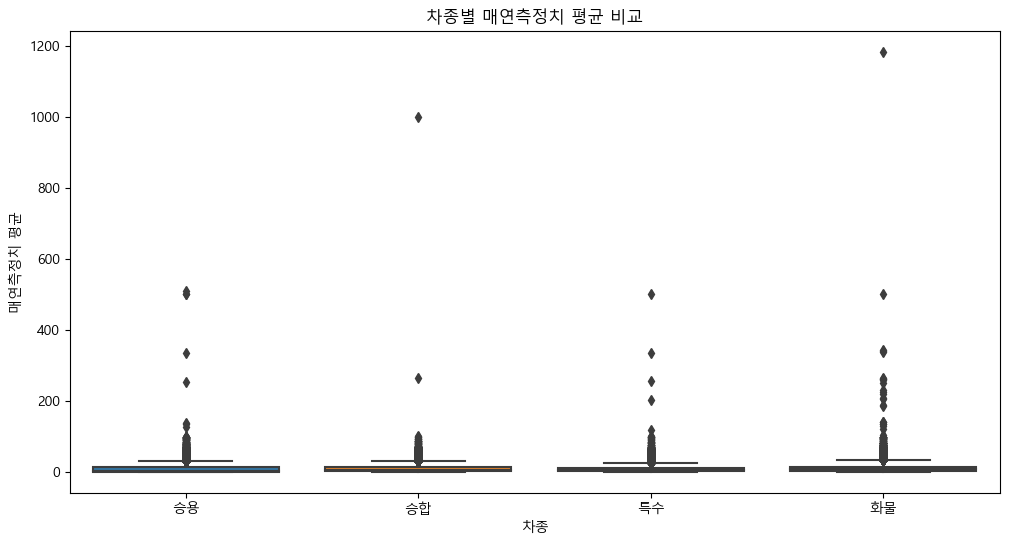

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 차종별로 매연측정치 평균을 계산한 DataFrame
df521 = cs2gamir_구조변경Y_2.groupby(['제작사대표명','배출가스등급','차종','차종유형','검사구분', '연료' ,'검사일자_연도','검사일자_월', '검사일자_분기', '구조변경일전후','구조변경구분'], dropna=False)[['일산화탄소측정치', '탄화수소측정치', '질소산화물측정치','매연측정치']].mean().reset_index()

# Boxplot을 그리기 위해 데이터를 '차종' 컬럼을 기준으로 정렬
df521 = df521.sort_values(by='차종')

# Seaborn을 사용하여 Boxplot 그리기
plt.figure(figsize=(12, 6))
sns.boxplot(x='차종', y='매연측정치', data=df521)
plt.title('차종별 매연측정치 평균 비교')
plt.xlabel('차종')
plt.ylabel('매연측정치 평균')
plt.show()

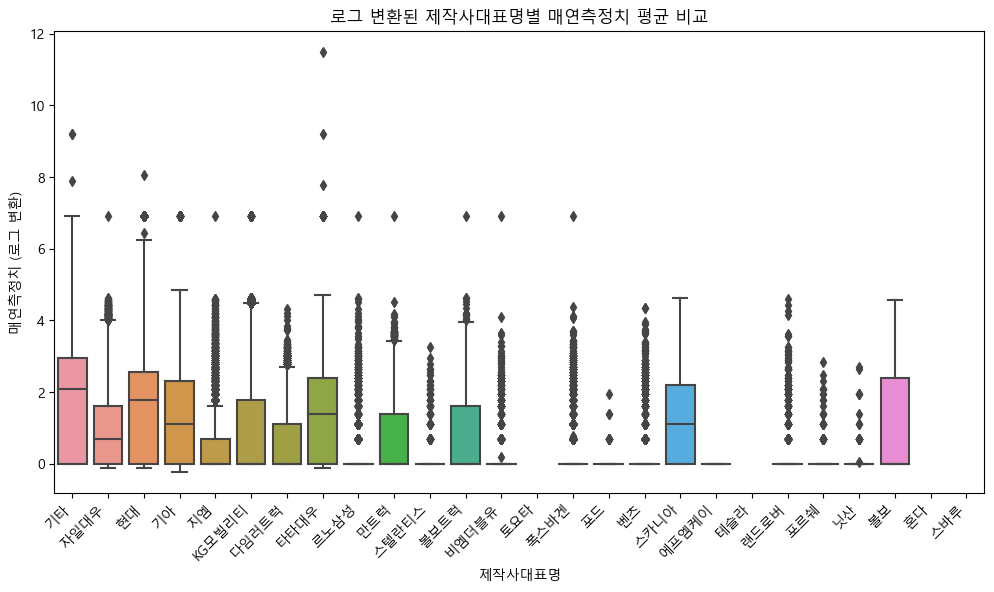

In [ ]:
import numpy as np

# 매연측정치에 로그 변환 적용
cs2gamir_구조변경Y_2['매연측정치_log'] = np.log1p(cs2gamir_구조변경Y_2['매연측정치'])

# 로그 변환된 매연측정치를 사용한 Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='제작사대표명', y='매연측정치_log', data=cs2gamir_구조변경Y_2)
plt.title('로그 변환된 제작사대표명별 매연측정치 평균 비교')
plt.xlabel('제작사대표명')
plt.ylabel('매연측정치 (로그 변환)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
cs2gamir_구조변경Y_2.columns

Index(['차대번호', '배출가스등급', '차종', '배출가스인증번호', '연료', '제작사대표명', '구조변경구분', '차종유형',
       '저감장치구분', '구조변경일자', '장치부착일자', '저감장치종류', '저공해조치여부', '검사일자', '일산화탄소측정치',
       '탄화수소측정치', '질소산화물측정치', '검사방법', '검사종류', '검사구분', '구조변경일전후', '매연측정치',
       '검사일자_연도', '검사일자_월', '검사일자_일', '검사일자_분기'],
      dtype='object')

### STD_BD52_2_SI_CMP_CL

In [ ]:
구조변경ins_정밀정검.to_csv(path + 'raw\\VSYSD\\구조변경in_정밀정검(기본컬럼).csv', index=False)

In [ ]:
print('data length:', format(len(cs2gamir_구조변경Y_2),','))
print(len(cs2gamir_구조변경Y_2[(cs2gamir_구조변경Y_2['검사구분']=='수시')]))
print(len(cs2gamir_구조변경Y_2[(cs2gamir_구조변경Y_2['검사구분']=='정기') | (cs2gamir_구조변경Y_2['검사구분']=='정밀') ]))
print(len(cs2gamir_구조변경Y_2[cs2gamir_구조변경Y_2['검사구분'].isnull()]))

data length: 4,420,408
445535
3971762
3111


In [ ]:
#
## 구조변경 전/후 배출가스 변화 (정밀점검일자 기준)
구조변경ins_정밀정검 = 구조변경ins[구조변경ins['검사구분'].notnull()]
구조변경ins_정밀정검 = 구조변경ins_정밀정검[['차대번호','배출가스등급','차종','배출가스인증번호','연료','제작사대표명','구조변경구분','차종유형','저감장치구분',
                        '구조변경일자','장치부착일자','저감장치종류','저공해조치여부','검사일자','무부하매연측정치1','무부하매연측정치2','무부하매연측정치3','무부하매연허용치1','무부하매연허용치2','무부하매연허용치3',
                        '검사방법','검사종류','검사구분','']] #'측정일자', '일산화탄소측정치','탄화수소측정치','질소산화물측정치','매연측정치']]

구조변경ins_정밀정검.head()

,차대번호,배출가스등급,차종,배출가스인증번호,연료,제작사대표명,구조변경구분,차종유형,저감장치구분,구조변경일자,장치부착일자,저감장치종류,저공해조치여부,검사일자,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,검사방법,검사종류,검사구분
0,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20120106.00,0.00,NaN,NaN,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀
1,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20131220.00,7.00,NaN,NaN,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀
2,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20151224.00,10.00,NaN,NaN,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀
3,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20180125.00,4.00,NaN,NaN,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀
4,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20200123.00,11.00,0.00,NaN,0.00,0.00,0.00,부하검사(KD-147),종합검사,정밀


In [ ]:
## SI 지수
cs2gamir_구조변경Y_3 = 구조변경ins_정밀정검.copy()

## 정기/정밀만 가져오기. 
cs2gam_구조변경Y_정기정밀_si = cs2gamir_구조변경Y_3[(cs2gamir_구조변경Y_3['검사구분']=='정기') | (cs2gamir_구조변경Y_3['검사구분']=='정밀') ]
print('data length:', format(len(cs2gam_구조변경Y_정기정밀_si),','))

## SI 지수 구하기
cs2gam_구조변경Y_정기정밀_si.loc[cs2gam_구조변경Y_정기정밀_si['연료'] != '경유', 'CO_SI지수'] = cs2gam_구조변경Y_정기정밀_si['무부하매연측정치1'] / cs2gam_구조변경Y_정기정밀_si['무부하매연허용치1'] ##CO_SI지수 = 일산화산소 측정치 / 허용치1
cs2gam_구조변경Y_정기정밀_si.loc[cs2gam_구조변경Y_정기정밀_si['연료'] == '경유', '매연_SI지수'] = cs2gam_구조변경Y_정기정밀_si['무부하매연측정치1'] / cs2gam_구조변경Y_정기정밀_si['무부하매연허용치1'] ##매연_SI지수 = 매연 측정치 / 허용치1
cs2gam_구조변경Y_정기정밀_si['HC_SI지수'] = cs2gam_구조변경Y_정기정밀_si['무부하매연측정치2']/cs2gam_구조변경Y_정기정밀_si['무부하매연허용치2']  ##HC_SI지수 = 탄화수소 측정치 / 허용치2
cs2gam_구조변경Y_정기정밀_si['NOx_SI지수'] = cs2gam_구조변경Y_정기정밀_si['무부하매연측정치3']/cs2gam_구조변경Y_정기정밀_si['무부하매연허용치3']  ##HC_SI지수 = 질소산화물 측정치 / 허용치3

print('data length:', format(len(cs2gam_구조변경Y_정기정밀_si),','))
cs2gam_구조변경Y_정기정밀_si.head(2)

data length: 13,141,309
data length: 13,141,309


,차대번호,배출가스등급,차종,배출가스인증번호,연료,제작사대표명,구조변경구분,차종유형,저감장치구분,구조변경일자,장치부착일자,저감장치종류,저공해조치여부,검사일자,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,검사방법,검사종류,검사구분,차량연식,주행거리_y,CO_SI지수,매연_SI지수,HC_SI지수,NOx_SI지수
0,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20120106.00,0.00,NaN,NaN,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,2006,77123.00,NaN,NaN,NaN,NaN
1,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20131220.00,7.00,NaN,NaN,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,2006,93486.00,NaN,NaN,NaN,NaN


In [ ]:
## 차령 (현재년도 - 연식)
cs2gam_구조변경Y_정기정밀_si['차령'] =  datetime.today().year -  cs2gam_구조변경Y_정기정밀_si['차량연식']
cs2gam_구조변경Y_정기정밀_si['차령']  ##더 정확히 할 필요?

0           18
1           18
2           18
3           18
4           18
            ..
13230366    22
13230367    22
13230368    22
13230369    22
13230370    22
Name: 차령, Length: 13141309, dtype: int64

In [ ]:
conditions = [
    cs2gam_구조변경Y_정기정밀_si['구조변경일자'] > cs2gam_구조변경Y_정기정밀_si['검사일자'],
    cs2gam_구조변경Y_정기정밀_si['구조변경일자'] <= cs2gam_구조변경Y_정기정밀_si['검사일자']
]
choices = ['전', '후']

cs2gam_구조변경Y_정기정밀_si['구조변경일전후'] = np.select(conditions, choices, default=np.nan)
print('data length:', format(len(cs2gam_구조변경Y_정기정밀_si),','))
cs2gam_구조변경Y_정기정밀_si.head(2)

data length: 13,141,309


,차대번호,배출가스등급,차종,배출가스인증번호,연료,제작사대표명,구조변경구분,차종유형,저감장치구분,구조변경일자,장치부착일자,저감장치종류,저공해조치여부,검사일자,무부하매연측정치1,무부하매연측정치2,무부하매연측정치3,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,검사방법,검사종류,검사구분,차량연식,주행거리_y,CO_SI지수,매연_SI지수,HC_SI지수,NOx_SI지수,차령,구조변경일전후
0,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20120106.00,0.00,NaN,NaN,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,2006,77123.00,NaN,NaN,NaN,NaN,18,전
1,KNAJC52136A567050,NaN,승용,NaN,경유,기타,배기가스발산방지장치,대형,1종,20200311.00,20200311.00,A1305,Y,20131220.00,7.00,NaN,NaN,NaN,NaN,NaN,부하검사(KD-147),종합검사,정밀,2006,93486.00,NaN,NaN,NaN,NaN,18,전


In [ ]:
cs2gam_구조변경Y_정기정밀_si.to_csv(path + "raw\\분석자료\\STD_BD52_2_SI_CMP_CL.csv", index=False)

In [ ]:
열화도_차령 =cs2gam_구조변경Y_정기정밀_si.groupby(['제작사대표명', '배출가스인증번호', '연료', '검사구분', '검사방법','구조변경일전후','차령'], dropna=False)[['CO_SI지수', 'HC_SI지수', 'NOx_SI지수', '매연_SI지수']].mean().reset_index()
print('data length:', format(len(열화도_차령),','))
열화도_차령.head()

data length: 29,009


,제작사대표명,배출가스인증번호,연료,검사구분,검사방법,구조변경일전후,차령,CO_SI지수,HC_SI지수,NOx_SI지수,매연_SI지수
0,KG모빌리티,1MY-SY-G07,휘발유,정기,무부하검사(TSI),전,18,0.08,0.06,9.90,NaN
1,KG모빌리티,1MY-SY-G07,휘발유,정기,무부하검사(TSI),전,19,0.00,0.34,10.10,NaN
2,KG모빌리티,1MY-SY-G07,휘발유,정기,무부하검사(TSI),전,21,0.08,0.33,10.50,NaN
3,KG모빌리티,1MY-SY-G07,휘발유,정기,무부하검사(TSI),전,22,0.08,0.53,10.03,NaN
4,KG모빌리티,1MY-SY-G07,휘발유,정기,무부하검사(TSI),후,18,0.00,0.19,10.35,NaN


In [ ]:
## 열화도(주행거리 기반)

a = cs2gam_구조변경Y_정기정밀_si['주행거리_y']
a.isnull().sum()

39400

In [ ]:
열화도_차령_주행거리 = cs2gam_구조변경Y_정기정밀_si.groupby(['제작사대표명', '배출가스인증번호', '연료', '검사구분', '검사방법', '구조변경일전후','차령','주행거리_y','차종','배출가스등급'], dropna=False)[['CO_SI지수', 'HC_SI지수', 'NOx_SI지수', '매연_SI지수']].mean().reset_index()
print('data length:', format(len(열화도_차령_주행거리),','))
열화도_차령_주행거리

data length: 11,751,867


,제작사대표명,배출가스인증번호,연료,검사구분,검사방법,구조변경일전후,차령,주행거리_y,차종,배출가스등급,CO_SI지수,HC_SI지수,NOx_SI지수,매연_SI지수
0,KG모빌리티,1MY-SY-G07,휘발유,정기,무부하검사(TSI),전,18,151022.00,승용,3.00,0.08,0.06,9.90,NaN
1,KG모빌리티,1MY-SY-G07,휘발유,정기,무부하검사(TSI),전,19,144290.00,승용,3.00,0.00,0.30,10.10,NaN
2,KG모빌리티,1MY-SY-G07,휘발유,정기,무부하검사(TSI),전,19,154747.00,승용,3.00,0.00,0.60,10.20,NaN
3,KG모빌리티,1MY-SY-G07,휘발유,정기,무부하검사(TSI),전,19,277806.00,승용,3.00,0.00,0.10,10.00,NaN
4,KG모빌리티,1MY-SY-G07,휘발유,정기,무부하검사(TSI),전,21,72910.00,승용,3.00,0.00,0.07,10.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751862,혼다,JMY-HK-13-2,휘발유,정기,무부하검사(TSI),후,5,66055.00,승용,1.00,0.00,0.09,10.10,NaN
11751863,혼다,JMY-HK-14-4,휘발유,정기,무부하검사(TSI),후,5,25998.00,승용,2.00,0.01,0.00,10.00,NaN
11751864,혼다,JMY-HK-14-4,휘발유,정기,무부하검사(TSI),후,5,32833.00,승용,2.00,0.00,0.00,10.00,NaN
11751865,혼다,JMY-HK-14-4,휘발유,정기,무부하검사(TSI),후,5,56712.00,승용,2.00,0.00,0.00,10.00,NaN


In [ ]:
열화도_차령_주행거리[열화도_차령_주행거리['CO_SI지수']>=3]

,제작사대표명,배출가스인증번호,연료,검사구분,검사방법,구조변경일전후,차령,주행거리_y,차종,배출가스등급,CO_SI지수,HC_SI지수,NOx_SI지수,매연_SI지수
50,KG모빌리티,1MY-SY-G07,휘발유,정기,무부하검사(TSI),후,21,91770.00,승용,3.00,6.67,2.22,7.60,NaN
76,KG모빌리티,1MY-SY-G07,휘발유,정기,무부하검사(TSI),후,22,129318.00,승용,3.00,3.42,1.48,8.80,NaN
78,KG모빌리티,1MY-SY-G07,휘발유,정기,무부하검사(TSI),후,22,165863.00,승용,3.00,5.33,2.16,8.60,NaN
82,KG모빌리티,1MY-SY-G07,휘발유,정기,무부하검사(TSI),후,22,206091.00,승용,3.00,6.67,2.61,7.50,NaN
135,KG모빌리티,1MY-SY-G07,휘발유,정밀,무부하검사(TSI),전,22,180660.00,승용,3.00,9.75,2.20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11751761,혼다,FMY-HK-14-5,휘발유,정밀,부하검사(ASM-Idling),전,7,61043.00,승용,2.00,inf,0.95,NaN,NaN
11751780,혼다,GMY-HK-14-1,휘발유,정밀,부하검사(ASM-Idling),후,7,50457.00,승용,2.00,inf,0.21,NaN,NaN
11751783,혼다,GMY-HK-14-1,휘발유,정밀,부하검사(ASM-Idling),후,7,123386.00,승용,2.00,inf,0.00,NaN,NaN
11751853,혼다,HMY-HK-14-3,휘발유,정밀,부하검사(ASM-Idling),후,5,93053.00,승용,2.00,inf,0.00,NaN,NaN


In [ ]:
열화도_차령_주행거리.columns

Index(['제작사대표명', '배출가스인증번호', '연료', '검사구분', '검사방법', '구조변경일전후', '차령', '주행거리_y',
       '차종', '배출가스등급', 'CO_SI지수', 'HC_SI지수', 'NOx_SI지수', '매연_SI지수'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

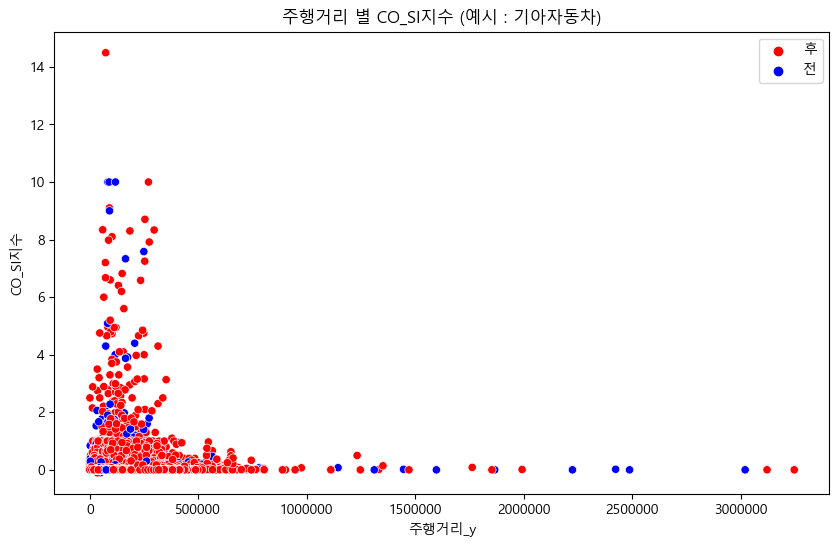

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 준비


열화도_차령_주행거리 = cs2gam_구조변경Y_정기정밀_si.groupby(['제작사대표명', '배출가스인증번호', '연료', '검사구분', '검사방법', '구조변경일전후','차령','주행거리_y','차종','배출가스등급'], dropna=False)[['CO_SI지수', 'HC_SI지수', 'NOx_SI지수', '매연_SI지수']].mean().reset_index()
data = 열화도_차령_주행거리[열화도_차령_주행거리['제작사대표명']=='기아']

# 전과 후에 대한 값을 가진 열 생성 (예시 데이터, 실제 데이터에 따라 변경)
data ['전후'] = np.where(data ['구조변경일전후'] == '전', '전', '후')

# 새로운 그림(figure) 생성 및 크기 설정
plt.figure(figsize=(10, 6))

# Seaborn을 사용하여 산점도 그리기
sns.scatterplot(data=data , x='주행거리_y', y='CO_SI지수', hue='전후', palette={'전': 'blue', '후': 'red'})

# 그래프 제목 설정
plt.title('주행거리 별 CO_SI지수 (예시 : 기아자동차)')

# 축에 대한 지수 표기법 비활성화
plt.ticklabel_format(style='plain', axis='both')

# 범례 위치 조절
plt.legend(loc='upper right')

# 그래프 표시
plt.show()


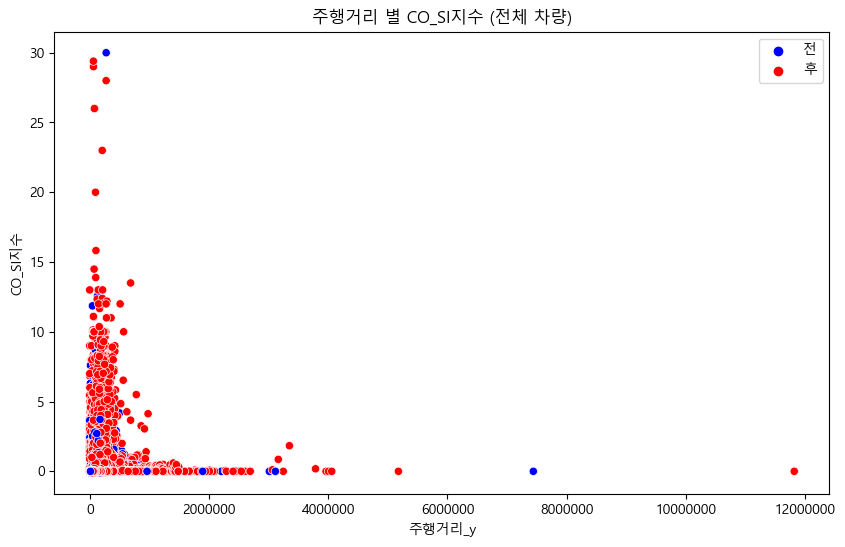

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 준비
data = 열화도_차령_주행거리

열화도_차령_주행거리 = cs2gam_구조변경Y_정기정밀_si.groupby(['제작사대표명', '배출가스인증번호', '연료', '검사구분', '검사방법', '구조변경일전후','차령','주행거리_y','차종','배출가스등급'], dropna=False)[['CO_SI지수', 'HC_SI지수', 'NOx_SI지수', '매연_SI지수']].mean().reset_index()

# 전과 후에 대한 값을 가진 열 생성 (예시 데이터, 실제 데이터에 따라 변경)
열화도_차령_주행거리['전후'] = np.where(열화도_차령_주행거리['구조변경일전후'] == '전', '전', '후')

# 새로운 그림(figure) 생성 및 크기 설정
plt.figure(figsize=(10, 6))

# Seaborn을 사용하여 산점도 그리기
sns.scatterplot(data=열화도_차령_주행거리, x='주행거리_y', y='CO_SI지수', hue='전후', palette={'전': 'blue', '후': 'red'})

# 그래프 제목 설정
plt.title('주행거리 별 CO_SI지수 (전체 차량)')

# 축에 대한 지수 표기법 비활성화
plt.ticklabel_format(style='plain', axis='both')

# 범례 위치 조절
plt.legend(loc='upper right')

# 그래프 표시
plt.show()


In [ ]:
열화도_차령_주행거리.to_csv(path + 'raw\\분석자료\\df522(열화도차령주행거리).csv', index=False)

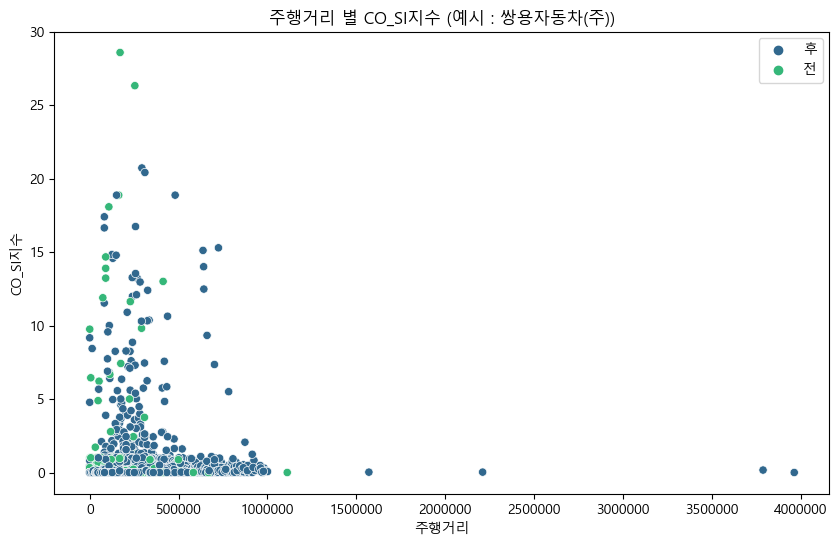

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 데이터 준비
data = 열화도_차령_주행거리[열화도_차령_주행거리['제작사명']=='쌍용자동차(주)']

# 새로운 그림(figure) 생성 및 크기 설정
plt.figure(figsize=(10, 6))

# Seaborn을 사용하여 산점도 그리기
sns.scatterplot(data=data, x='주행거리', y='CO_SI지수', hue='구조변경일전후', palette='viridis')

# 그래프 제목 설정
plt.title('주행거리 별 CO_SI지수 (예시 : 쌍용자동차(주))')

# 축에 대한 지수 표기법 비활성화
plt.ticklabel_format(style='plain', axis='both')

# 범례 위치 조절
plt.legend(loc='upper right')

# 그래프 표시
plt.show()

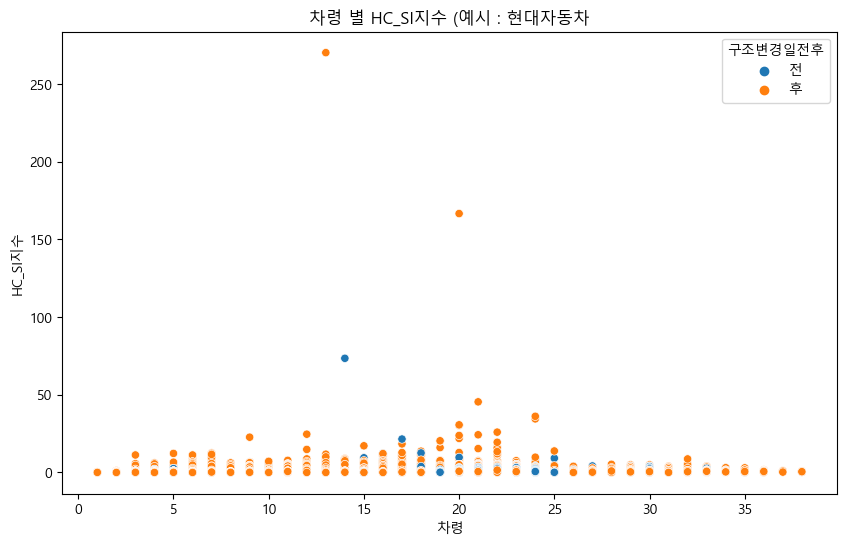

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# 데이터 준비
data = 열화도_차령_주행거리

# 새로운 그림(figure) 생성 및 크기 설정
plt.figure(figsize=(10, 6))

# 색상 팔레트 설정 (다른 색 5가지)
custom_palette = sns.color_palette("husl", 6)

# Seaborn을 사용하여 산점도 그리기
sns.scatterplot(data=data, x='차령', y='HC_SI지수', hue='구조변경일전후')


# 그래프 제목 설정
plt.title('차령 별 HC_SI지수 (예시 : 현대자동차')


# 축에 대한 지수 표기법 비활성화
plt.ticklabel_format(style='plain', axis='both')


# 그래프 표시
plt.show()

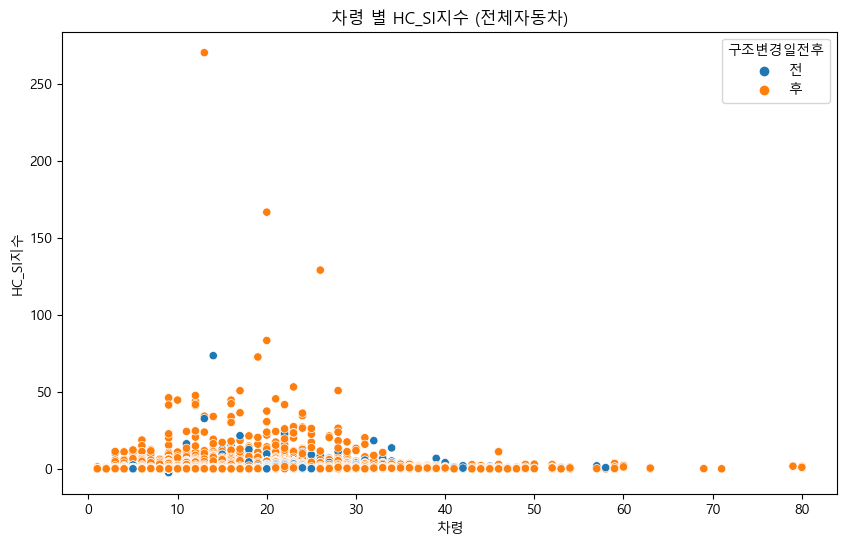

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# 데이터 준비
data = 열화도_차령_주행거리

# 새로운 그림(figure) 생성 및 크기 설정
plt.figure(figsize=(10, 6))

# 색상 팔레트 설정 (다른 색 5가지)
custom_palette = sns.color_palette("husl", 6)

# Seaborn을 사용하여 산점도 그리기
sns.scatterplot(data=data, x='차령', y='HC_SI지수', hue='구조변경일전후')


# 그래프 제목 설정
plt.title('차령 별 HC_SI지수 (전체자동차)')


# 축에 대한 지수 표기법 비활성화
plt.ticklabel_format(style='plain', axis='both')


# 그래프 표시
plt.show()

In [ ]:
열화도_차령_주행거리[열화도_차령_주행거리['제작사대표명']=='기아']

,제작사대표명,배출가스인증번호,연료,검사구분,검사방법,구조변경일전후,차령,주행거리_y,차종,배출가스등급,CO_SI지수,HC_SI지수,NOx_SI지수,매연_SI지수,전후
1386364,기아,1MY-KM-20,휘발유,정기,무부하검사(TSI),후,21,88737.00,승용,3.00,0.00,0.09,11.00,NaN,후
1386365,기아,1MY-KM-20,휘발유,정기,무부하검사(TSI),후,21,92493.00,승용,3.00,0.00,0.35,10.80,NaN,후
1386366,기아,1MY-KM-20,휘발유,정기,무부하검사(TSI),후,21,113597.00,승용,3.00,0.22,0.08,9.90,NaN,후
1386367,기아,1MY-KM-20,휘발유,정기,무부하검사(TSI),후,21,130539.00,승용,3.00,0.00,0.92,10.00,NaN,후
1386368,기아,1MY-KM-20,휘발유,정기,무부하검사(TSI),후,22,98997.00,승용,3.00,0.00,0.10,10.30,NaN,후
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888481,기아,YMY-KM-19,경유,정밀,부하검사(KD-147),후,22,115014.00,승용,5.00,NaN,NaN,NaN,NaN,후
2888482,기아,YMY-KM-19,경유,정밀,부하검사(KD-147),후,22,130057.00,승용,5.00,NaN,NaN,NaN,inf,후
2888483,기아,YMY-KM-19,경유,정밀,부하검사(KD-147),후,22,135250.00,승용,5.00,NaN,NaN,NaN,inf,후
2888484,기아,YMY-KM-19,경유,정밀,부하검사(LUG DOWN),전,22,48396.00,승용,5.00,NaN,0.43,NaN,1.92,전


In [ ]:
열화도_차령_주행거리[열화도_차령_주행거리['제작사대표명']=='기아'].to_excel(path +"raw\\분석자료\\df522(열화도차령주행거리_기아).xlsx", index=False)

ValueError: This sheet is too large! Your sheet size is: 1502122, 15 Max sheet size is: 1048576, 16384

In [ ]:
# ## 모든 문제 정답 하나의 엑셀 파일 + 다수의 sheet로 구분
# with pd.ExcelWriter('total_ans.xlsx') as writer:
#     df11.to_excel(writer, sheet_name='1-1', index=False)
#     df12.to_excel(writer, sheet_name='1-2', index=False)
#     df13.to_excel(writer, sheet_name='1-3', index=False)
#     df21.to_excel(writer, sheet_name='2-1', index=False)
#     df22.to_excel(writer, sheet_name='2-2', index=False)
#     df23.to_excel(writer, sheet_name='2-3', index=False)
#     df31.to_excel(writer, sheet_name='3-1', index=False)
#     df33.to_excel(writer, sheet_name='3-3', index=False)
#     df41.to_excel(writer, sheet_name='4-1', index=False)
#     df42.to_excel(writer, sheet_name='4-2', index=False)

In [ ]:
# # 쌍용자동차(주)의 인증번호별 'CO_SI지수'에 대한 기술 통계량 구하기
# test = 열화도_차령_주행거리[열화도_차령_주행거리['제작사명'] == '쌍용자동차(주)'].groupby('배출가스인증번호')[['CO_SI지수','HC_SI지수']].describe()

# # 결과 출력
# print(test)

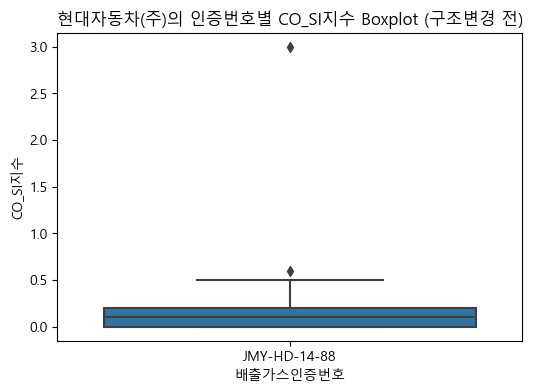

In [ ]:
plt.figure(figsize=(6,4))

# 박스플롯 그리기
sns.boxplot(x='배출가스인증번호', y='CO_SI지수', data=열화도_차령_주행거리[(열화도_차령_주행거리['구조변경일전후'] == '전')&(열화도_차령_주행거리['제작사명'] == '현대자동차(주)')&(열화도_차령_주행거리['배출가스인증번호'] =='JMY-HD-14-88')])

# 그래프 제목 설정
plt.title('현대자동차(주)의 인증번호별 CO_SI지수 Boxplot (구조변경 전)')

# x축 라벨 설정
plt.xlabel('배출가스인증번호')

# y축 라벨 설정
plt.ylabel('CO_SI지수')

# 그래프 표시
plt.show()

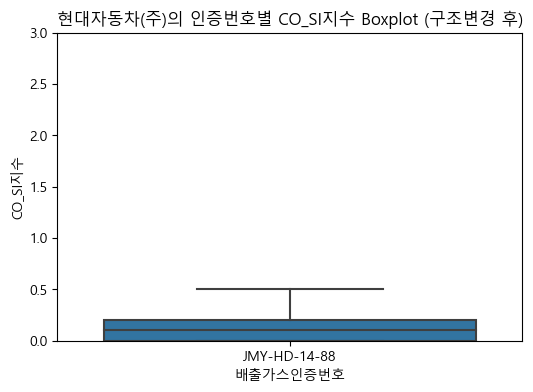

In [ ]:
plt.figure(figsize=(6,4))

# 박스플롯 그리기
sns.boxplot(x='배출가스인증번호', y='CO_SI지수', data=열화도_차령_주행거리[(열화도_차령_주행거리['구조변경일전후'] == '후')&(열화도_차령_주행거리['제작사명'] == '현대자동차(주)')&(열화도_차령_주행거리['배출가스인증번호'] =='JMY-HD-14-88')])

# 그래프 제목 설정
plt.title('현대자동차(주)의 인증번호별 CO_SI지수 Boxplot (구조변경 후)')

# x축 라벨 설정
plt.xlabel('배출가스인증번호')

# y축 라벨 설정
plt.ylabel('CO_SI지수')
# Y 축 범위 설정
plt.ylim(0, 3)

# 그래프 표시
plt.show()

In [ ]:
##test

In [ ]:
ins = pd.read_csv("C:\\Users\\kbjung\\Downloads\\정기정밀.csv")

### STD_BD53_1_EXHST_GAS_PRMT_CRTR

In [ ]:
csi = csi20.copy()

In [ ]:
csi_정기정밀 = csi[csi['검사구분'].notnull()]
csi_정기정밀['검사구분'].unique()

array(['정기', '정밀'], dtype=object)

In [ ]:
csi_정기정밀.shape

(45341594, 17)

In [ ]:
max(csi_정기정밀['검사일자'])

20231121.0

In [ ]:
# csi_정기정밀_2020 = csi_정기정밀[csi_정기정밀['검사일자']>=20200101]
# csi_정기정밀_2020

In [ ]:
csi_정기정밀_2020 = csi_정기정밀.copy()

In [ ]:
## 2020년 이후 검사부터 분석

# ## 차령 (현재년도 - 최초등록일자)
# csi_정기정밀_2020['차령'] =  datetime.today().year -  pd.to_datetime(csi_정기정밀_2020['최초등록일자'], format='%Y%m%d').dt.year
# csi_정기정밀_2020.head(2)

# #차령이 1인 행 추출
# a=csi_정기정밀_2020[csi_정기정밀_2020['차령']==1]
# a.to_excel(path + "raw\\차령1데이터(2).xlsx", index=False)

In [ ]:
## 연료가 경유인 컬럼의 측정치/허용치 분류

csi_정기정밀_2020.loc[csi_정기정밀_2020['연료'] == '경유', ['매연측정치']] = csi_정기정밀_2020['무부하매연측정치1']
csi_정기정밀_2020.loc[csi_정기정밀_2020['연료'] == '경유', ['무부하매연측정치1','무부하매연측정치2', '무부하매연측정치3']] = np.nan
csi_정기정밀_2020 = csi_정기정밀_2020.rename(columns={'무부하매연측정치1':'일산화탄소측정치', '무부하매연측정치2':'탄화수소측정치', '무부하매연측정치3':'질소산화물측정치'})
print('data length:', format(len(csi_정기정밀_2020),','))
csi_정기정밀_2020.head(2)

data length: 45,341,594


,차대번호,배출가스등급,차종,배출가스인증번호,연료,차종유형,제작사대표명,배출가스인증번호(차명),검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,무부하매연허용치1,무부하매연허용치2,무부하매연허용치3,검사방법,검사구분,매연측정치
1,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20200709.00,NaN,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,22.00
2,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20201221.00,NaN,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,32.00


In [ ]:
## 연료가 경유인 컬럼의 측정치/허용치 분류
csi_정기정밀_2020.loc[csi_정기정밀_2020['연료'] == '경유', ['매연허용치']] = csi_정기정밀_2020['무부하매연허용치1']
csi_정기정밀_2020.loc[csi_정기정밀_2020['연료'] == '경유', ['무부하매연허용치1','무부하매연허용치2', '무부하매연허용치3']] = np.nan
csi_정기정밀_2020 = csi_정기정밀_2020.rename(columns={'무부하매연허용치1':'일산화탄소허용치','무부하매연허용치2':'탄화수소허용치', '무부하매연허용치3':'질소산화물허용치'})
print('data length:', format(len(csi_정기정밀_2020),','))
csi_정기정밀_2020.head(2)

data length: 45,341,594


,차대번호,배출가스등급,차종,배출가스인증번호,연료,차종유형,제작사대표명,배출가스인증번호(차명),검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사방법,검사구분,매연측정치,매연허용치
1,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20200709.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,22.00,60.00
2,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20201221.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,32.00,60.00


In [ ]:
## 검사일자의 연도/월 컬럼 생성
csi_정기정밀_2020['검사일자_연도'] = csi_정기정밀_2020['검사일자'].astype(str).str[:4]
csi_정기정밀_2020['검사일자_월'] = csi_정기정밀_2020['검사일자'].astype(str).str[4:6]
csi_정기정밀_2020['검사일자_일'] = csi_정기정밀_2020['검사일자'].astype(str).str[6:8]
print('data length:', format(len(csi_정기정밀_2020),','))

# ## 제작일자의 연도/월 컬럼 생성
# csi_정기정밀_2020['제작일자_연도'] = csi_정기정밀_2020['제작일자'].astype(str).str[:4]
# csi_정기정밀_2020['제작일자_월'] = csi_정기정밀_2020['제작일자'].astype(str).str[4:6]
# csi_정기정밀_2020['제작일자_일'] = csi_정기정밀_2020['제작일자'].astype(str).str[6:8]
# print('data length:', format(len(csi_정기정밀_2020),','))

# # 11.2s
# ## 검사판정 정제
# csi_정기정밀_2020['검사판정'] = csi_정기정밀_2020['검사판정'].replace("5", np.nan).replace("8", np.nan).replace("x", np.nan)
# print('data length:', format(len(csi_정기정밀_2020),','))
# print('data length:', format(len(csi_정기정밀_2020),','))
# csi_정기정밀_2020.head(2)

data length: 45,341,594


In [ ]:
csi_정기정밀_2020.columns

Index(['차대번호', '배출가스등급', '차종', '배출가스인증번호', '연료', '차종유형', '제작사대표명',
       '배출가스인증번호(차명)', '검사일자', '일산화탄소측정치', '탄화수소측정치', '질소산화물측정치', '일산화탄소허용치',
       '탄화수소허용치', '질소산화물허용치', '검사방법', '검사구분', '매연측정치', '매연허용치', '검사일자_연도',
       '검사일자_월', '검사일자_일'],
      dtype='object')

In [ ]:
csi_정기정밀_2020.to_csv(path + "raw\\VSYSD\\등록제원정기정밀(최근4년)_전처리1(정제)_20240115.csv", index=False)

In [ ]:
csi_정기정밀_2020 = pd.read_csv(path + "raw\\VSYSD\\등록제원정기정밀(최근4년)_전처리1(정제)_20240115.csv")

In [ ]:
csi_정기정밀_2020.head()

,차대번호,배출가스등급,차종,배출가스인증번호,연료,차종유형,제작사대표명,배출가스인증번호(차명),검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사방법,검사구분,매연측정치,매연허용치,검사일자_연도,검사일자_월,검사일자_일
1,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20200709.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,22.00,60.00,2020,07,09
2,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20201221.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,32.00,60.00,2020,12,21
3,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20210604.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,21.00,60.00,2021,06,04
4,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20211207.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,9.00,60.00,2021,12,07
5,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20220704.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,15.00,60.00,2022,07,04


In [ ]:
csi_정기정밀_2020.loc[(csi_정기정밀_2020['배출가스인증번호(차명)']!='기타') & (csi_정기정밀_2020['배출가스인증번호(차명)'].isnull()), ['배출가스인증번호(차명)']] = csi_정기정밀_2020['배출가스인증번호']
csi_정기정밀_2020.head(2)

,차대번호,배출가스등급,차종,배출가스인증번호,연료,차종유형,제작사대표명,배출가스인증번호(차명),검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사방법,검사구분,매연측정치,매연허용치,검사일자_연도,검사일자_월,검사일자_일
1,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20200709.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,22.00,60.00,2020,07,09
2,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20201221.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,32.00,60.00,2020,12,21


In [ ]:
columns_to_check = ['일산화탄소측정치', '탄화수소측정치', '질소산화물측정치', '매연측정치', '일산화탄소허용치', '탄화수소허용치', '질소산화물허용치', '매연허용치']
csi_정기정밀_결측정제 = csi_정기정밀_2020.replace(0, np.nan).dropna(subset=columns_to_check, how='all')
csi_정기정밀_결측정제

,차대번호,배출가스등급,차종,배출가스인증번호,연료,차종유형,제작사대표명,배출가스인증번호(차명),검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사방법,검사구분,매연측정치,매연허용치,검사일자_연도,검사일자_월,검사일자_일
1,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20200709.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,22.00,60.00,2020,07,09
2,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20201221.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,32.00,60.00,2020,12,21
3,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20210604.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,21.00,60.00,2021,06,04
4,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20211207.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,9.00,60.00,2021,12,07
5,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20220704.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,15.00,60.00,2022,07,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51957103,sl67c027628,5.00,화물,NaN,경유,중형,기타,NaN,20210917.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,11.00,60.00,2021,09,17
51957104,sl67c027628,5.00,화물,NaN,경유,중형,기타,NaN,20220308.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,5.00,60.00,2022,03,08
51957105,sl67c027628,5.00,화물,NaN,경유,중형,기타,NaN,20220908.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,39.00,60.00,2022,09,08
51957106,sl67c027628,5.00,화물,NaN,경유,중형,기타,NaN,20230306.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,2.00,60.00,2023,03,06


In [ ]:
csi_정기정밀_2020.to_csv(path + "raw\\VSYSD\\등록제원정기정밀(최근4년)_전처리1(정제)_20240115.csv", index=False)

In [ ]:
csi_정기정밀_정제완료 = csi_정기정밀_결측정제[~(((csi_정기정밀_결측정제['연료']=='휘발유') & (csi_정기정밀_결측정제['일산화탄소허용치']>=8)) | ((csi_정기정밀_결측정제['연료']=='경유') & (csi_정기정밀_결측정제['매연허용치']<8)))]
csi_정기정밀_정제완료.head()

,차대번호,배출가스등급,차종,배출가스인증번호,연료,차종유형,제작사대표명,배출가스인증번호(차명),검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사방법,검사구분,매연측정치,매연허용치,검사일자_연도,검사일자_월,검사일자_일
1,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20200709.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,22.00,60.00,2020,07,09
2,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20201221.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,32.00,60.00,2020,12,21
3,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20210604.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,21.00,60.00,2021,06,04
4,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20211207.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,9.00,60.00,2021,12,07
5,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20220704.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,15.00,60.00,2022,07,04


In [ ]:
csi_정기정밀_정제완료.shape

(42097652, 22)

In [ ]:
csi_정기정밀_정제완료.to_csv(path + "raw\\VSYSD\\등록제원정기정밀(최근4년)_정제완료_20240115.csv", index=False)

수치이상 확인

In [ ]:
##측정치, 허용치 정제
test = csi_정기정밀_2020[((csi_정기정밀_2020['연료']=='휘발유') & (csi_정기정밀_2020['일산화탄소허용치']>=8)) | ((csi_정기정밀_2020['연료']=='경유') & (csi_정기정밀_2020['매연허용치']<8))]
test

,차대번호,배출가스등급,차종,배출가스인증번호,연료,차종유형,제작사대표명,배출가스인증번호(차명),검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사방법,검사구분,매연측정치,매연허용치,검사일자_연도,검사일자_월,검사일자_일
7,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20221208.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,0.00,0.00,2022,12,08
8,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20221229.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,0.00,0.00,2022,12,29
25,000000KG44C100279,5.00,화물,NaN,경유,중형,기타,NaN,20210503.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,0.00,0.00,2021,05,03
60,000000SL44C011933,5.00,화물,NaN,경유,대형,기타,NaN,20231106.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,0.00,0.00,2023,11,06
70,01441201316,5.00,화물,NaN,경유,중형,기타,NaN,20210622.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,0.00,0.00,2021,06,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51952814,ZN661TUGXHX248886,3.00,승용,GMY-FM-14-1,경유,대형,에프엠케이,GMY-FM-14-1(마세라티 르반떼 디젤),20210614.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,0.00,0.00,2021,06,14
51952817,ZN661TUGXHX250475,3.00,승용,GMY-FM-14-1,경유,대형,에프엠케이,GMY-FM-14-1(마세라티 르반떼 디젤),20211228.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,0.00,0.00,2021,12,28
51952819,ZN661TUGXHX253554,3.00,승용,GMY-FM-14-1,경유,대형,에프엠케이,GMY-FM-14-1(마세라티 르반떼 디젤),20231114.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,0.00,0.00,2023,11,14
51952858,ZN661TUGXJX288407,3.00,승용,GMY-FM-14-1,경유,대형,에프엠케이,GMY-FM-14-1(마세라티 르반떼 디젤),20220506.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,0.00,0.00,2022,05,06


In [ ]:
csi_정기정밀_결측정제_수치이상 = csi_정기정밀_결측정제[((csi_정기정밀_결측정제['연료']=='휘발유') & (csi_정기정밀_결측정제['일산화탄소허용치']>=8)) | ((csi_정기정밀_결측정제['연료']=='경유') & (csi_정기정밀_결측정제['매연허용치']<8))]
csi_정기정밀_결측정제_수치이상

,차대번호,배출가스등급,차종,배출가스인증번호,연료,차종유형,제작사대표명,배출가스인증번호(차명),검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사방법,검사구분,매연측정치,매연허용치,검사일자_연도,검사일자_월,검사일자_일
75,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20210827.00,18.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2021,08,27
77,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20220222.00,10.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2022,02,22
78,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20221004.00,1.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2022,10,04
80,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20230530.00,15.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2023,05,30
249,01771300142,5.00,승용,NaN,경유,중형,기타,NaN,20220315.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(TSI),정밀,0.20,4.50,2022,03,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50272738,WDB2010241F648322,4.00,승용,NaN,휘발유,중형,기타,NaN,20220217.00,2.00,NaN,NaN,45.00,NaN,NaN,부하검사(KD-147),정밀,NaN,NaN,2022,02,17
51033976,WDDZF4KB3HA115523,2.00,승용,GMY-MK-14-8,휘발유,중형,벤츠,GMY-MK-14-8(E300 4Matic),20201211.00,2.00,NaN,NaN,20.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2020,12,11
51689766,WVWZZZAUZGW159860,3.00,승용,FMY-AD-14-22,휘발유,중형,폭스바겐,FMY-AD-14-22(Golf 2.0 TDI BMT),20200303.00,NaN,NaN,NaN,25.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2020,03,03
51752012,YV1744885J1201802,5.00,승용,NaN,경유,중형,기타,NaN,20200107.00,NaN,NaN,NaN,NaN,NaN,NaN,부하검사(ASM-Idling),정밀,0.85,1.21,2020,01,07


In [ ]:
구조변경이력Y.head()

,차대번호,차량관리번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,총중량,차명,차종유형,코드,제작사_선택,제작사N_사유,제작사대표명,차명_최빈값,차명_최빈값개수,배출가스인증번호(차명),구조변경일자,구조변경구분,구조변경이력여부
1,00000000CN67C4065,00000000CN67C4065-01,N,19671231.00,30471000000001,5.00,화물,NaN,1967,NaN,A91DS,지엠코리아(주),11265.00,GMC,A30M,NaN,N,제작사25_인증번호미기입,기타,EV6,51206.00,NaN,19910211.00,기타,Y
2,00000000CN67C4065,00000000CN67C4065-01,N,19671231.00,30471000000001,5.00,화물,NaN,1967,NaN,A91DS,지엠코리아(주),11265.00,GMC,A30M,NaN,N,제작사25_인증번호미기입,기타,EV6,51206.00,NaN,19910211.00,기타,Y
5,000000JN44C000673,000000JN44C000673-01,N,19780516.00,30451200933999,5.00,화물,NaN,1944,19780516.00,A91DS,**기타**,7000.00,G.M.C,A30M,NaN,N,개인및특장_인증번호미기입,기타,EV6,51206.00,NaN,20090303.00,원동기,Y
6,000000KB37C006677,000000KB37C006677-01,N,19850610.00,10003100000002,5.00,승합,NaN,1985,19850610.00,A91DS,현대자동차(주),5625.00,포드중형버스,A30M,NaN,N,제작사25_인증번호미기입,기타,EV6,51206.00,NaN,19950718.00,물품적재장치,Y
10,000000KB55S004193,000000KB55S004193-01,N,19840111.00,30351200933966,NaN,화물,NaN,1955,NaN,A91DS,NaN,27800.00,인타트레이러,A30M,NaN,N,개인및특장_인증번호미기입,기타,EV6,51206.00,NaN,20000817.00,물품적재장치,Y


In [ ]:
구조변경이력Y['구조변경구분'].unique()

array(['기타', '원동기', '물품적재장치', '승차장치', '연료장치', '원형구변', '동력전달장치', '차체및차대',
       '등화장치', '배기가스발산방지장치', '소음방지장치', '휘발유 연료장치', nan, '조향장치',
       '1종저감장치부착(수도권특별법)', '연결및견인장치', '내압용기', '제동장치', '주행장치',
       '3종저감장치부착(수도권특별법)', '2종 저감장치부착(수도권특별법)', '1종 저감장치탈거(수도권특별법)',
       '전기장치', '저공해 경유엔진 부착(수도권특별법)', '저공해 가스(LPG CNG)엔진개조(수도권특별법)',
       '3종 저감장치탈거(수도권특별법)'], dtype=object)

In [ ]:
구조변경이력Y_연료 = 구조변경이력Y[구조변경이력Y['구조변경구분'].isin(['연료장치','휘발유 연료장치','저공해 경유엔진 부착(수도권특별법)','저공해 가스(LPG CNG)엔진개조(수도권특별법)'])]
구조변경이력Y_연료 = 구조변경이력Y_연료.drop_duplicates('차대번호')
구조변경이력Y_연료 = 구조변경이력Y_연료[['차대번호','구조변경이력여부']]
구조변경이력Y_연료.head()

,차대번호,구조변경이력여부
35,01451201380,Y
122,01742116357,Y
204,01771300784,Y
410,01794100002,Y
421,01801100289,Y


In [ ]:
구조변경이력Y2 = 구조변경이력Y[['차대번호','구조변경이력여부']]
구조변경이력Y2 = 구조변경이력Y2.drop_duplicates()
구조변경이력Y2

,차대번호,구조변경이력여부
1,00000000CN67C4065,Y
5,000000JN44C000673,Y
6,000000KB37C006677,Y
10,000000KB55S004193,Y
13,000000KG66C153063,Y
...,...,...
26469280,ZPBEB3ZL7PLA27020,Y
26469288,ZPBEB3ZL8PLA26409,Y
26469303,ZPBEB3ZL9PLA26113,Y
26469307,ZPBEB3ZLXPLA25116,Y


In [ ]:
검사_구조변경 = csi_정기정밀_결측정제_수치이상.merge(구조변경이력Y2, on='차대번호', how='left')
검사_구조변경

,차대번호,배출가스등급,차종,배출가스인증번호,연료,차종유형,제작사대표명,배출가스인증번호(차명),검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사방법,검사구분,매연측정치,매연허용치,검사일자_연도,검사일자_월,검사일자_일,구조변경이력여부
0,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20210827.00,18.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2021,08,27,Y
1,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20220222.00,10.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2022,02,22,Y
2,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20221004.00,1.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2022,10,04,Y
3,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20230530.00,15.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2023,05,30,Y
4,01771300142,5.00,승용,NaN,경유,중형,기타,NaN,20220315.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(TSI),정밀,0.20,4.50,2022,03,15,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24625,WDB2010241F648322,4.00,승용,NaN,휘발유,중형,기타,NaN,20220217.00,2.00,NaN,NaN,45.00,NaN,NaN,부하검사(KD-147),정밀,NaN,NaN,2022,02,17,Y
24626,WDDZF4KB3HA115523,2.00,승용,GMY-MK-14-8,휘발유,중형,벤츠,GMY-MK-14-8(E300 4Matic),20201211.00,2.00,NaN,NaN,20.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2020,12,11,NaN
24627,WVWZZZAUZGW159860,3.00,승용,FMY-AD-14-22,휘발유,중형,폭스바겐,FMY-AD-14-22(Golf 2.0 TDI BMT),20200303.00,NaN,NaN,NaN,25.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2020,03,03,NaN
24628,YV1744885J1201802,5.00,승용,NaN,경유,중형,기타,NaN,20200107.00,NaN,NaN,NaN,NaN,NaN,NaN,부하검사(ASM-Idling),정밀,0.85,1.21,2020,01,07,NaN


In [ ]:
검사_구조변경Y = 검사_구조변경[검사_구조변경['구조변경이력여부']=='Y']

In [ ]:
검사_구조변경2 = 검사_구조변경.merge(구조변경이력Y_연료, on='차대번호', how='left')
검사_구조변경2

,차대번호,배출가스등급,차종,배출가스인증번호,연료,차종유형,제작사대표명,배출가스인증번호(차명),검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사방법,검사구분,매연측정치,매연허용치,검사일자_연도,검사일자_월,검사일자_일,구조변경이력여부_x,구조변경이력여부_y
0,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20210827.00,18.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2021,08,27,Y,Y
1,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20220222.00,10.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2022,02,22,Y,Y
2,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20221004.00,1.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2022,10,04,Y,Y
3,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20230530.00,15.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2023,05,30,Y,Y
4,01771300142,5.00,승용,NaN,경유,중형,기타,NaN,20220315.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(TSI),정밀,0.20,4.50,2022,03,15,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24625,WDB2010241F648322,4.00,승용,NaN,휘발유,중형,기타,NaN,20220217.00,2.00,NaN,NaN,45.00,NaN,NaN,부하검사(KD-147),정밀,NaN,NaN,2022,02,17,Y,NaN
24626,WDDZF4KB3HA115523,2.00,승용,GMY-MK-14-8,휘발유,중형,벤츠,GMY-MK-14-8(E300 4Matic),20201211.00,2.00,NaN,NaN,20.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2020,12,11,NaN,NaN
24627,WVWZZZAUZGW159860,3.00,승용,FMY-AD-14-22,휘발유,중형,폭스바겐,FMY-AD-14-22(Golf 2.0 TDI BMT),20200303.00,NaN,NaN,NaN,25.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2020,03,03,NaN,NaN
24628,YV1744885J1201802,5.00,승용,NaN,경유,중형,기타,NaN,20200107.00,NaN,NaN,NaN,NaN,NaN,NaN,부하검사(ASM-Idling),정밀,0.85,1.21,2020,01,07,NaN,NaN


In [ ]:
검사_구조변경2 = 검사_구조변경2.rename({'구조변경이력여부_x' : '구조변경(전체)', '구조변경이력여부_y' : '구조변경(연료)'})
검사_구조변경2

,차대번호,배출가스등급,차종,배출가스인증번호,연료,차종유형,제작사대표명,배출가스인증번호(차명),검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사방법,검사구분,매연측정치,매연허용치,검사일자_연도,검사일자_월,검사일자_일,구조변경이력여부_x,구조변경이력여부_y
0,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20210827.00,18.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2021,08,27,Y,Y
1,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20220222.00,10.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2022,02,22,Y,Y
2,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20221004.00,1.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2022,10,04,Y,Y
3,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20230530.00,15.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2023,05,30,Y,Y
4,01771300142,5.00,승용,NaN,경유,중형,기타,NaN,20220315.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(TSI),정밀,0.20,4.50,2022,03,15,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24625,WDB2010241F648322,4.00,승용,NaN,휘발유,중형,기타,NaN,20220217.00,2.00,NaN,NaN,45.00,NaN,NaN,부하검사(KD-147),정밀,NaN,NaN,2022,02,17,Y,NaN
24626,WDDZF4KB3HA115523,2.00,승용,GMY-MK-14-8,휘발유,중형,벤츠,GMY-MK-14-8(E300 4Matic),20201211.00,2.00,NaN,NaN,20.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2020,12,11,NaN,NaN
24627,WVWZZZAUZGW159860,3.00,승용,FMY-AD-14-22,휘발유,중형,폭스바겐,FMY-AD-14-22(Golf 2.0 TDI BMT),20200303.00,NaN,NaN,NaN,25.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2020,03,03,NaN,NaN
24628,YV1744885J1201802,5.00,승용,NaN,경유,중형,기타,NaN,20200107.00,NaN,NaN,NaN,NaN,NaN,NaN,부하검사(ASM-Idling),정밀,0.85,1.21,2020,01,07,NaN,NaN


In [ ]:
# columns_to_check = ['일산화탄소측정치', '탄화수소측정치', '질소산화물측정치', '매연측정치', '일산화탄소허용치', '탄화수소허용치', '질소산화물허용치', '매연허용치']
# 검사_구조변경_최종 = 검사_구조변경2.replace(0, np.nan).dropna(subset=columns_to_check, how='all')
# 검사_구조변경_최종

,차대번호,배출가스등급,차종,배출가스인증번호,연료,차종유형,제작사대표명,배출가스인증번호(차명),검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사방법,검사구분,매연측정치,매연허용치,검사일자_연도,검사일자_월,검사일자_일,구조변경이력여부_x,구조변경이력여부_y
3,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20210827.00,18.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2021,08,27,Y,Y
4,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20220222.00,10.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2022,02,22,Y,Y
5,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20221004.00,1.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2022,10,04,Y,Y
6,01451201380,5.00,화물,NaN,휘발유,중형,기타,NaN,20230530.00,15.00,NaN,NaN,60.00,NaN,NaN,무부하검사(급가속),정기,NaN,NaN,2023,05,30,Y,Y
179,118533126949,5.00,화물,NaN,경유,소형,기타,NaN,20220827.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(TSI),정밀,0.20,2.50,2022,08,27,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267862,SALLDHMS8BA410728,3.00,승용,NaN,경유,대형,기타,NaN,20200520.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(TSI),정기,0.01,1.00,2020,05,20,Y,NaN
267863,SALLDHMS8BA410728,3.00,승용,NaN,경유,대형,기타,NaN,20230119.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(TSI),정기,NaN,1.00,2023,01,19,Y,NaN
267888,SL72A062920,5.00,화물,NaN,경유,경형,기타,NaN,20200129.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(정지가동),정밀,NaN,4.50,2020,01,29,Y,NaN
267889,SL72A062920,5.00,화물,NaN,경유,경형,기타,NaN,20230401.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(정지가동),정밀,0.90,4.50,2023,04,01,Y,NaN


In [ ]:
검사_구조변경2.to_excel(path + "raw\\구조변경(연료).xlsx", index=False)

In [ ]:
# ## SI 지수
# cs2gamir_구조변경Y_3 = csi_정기정밀_2020_2.copy()

# ## 정기/정밀만 가져오기. 
# cs2gam_구조변경Y_정기정밀_si = cs2gamir_구조변경Y_3[(cs2gamir_구조변경Y_3['검사구분']=='정기') | (cs2gamir_구조변경Y_3['검사구분']=='정밀') ]
# print('data length:', format(len(cs2gam_구조변경Y_정기정밀_si),','))

# ## SI 지수 구하기
# cs2gam_구조변경Y_정기정밀_si.loc[cs2gam_구조변경Y_정기정밀_si['연료'] != '경유', 'CO_SI지수'] = cs2gam_구조변경Y_정기정밀_si['무부하매연측정치1'] / cs2gam_구조변경Y_정기정밀_si['무부하매연허용치1'] ##CO_SI지수 = 일산화산소 측정치 / 허용치1
# cs2gam_구조변경Y_정기정밀_si.loc[cs2gam_구조변경Y_정기정밀_si['연료'] == '경유', '매연_SI지수'] = cs2gam_구조변경Y_정기정밀_si['무부하매연측정치1'] / cs2gam_구조변경Y_정기정밀_si['무부하매연허용치1'] ##매연_SI지수 = 매연 측정치 / 허용치1
# cs2gam_구조변경Y_정기정밀_si['HC_SI지수'] = cs2gam_구조변경Y_정기정밀_si['무부하매연측정치2']/cs2gam_구조변경Y_정기정밀_si['무부하매연허용치2']  ##HC_SI지수 = 탄화수소 측정치 / 허용치2
# cs2gam_구조변경Y_정기정밀_si['NOx_SI지수'] = cs2gam_구조변경Y_정기정밀_si['무부하매연측정치3']/cs2gam_구조변경Y_정기정밀_si['무부하매연허용치3']  ##HC_SI지수 = 질소산화물 측정치 / 허용치3

# print('data length:', format(len(cs2gam_구조변경Y_정기정밀_si),','))
# cs2gam_구조변경Y_정기정밀_si.head(2)

groupby

In [ ]:
grouped_측정치 = csi_정기정밀_정제완료.groupby(['제작사대표명', '배출가스인증번호(차명)', '검사구분', '검사방법', '연료'], dropna=False, as_index=True)['일산화탄소측정치', '탄화수소측정치', '질소산화물측정치', '매연측정치'].mean().reset_index()
grouped_측정치

,제작사대표명,배출가스인증번호(차명),검사구분,검사방법,연료,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치
0,KG모빌리티,1MY-SY-G07(렉스턴),정기,무부하검사(TSI),휘발유,0.61,137.24,1.09,NaN
1,KG모빌리티,1MY-SY-G07(렉스턴),정밀,무부하검사(TSI),휘발유,0.49,102.73,1.03,NaN
2,KG모빌리티,1MY-SY-G07(렉스턴),정밀,부하검사(ASM-Idling),휘발유,0.07,42.00,390.00,NaN
3,KG모빌리티,3MY-SY-02(렉스턴),정기,무부하검사(급가속),경유,NaN,NaN,NaN,23.87
4,KG모빌리티,3MY-SY-02(렉스턴),정밀,무부하검사(급가속),경유,NaN,NaN,NaN,19.40
...,...,...,...,...,...,...,...,...,...
9992,혼다,JMY-HK-14-4(PILOT),정밀,무부하검사(TSI),휘발유,0.06,6.64,1.03,NaN
9993,혼다,JMY-HK-14-5(HR-V 2WD),정기,무부하검사(TSI),휘발유,0.06,8.21,1.02,NaN
9994,혼다,JMY-HK-14-5(HR-V 2WD),정밀,부하검사(ASM-Idling),휘발유,NaN,3.00,2.00,NaN
9995,혼다,JMY-HK-14-6(CIVIC TURBO),정기,무부하검사(TSI),휘발유,0.09,10.36,1.04,NaN


In [ ]:
grouped_허용치2 = csi_정기정밀_정제완료.groupby(['제작사대표명', '배출가스인증번호(차명)', '검사구분', '연료'], dropna=False, as_index=True)

# 각 열에 대한 최빈값을 추출하되, 빈 그룹인 경우에는 NaN을 반환
grouped_허용치2 = grouped_허용치2.agg({
    '일산화탄소허용치': lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan,
    '탄화수소허용치': lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan,
    '질소산화물허용치': lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan,
    '매연허용치': lambda x: pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else np.nan
}).reset_index()

In [ ]:
# grouped_허용치 = csi_정기정밀_2020.groupby(['제작사대표명', '배출가스인증번호(차명)', '검사구분', '검사방법', '연료'], dropna=False, as_index=True)

# # 각 열에 대한 최빈값을 추출하되, 빈 그룹인 경우에는 NaN을 반환
# grouped_허용치2 = grouped_허용치.agg({
#     '일산화탄소허용치': lambda x:x.value_counts(dropna=False).reset_index().iloc[0, 0] if not x.value_counts(dropna=False).empty else np.nan,
#     '탄화수소허용치': lambda x:x.value_counts(dropna=False).reset_index().iloc[0, 0] if not x.value_counts(dropna=False).empty else np.nan,
#     '질소산화물허용치': lambda x:x.value_counts(dropna=False).reset_index().iloc[0, 0] if not x.value_counts(dropna=False).empty else np.nan,
#     '매연허용치': lambda x:x.value_counts(dropna=False).reset_index().iloc[0, 0] if not x.value_counts(dropna=False).empty else np.nan,
# }).reset_index()

In [ ]:
grouped_허용치2

,제작사대표명,배출가스인증번호(차명),검사구분,연료,일산화탄소허용치,탄화수소허용치,질소산화물허용치,매연허용치
0,KG모빌리티,1MY-SY-G07(렉스턴),정기,휘발유,1.20,220.00,0.10,NaN
1,KG모빌리티,1MY-SY-G07(렉스턴),정밀,휘발유,1.20,220.00,0.10,NaN
2,KG모빌리티,3MY-SY-02(렉스턴),정기,경유,NaN,NaN,NaN,45.00
3,KG모빌리티,3MY-SY-02(렉스턴),정밀,경유,NaN,NaN,NaN,25.00
4,KG모빌리티,4MY-SY-01(로디우스),정기,경유,NaN,NaN,NaN,45.00
...,...,...,...,...,...,...,...,...
7879,혼다,JMY-HK-14-4(PILOT),정밀,휘발유,1.00,120.00,0.10,NaN
7880,혼다,JMY-HK-14-5(HR-V 2WD),정기,휘발유,1.00,120.00,0.10,NaN
7881,혼다,JMY-HK-14-5(HR-V 2WD),정밀,휘발유,0.52,42.00,690.00,NaN
7882,혼다,JMY-HK-14-6(CIVIC TURBO),정기,휘발유,1.00,120.00,0.10,NaN


In [ ]:
# df531_new = grouped_허용치2.merge(grouped_측정치, on=['제작사대표명', '배출가스인증번호(차명)', '검사구분', '검사방법','연료'], how='left')
# df531_new

,제작사대표명,배출가스인증번호(차명),검사구분,검사방법,연료,일산화탄소허용치,탄화수소허용치,질소산화물허용치,매연허용치,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치
0,KG모빌리티,1MY-SY-G07(렉스턴),정기,무부하검사(TSI),휘발유,1.20,220.00,0.10,NaN,0.61,137.24,1.09,NaN
1,KG모빌리티,1MY-SY-G07(렉스턴),정밀,무부하검사(TSI),휘발유,1.20,220.00,0.10,NaN,0.49,102.73,1.03,NaN
2,KG모빌리티,1MY-SY-G07(렉스턴),정밀,부하검사(ASM-Idling),휘발유,0.35,60.00,450.00,NaN,0.07,42.00,390.00,NaN
3,KG모빌리티,3MY-SY-02(렉스턴),정기,무부하검사(급가속),경유,NaN,NaN,NaN,45.00,NaN,NaN,NaN,23.87
4,KG모빌리티,3MY-SY-02(렉스턴),정밀,무부하검사(급가속),경유,NaN,NaN,NaN,25.00,NaN,NaN,NaN,19.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,혼다,JMY-HK-14-4(PILOT),정밀,무부하검사(TSI),휘발유,1.00,120.00,0.10,NaN,0.06,6.64,1.03,NaN
9993,혼다,JMY-HK-14-5(HR-V 2WD),정기,무부하검사(TSI),휘발유,1.00,120.00,0.10,NaN,0.06,8.21,1.02,NaN
9994,혼다,JMY-HK-14-5(HR-V 2WD),정밀,부하검사(ASM-Idling),휘발유,0.52,42.00,690.00,NaN,NaN,3.00,2.00,NaN
9995,혼다,JMY-HK-14-6(CIVIC TURBO),정기,무부하검사(TSI),휘발유,1.00,120.00,0.10,NaN,0.09,10.36,1.04,NaN


In [ ]:
df531_new.to_excel(path + "raw\\운행차배출허용기준_전체.xlsx", index=False)

In [ ]:
최빈값 = grouped_허용치2.copy()
최빈값

,제작사대표명,배출가스인증번호(차명),검사구분,연료,일산화탄소허용치,탄화수소허용치,질소산화물허용치,매연허용치
0,KG모빌리티,1MY-SY-G07(렉스턴),정기,휘발유,1.20,220.00,0.10,NaN
1,KG모빌리티,1MY-SY-G07(렉스턴),정밀,휘발유,1.20,220.00,0.10,NaN
2,KG모빌리티,3MY-SY-02(렉스턴),정기,경유,NaN,NaN,NaN,45.00
3,KG모빌리티,3MY-SY-02(렉스턴),정밀,경유,NaN,NaN,NaN,25.00
4,KG모빌리티,4MY-SY-01(로디우스),정기,경유,NaN,NaN,NaN,45.00
...,...,...,...,...,...,...,...,...
7879,혼다,JMY-HK-14-4(PILOT),정밀,휘발유,1.00,120.00,0.10,NaN
7880,혼다,JMY-HK-14-5(HR-V 2WD),정기,휘발유,1.00,120.00,0.10,NaN
7881,혼다,JMY-HK-14-5(HR-V 2WD),정밀,휘발유,0.52,42.00,690.00,NaN
7882,혼다,JMY-HK-14-6(CIVIC TURBO),정기,휘발유,1.00,120.00,0.10,NaN


In [ ]:
최빈값[최빈값['일산화탄소허용치'].isnull() & 최빈값['탄화수소허용치'].isnull() & 최빈값['질소산화물허용치'].isnull() & 최빈값['매연허용치'].isnull()]

,제작사대표명,배출가스인증번호(차명),검사구분,연료,일산화탄소허용치,탄화수소허용치,질소산화물허용치,매연허용치


In [ ]:
최빈값 = 최빈값.rename(columns={'일산화탄소허용치' : '일산화탄소허용치_mode', '탄화수소허용치' : '탄화수소허용치_mode', '질소산화물허용치' : '질소산화물허용치_mode', '매연허용치' : '매연허용치_mode'})
최빈값 

,제작사대표명,배출가스인증번호(차명),검사구분,연료,일산화탄소허용치_mode,탄화수소허용치_mode,질소산화물허용치_mode,매연허용치_mode
0,KG모빌리티,1MY-SY-G07(렉스턴),정기,휘발유,1.20,220.00,0.10,NaN
1,KG모빌리티,1MY-SY-G07(렉스턴),정밀,휘발유,1.20,220.00,0.10,NaN
2,KG모빌리티,3MY-SY-02(렉스턴),정기,경유,NaN,NaN,NaN,45.00
3,KG모빌리티,3MY-SY-02(렉스턴),정밀,경유,NaN,NaN,NaN,25.00
4,KG모빌리티,4MY-SY-01(로디우스),정기,경유,NaN,NaN,NaN,45.00
...,...,...,...,...,...,...,...,...
7879,혼다,JMY-HK-14-4(PILOT),정밀,휘발유,1.00,120.00,0.10,NaN
7880,혼다,JMY-HK-14-5(HR-V 2WD),정기,휘발유,1.00,120.00,0.10,NaN
7881,혼다,JMY-HK-14-5(HR-V 2WD),정밀,휘발유,0.52,42.00,690.00,NaN
7882,혼다,JMY-HK-14-6(CIVIC TURBO),정기,휘발유,1.00,120.00,0.10,NaN


In [ ]:
csi_정기정밀_허용기준정제 = csi_정기정밀_정제완료.merge(최빈값, on=['제작사대표명','배출가스인증번호(차명)','검사구분','연료'], how='left')
csi_정기정밀_허용기준정제

,차대번호,배출가스등급,차종,배출가스인증번호,연료,차종유형,제작사대표명,배출가스인증번호(차명),검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사방법,검사구분,매연측정치,매연허용치,검사일자_연도,검사일자_월,검사일자_일,일산화탄소허용치_mode,탄화수소허용치_mode,질소산화물허용치_mode,매연허용치_mode
0,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20200709.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,22.00,60.00,2020,07,09,NaN,NaN,NaN,25.00
1,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20201221.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,32.00,60.00,2020,12,21,NaN,NaN,NaN,25.00
2,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20210604.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,21.00,60.00,2021,06,04,NaN,NaN,NaN,25.00
3,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20211207.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,9.00,60.00,2021,12,07,NaN,NaN,NaN,25.00
4,00000000CN67C4065,5.00,화물,NaN,경유,중형,기타,NaN,20220704.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,15.00,60.00,2022,07,04,NaN,NaN,NaN,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42097647,sl67c027628,5.00,화물,NaN,경유,중형,기타,NaN,20210917.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,11.00,60.00,2021,09,17,NaN,NaN,NaN,25.00
42097648,sl67c027628,5.00,화물,NaN,경유,중형,기타,NaN,20220308.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,5.00,60.00,2022,03,08,NaN,NaN,NaN,25.00
42097649,sl67c027628,5.00,화물,NaN,경유,중형,기타,NaN,20220908.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,39.00,60.00,2022,09,08,NaN,NaN,NaN,25.00
42097650,sl67c027628,5.00,화물,NaN,경유,중형,기타,NaN,20230306.00,NaN,NaN,NaN,NaN,NaN,NaN,무부하검사(급가속),정기,2.00,60.00,2023,03,06,NaN,NaN,NaN,25.00


최종

In [ ]:
df531_최종 = csi_정기정밀_허용기준정제.groupby(['제작사대표명','배출가스인증번호(차명)','검사구분','검사방법','연료','차종','차종유형'], dropna=False, as_index=True)['일산화탄소측정치','탄화수소측정치','질소산화물측정치','매연측정치','일산화탄소허용치_mode','탄화수소허용치_mode','질소산화물허용치_mode','매연허용치_mode'].mean().reset_index()
df531_최종

,제작사대표명,배출가스인증번호(차명),검사구분,검사방법,연료,차종,차종유형,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치,일산화탄소허용치_mode,탄화수소허용치_mode,질소산화물허용치_mode,매연허용치_mode
0,KG모빌리티,1MY-SY-G07(렉스턴),정기,무부하검사(TSI),휘발유,승용,대형,0.61,137.24,1.09,NaN,1.20,220.00,0.10,NaN
1,KG모빌리티,1MY-SY-G07(렉스턴),정밀,무부하검사(TSI),휘발유,승용,대형,0.49,102.73,1.03,NaN,1.20,220.00,0.10,NaN
2,KG모빌리티,1MY-SY-G07(렉스턴),정밀,부하검사(ASM-Idling),휘발유,승용,대형,0.07,42.00,390.00,NaN,1.20,220.00,0.10,NaN
3,KG모빌리티,3MY-SY-02(렉스턴),정기,무부하검사(급가속),경유,승용,대형,NaN,NaN,NaN,23.87,NaN,NaN,NaN,45.00
4,KG모빌리티,3MY-SY-02(렉스턴),정밀,무부하검사(급가속),경유,승용,대형,NaN,NaN,NaN,19.40,NaN,NaN,NaN,25.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11502,혼다,JMY-HK-14-4(PILOT),정밀,무부하검사(TSI),휘발유,승용,대형,0.06,6.64,1.03,NaN,1.00,120.00,0.10,NaN
11503,혼다,JMY-HK-14-5(HR-V 2WD),정기,무부하검사(TSI),휘발유,승용,중형,0.06,8.21,1.02,NaN,1.00,120.00,0.10,NaN
11504,혼다,JMY-HK-14-5(HR-V 2WD),정밀,부하검사(ASM-Idling),휘발유,승용,중형,NaN,3.00,2.00,NaN,0.52,42.00,690.00,NaN
11505,혼다,JMY-HK-14-6(CIVIC TURBO),정기,무부하검사(TSI),휘발유,승용,중형,0.09,10.36,1.04,NaN,1.00,120.00,0.10,NaN


In [ ]:
최빈값[최빈값['배출가스인증번호(차명)']=='6MY-SY-14-23(체어맨)']

,제작사대표명,배출가스인증번호(차명),검사구분,연료,일산화탄소허용치_mode,탄화수소허용치_mode,질소산화물허용치_mode,매연허용치_mode
18,KG모빌리티,6MY-SY-14-23(체어맨),정기,휘발유,1.00,120.00,0.10,NaN
19,KG모빌리티,6MY-SY-14-23(체어맨),정밀,휘발유,0.38,30.00,490.00,NaN


In [ ]:
csi_정기정밀_허용기준정제[csi_정기정밀_허용기준정제['배출가스인증번호(차명)']=='FMY-KM-12-45(K5 하이브리드)']

,차대번호,배출가스등급,차종,배출가스인증번호,연료,차종유형,제작사대표명,배출가스인증번호(차명),검사일자,일산화탄소측정치,탄화수소측정치,질소산화물측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사방법,검사구분,매연측정치,매연허용치,검사일자_연도,검사일자_월,검사일자_일,일산화탄소허용치_mode,탄화수소허용치_mode,질소산화물허용치_mode,매연허용치_mode
27750591,KNAGT41CBGA000353,1.00,승용,FMY-KM-12-45,휘발유 하이브리드,중형,기아,FMY-KM-12-45(K5 하이브리드),20220204.00,NaN,12.00,NaN,0.41,33.00,530.00,부하검사(ASM-Idling),정밀,NaN,NaN,2022,02,04,0.41,33.00,530.00,NaN
27750592,KNAGT41CBGA000365,1.00,승용,FMY-KM-12-45,휘발유 하이브리드,중형,기아,FMY-KM-12-45(K5 하이브리드),20220224.00,0.02,NaN,1.00,0.46,37.00,610.00,부하검사(ASM-Idling),정밀,NaN,NaN,2022,02,24,0.41,33.00,530.00,NaN
27750593,KNAGT41CBGA000403,1.00,승용,FMY-KM-12-45,휘발유 하이브리드,중형,기아,FMY-KM-12-45(K5 하이브리드),20211127.00,0.08,NaN,2.00,0.46,37.00,610.00,부하검사(ASM-Idling),정밀,NaN,NaN,2021,11,27,0.41,33.00,530.00,NaN
27750594,KNAGT41CBGA000433,1.00,승용,FMY-KM-12-45,휘발유 하이브리드,중형,기아,FMY-KM-12-45(K5 하이브리드),20220103.00,0.02,NaN,1.00,0.41,33.00,530.00,부하검사(ASM-Idling),정밀,NaN,NaN,2022,01,03,0.41,33.00,530.00,NaN
27750595,KNAGT41CBGA000538,1.00,승용,FMY-KM-12-45,휘발유 하이브리드,중형,기아,FMY-KM-12-45(K5 하이브리드),20220118.00,NaN,NaN,1.00,0.46,37.00,610.00,부하검사(ASM-Idling),정밀,NaN,NaN,2022,01,18,0.41,33.00,530.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27909556,KNAGW41EBJA027888,1.00,승용,FMY-KM-12-45,휘발유 하이브리드,중형,기아,FMY-KM-12-45(K5 하이브리드),20220422.00,0.11,22.00,1.07,1.00,120.00,0.10,무부하검사(TSI),정기,NaN,NaN,2022,04,22,1.00,120.00,0.10,NaN
27909557,KNAGW41EBJA027940,1.00,승용,FMY-KM-12-45,휘발유 하이브리드,중형,기아,FMY-KM-12-45(K5 하이브리드),20220613.00,0.03,10.00,NaN,0.41,33.00,530.00,부하검사(ASM-Idling),정밀,NaN,NaN,2022,06,13,0.41,33.00,530.00,NaN
27909558,KNAGW41EBJA027973,1.00,승용,FMY-KM-12-45,휘발유 하이브리드,중형,기아,FMY-KM-12-45(K5 하이브리드),20220513.00,0.03,8.00,NaN,0.41,33.00,530.00,부하검사(ASM-Idling),정밀,NaN,NaN,2022,05,13,0.41,33.00,530.00,NaN
27909559,KNAGW41EBJA028114,1.00,승용,FMY-KM-12-45,휘발유 하이브리드,중형,기아,FMY-KM-12-45(K5 하이브리드),20220613.00,NaN,NaN,NaN,0.41,33.00,530.00,부하검사(ASM-Idling),정밀,NaN,NaN,2022,06,13,0.41,33.00,530.00,NaN


In [ ]:
df531_최종.to_excel(path + "raw\\분석자료\\df531(최종).xlsx", index=False)

In [ ]:
csi_정기정밀_허용기준정제.to_csv(path + "raw\\정기정밀_허용기준정제.csv", index=False)

KeyboardInterrupt: 

In [ ]:
b_기아 = b[b['제작사대표명']=='기아']
b_기아

,제작사대표명,배출가스인증번호2,검사구분,검사방법,제작일자_연도,배출가스등급,차령,차종,차종유형,연료,일산화탄소허용치,탄화수소허용치,질소산화물허용치,매연허용치,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치
3725,기아,1MY-KM-20(스펙트라),정기,무부하검사(TSI),2001.00,3.00,22,승용,중형,휘발유,1.20,220.00,0.10,NaN,0.00,5.00,1.03,NaN
3726,기아,1MY-KM-20(스펙트라),정기,무부하검사(TSI),2001.00,3.00,23,승용,중형,휘발유,1.20,220.00,0.10,NaN,0.03,79.29,1.17,NaN
3727,기아,1MY-KM-20(스펙트라),정기,무부하검사(TSI),2002.00,3.00,22,승용,중형,휘발유,1.20,220.00,0.10,NaN,0.02,55.75,1.03,NaN
3728,기아,1MY-KM-20(스펙트라),정기,무부하검사(TSI),2003.00,3.00,21,승용,중형,휘발유,1.20,220.00,0.10,NaN,0.03,66.33,1.10,NaN
3729,기아,1MY-KM-20(스펙트라),정기,무부하검사(정지가동),2001.00,3.00,23,승용,중형,휘발유,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,기아,YMY-KM-20(스포티지),정기,무부하검사(급가속),2002.00,5.00,22,승용,중형,경유,NaN,NaN,NaN,50.00,NaN,NaN,NaN,27.00
23917,기아,YMY-KM-20(스포티지),정밀,부하검사(KD-147),2001.00,5.00,22,승용,중형,경유,NaN,NaN,NaN,20.00,NaN,NaN,NaN,19.33
23918,기아,YMY-KM-20(스포티지),정밀,부하검사(KD-147),2002.00,5.00,22,승용,중형,경유,NaN,NaN,NaN,20.00,NaN,NaN,NaN,15.79
23919,기아,YMY-KM-20(스포티지),정밀,부하검사(KD-147),2002.00,5.00,22,승용,중형,경유,NaN,NaN,NaN,25.00,NaN,NaN,NaN,7.00


In [ ]:
b2.to_excel(path + 'raw\\분석자료\\df533(기아).xlsx', index=False)

In [ ]:
cs2i_정기정밀['연료'] = cs2i_정기정밀['연료'].replace('기타연료','기타')
cs2i_정기정밀[['차령','차종','연료','차종유형']] = cs2i_정기정밀[['차령','차종','연료','차종유형']].fillna('기타')

In [ ]:
cs2i_정기정밀[cs2i_정기정밀['제작일자']>=20160901]

In [ ]:
d=cs2i_정기정밀.groupby(['연료','차종유형','차종','매연허용치','제작일자_연도'])['차대번호'].count()
d

<bound method GroupBy.count of <pandas.core.groupby.generic.SeriesGroupBy object at 0x0000025903CA7710>>

In [ ]:
cs2i_정기정밀.to_csv("C:\\Users\\kbjung\\Downloads\\등록제원(중량,제작사컬럼),정기정밀_전처리.csv", index=False)

In [ ]:
cs2i_정기정밀 = pd.read_csv("E:\\geun\\문지은\\자료\\회사\\와보텍\\업무\\자동차환경빅데이터구축3차\\public_전처리\\등록제원(중량,제작사컬럼),정기정밀_전처리.csv")

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

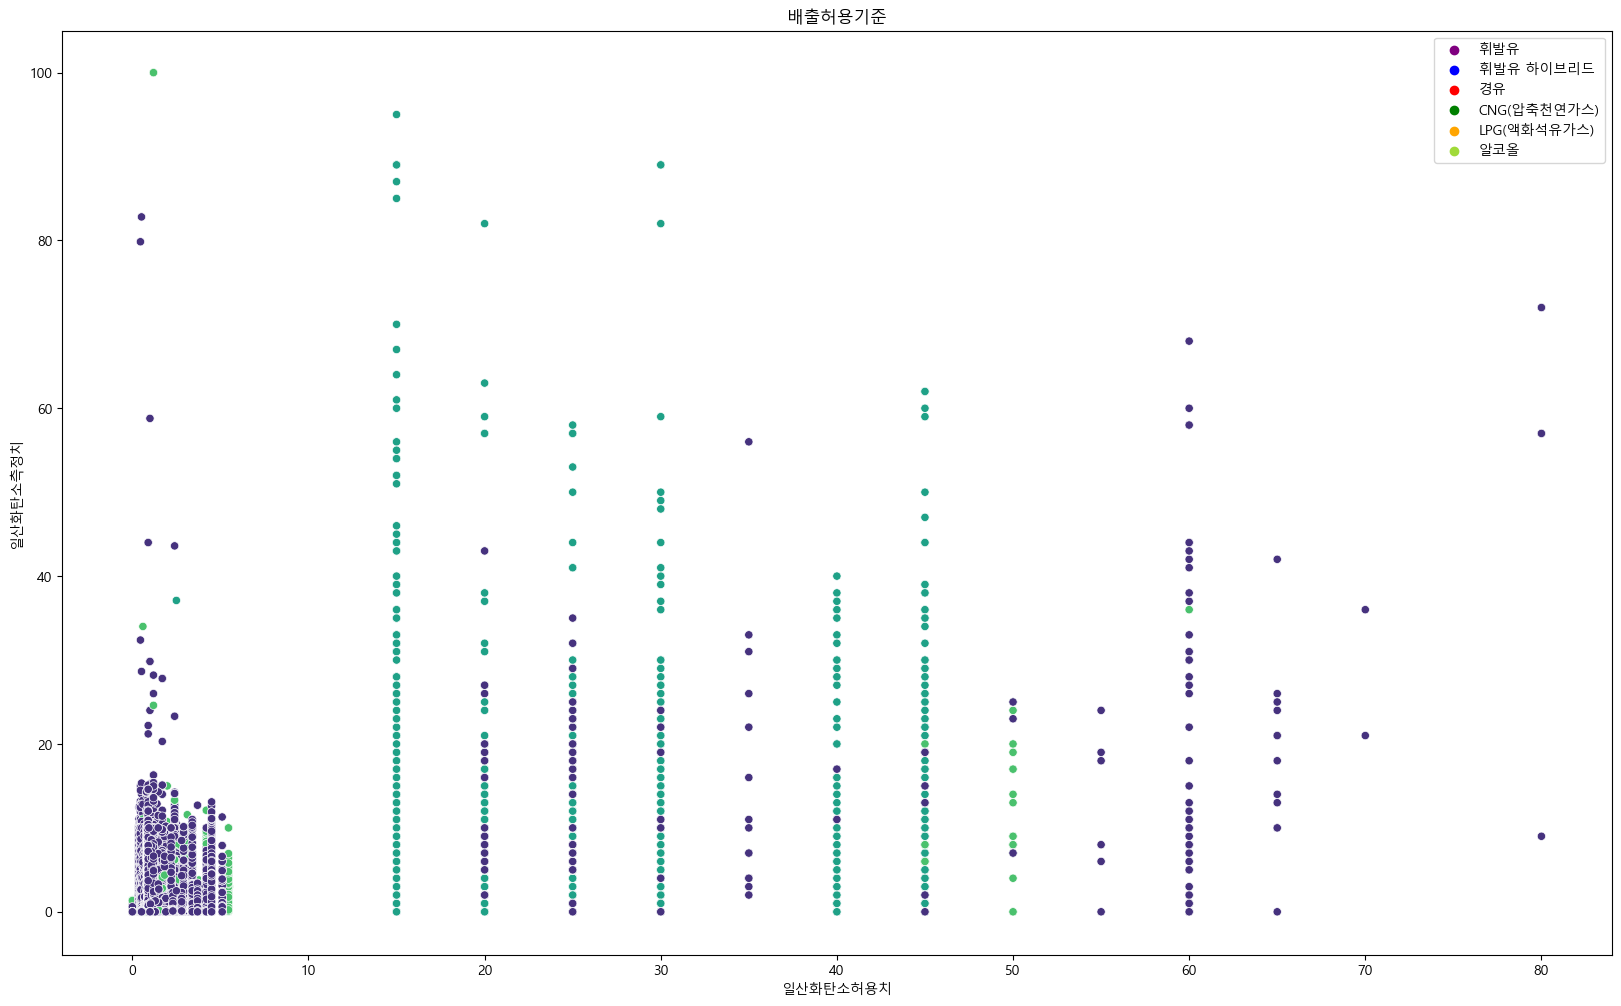

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
data = cs2i_정기정밀[cs2i_정기정밀['연료'].isin(['휘발유','휘발유 하이브리드','경유','CNG(압축천연가스)','LPG(액화석유가스)','알코올'])]

# 새로운 그림(figure) 생성 및 크기 설정
plt.figure(figsize=(20, 12))

# Seaborn을 사용하여 산점도 그리기
sns.scatterplot(data=data, x='일산화탄소허용치', y='일산화탄소측정치', hue='연료', palette='viridis')

# 그래프 제목 설정
plt.title('배출허용기준')

# 축에 대한 지수 표기법 비활성화
plt.ticklabel_format(style='plain', axis='both')

# 범례 위치 조절
legend = plt.legend(loc='upper right')

# 원하는 색으로 범례 색상 지정
legend.legendHandles[0].set_color('purple')       # 휘발유
legend.legendHandles[1].set_color('blue')     # 휘발유 하이브리드
legend.legendHandles[2].set_color('red')      # 경유
legend.legendHandles[3].set_color('green')    # CNG(압축천연가스)
legend.legendHandles[4].set_color('#78e08f')    # LPG(액화석유가스)
legend.legendHandles[5].set_color('orange')    # 알코올

# 그래프 표시
plt.show()

IndexError: list index out of range

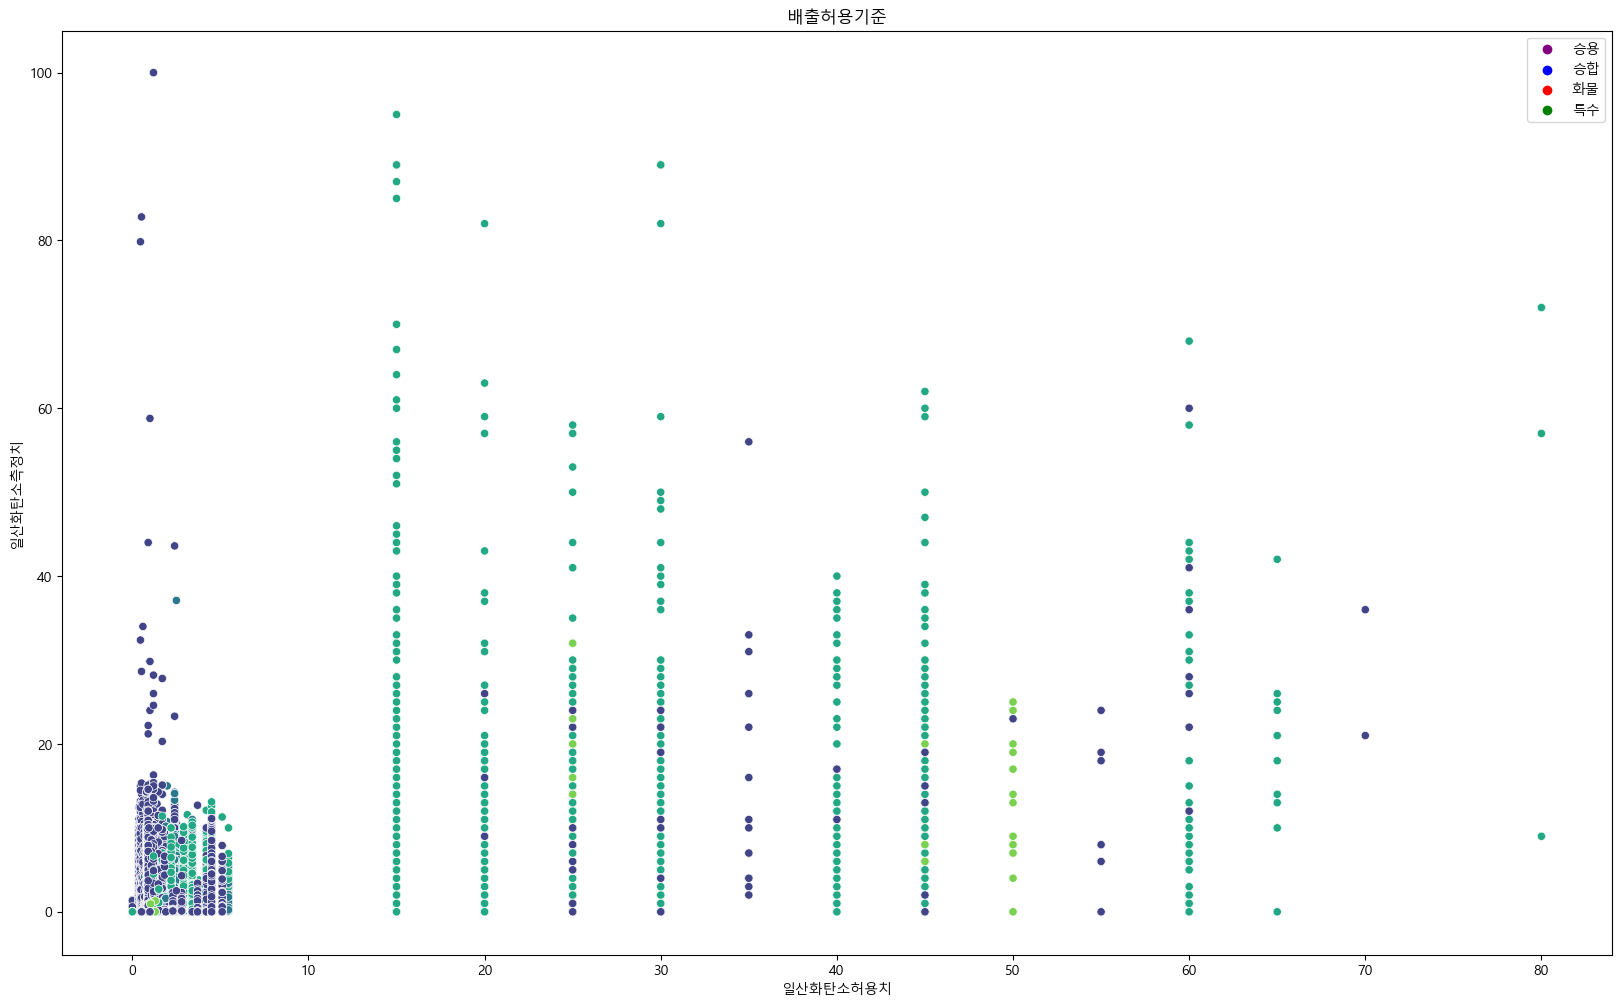

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
data = cs2i_정기정밀

# 새로운 그림(figure) 생성 및 크기 설정
plt.figure(figsize=(20, 12))

# Seaborn을 사용하여 산점도 그리기
sns.scatterplot(data=data, x='일산화탄소허용치', y='일산화탄소측정치', hue='차종', palette='viridis')

# 그래프 제목 설정
plt.title('배출허용기준')

# 축에 대한 지수 표기법 비활성화
plt.ticklabel_format(style='plain', axis='both')

# 범례 위치 조절
legend = plt.legend(loc='upper right')

# 원하는 색으로 범례 색상 지정
legend.legendHandles[0].set_color('purple')       # 승용
legend.legendHandles[1].set_color('blue')     # 승합
legend.legendHandles[2].set_color('red')      # 화물
legend.legendHandles[3].set_color('green')    # 특수


# 그래프 표시
plt.show()

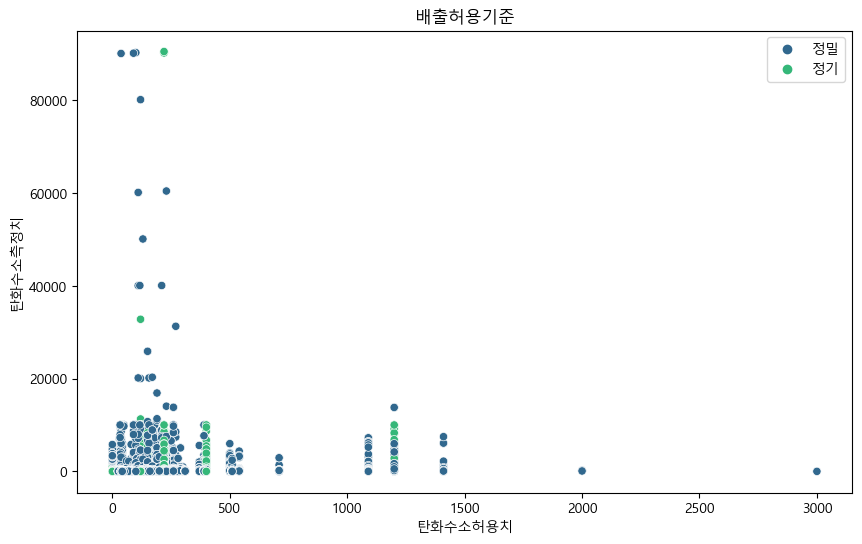

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 준비
data = cs2i_정기정밀

# 새로운 그림(figure) 생성 및 크기 설정
plt.figure(figsize=(10, 6))

# Seaborn을 사용하여 산점도 그리기
sns.scatterplot(data=data, x='탄화수소허용치', y='탄화수소측정치', hue='검사구분', palette='viridis')

# 그래프 제목 설정
plt.title('배출허용기준')

# 축에 대한 지수 표기법 비활성화
plt.ticklabel_format(style='plain', axis='both')

# 범례 위치 조절
plt.legend(loc='upper right')

# 그래프 표시
plt.show()

In [ ]:
plt.figure(figsize=(6,4))

# 박스플롯 그리기
sns.boxplot(x='탄화수소허용치', y='탄화수소측정치', data=cs2i_정기정밀)

# 그래프 제목 설정
plt.title('현대자동차(주)의 허용치기준별  Boxplot (구조변경 전)')

# x축 라벨 설정
plt.xlabel('배출가스인증번호')

# y축 라벨 설정
plt.ylabel('CO_SI지수')

# 그래프 표시
plt.show()

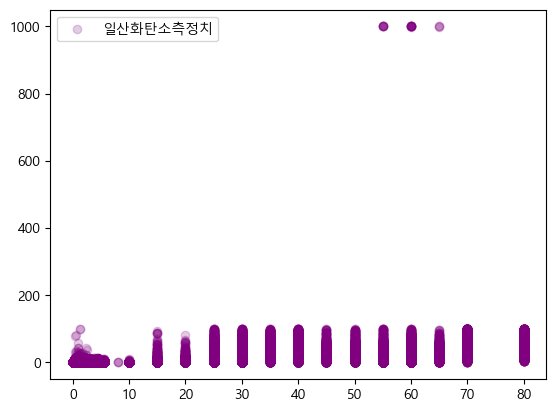

In [ ]:
# 데이터 준비
plt.scatter(cs2i_정기정밀['일산화탄소허용치'], cs2i_정기정밀['일산화탄소측정치'], color = 'purple', alpha = 0.2, label = '일산화탄소측정치')

plt.legend()
plt.show()

In [ ]:
# 데이터 준비
plt.figure(figsize=(10, 6))
plt.scatter(cs2i_정기정밀['탄화수소허용치'], cs2i_정기정밀['탄화수소측정치'],color = 'orange', alpha = 0.6, label = '탄화수소측정치')

plt.legend()
plt.show()

KeyboardInterrupt: 

In [ ]:
cs2i_정기정밀['제작일자_연도']

0           2023.00
1           2023.00
2           2023.00
3           2023.00
4           2023.00
              ...  
101930296       NaN
101930297       NaN
101930298       NaN
101930299       NaN
101930300       NaN
Name: 제작일자_연도, Length: 101930301, dtype: float64

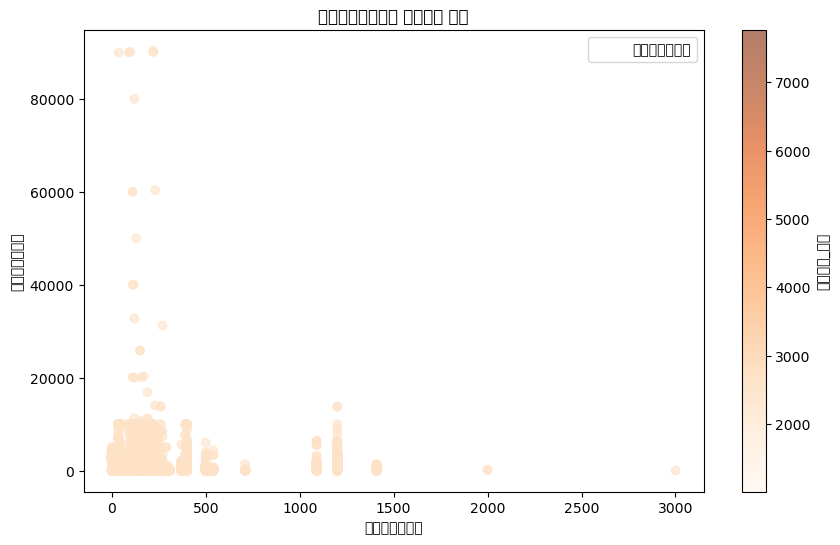

In [ ]:
import matplotlib.pyplot as plt

# 데이터 준비
plt.figure(figsize=(10, 6))

data= cs2i_정기정밀[cs2i_정기정밀['검사구분'].notnull()]

# 산점도 그리기
scatter = plt.scatter(data['탄화수소허용치'], data['탄화수소측정치'], 
                      c=data['제작일자_연도'], cmap='Oranges', alpha=0.6, label='탄화수소측정치')

# 범례 추가
plt.legend()

# 축 레이블과 제목 추가
plt.xlabel('탄화수소허용치')
plt.ylabel('탄화수소측정치')
plt.title('탄화수소측정치와 허용치의 분포')

# 컬러바 추가
cbar = plt.colorbar(scatter, label='제작일자_연도')

# 그래프 보여주기
plt.show()

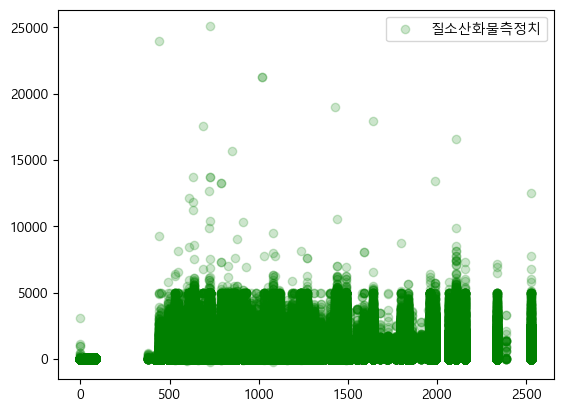

In [ ]:
# 데이터 준비
plt.scatter(cs2i_정기정밀['질소산화물허용치'], cs2i_정기정밀['질소산화물측정치'], color = 'green', alpha = 0.2, label = '질소산화물측정치')

plt.legend()
plt.show()

In [ ]:
# 데이터 준비
plt.scatter(cs2i_정기정밀['매연허용치'], cs2i_정기정밀['매연측정치'], color = 'red', alpha = 0.2, label = '매연측정치')

plt.legend()
plt.show()

In [ ]:
df531 = cs2i_정기정밀.groupby(['제작사명','배출가스인증번호','검사구분','검사방법','검사판정','검사일자_연도','제작일자_연도','연료'], dropna=False).agg({
                                                                '차대번호': 'count',
                                                                '일산화탄소측정치': 'mean',
                                                                '탄화수소측정치':'mean',
                                                                '질소산화물측정치':'mean',
                                                                '매연측정치':'mean',
                                                                '일산화탄소허용치':'mean',
                                                                '탄화수소허용치':'mean',
                                                                '질소산화물허용치':'mean',
                                                                '매연허용치':'mean',
                                                                })

df531_2 = df531.sort_values(by=['제작사명','배출가스인증번호','검사구분','검사방법','검사판정','제작일자_연도','연료'], ascending=[True, True,True,True,False,False,True]).reset_index()
df531_2

,제작사명,배출가스인증번호,검사구분,검사방법,검사판정,검사일자_연도,제작일자_연도,연료,차대번호,일산화탄소측정치,탄화수소측정치,질소산화물측정치,매연측정치,일산화탄소허용치,탄화수소허용치,질소산화물허용치,매연허용치
0,(BH)카라반,NaN,NaN,NaN,NaN,nan,2023,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(BH)카라반,NaN,NaN,NaN,NaN,nan,2022,기타연료,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(BH)카라반,NaN,NaN,NaN,NaN,nan,2022,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,(BH)카라반,NaN,NaN,NaN,NaN,nan,2021,기타연료,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(BH)카라반,NaN,NaN,NaN,NaN,nan,2021,NaN,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596938,NaN,NaN,NaN,NaN,NaN,nan,1974,휘발유,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596939,NaN,NaN,NaN,NaN,NaN,nan,1973,휘발유,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596940,NaN,NaN,NaN,NaN,NaN,nan,1971,경유,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596941,NaN,NaN,NaN,NaN,NaN,nan,1970,휘발유,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df531_2.to_excel("C:\\Users\\kbjung\\Downloads\\df531_2.xlsx", index=False)

In [ ]:
cs2i_정기정밀.columns

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택', '검사일자',
       '검사판정', '일산화탄소측정치', '탄화수소측정치', '질소산화물측정치', '검사방법', '검사종류', '일산화탄소허용치',
       '탄화수소허용치', '질소산화물허용치', '검사구분', '매연측정치', '검사일자_연도', '검사일자_월', '검사일자_일',
       '매연허용치'],
      dtype='object')

### STD_BD53_2_EXHST_GAS_GNRLZ_INSP_CURSTT

In [ ]:
# 11.2s
## 제작사의 종합검사결과별 등록차량대수
df532 = cs2i_정기정밀.groupby(['제작사명','검사방법','검사판정','검사구분','검사일자_연도','검사일자_월'], dropna=False).agg({
                                                                '일산화탄소허용치':'mean',
                                                                '탄화수소측정치':'mean',
                                                                '질소산화물측정치':'mean',
                                                                '매연측정치':'mean',
                                                                '일산화탄소허용치':'mean',
                                                                '탄화수소허용치':'mean',
                                                                '질소산화물허용치':'mean',
                                                                '매연허용치':'mean',
                                                                })

df532 = df532.sort_values(by=['제작사명','검사방법','검사판정','검사구분','검사일자_연도','검사일자_월'], ascending=[True,True,False,True,False,True]).reset_index()
df532

,제작사명,검사방법,검사판정,검사구분,검사일자_연도,검사일자_월,일산화탄소허용치,탄화수소측정치,질소산화물측정치,매연측정치,탄화수소허용치,질소산화물허용치,매연허용치
0,(BH)카라반,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(First)모터스,부하검사(ASM-Idling),Y,정밀,2023.00,7.00,0.42,2.00,0.00,NaN,80.00,510.00,NaN
2,(First)모터스,부하검사(ASM-Idling),Y,정밀,2022.00,7.00,0.42,0.00,1.00,NaN,80.00,510.00,NaN
3,(First)모터스,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(SG)신기,무부하검사(TSI),Y,정기,2021.00,10.00,1.20,26.00,1.00,NaN,220.00,0.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
370581,NaN,부하검사(LUG DOWN),NaN,정밀,2009.00,8.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370582,NaN,부하검사(LUG DOWN),NaN,정밀,2009.00,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370583,NaN,부하검사(LUG DOWN),NaN,정밀,2009.00,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
370584,NaN,부하검사(LUG DOWN),NaN,정밀,2009.00,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df532.to_excel("E:\\geun\\문지은\\자료\\회사\\와보텍\\업무\\자동차환경빅데이터구축3차\\public_전처리\\df532_2.xlsx", index=False)

### STD_BD53_3_EXHST_GAS_MNFCTR

In [ ]:
cs2i_정기정밀_제작사 = cs2i_정기정밀[cs2i_정기정밀['제작사_선택']=='Y']
print('data length:', format(len(cs2i_정기정밀_제작사),','))
cs2i_정기정밀_제작사.head(2)

data length: 90,413,614


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,코드,제작사_선택,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,검사방법,검사종류,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사구분,매연측정치,검사일자_연도,검사일자_월,검사일자_일,매연허용치,제작일자_연도,제작일자_월,제작일자_일
3,KMHS381LGPU490926,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230627.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,27
4,KMHS381LGPU491007,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230628.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,28
5,KMHS381LGPU491213,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230628.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,28
6,KMHS381LGPU491607,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230630.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,30
7,KMHS381LGPU491621,N,20230731.00,A0810011404561322,2.00,승용,LMY-HD-14-75,2023,20230630.00,휘발유,현대자동차(주),대형,싼타페(SANTAFE),HD,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,,,NaN,2023,06,30


In [ ]:
# 11.2s
## 제작사의 종합검사결과별 등록차량대수
df533 = cs2i_정기정밀_제작사.groupby(['제작사명','배출가스인증번호','검사방법','검사판정','검사구분','검사일자_연도','검사일자_월'], dropna=False).agg({
                                                                '일산화탄소허용치':'mean',
                                                                '탄화수소측정치':'mean',
                                                                '질소산화물측정치':'mean',
                                                                '매연측정치':'mean',
                                                                '일산화탄소허용치':'mean',
                                                                '탄화수소허용치':'mean',
                                                                '질소산화물허용치':'mean',
                                                                '매연허용치':'mean',
                                                                })

df533 = df533.sort_values(by=['제작사명','배출가스인증번호','검사방법','검사판정','검사구분','검사일자_연도','검사일자_월'], ascending=[True, True,True,False,True,False,True]).reset_index()
df533

,제작사명,배출가스인증번호,검사방법,검사판정,검사구분,검사일자_연도,검사일자_월,일산화탄소허용치,탄화수소측정치,질소산화물측정치,매연측정치,탄화수소허용치,질소산화물허용치,매연허용치
0,(주)볼보자동차코리아,3MY-PA-03,무부하검사(TSI),Y,정기,2022,10,1.20,96.00,0.98,NaN,220.00,0.10,NaN
1,(주)볼보자동차코리아,3MY-PA-03,무부하검사(TSI),Y,정기,2020,01,1.20,54.00,1.02,NaN,220.00,0.10,NaN
2,(주)볼보자동차코리아,3MY-PA-03,무부하검사(TSI),Y,정기,2020,08,1.20,5.00,0.98,NaN,220.00,0.10,NaN
3,(주)볼보자동차코리아,3MY-PA-03,무부하검사(TSI),Y,정기,2019,11,1.20,1.00,1.04,NaN,220.00,0.10,NaN
4,(주)볼보자동차코리아,3MY-PA-03,무부하검사(TSI),Y,정기,2017,11,1.20,2.00,1.00,NaN,220.00,0.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654319,혼다코리아(주),KMY-HK-12-3,무부하검사(정지가동),Y,정기,2023,05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654320,혼다코리아(주),KMY-HK-12-3,무부하검사(정지가동),Y,정기,2023,06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654321,혼다코리아(주),KMY-HK-12-3,무부하검사(정지가동),Y,정기,2023,07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654322,혼다코리아(주),KMY-HK-12-3,NaN,NaN,NaN,nan,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df533.to_excel("C:\\Users\\kbjung\\Downloads\\df533_2.xlsx", index=False)

### STD_BD53_4_EXHST_GAS_VHCTY_TY

In [ ]:
csi.head()

Index(['차대번호', '차량말소여부', '최초등록일자', '제원관리번호', '배출가스등급', '차종', '배출가스인증번호',
       '차량연식', '제작일자', '연료', '제작사명', '차종유형', '차명', '코드', '제작사_선택', '검사일자',
       '검사판정', '일산화탄소측정치', '탄화수소측정치', '질소산화물측정치', '검사방법', '검사종류', '일산화탄소허용치',
       '탄화수소허용치', '질소산화물허용치', '검사구분', '매연측정치', '검사일자_연도', '검사일자_월', '검사일자_일',
       '매연허용치', '제작일자_연도', '제작일자_월', '제작일자_일'],
      dtype='object')

In [ ]:
csi.shape

In [ ]:
# 11.2s
## 유형별 등록차량대수
df534 = cs2i_정기정밀.groupby(['제작사명','차종유형', '검사방법','검사판정','검사구분','검사일자_연도'], dropna=False).agg({
                                                                '일산화탄소허용치':'mean',
                                                                '탄화수소측정치':'mean',
                                                                '질소산화물측정치':'mean',
                                                                '매연측정치':'mean',
                                                                '일산화탄소허용치':'mean',
                                                                '탄화수소허용치':'mean',
                                                                '질소산화물허용치':'mean',
                                                                '매연허용치':'mean',
                                                                })

df534 = df534.sort_values(by=['제작사명', '차종유형', '검사방법','검사판정','검사구분','검사일자_연도'], ascending=[True, True, True,False,True,False]).reset_index()
df534

,제작사명,차종유형,검사방법,검사판정,검사구분,검사일자_연도,일산화탄소허용치,탄화수소측정치,질소산화물측정치,매연측정치,탄화수소허용치,질소산화물허용치,매연허용치
0,(BH)카라반,소형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(First)모터스,대형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(First)모터스,소형,부하검사(ASM-Idling),Y,정밀,2023.00,0.42,2.00,0.00,NaN,80.00,510.00,NaN
3,(First)모터스,소형,부하검사(ASM-Idling),Y,정밀,2022.00,0.42,0.00,1.00,NaN,80.00,510.00,NaN
4,(First)모터스,소형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123615,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2012.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123616,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2011.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123617,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2010.00,25.00,21.00,18.00,NaN,25.00,25.00,NaN
123618,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2009.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df534.to_excel("C:\\Users\\kbjung\\Downloads\\df534.xlsx", index=False)

## STD_BD53_5_EXHST_GAS_SI_CMP_CL

In [ ]:
## SI 지수
cs2i_정기정밀_열화도 = cs2i_정기정밀.copy()

# ## 정기/정밀만 가져오기. 
# cs2gam_구조변경Y_정기정밀_si = cs2i_정기정밀_열화도[(cs2i_정기정밀_열화도['검사구분']=='정기') | (cs2i_정기정밀_열화도['검사구분']=='정밀') ]
# print('data length:', format(len(cs2gam_구조변경Y_정기정밀_si),','))

## SI 지수 구하기
cs2i_정기정밀_열화도.loc[cs2i_정기정밀_열화도['연료'] != '경유', 'CO_SI지수'] = cs2i_정기정밀_열화도['일산화탄소측정치'] / cs2i_정기정밀_열화도['탄화수소허용치'] ##CO_SI지수 = 일산화산소 측정치 / 허용치
cs2i_정기정밀_열화도.loc[cs2i_정기정밀_열화도['연료'] == '경유', '매연_SI지수'] = cs2i_정기정밀_열화도['매연측정치'] / cs2i_정기정밀_열화도['매연허용치'] ##매연_SI지수 = 매연 측정치 / 허용치
cs2i_정기정밀_열화도['HC_SI지수'] = cs2i_정기정밀_열화도['탄화수소측정치']/cs2i_정기정밀_열화도['탄화수소허용치']  ##HC_SI지수 = 탄화수소 측정치 / 허용치
cs2i_정기정밀_열화도['NOx_SI지수'] = cs2i_정기정밀_열화도['질소산화물측정치']/cs2i_정기정밀_열화도['질소산화물허용치']  ##HC_SI지수 = 질소산화물 측정치 / 허용치

print('data length:', format(len(cs2i_정기정밀_열화도),','))
cs2i_정기정밀_열화도.head(2)

data length: 101,930,301


,차대번호,차량말소여부,최초등록일자,제원관리번호,배출가스등급,차종,배출가스인증번호,차량연식,제작일자,연료,제작사명,차종유형,차명,총중량_x,총중량_y,코드,제작사_선택,검사일자,검사판정,일산화탄소측정치,탄화수소측정치,질소산화물측정치,검사방법,검사종류,일산화탄소허용치,탄화수소허용치,질소산화물허용치,검사구분,매연측정치,검사일자_연도,검사일자_월,검사일자_일,매연허용치,제작일자_연도,제작일자_월,제작일자_일,CO_SI지수,매연_SI지수,HC_SI지수,NOx_SI지수
0,KMJTA18XPPC003145,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230621.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.00,6.00,21.00,NaN,NaN,NaN,NaN
1,KMJTA18XPPC003146,N,20230731.00,A0810011100982322,1.00,승합,NaN,2023,20230619.00,전기,현대자동차(주),대형,일렉시티(ELEC CITY),15660.00,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.00,6.00,19.00,NaN,NaN,NaN,NaN


In [ ]:
cs2i_정기정밀_열화도.to_csv("C:\\Users\\kbjung\\Downloads\\등록제원(중량,제작사컬럼),정기정밀_전처리_열화도.csv", index=False)

In [ ]:
# 11.2s
## 유형별 등록차량대수
df535 = cs2i_정기정밀_열화도.groupby(['제작사명','차종유형', '검사방법','검사판정','검사구분','검사일자_연도','검사일자_월'], dropna=False).agg({
                                                                'CO_SI지수':'mean',
                                                                'HC_SI지수':'mean',
                                                                'NOx_SI지수':'mean',
                                                                '매연_SI지수':'mean'
                                                                })

df535 = df535.sort_values(by=['제작사명', '차종유형', '검사방법','검사판정','검사구분','검사일자_연도','검사일자_월'], ascending=[True, True, True, True, True,False,True]).reset_index()
df535

,제작사명,차종유형,검사방법,검사판정,검사구분,검사일자_연도,검사일자_월,CO_SI지수,HC_SI지수,NOx_SI지수,매연_SI지수
0,(BH)카라반,소형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(First)모터스,대형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,(First)모터스,소형,부하검사(ASM-Idling),Y,정밀,2023.00,7.00,0.00,0.03,0.00,NaN
3,(First)모터스,소형,부하검사(ASM-Idling),Y,정밀,2022.00,7.00,0.00,0.00,0.00,NaN
4,(First)모터스,소형,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
477790,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2009.00,8.00,NaN,NaN,NaN,NaN
477791,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2009.00,9.00,NaN,NaN,NaN,NaN
477792,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2009.00,10.00,NaN,NaN,NaN,NaN
477793,NaN,NaN,부하검사(LUG DOWN),NaN,정밀,2009.00,11.00,NaN,NaN,NaN,NaN


In [ ]:
df535.to_excel("C:\\Users\\kbjung\\Downloads\\df535.xlsx", index=False)